# Act 2: Iterating with Data


**Notebook Segment**

In this act, we'll:
- Create a view
- Compare transformation methods
- Extract audio channels and create transcripts

**Documentation:** [Views in Pixeltable](https://pixeltable.com/docs/views), [JSON Operations](https://pixeltable.com/docs/json-operations)


In [1]:
import pixeltable as pxt

In [2]:
pxt.list_tables()

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/alison-pxt/.pixeltable/pgdata


['highlight_reels',
 'test_table',
 'reels',
 'chess_vids',
 'blob_storage_demo.media']

In [5]:
v = pxt.get_table('chess_vids')

In [6]:
v

table 'chess_vids'

 Column Name   Type                       Computed With
       video  Video                                    
    duration  Float                video.get_duration()
      scenes   Json  video.scene_detect_content(fps=10)

video    duration  \
0  /Users/alison-pxt/Documents/Github/pxt-primeti...  377.043333   

                                              scenes  
0  [{'duration': 1.8351666666666666, 'start_pts':...
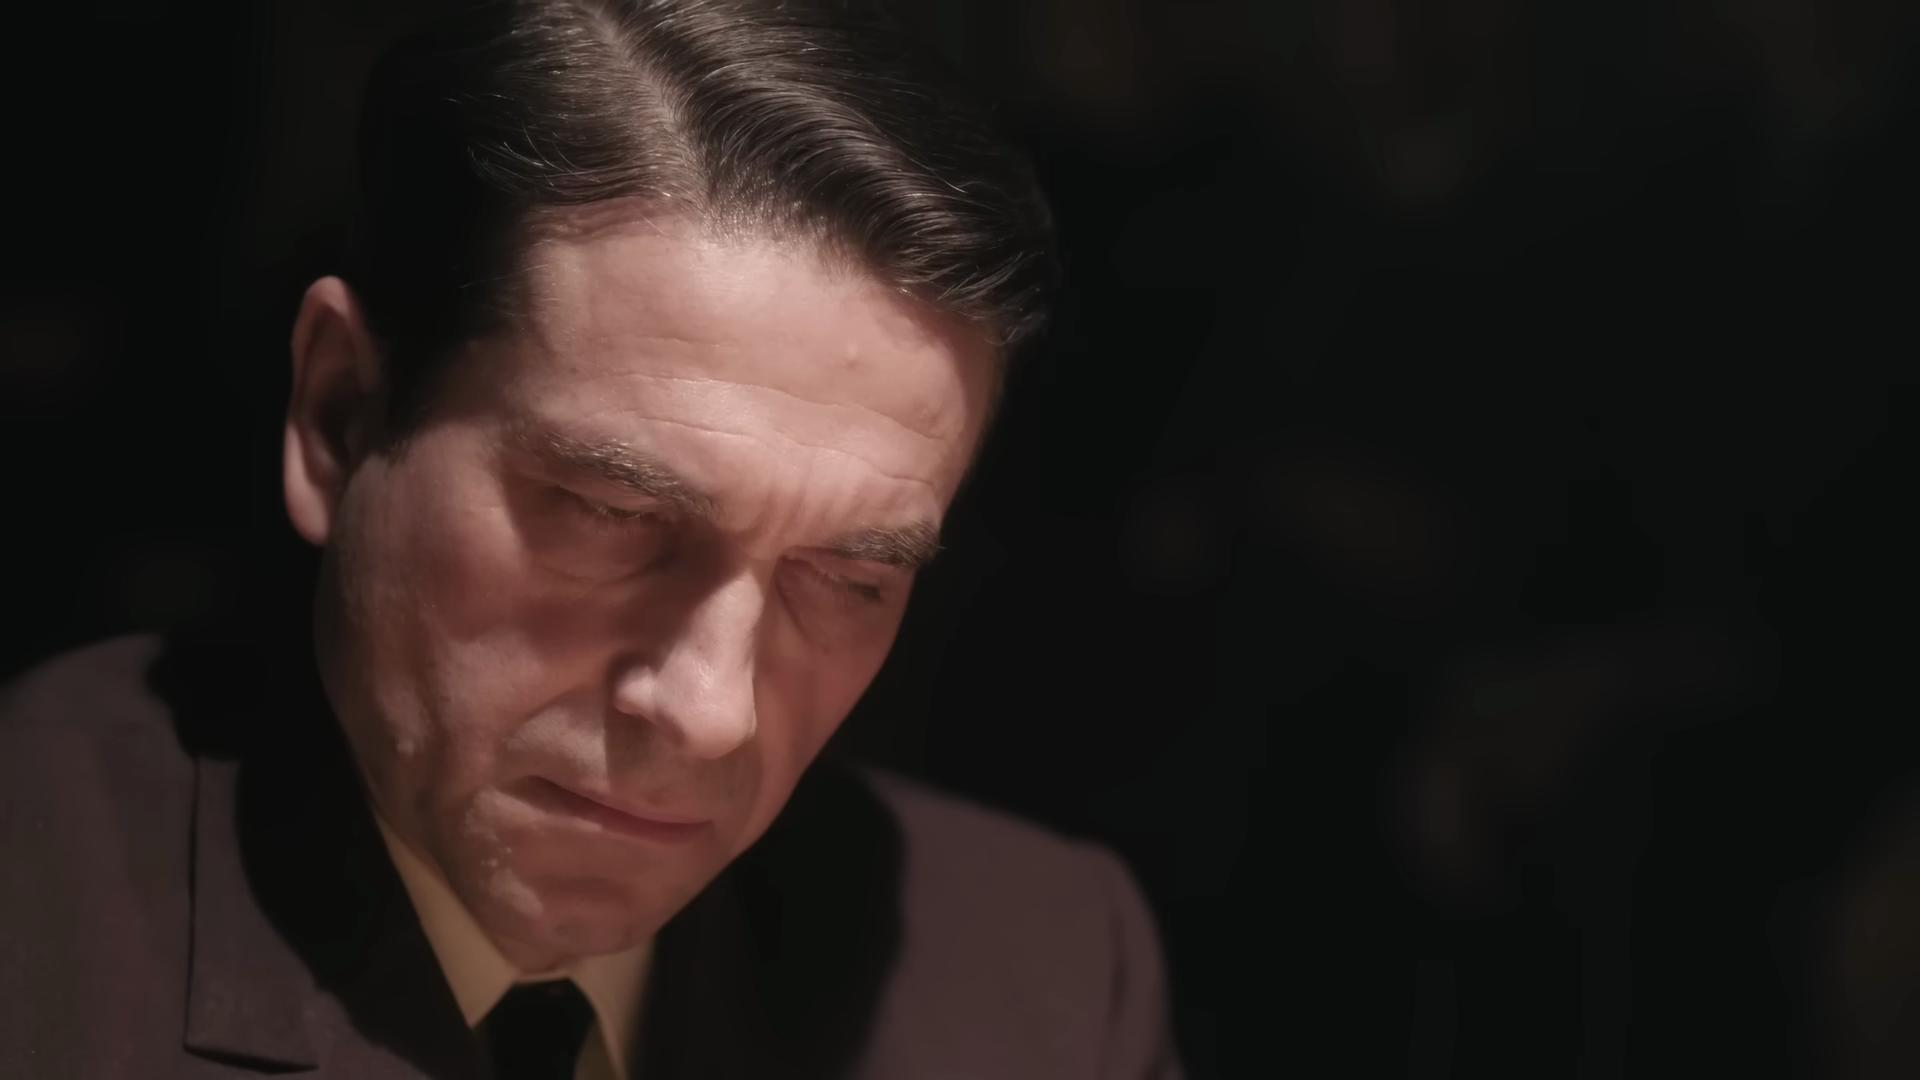

In [7]:
v.collect()

### 01 - Find scene segments

🖇️ Links to docs:

- Views in Pixeltable
- More on iterators
- VideoSplitter

To create a view with video segments, we need to extract the scene start times from our `scenes` column. Let's build up to this step by step, exploring the JSON structure along the way.

**Step 1:** First, let's see what the `scenes` column contains:

In [8]:
# Step 1: Look at the scenes column structure
v.select(v.scenes).collect()

scenes
0  [{'duration': 1.8351666666666666, 'start_pts':...

**Step 2:** The `scenes` column contains a JSON array. Let's access the first scene to see its structure:

In [9]:
# Step 2: Access the first scene element
v.select(v.scenes[0]).collect()

scenes_0
0  {'duration': 1.8351666666666666, 'start_pts': ...

**Step 3:** Each scene has properties like `start_time` and `end_time`. Let's access the `start_time` of the first scene:


In [10]:
# Step 3: Access the start_time property of the first scene
v.select(v.scenes[0].start_time).collect()

scenes_0_starttime
0                 0.0

**Step 4:** Now let's slice the array to get all scenes from index 1 onwards (skipping the first scene, which typically starts at 0):

In [11]:
# Step 4: Slice to get scenes from index 1 onwards
v.select(v.scenes[1:]).collect()

scenes_1
0  [{'duration': 2.1688333333333327, 'start_pts':...

**Step 5:** Now access the `start_time` property for all scenes in the slice. Here, we'll also name the column `times`.

In [12]:
# Step 5: Access start_time for all scenes from index 1 onwards
v.select(times=v.scenes[1:].start_time).collect()

times
0  [1.8351666666666666, 4.004, 4.963291666666667,...

Using `select()`, we are composing a query to run. When you run a query, Pixeltable gives you a few ways to interact with the results:

1. You can convert to a list of dictionaries
2. You can index by row/column `[0,0]` and by column name

Example 1: Convert to a list of dictionaries

In [13]:
result = v.select(times=v.scenes[1:].start_time).collect()

In [14]:
result # Returns as a table

times
0  [1.8351666666666666, 4.004, 4.963291666666667,...

In [15]:
result[0]  # Returns first row as dict

{'times': [1.8351666666666666,
  4.004,
  4.963291666666667,
  15.390375,
  19.227541666666667,
  23.231541666666665,
  25.77575,
  28.77875,
  31.78175,
  35.618916666666664,
  39.62291666666667,
  41.916875,
  45.62891666666667,
  47.464083333333335,
  51.59320833333334,
  58.391666666666666,
  62.896166666666666,
  65.77404166666666,
  70.98758333333333,
  78.453375,
  83.54179166666667,
  89.67291666666667,
  92.34225,
  99.51608333333333,
  101.81004166666666,
  106.02258333333333,
  106.94016666666667,
  125.750625,
  137.72091666666665,
  154.48766666666666,
  161.95345833333334,
  163.07958333333335,
  167.91775,
  171.00416666666666,
  173.33983333333333,
  180.22170833333334,
  184.76791666666668,
  191.35783333333333,
  210.835625,
  226.18429166666667,
  231.52295833333332,
  248.122875,
  249.7495,
  250.91733333333335,
  253.7535,
  275.35841666666664,
  278.06945833333333,
  292.50054166666666,
  298.7567916666667,
  300.3,
  301.84320833333334,
  303.2612916666667,
  30

In [16]:
result['times']  # Returns list of times values

[[1.8351666666666666,
  4.004,
  4.963291666666667,
  15.390375,
  19.227541666666667,
  23.231541666666665,
  25.77575,
  28.77875,
  31.78175,
  35.618916666666664,
  39.62291666666667,
  41.916875,
  45.62891666666667,
  47.464083333333335,
  51.59320833333334,
  58.391666666666666,
  62.896166666666666,
  65.77404166666666,
  70.98758333333333,
  78.453375,
  83.54179166666667,
  89.67291666666667,
  92.34225,
  99.51608333333333,
  101.81004166666666,
  106.02258333333333,
  106.94016666666667,
  125.750625,
  137.72091666666665,
  154.48766666666666,
  161.95345833333334,
  163.07958333333335,
  167.91775,
  171.00416666666666,
  173.33983333333333,
  180.22170833333334,
  184.76791666666668,
  191.35783333333333,
  210.835625,
  226.18429166666667,
  231.52295833333332,
  248.122875,
  249.7495,
  250.91733333333335,
  253.7535,
  275.35841666666664,
  278.06945833333333,
  292.50054166666666,
  298.7567916666667,
  300.3,
  301.84320833333334,
  303.2612916666667,
  307.3904166

Example 2: Index by row/column [0,0] and by column name

In [17]:
# Index by position [row, column]
first_value = result[0, 0]  # First row, first column
first_value

[1.8351666666666666,
 4.004,
 4.963291666666667,
 15.390375,
 19.227541666666667,
 23.231541666666665,
 25.77575,
 28.77875,
 31.78175,
 35.618916666666664,
 39.62291666666667,
 41.916875,
 45.62891666666667,
 47.464083333333335,
 51.59320833333334,
 58.391666666666666,
 62.896166666666666,
 65.77404166666666,
 70.98758333333333,
 78.453375,
 83.54179166666667,
 89.67291666666667,
 92.34225,
 99.51608333333333,
 101.81004166666666,
 106.02258333333333,
 106.94016666666667,
 125.750625,
 137.72091666666665,
 154.48766666666666,
 161.95345833333334,
 163.07958333333335,
 167.91775,
 171.00416666666666,
 173.33983333333333,
 180.22170833333334,
 184.76791666666668,
 191.35783333333333,
 210.835625,
 226.18429166666667,
 231.52295833333332,
 248.122875,
 249.7495,
 250.91733333333335,
 253.7535,
 275.35841666666664,
 278.06945833333333,
 292.50054166666666,
 298.7567916666667,
 300.3,
 301.84320833333334,
 303.2612916666667,
 307.3904166666667,
 308.9753333333333,
 312.27029166666665,
 316

In [18]:
# Index by column name
first_time = result[0, "times"]  # First row, "times" column
first_time

[1.8351666666666666,
 4.004,
 4.963291666666667,
 15.390375,
 19.227541666666667,
 23.231541666666665,
 25.77575,
 28.77875,
 31.78175,
 35.618916666666664,
 39.62291666666667,
 41.916875,
 45.62891666666667,
 47.464083333333335,
 51.59320833333334,
 58.391666666666666,
 62.896166666666666,
 65.77404166666666,
 70.98758333333333,
 78.453375,
 83.54179166666667,
 89.67291666666667,
 92.34225,
 99.51608333333333,
 101.81004166666666,
 106.02258333333333,
 106.94016666666667,
 125.750625,
 137.72091666666665,
 154.48766666666666,
 161.95345833333334,
 163.07958333333335,
 167.91775,
 171.00416666666666,
 173.33983333333333,
 180.22170833333334,
 184.76791666666668,
 191.35783333333333,
 210.835625,
 226.18429166666667,
 231.52295833333332,
 248.122875,
 249.7495,
 250.91733333333335,
 253.7535,
 275.35841666666664,
 278.06945833333333,
 292.50054166666666,
 298.7567916666667,
 300.3,
 301.84320833333334,
 303.2612916666667,
 307.3904166666667,
 308.9753333333333,
 312.27029166666665,
 316

### 02 - Create a view

Now we have the array of start times that we can use with the `VideoSplitter` iterator.

In [19]:
from pixeltable.iterators import VideoSplitter

cont = pxt.create_view(
    'cont_scene_view',
    v,
    iterator=VideoSplitter.create(
        video=v.video,
        segment_times=v.scenes[1:].start_time,
        mode='accurate',
    ),
    if_exists='replace'
)

Inserting rows into `cont_scene_view`: 68 rows [00:00, 10831.41 rows/s]


Our view now has several new columns, which we can see when we inspect the schema:

In [20]:
cont

view 'cont_scene_view' (of 'chess_vids')

        Column Name             Type                       Computed With
                pos    Required[Int]                                    
      segment_start            Float                                    
  segment_start_pts              Int                                    
        segment_end            Float                                    
    segment_end_pts              Int                                    
      video_segment  Required[Video]                                    
              video            Video                                    
           duration            Float                video.get_duration()
             scenes             Json  video.scene_detect_content(fps=10)

In [21]:
# we have 68 scenes detected in this video
cont.count()

68

Let's use a query to explore the actual scenes. Note that with a view in Pixeltable, there is an implicit join on the base table. This means that every row also contains the original columns and values from the base table.

pos  segment_start  segment_end  \
0   58     331.873208   340.173167   
1   59     340.173167   343.176167   
2   60     343.176167   344.260583   
3   61     344.260583   344.302292   
4   62     344.302292   346.804792   
5   63     346.804792   348.306292   
6   64     348.306292   350.433417   
7   65     350.433417   355.146458   
8   66     355.146458   355.188167   
9   67     355.188167   377.043333   

                                       video_segment  \
0  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
1  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
2  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
3  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
4  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
5  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
6  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
7  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
8  /Users/alison-pxt/.pixeltable/media/ff60521c73...   
9  /Users/alison-pxt/.pixeltable/media/ff60521c73...   

                                               video  
0  /Users/alison-pxt/Documents/Github/pxt-primeti...  
1  /Users/alison-pxt/Documents/Github/pxt-primeti...  
2  /Users/alison-pxt/Documents/Github/pxt-primeti...  
3  /Users/alison-pxt/Documents/Github/pxt-primeti...  
4  /Users/alison-pxt/Documents/Github/pxt-primeti...  
5  /Users/alison-pxt/Documents/Github/pxt-primeti...  
6  /Users/alison-pxt/Documents/Github/pxt-primeti...  
7  /Users/alison-pxt/Documents/Github/pxt-primeti...  
8  /Users/alison-pxt/Documents/Github/pxt-primeti...  
9  /Users/alison-pxt/Documents/Github/pxt-primeti...
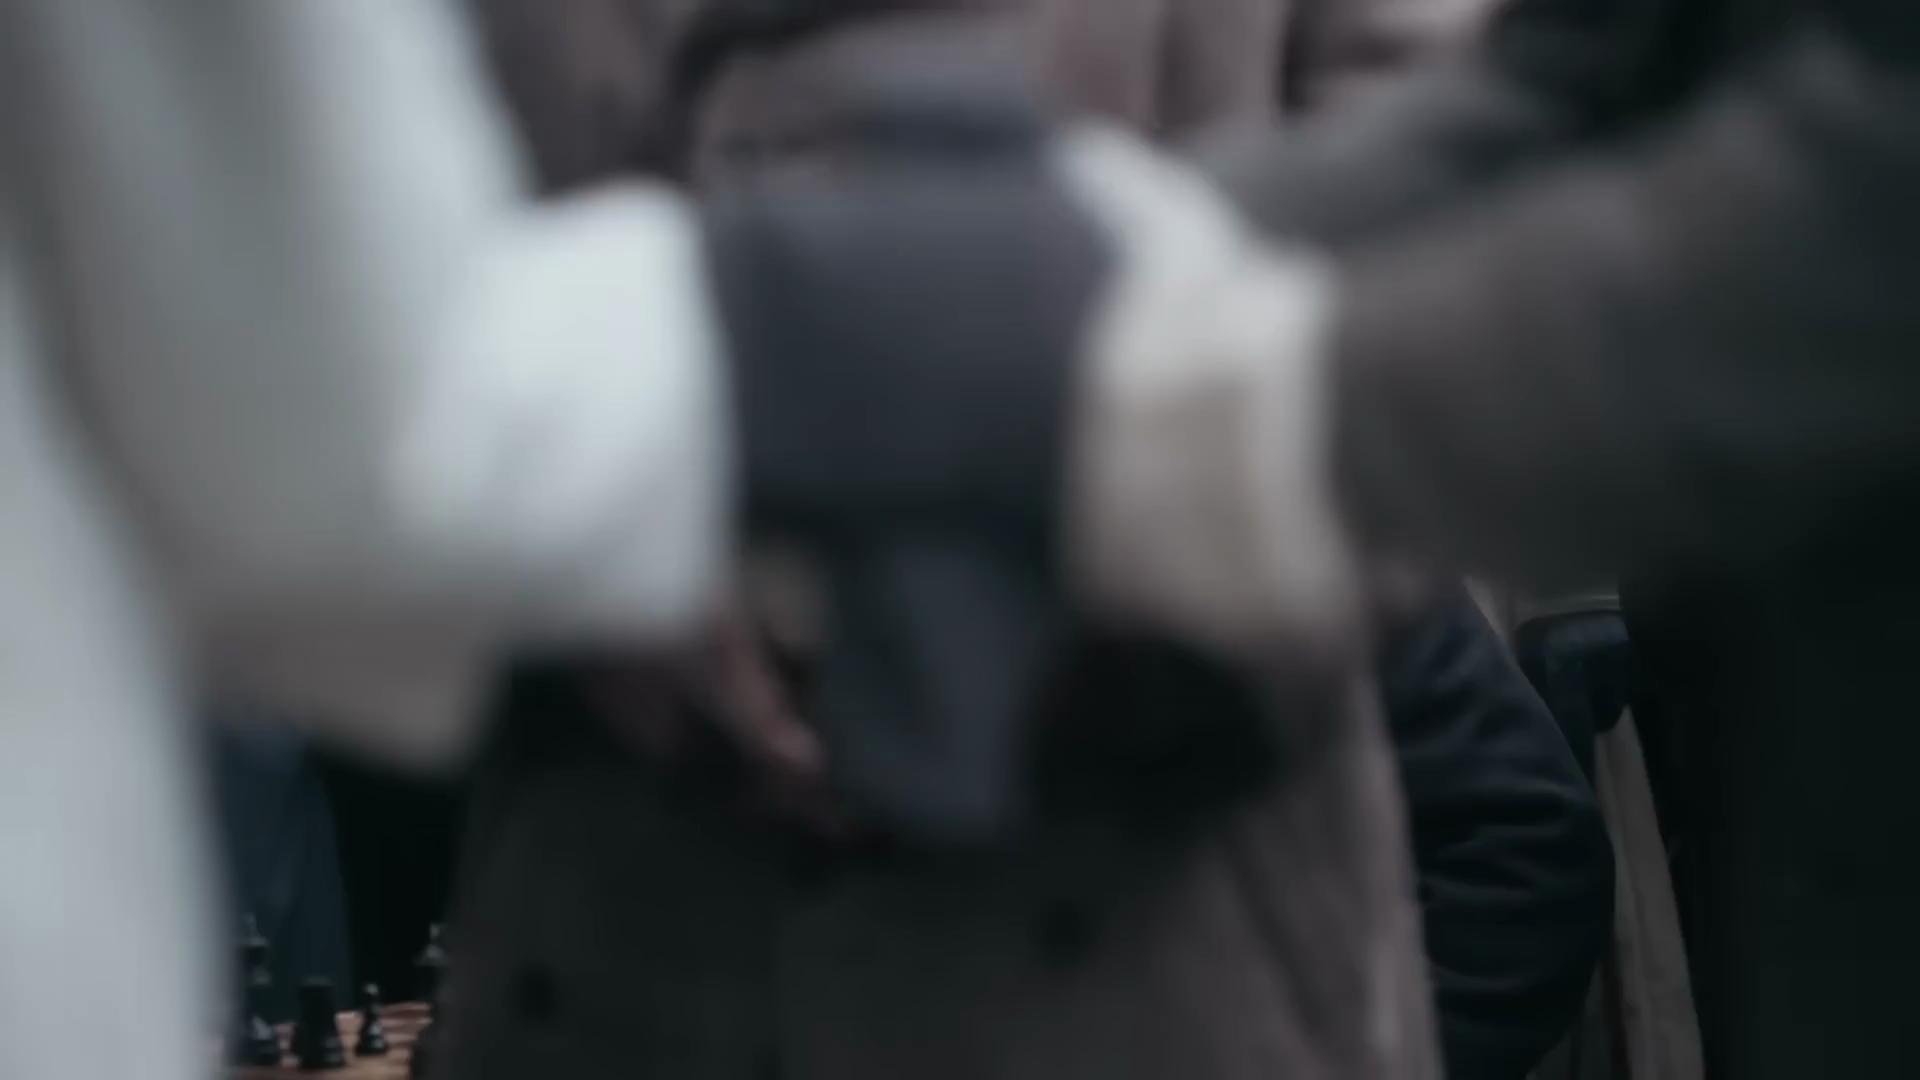
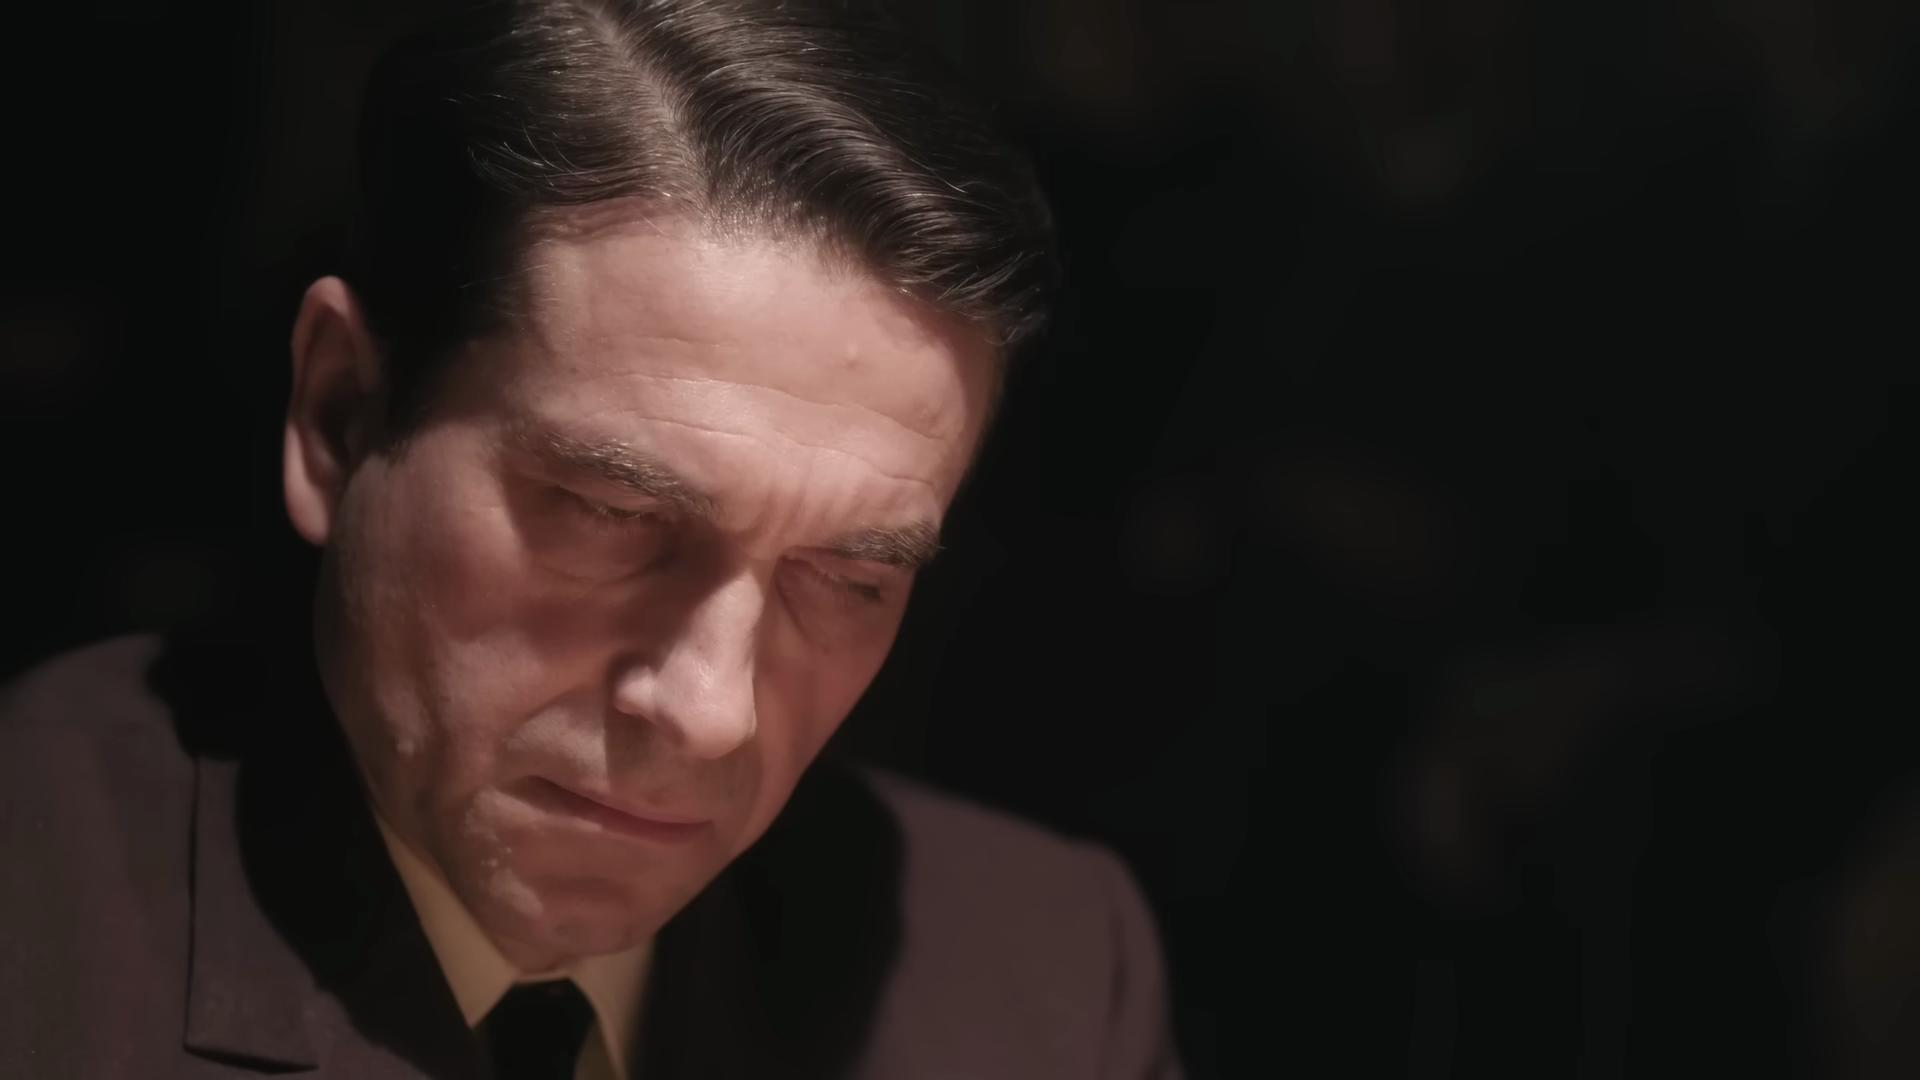
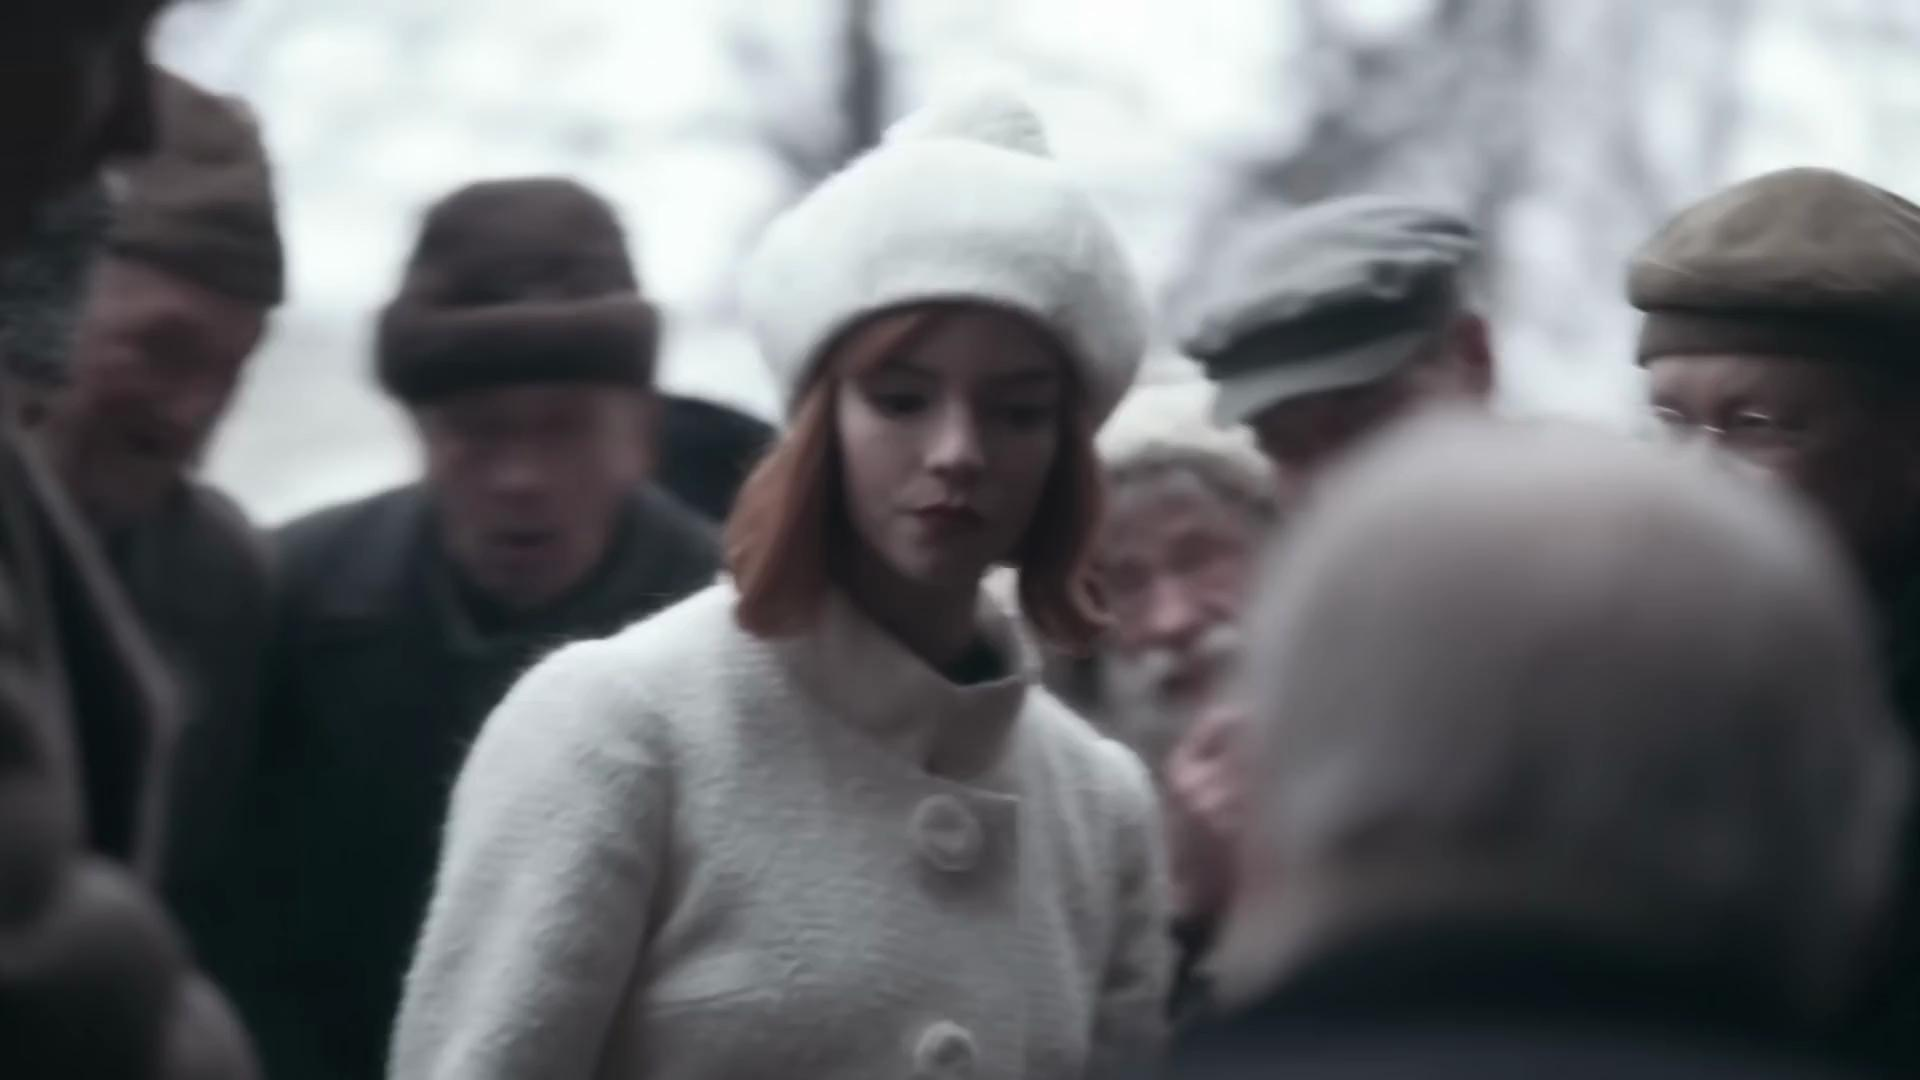
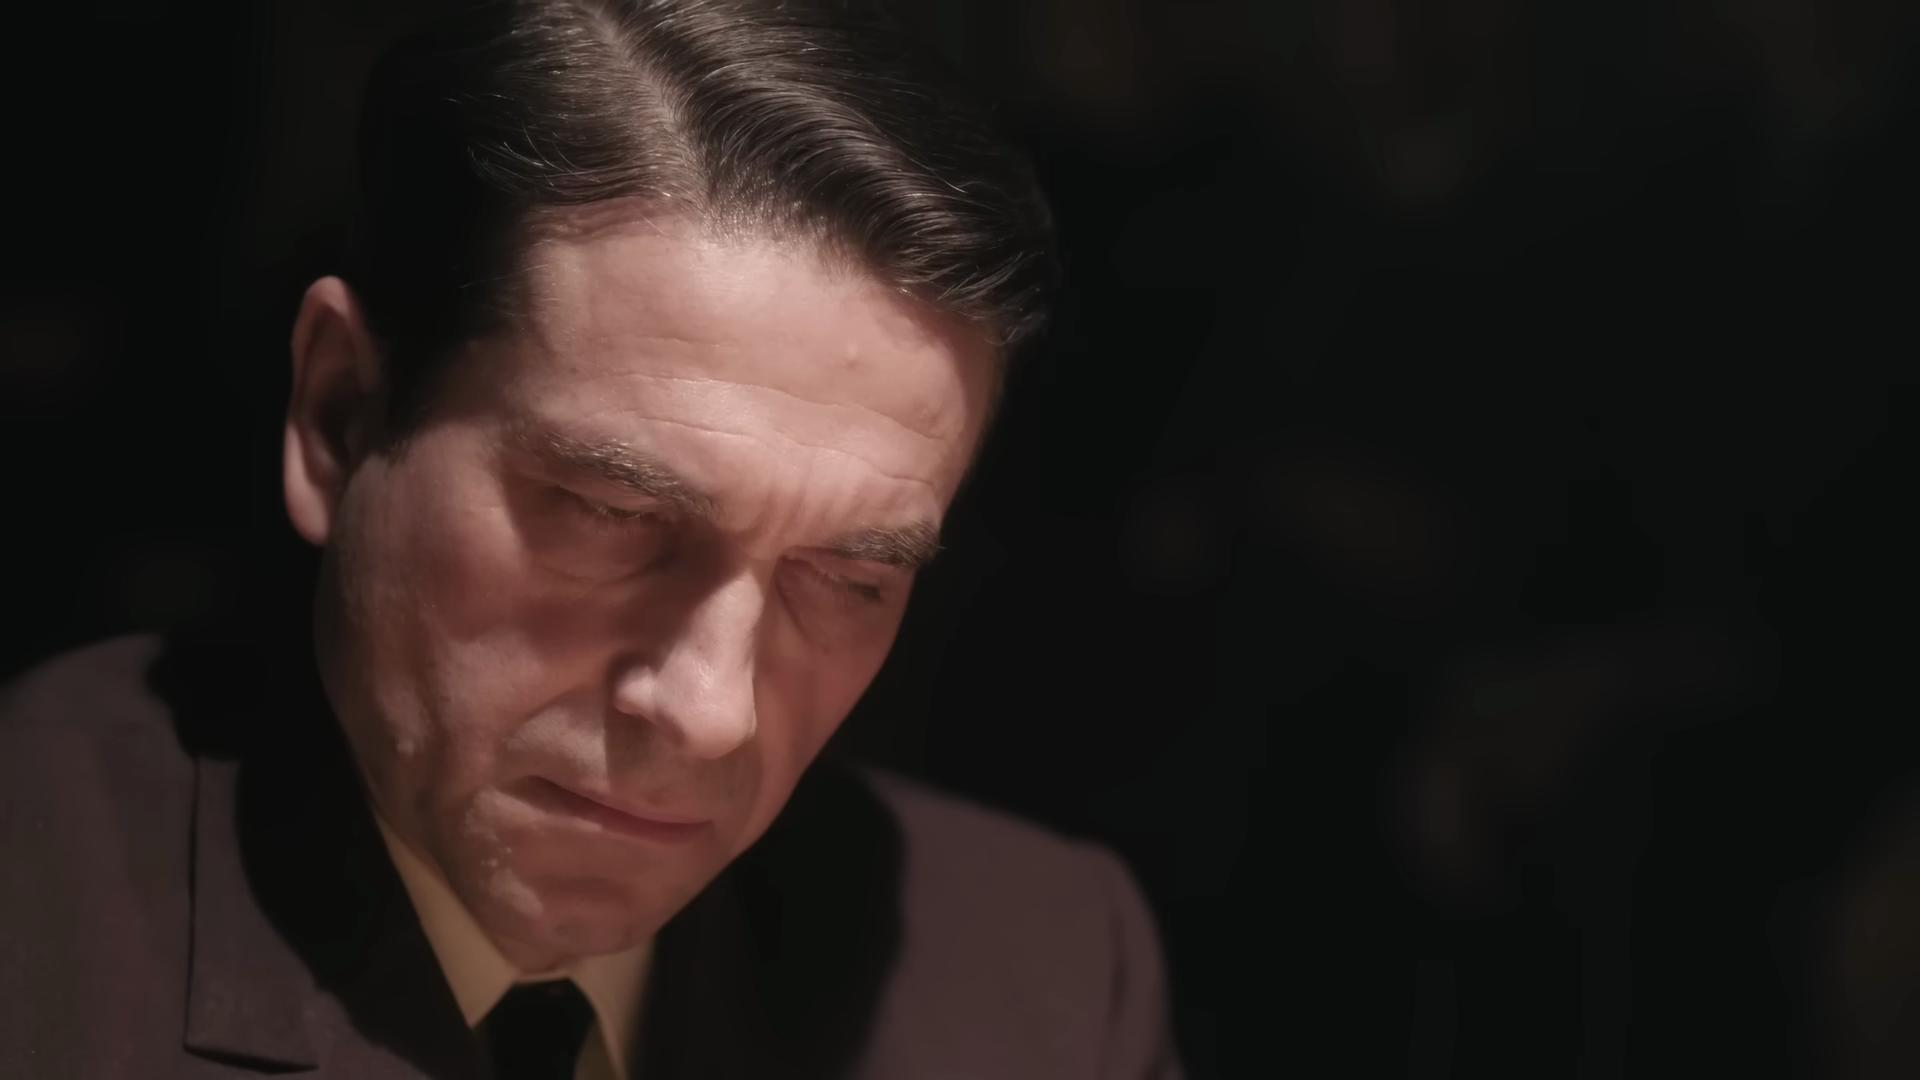
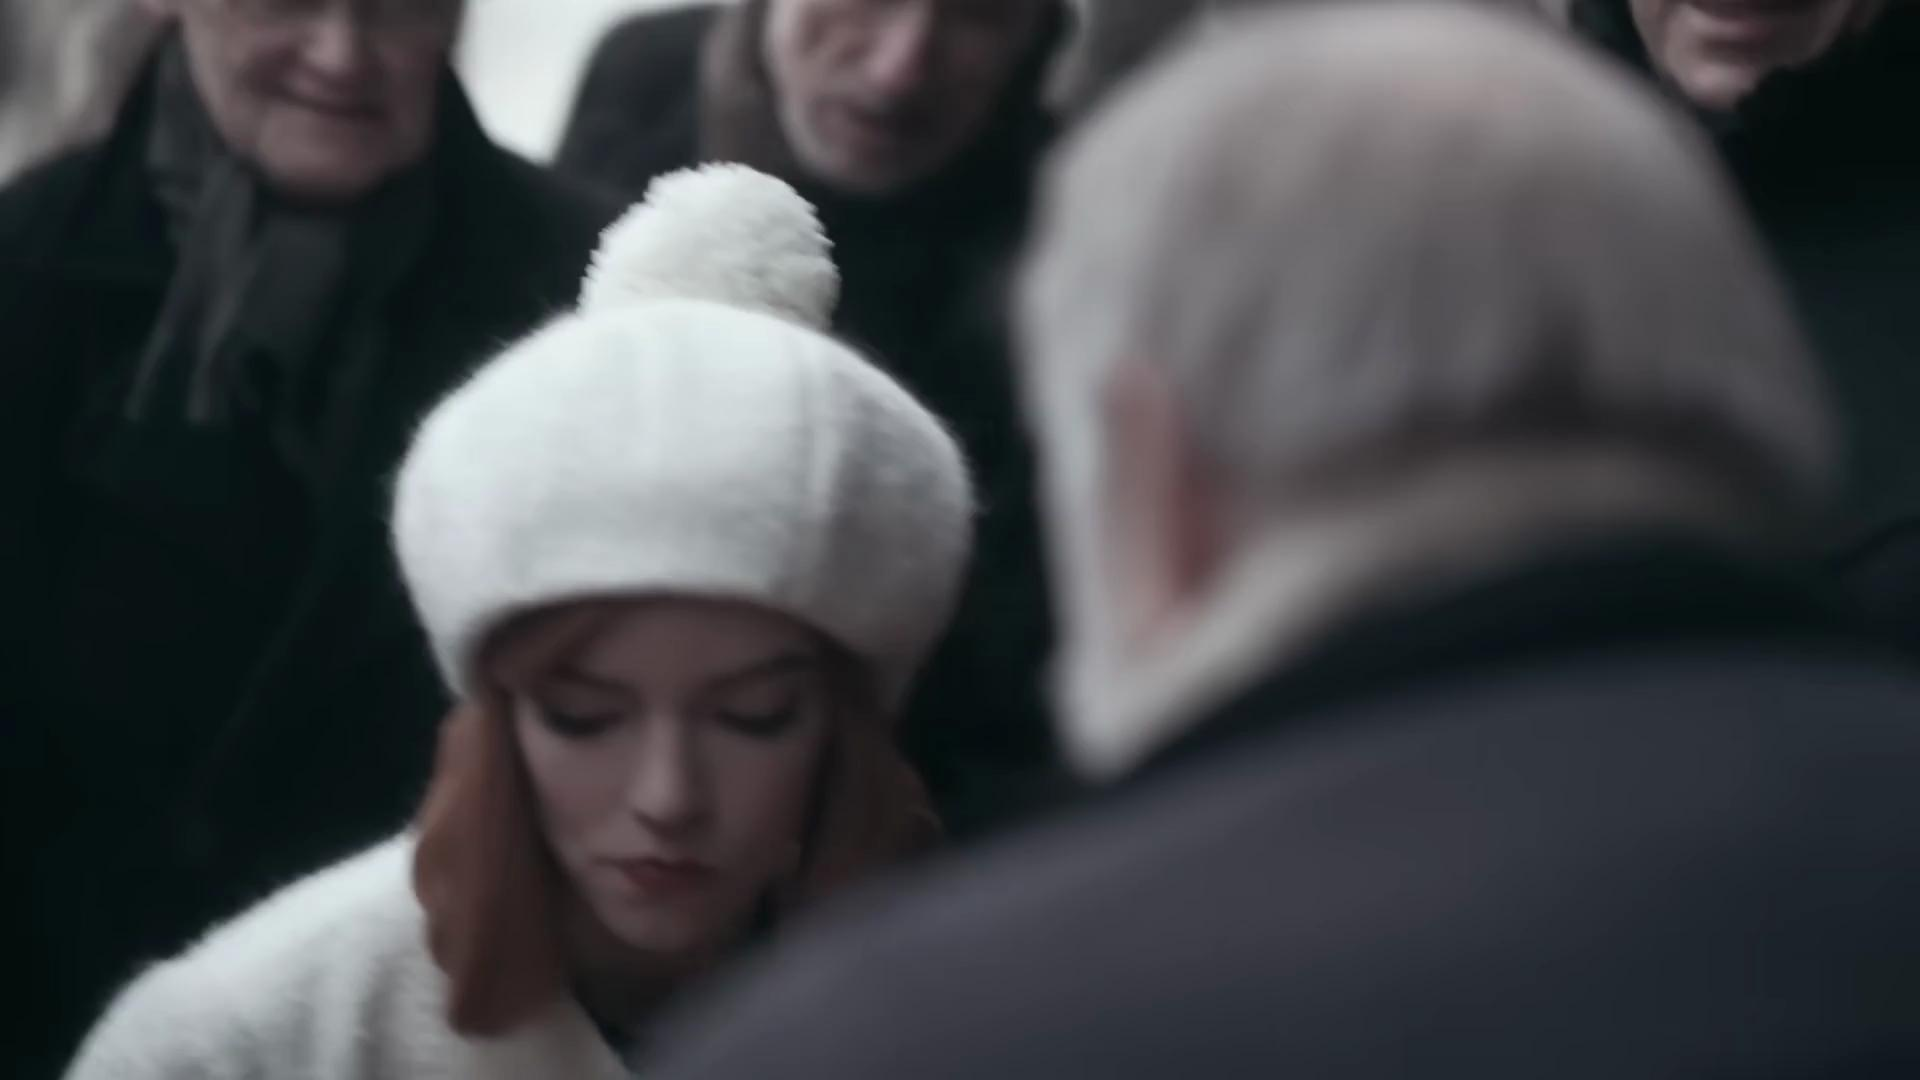
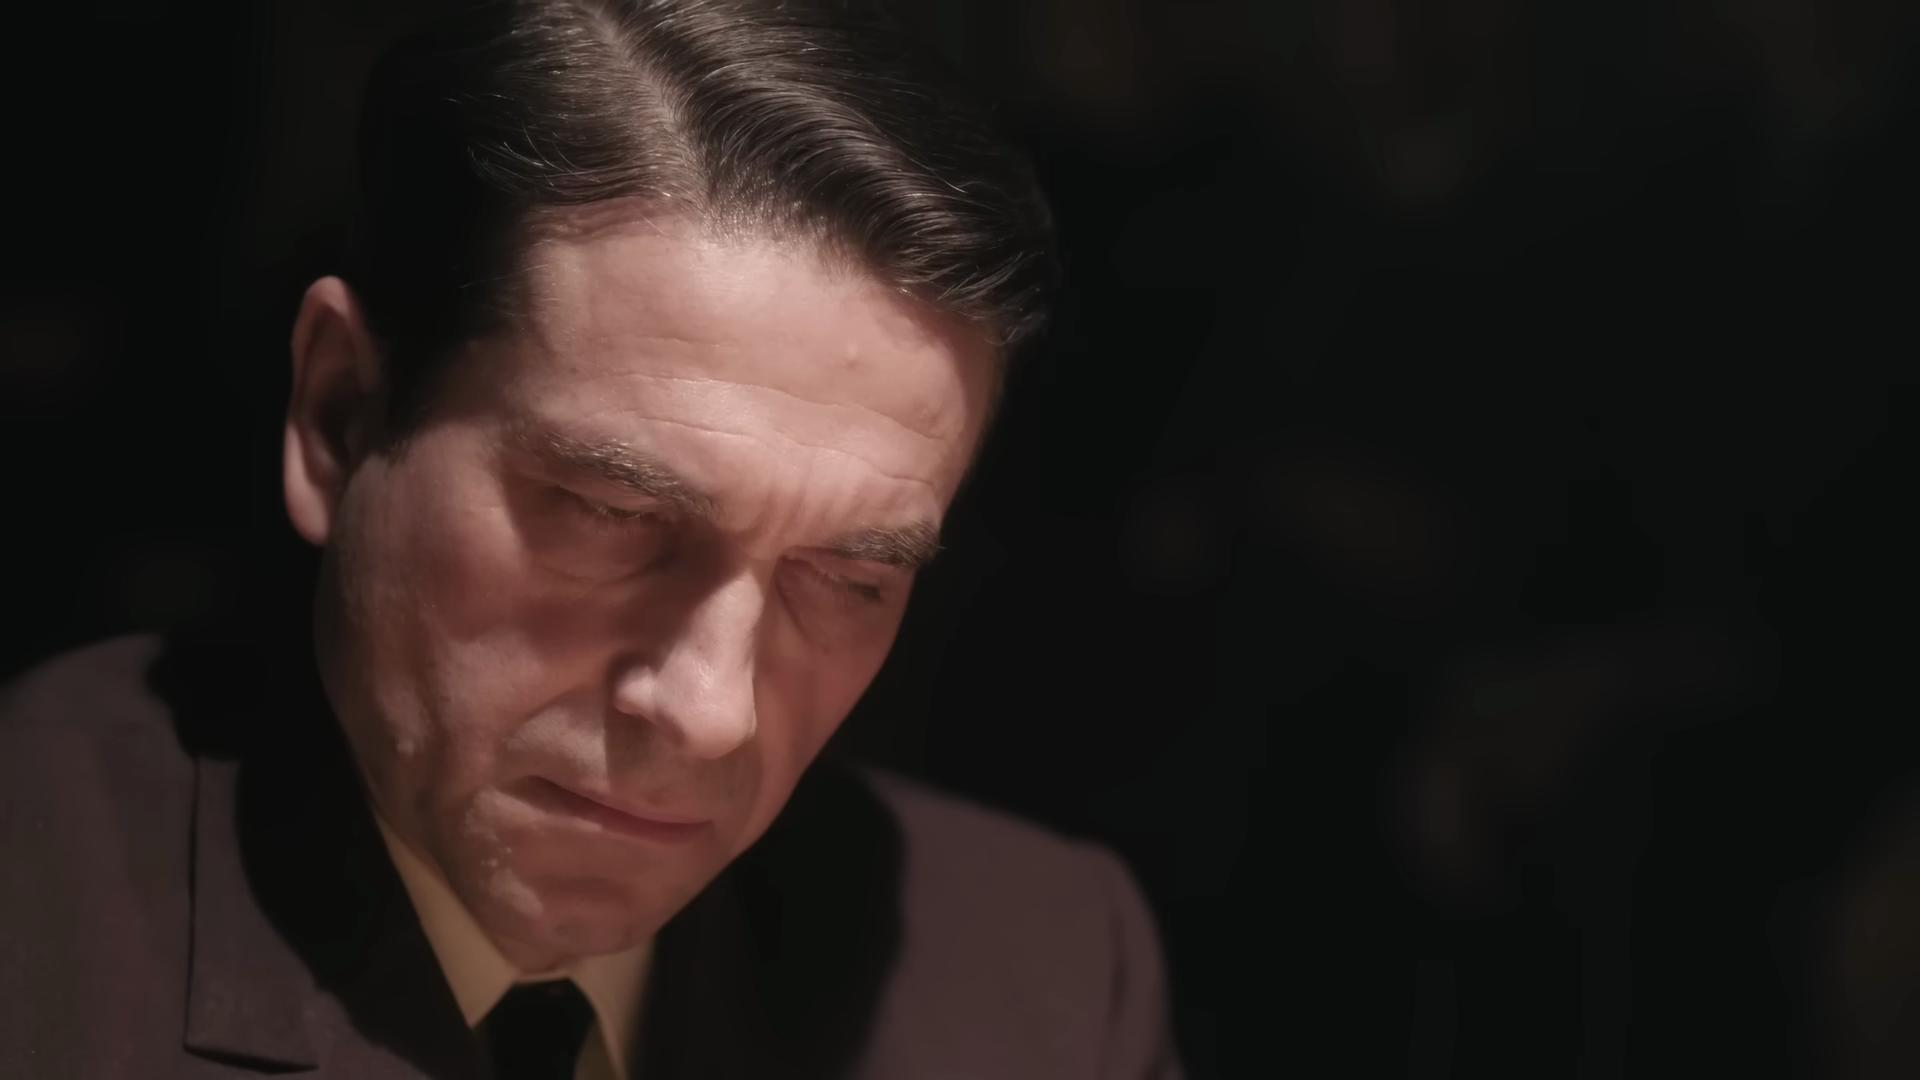
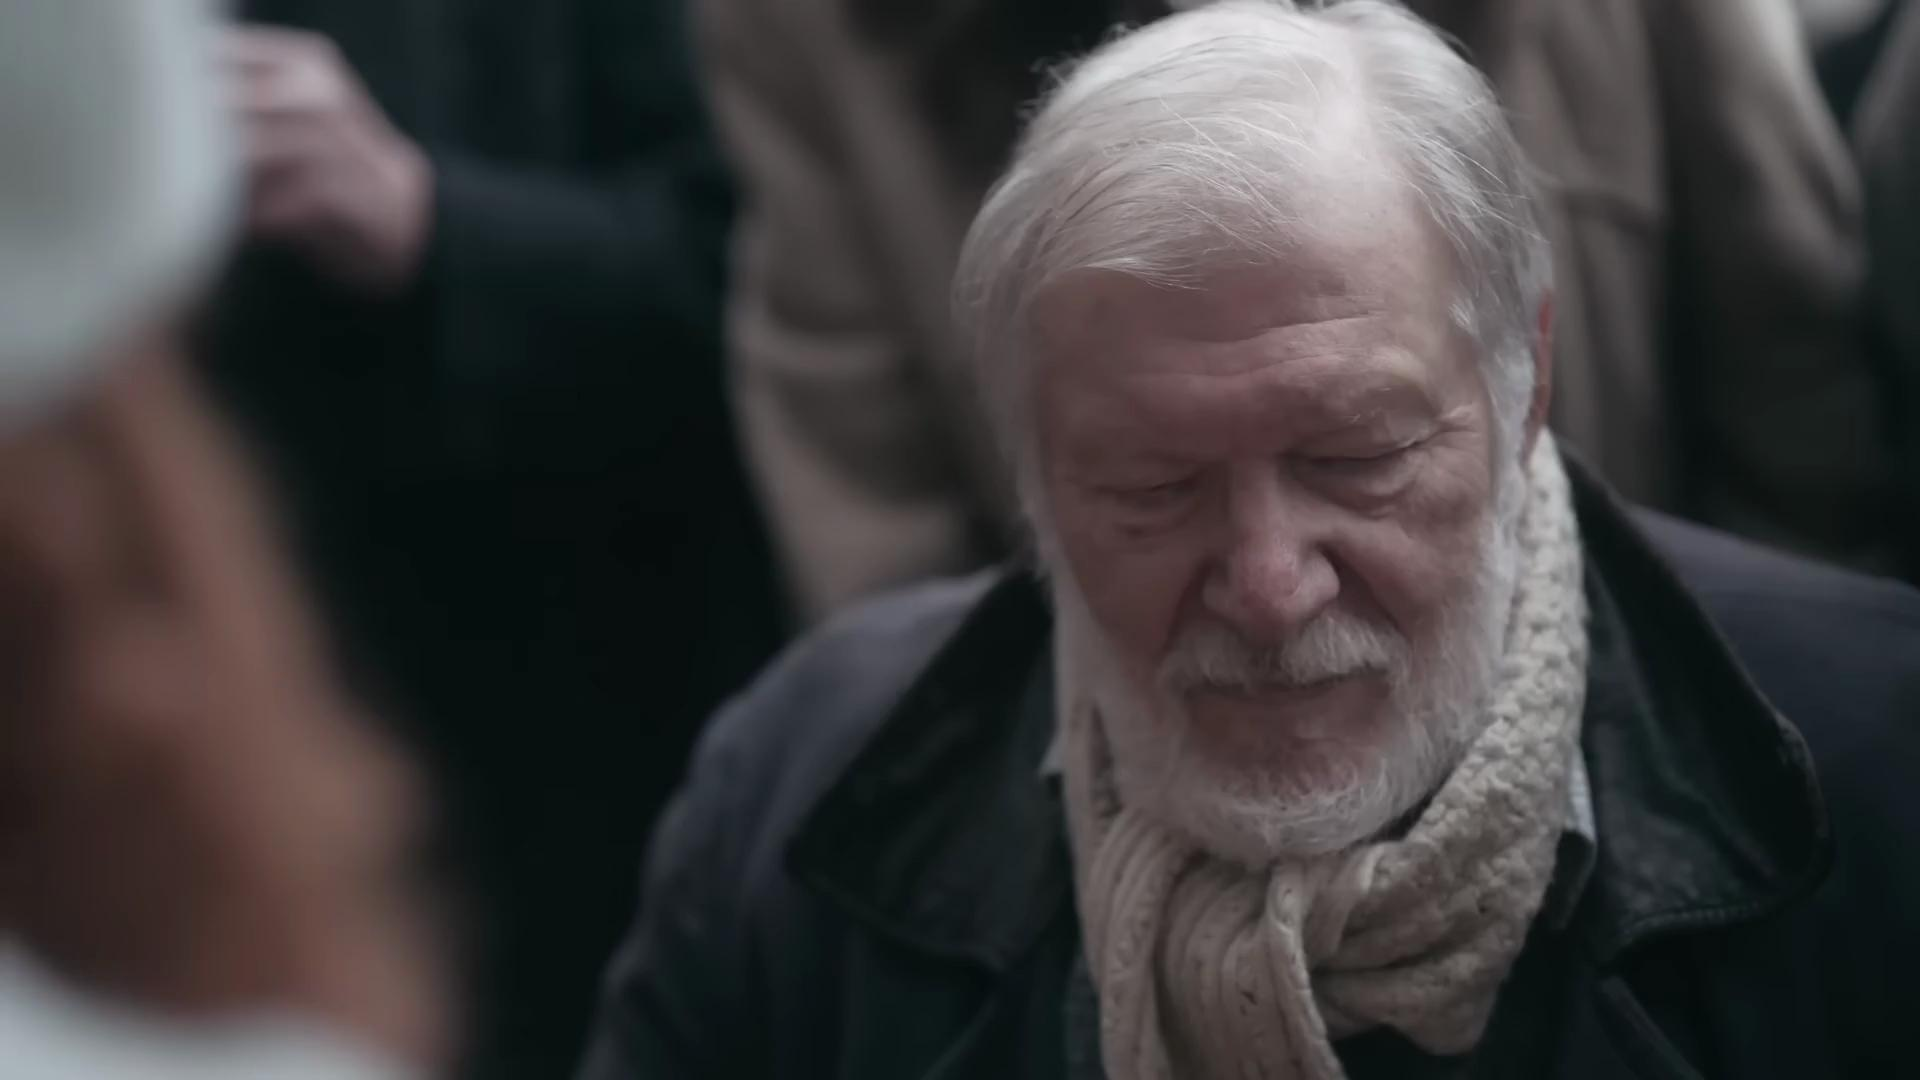
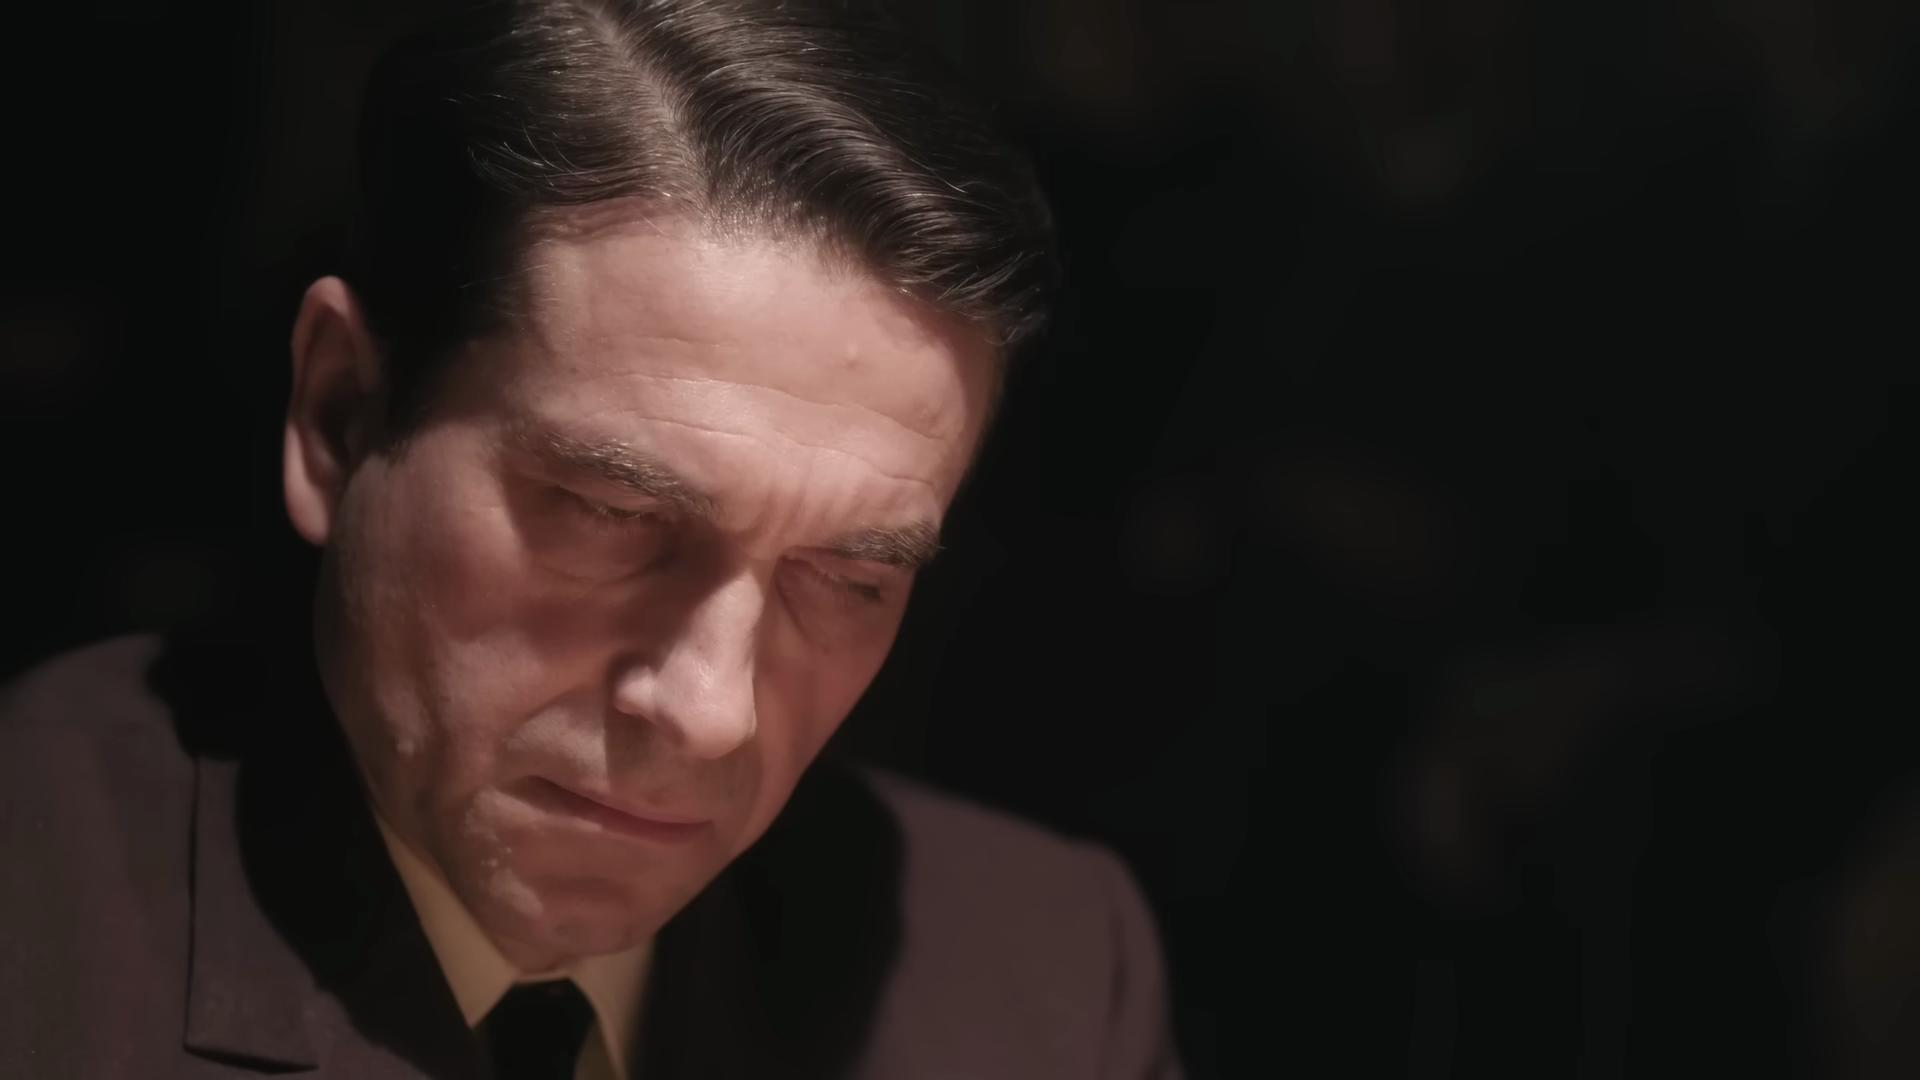
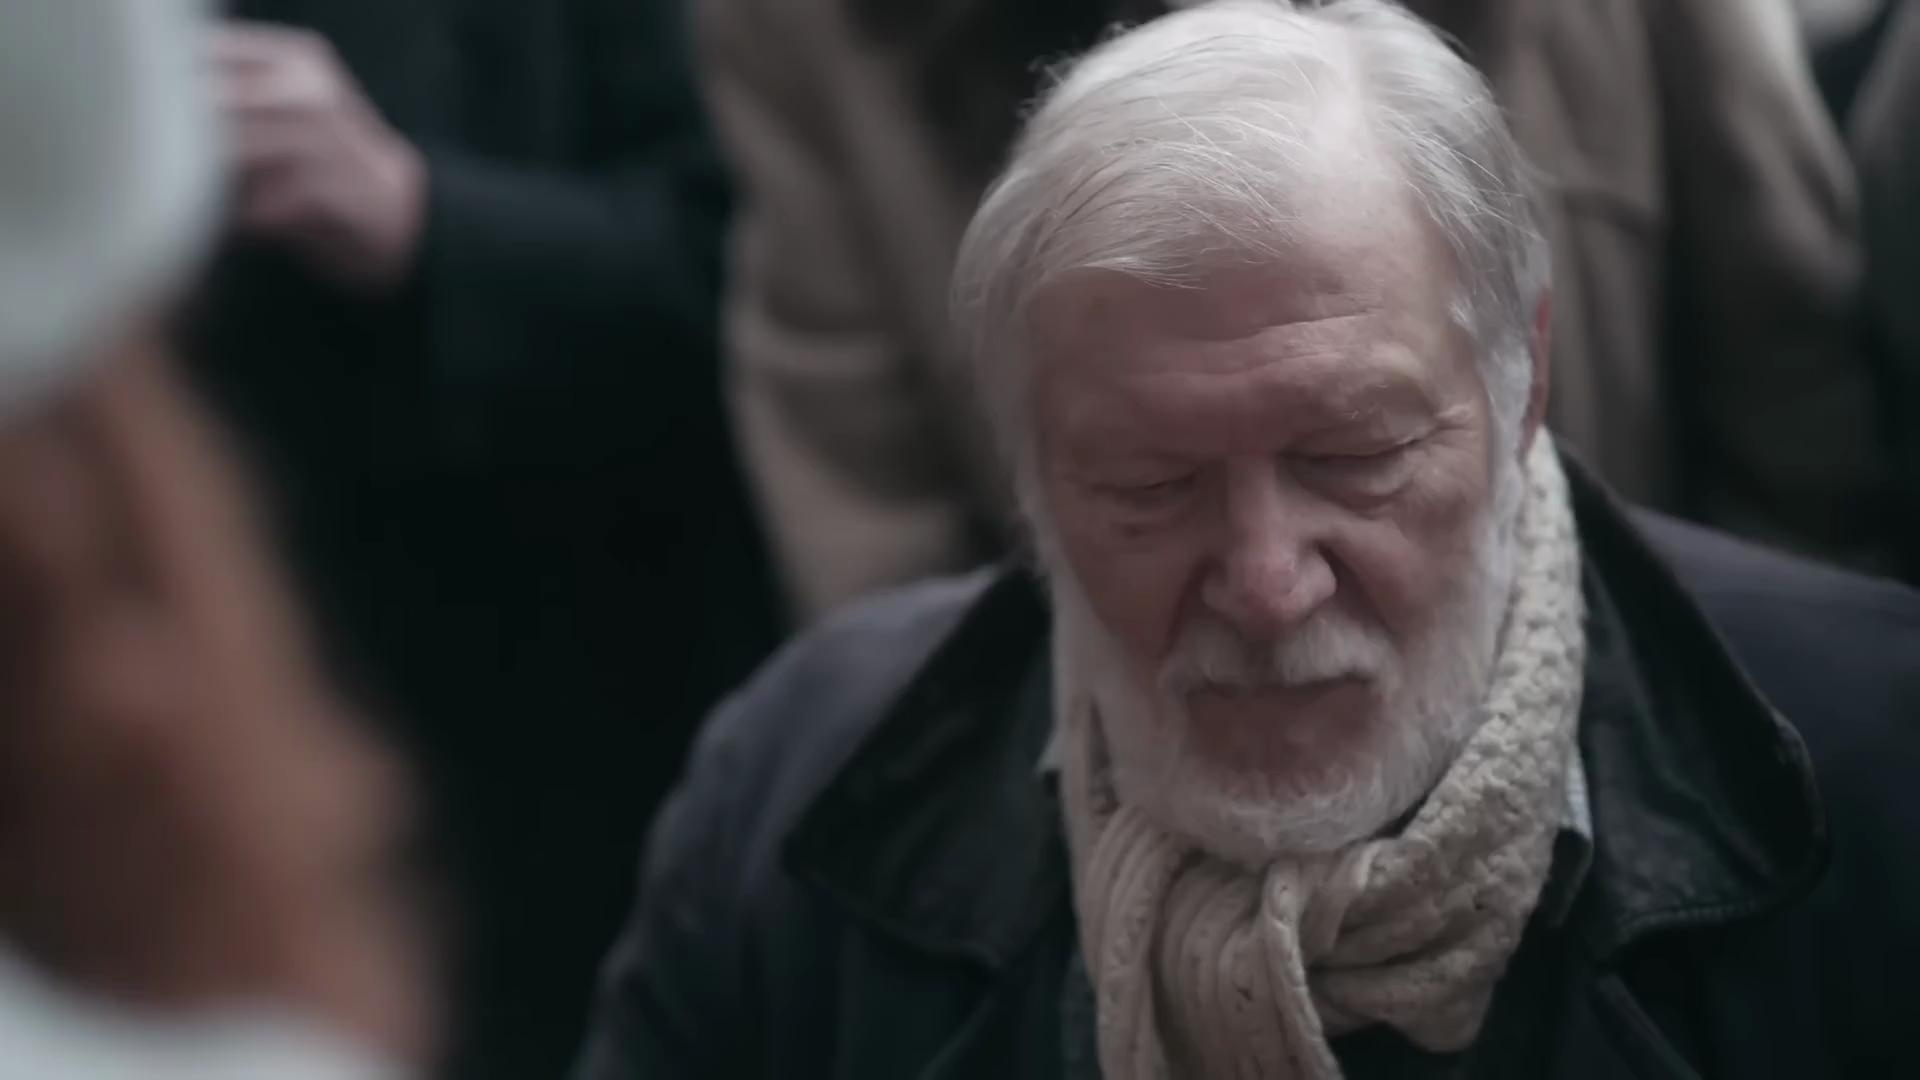
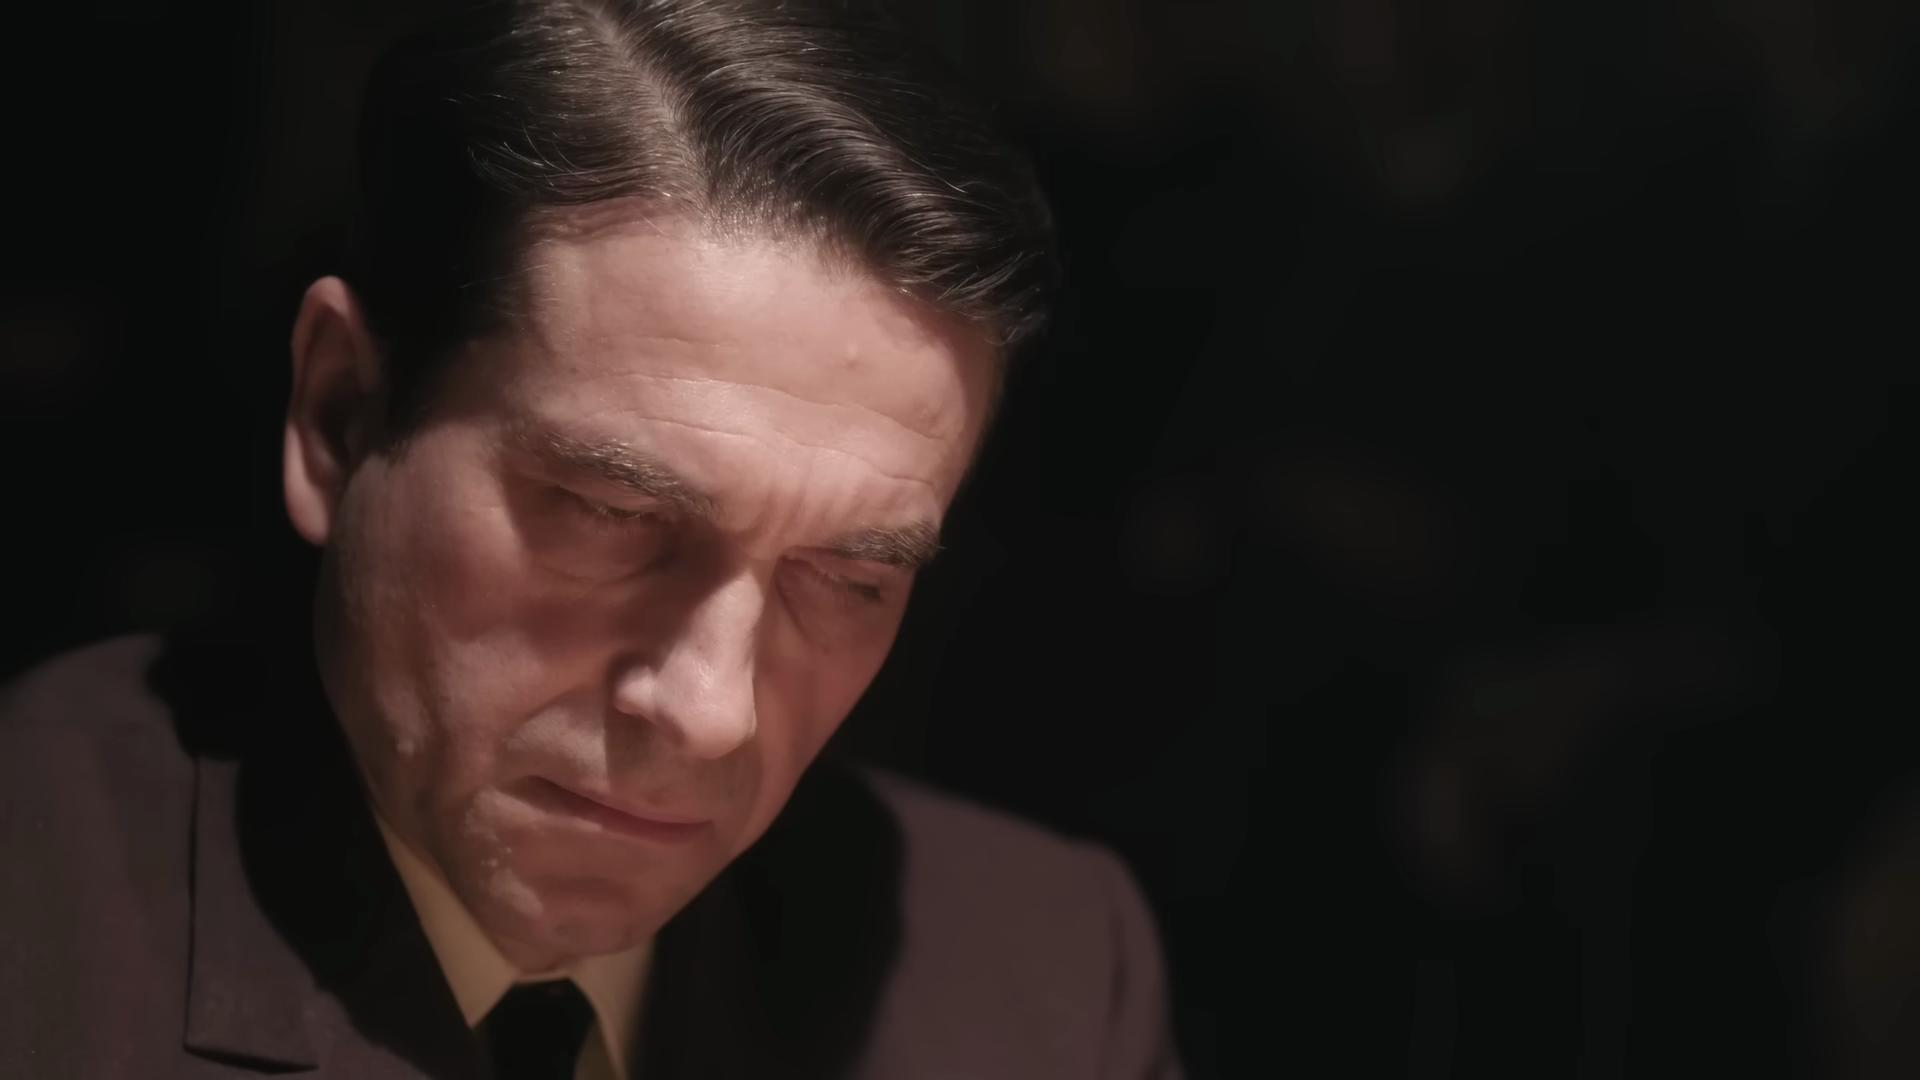
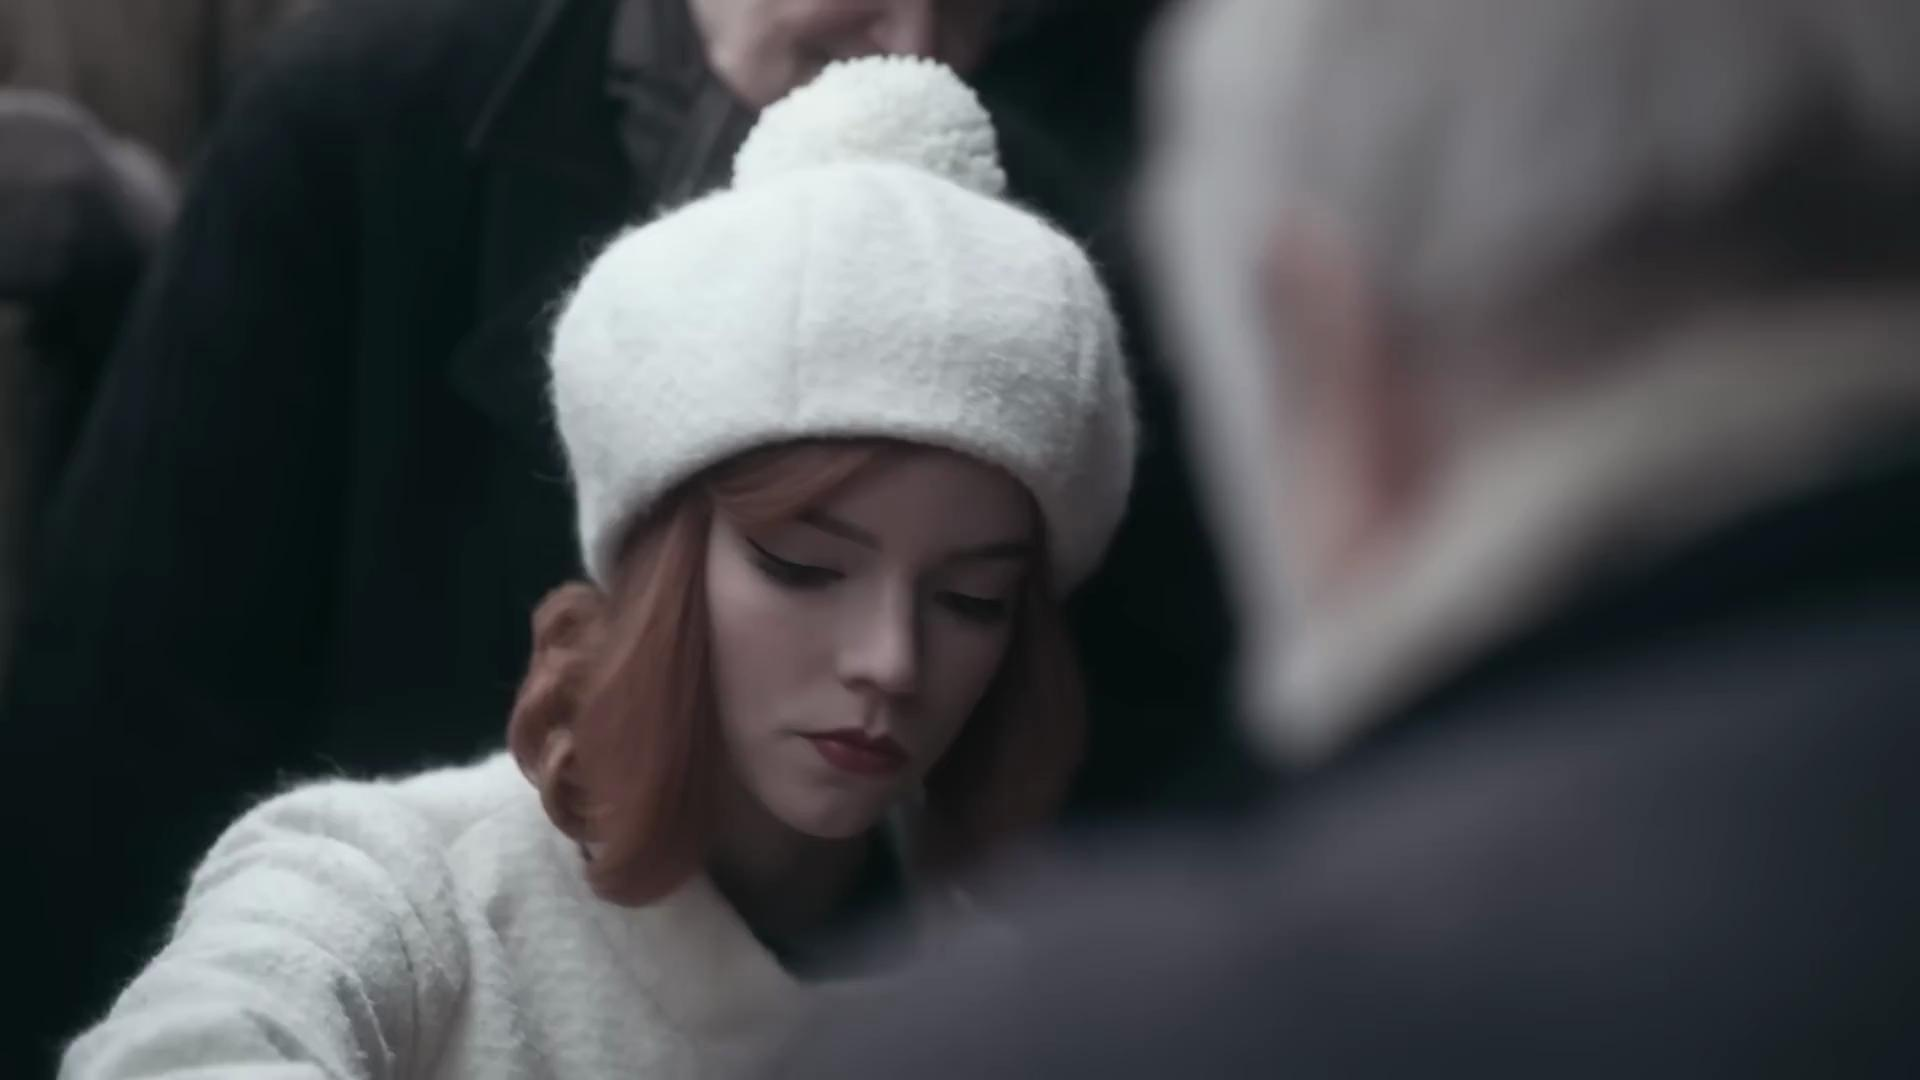
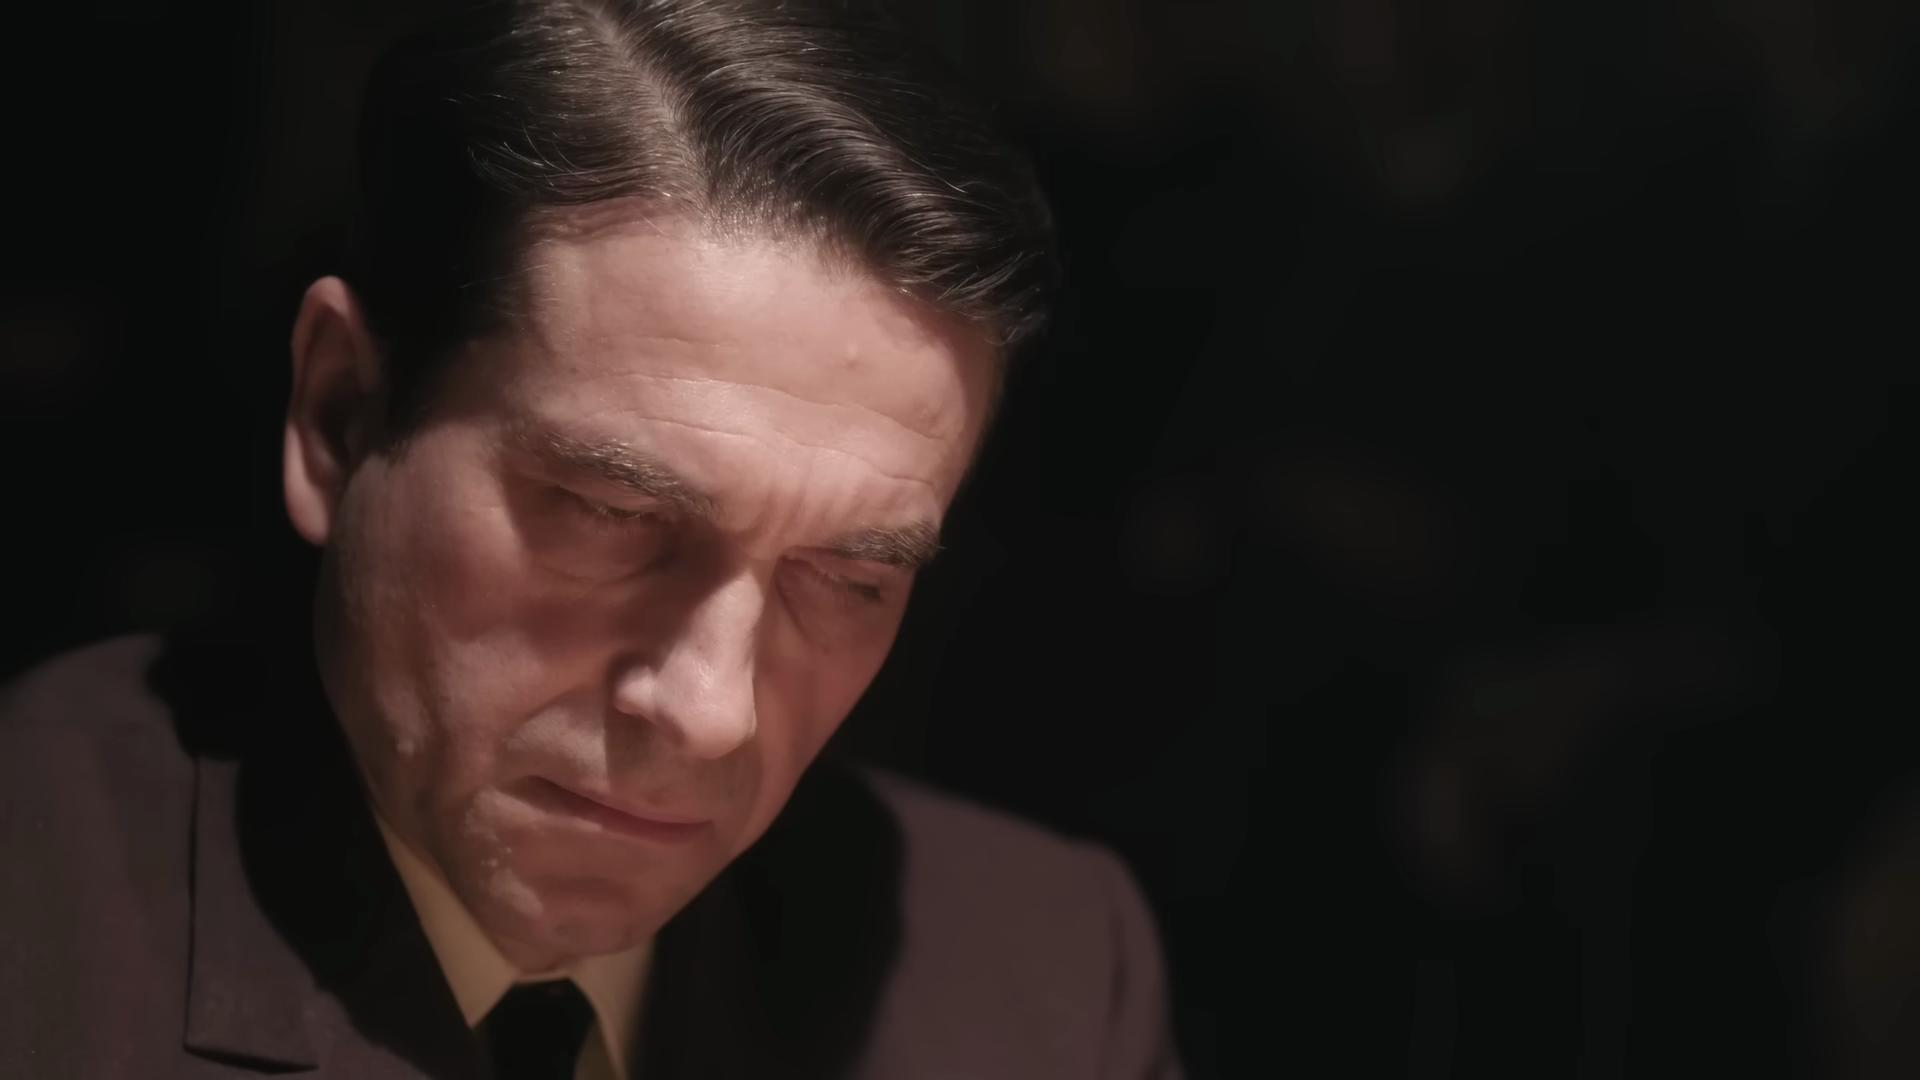
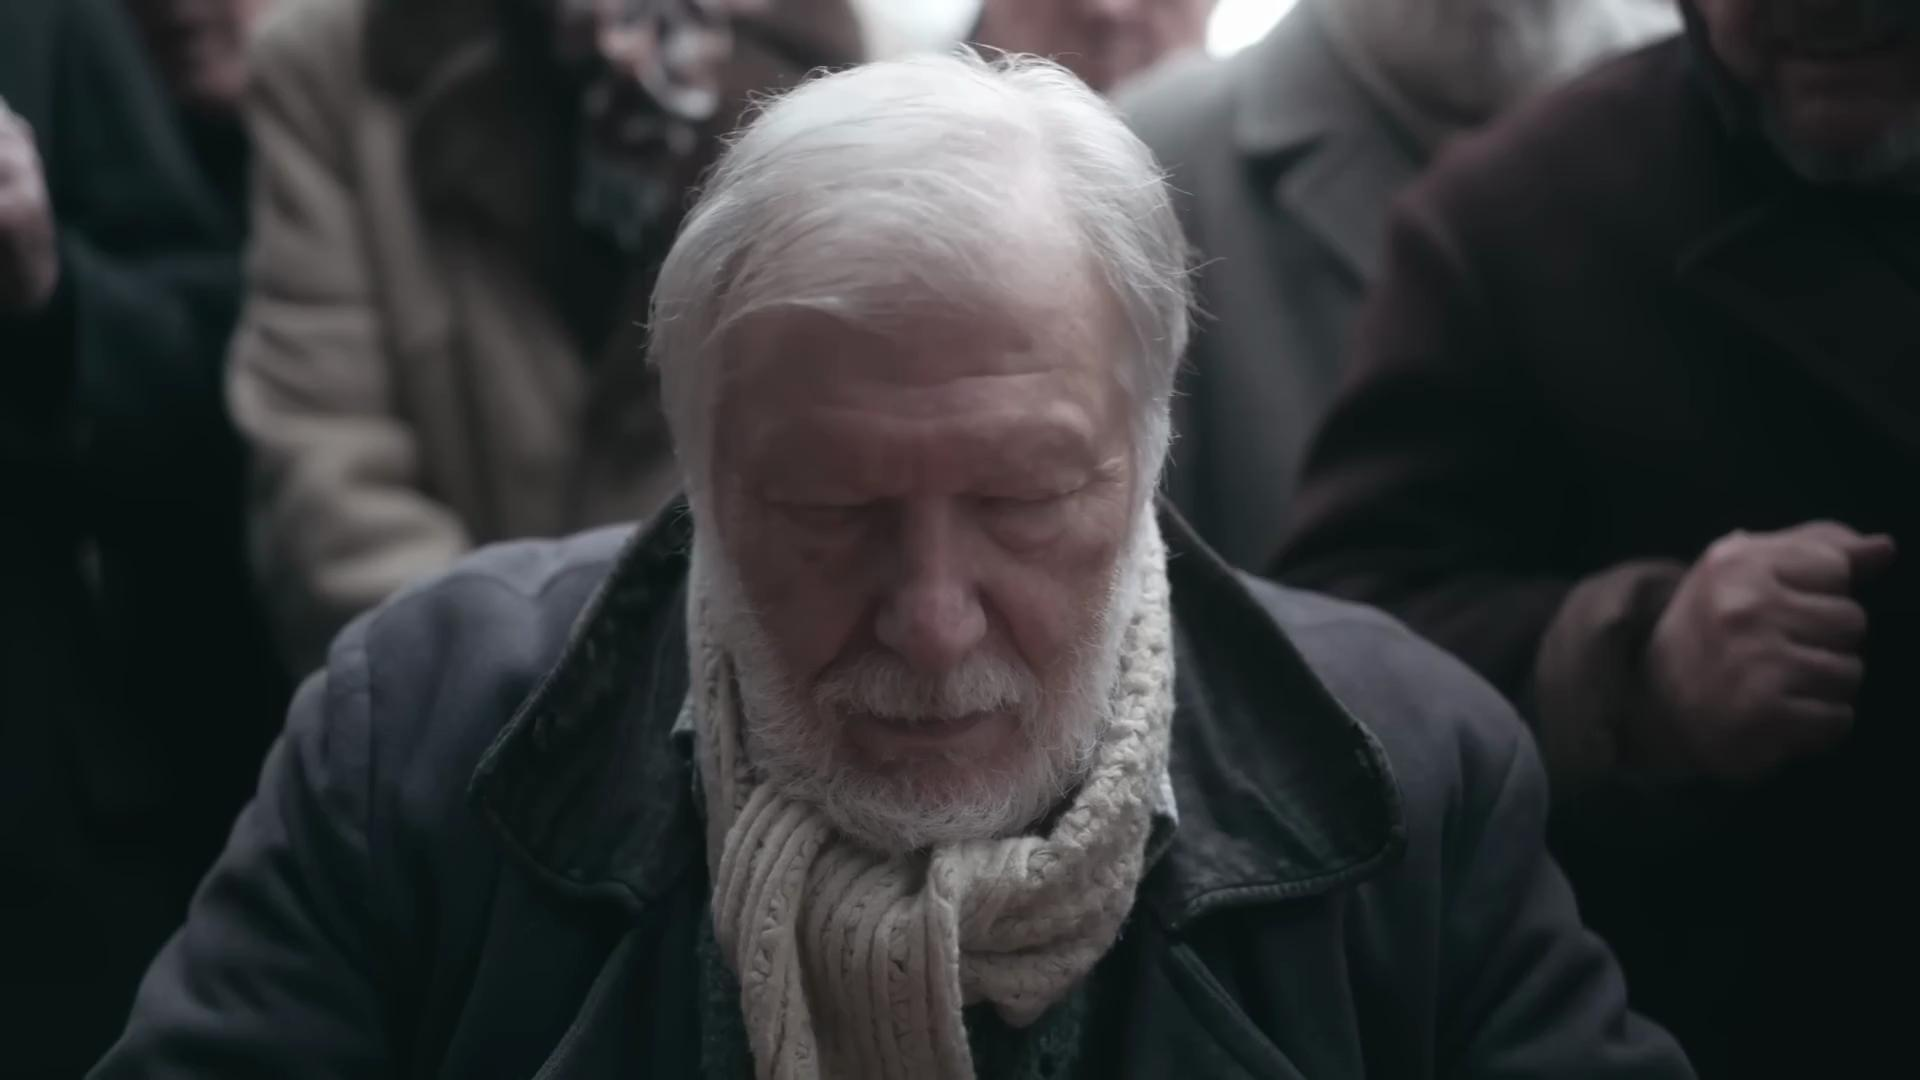
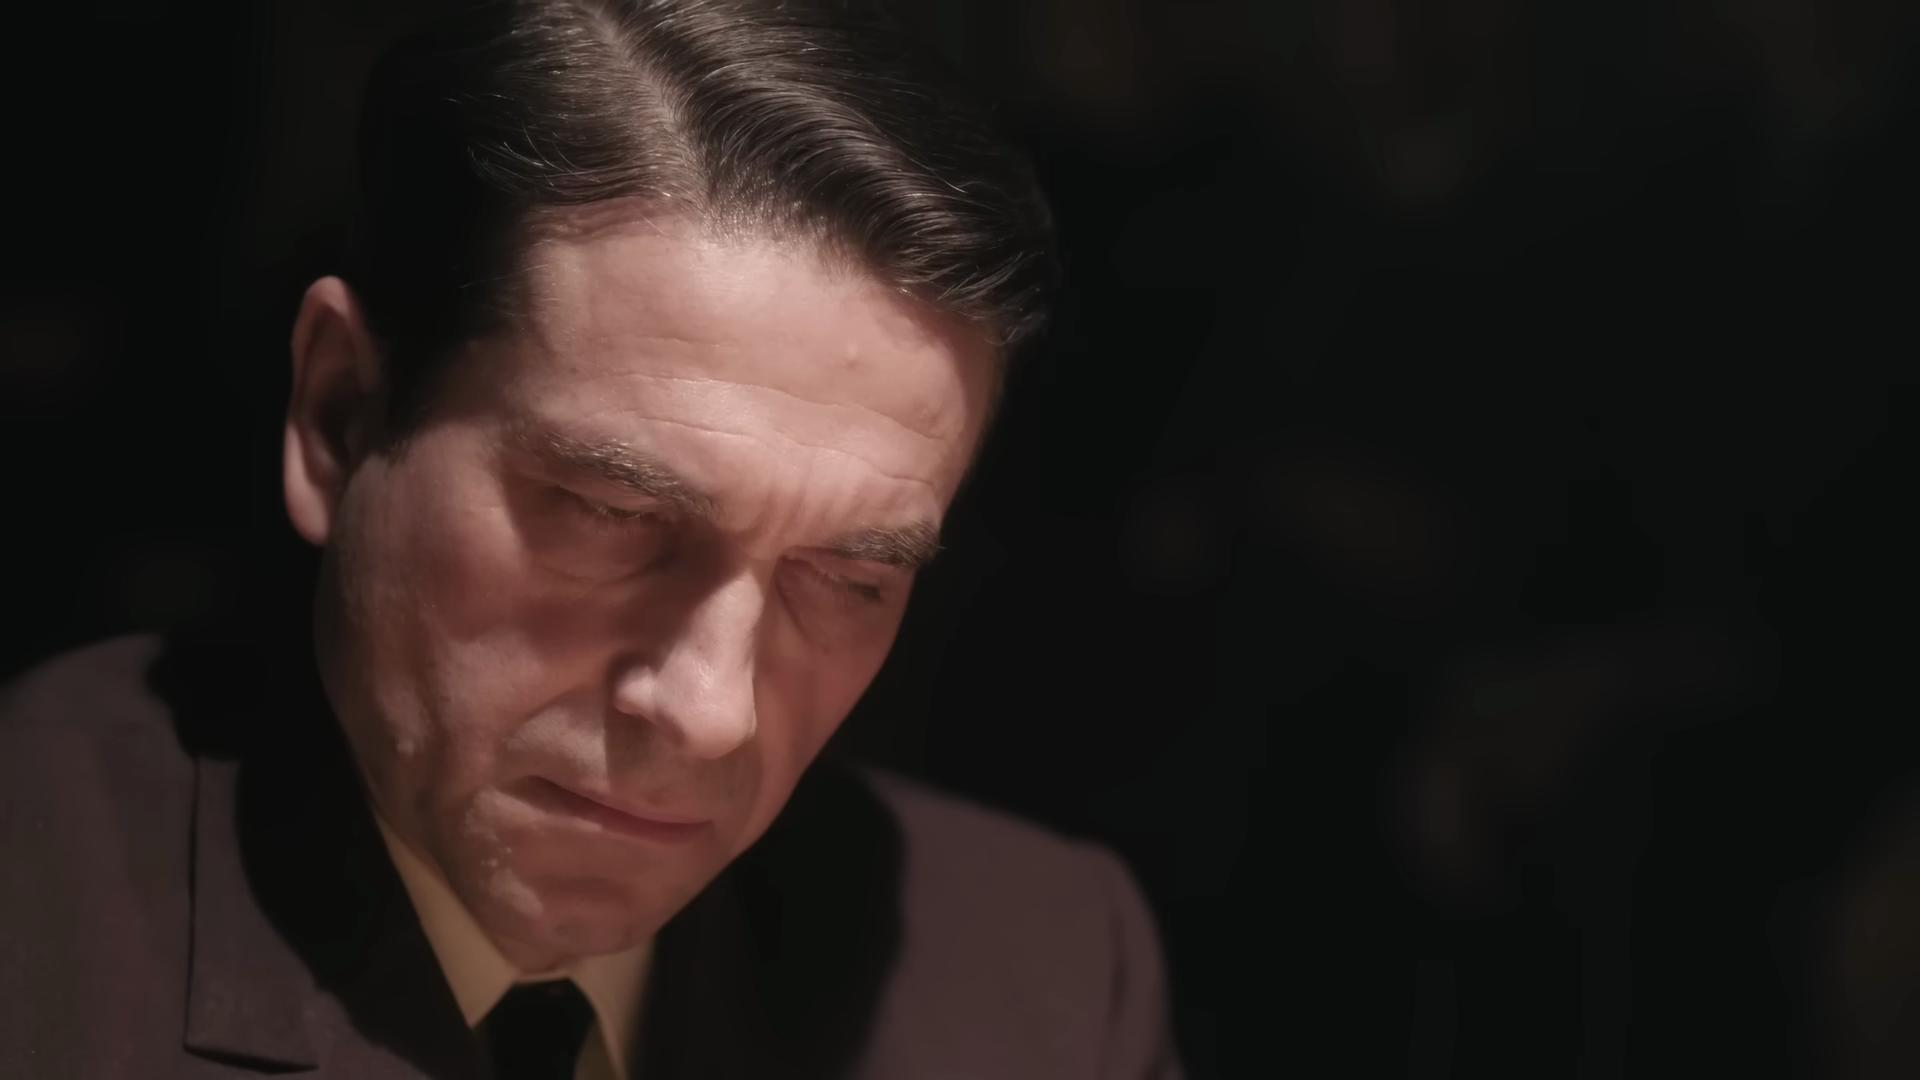
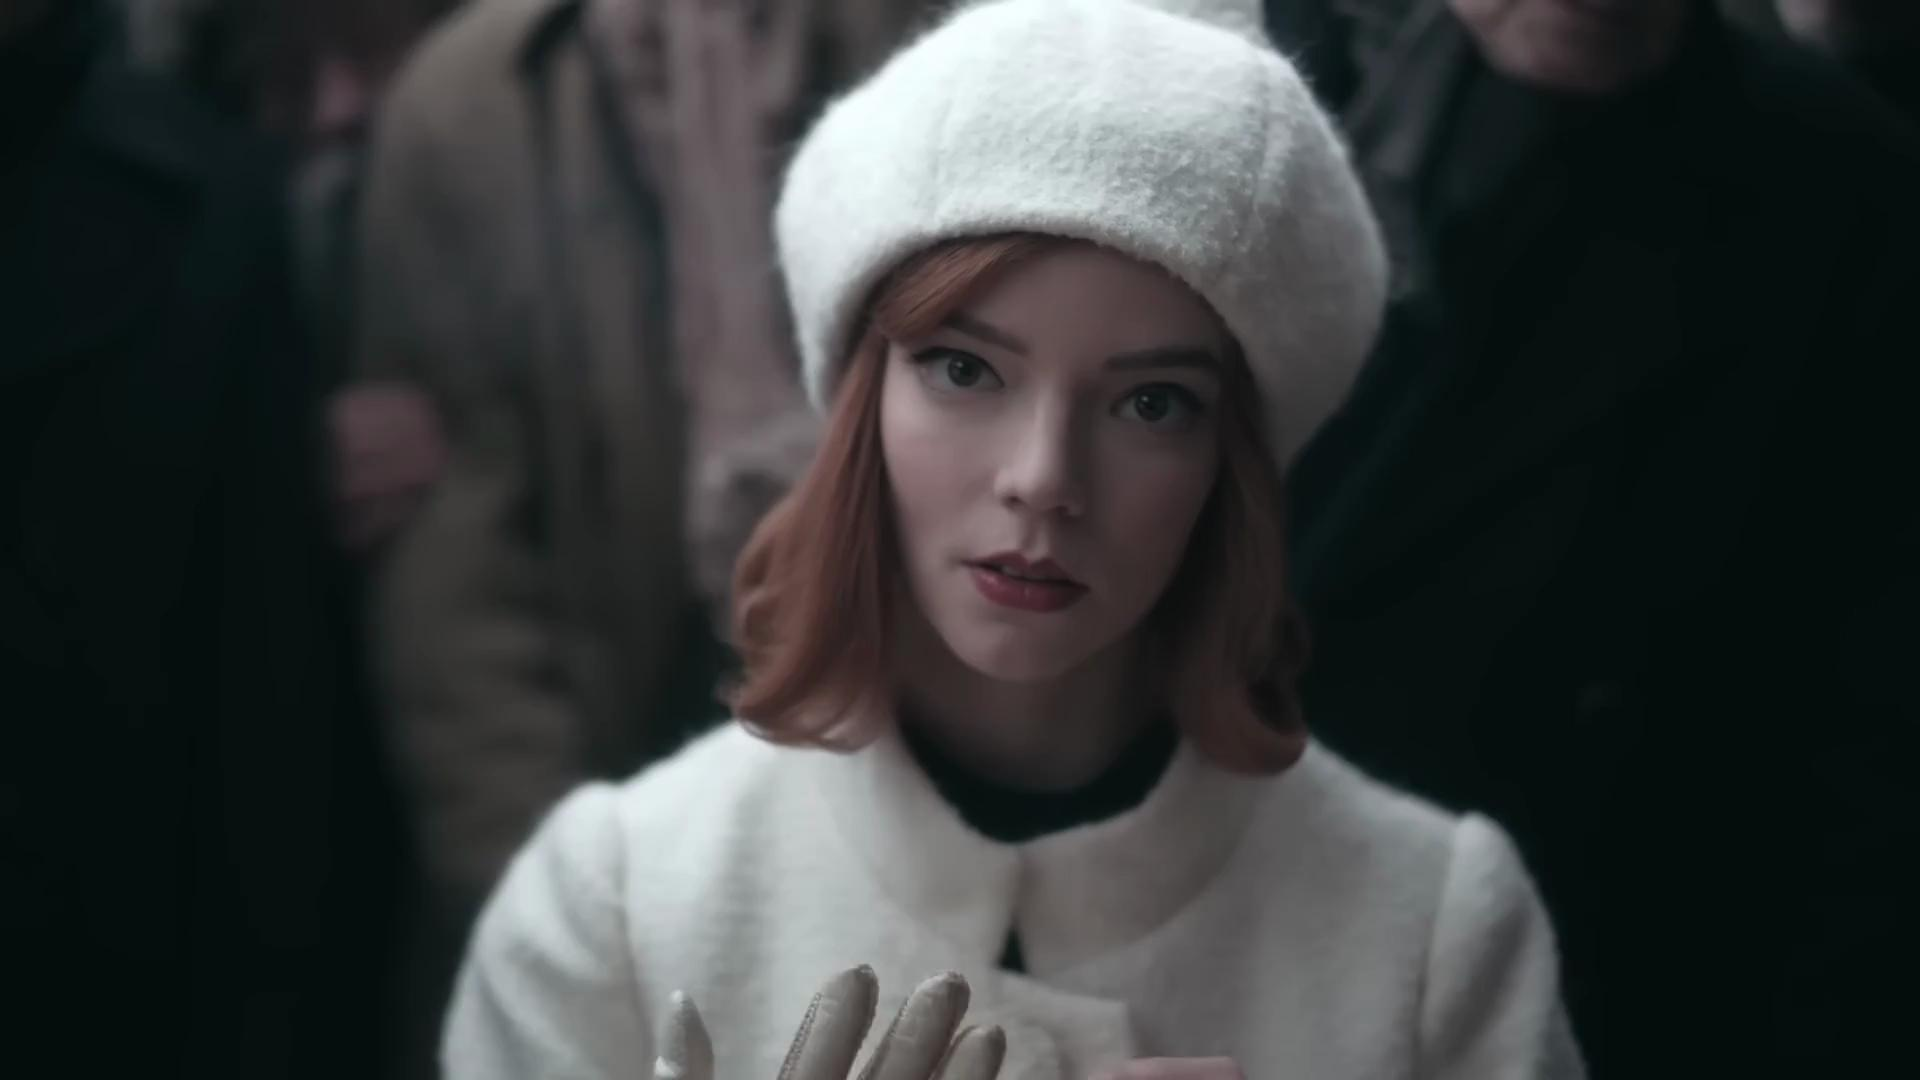
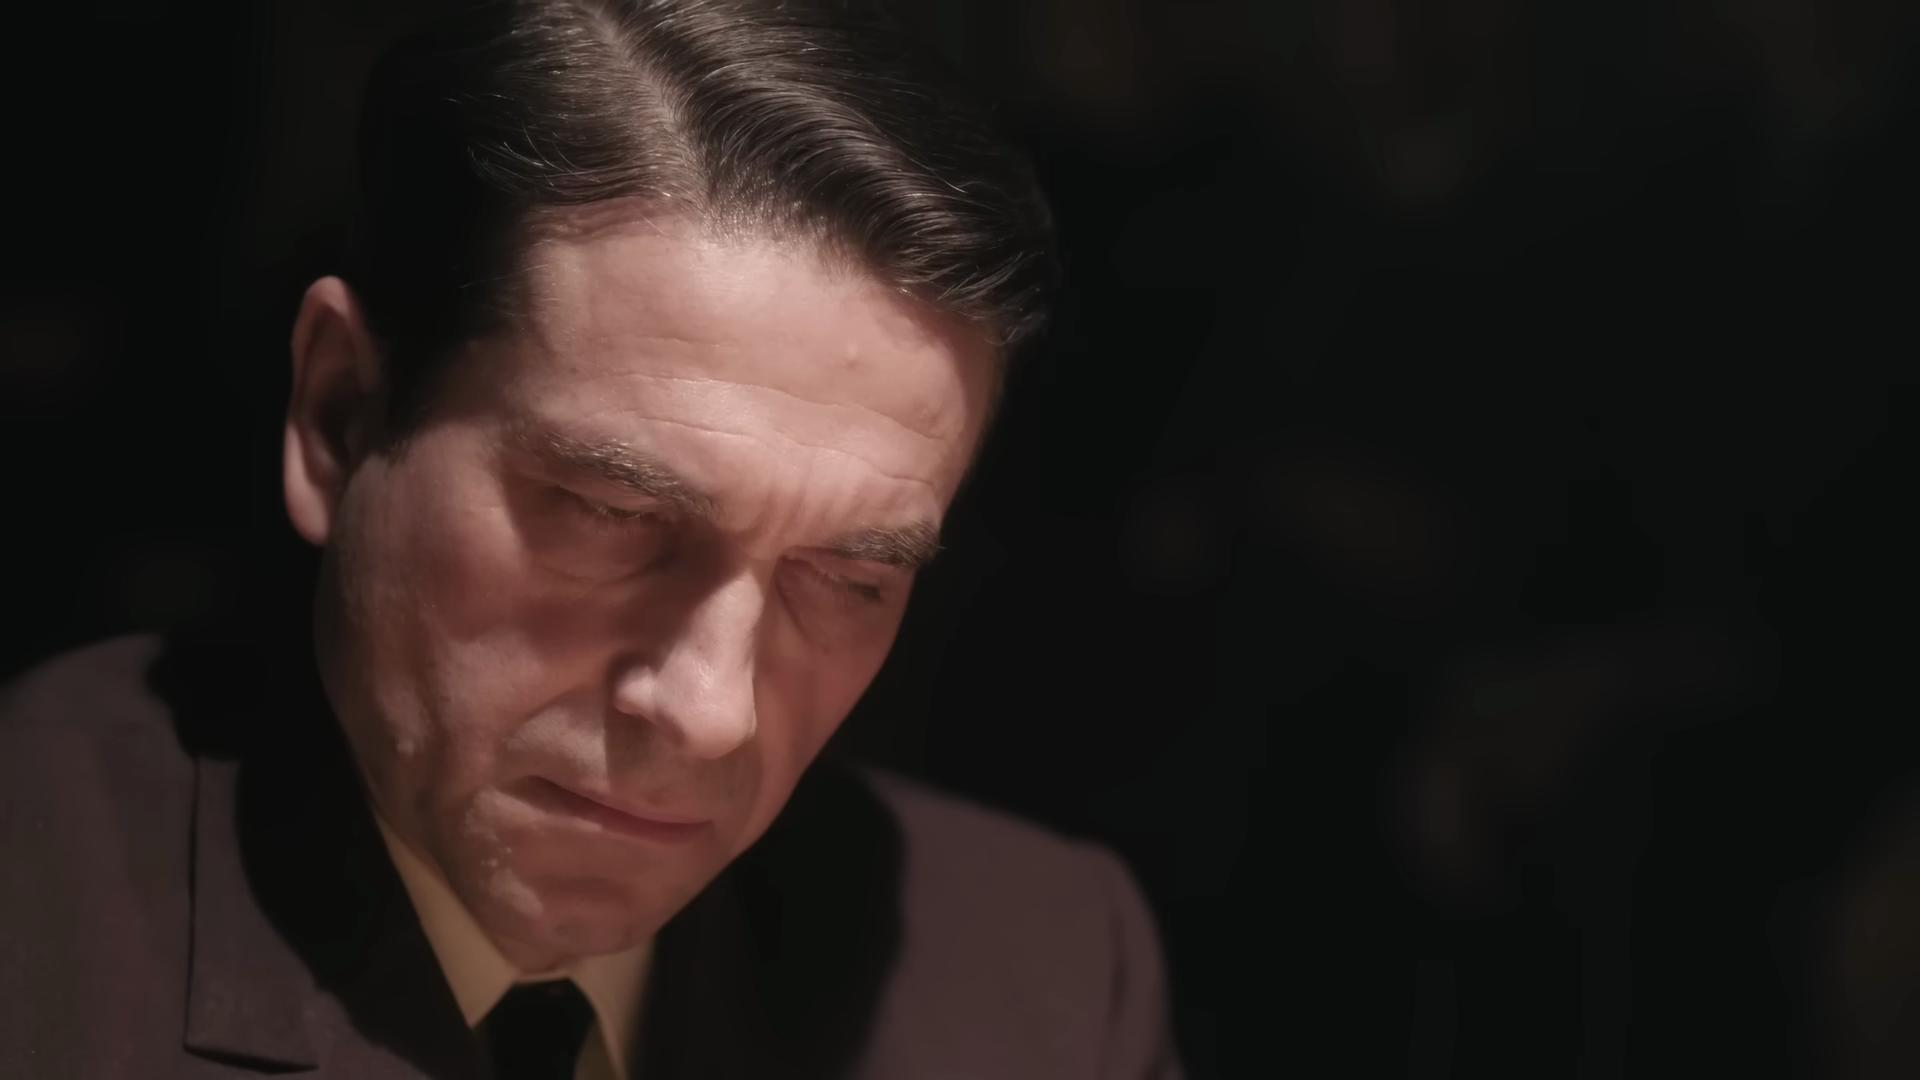
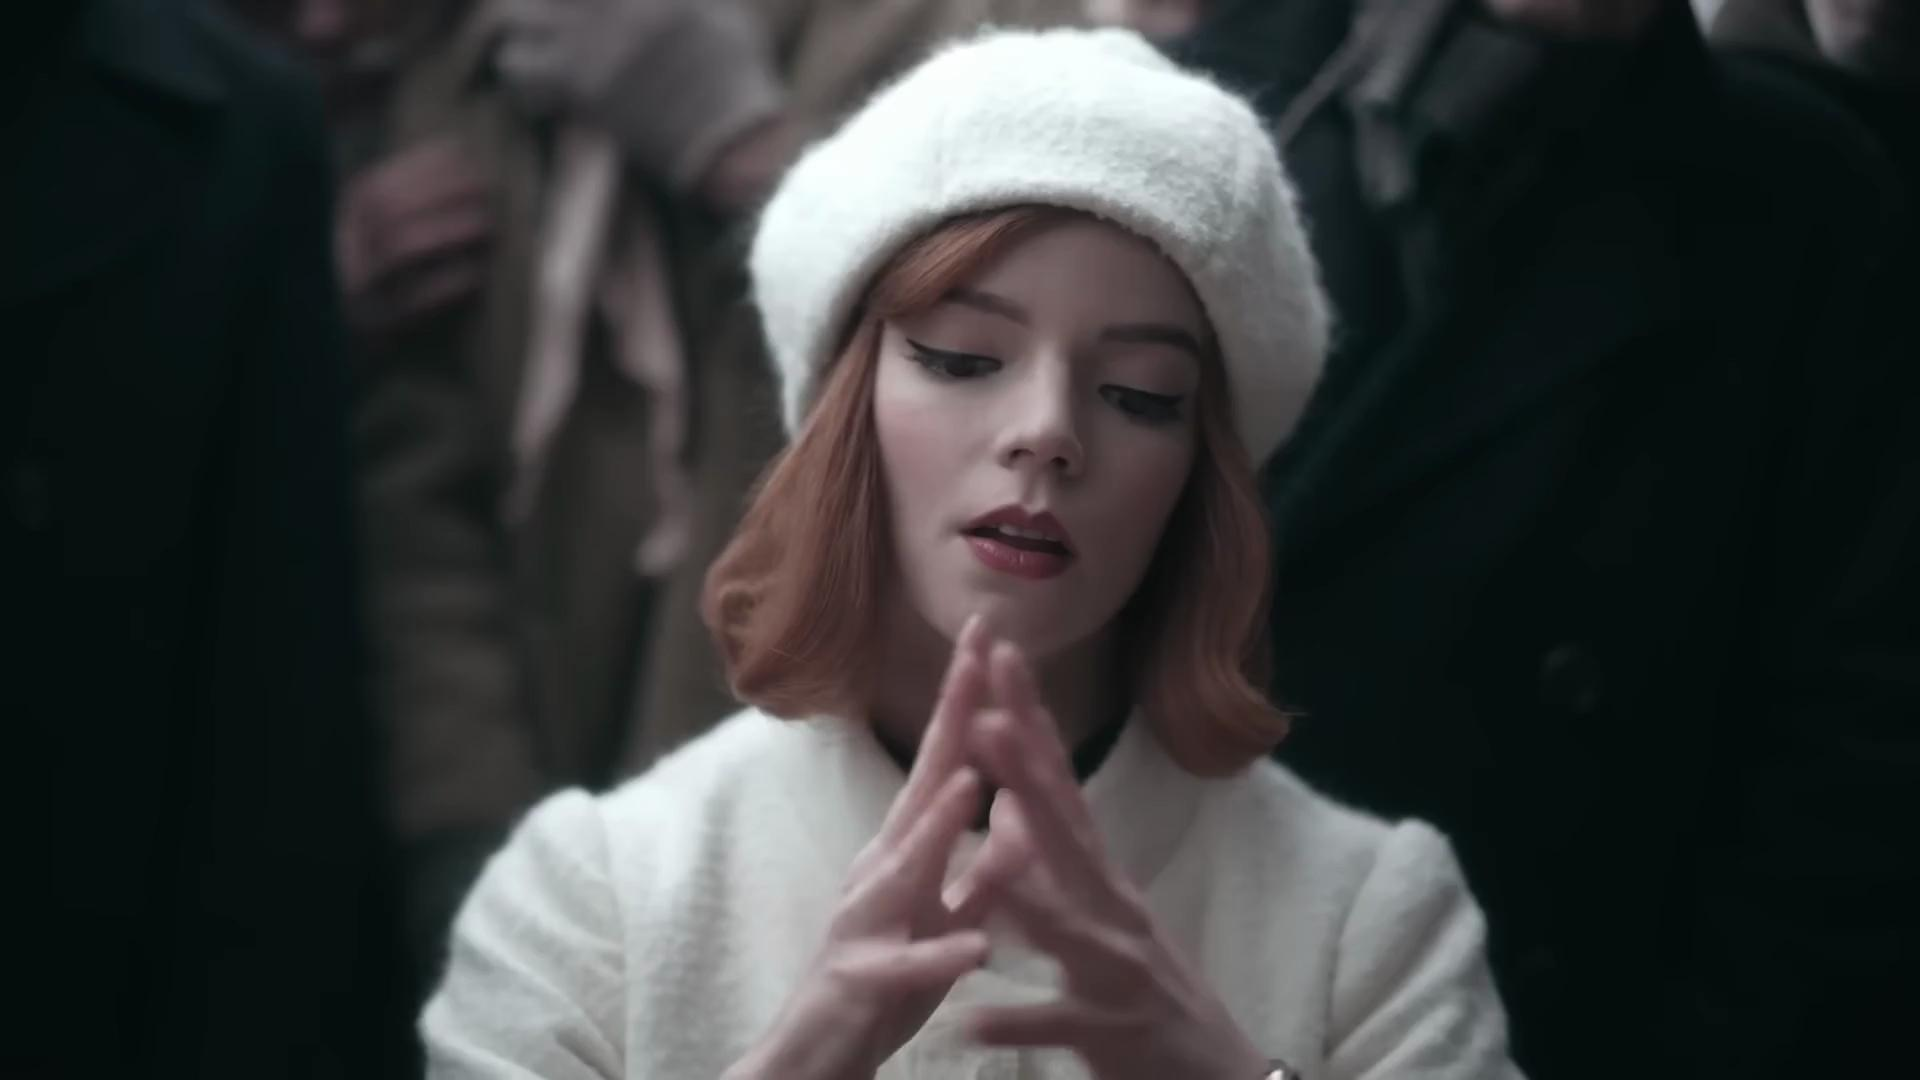
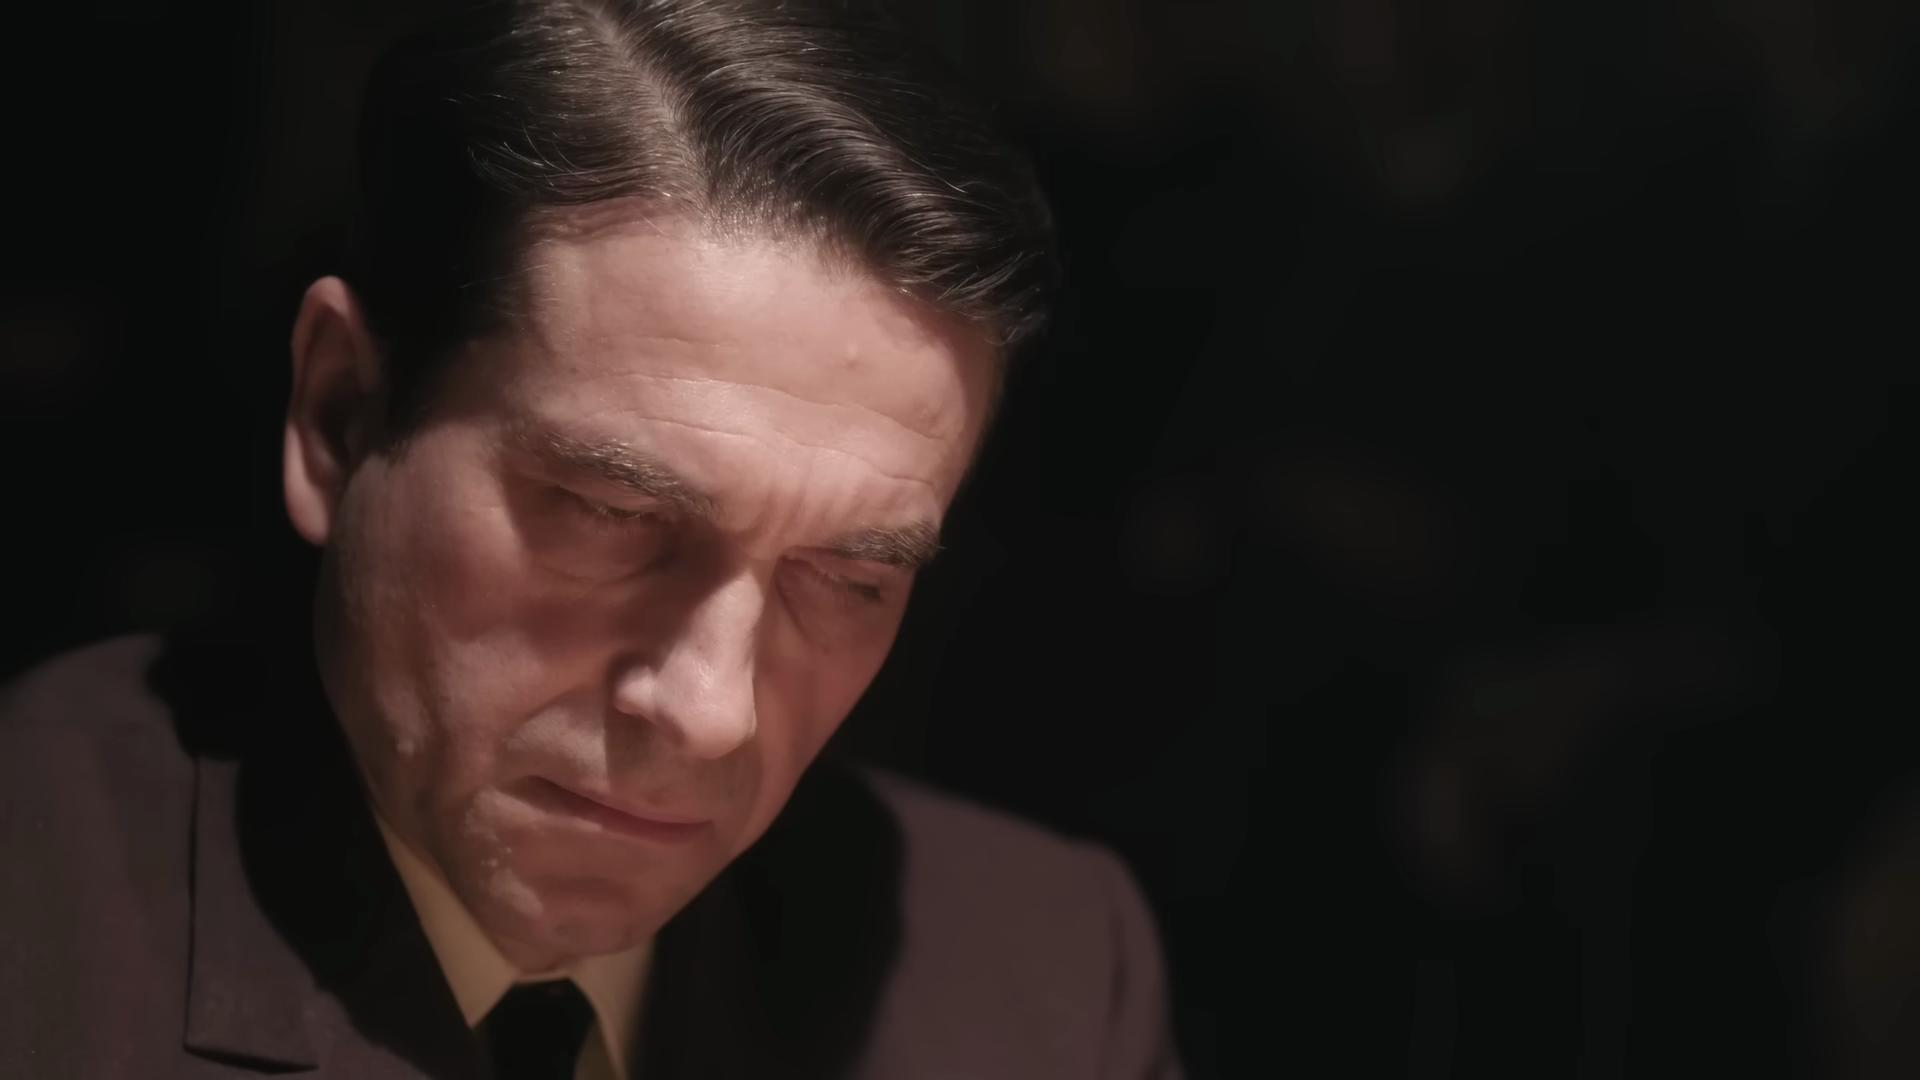
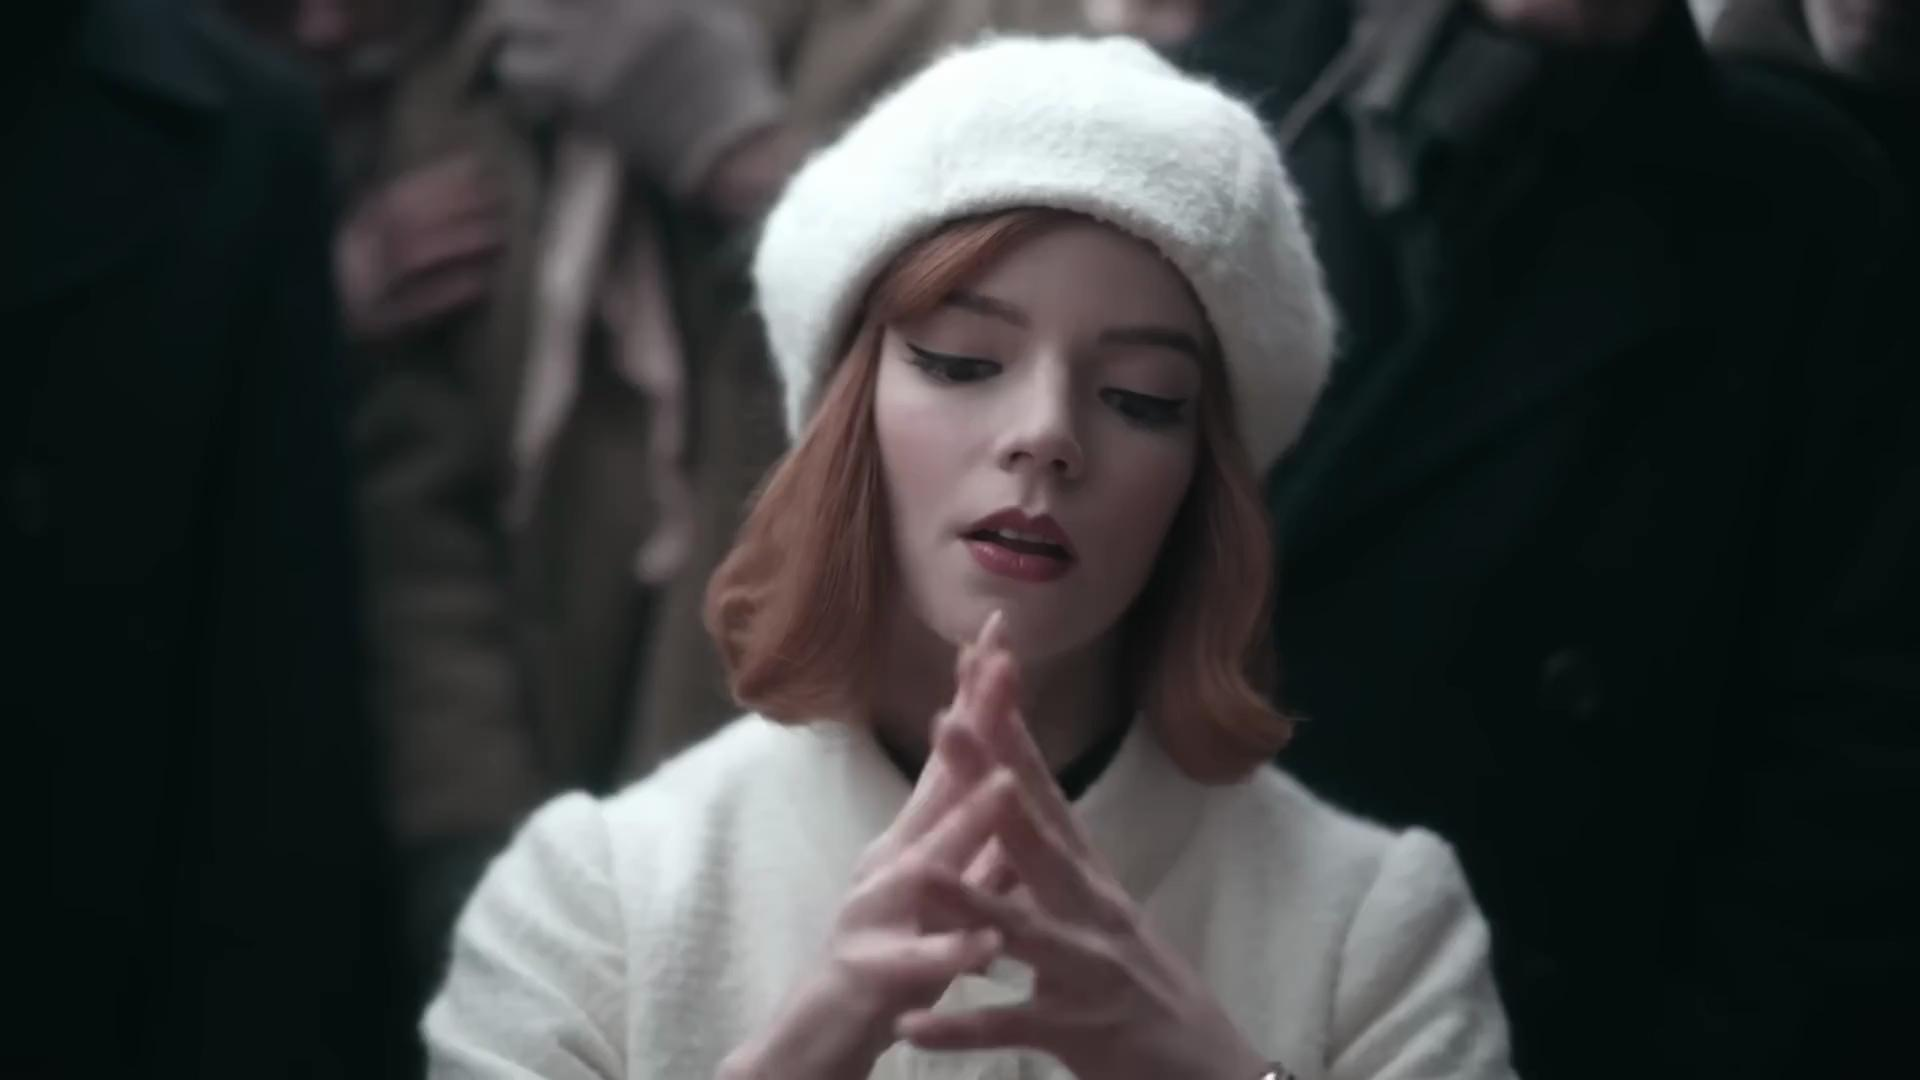
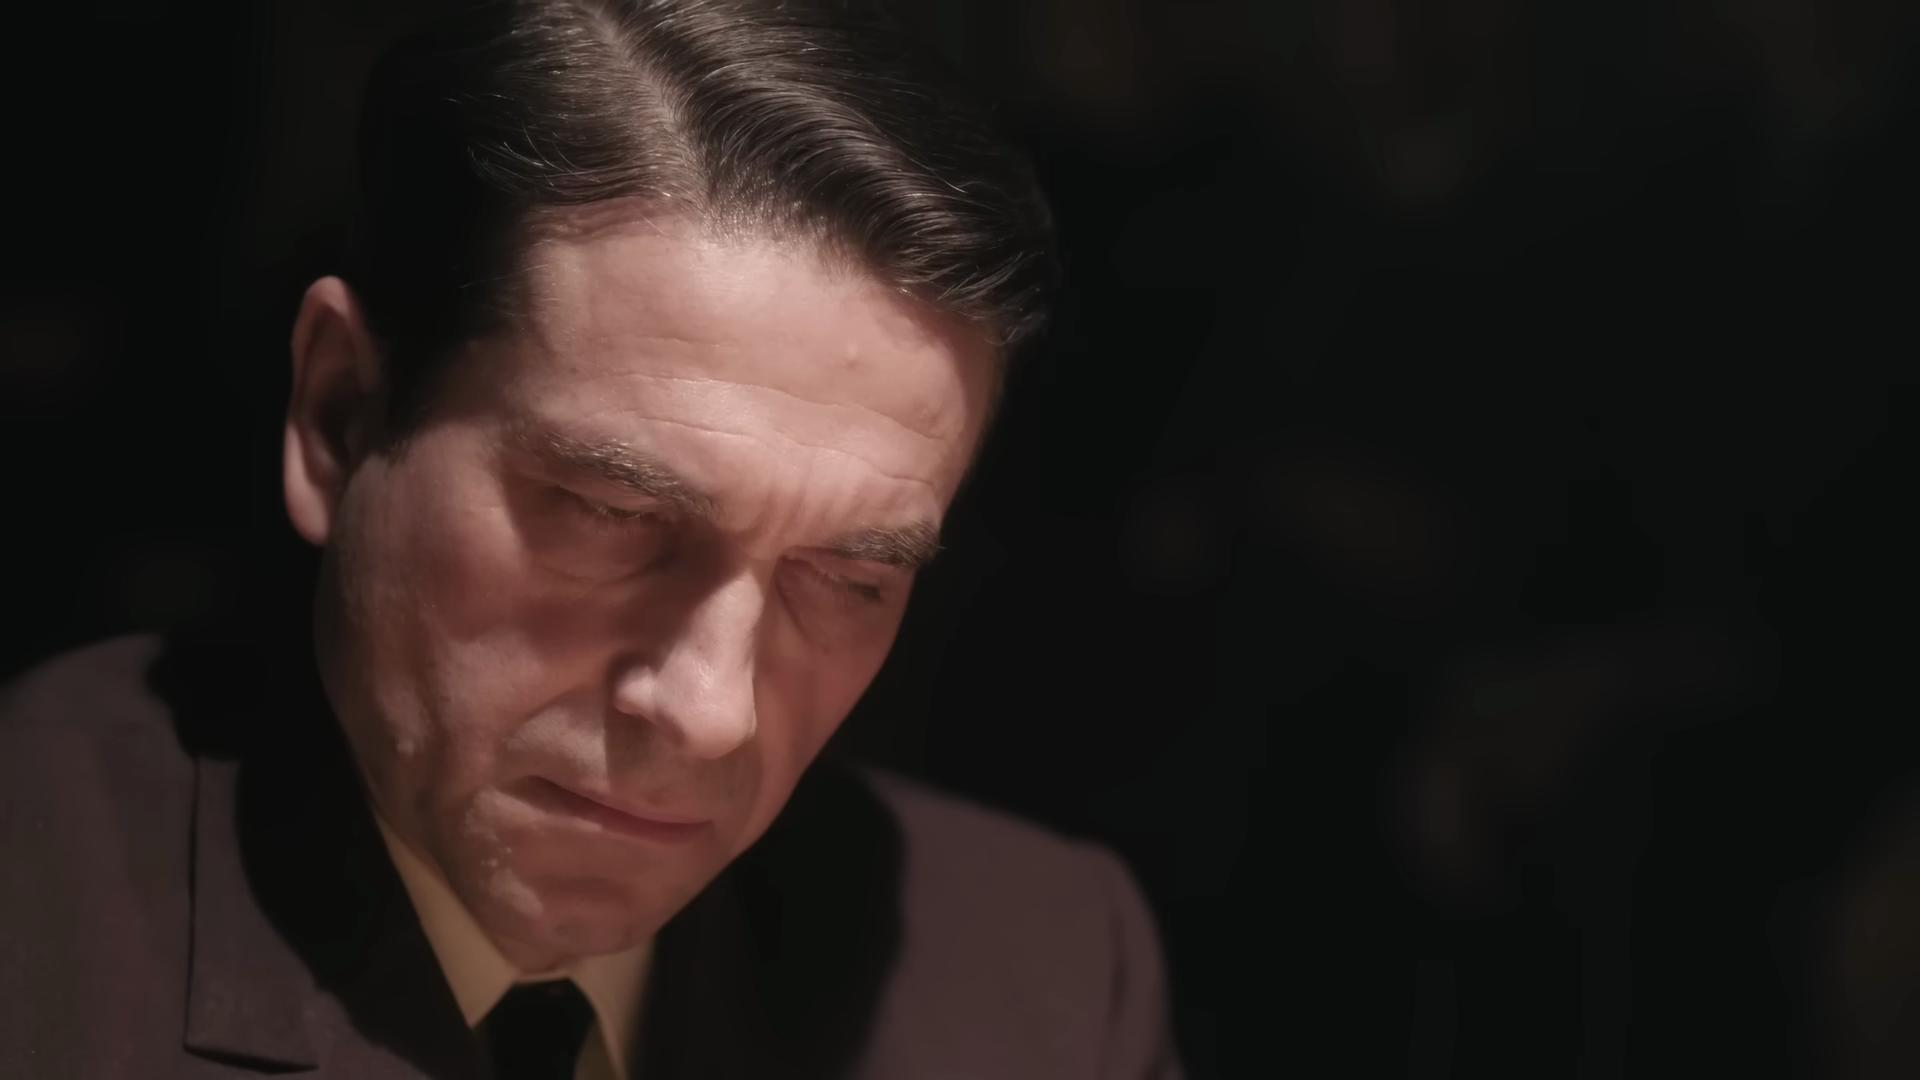

In [22]:
# tail() returns the last 5 rows, head() returns the first 5
cont.select(cont.pos, cont.segment_start, cont.segment_end, cont.video_segment, cont.video).tail()

Now, based on the splits, you might want to tune your scene detection algorithm and perhaps experiment with other methods. For example, I notice a few scenes that are less than 1 second long, suggesting the algorithm is pretty sensitive to breaks that may not be meaningful scene breaks.

### 03 - Compare methods for scene detection


We can now explore how different algorithms handle the same video, and use some additional arguments to tune the algorithm's behavior. For a 6 minute clip, 68 scenes seems a little excessive. Histogram Detection may be less sensitive to brief changes and should produce fewer very short scenes - we will also increase the threshold and enforce a minimum scene length.

To compare models, we need to do 2 steps:

1. Return to our base table, `v`, and add a new computed column with a different method for scene detection
2. Create a new view to explore the outputs

In [23]:
v.add_computed_column(
    scenes_hist=v.video.scene_detect_histogram(
        fps=10,
        threshold=0.6,
        min_scene_len=100 # 10 seconds given 10 fps
    ),
    if_exists='replace'
)

Added 1 column value with 0 errors.


1 row updated, 1 value computed.

Check out the schema for our base table to see the added column:

In [24]:
v

table 'chess_vids'

  Column Name   Type                                      Computed With
        video  Video                                                   
     duration  Float                               video.get_duration()
       scenes   Json                 video.scene_detect_content(fps=10)
  scenes_hist   Json  video.scene_detect_histogram(fps=10,\n    thre...

Now we create a new view, using these newly computed scene boundaries as our segment times:

In [25]:
from pixeltable.iterators import VideoSplitter

# create a new view
hist = pxt.create_view(
                    'hist_scene_view',
                    v,
                    iterator=VideoSplitter.create(
                        video=v.video,
                        segment_times=v.scenes_hist[1:].start_time, 
                        mode='accurate',
                    ),
                    if_exists='replace'
                )

Inserting rows into `hist_scene_view`: 10 rows [00:00, 4161.43 rows/s]


In [26]:
hist

view 'hist_scene_view' (of 'chess_vids')

        Column Name             Type                                      Computed With
                pos    Required[Int]                                                   
      segment_start            Float                                                   
  segment_start_pts              Int                                                   
        segment_end            Float                                                   
    segment_end_pts              Int                                                   
      video_segment  Required[Video]                                                   
              video            Video                                                   
           duration            Float                               video.get_duration()
             scenes             Json                 video.scene_detect_content(fps=10)
        scenes_hist             Json  video.scene_detect_histogram(fps=10,\n    thre...

In [27]:
hist.count()

10

pos  segment_start  segment_end  \
0    0       0.000000    31.740042   
1    1      31.740042    45.628917   
2    2      45.628917   130.880750   
3    3     130.880750   154.487667   
4    4     154.487667   180.221667   
5    5     180.221667   231.522917   
6    6     231.522917   301.843167   
7    7     301.843167   308.975292   
8    8     308.975292   350.433292   
9    9     350.433292   377.043208   

                                       video_segment  \
0  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
1  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
2  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
3  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
4  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
5  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
6  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
7  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
8  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
9  /Users/alison-pxt/.pixeltable/media/c4b809b944...   

                                               video  
0  /Users/alison-pxt/Documents/Github/pxt-primeti...  
1  /Users/alison-pxt/Documents/Github/pxt-primeti...  
2  /Users/alison-pxt/Documents/Github/pxt-primeti...  
3  /Users/alison-pxt/Documents/Github/pxt-primeti...  
4  /Users/alison-pxt/Documents/Github/pxt-primeti...  
5  /Users/alison-pxt/Documents/Github/pxt-primeti...  
6  /Users/alison-pxt/Documents/Github/pxt-primeti...  
7  /Users/alison-pxt/Documents/Github/pxt-primeti...  
8  /Users/alison-pxt/Documents/Github/pxt-primeti...  
9  /Users/alison-pxt/Documents/Github/pxt-primeti...
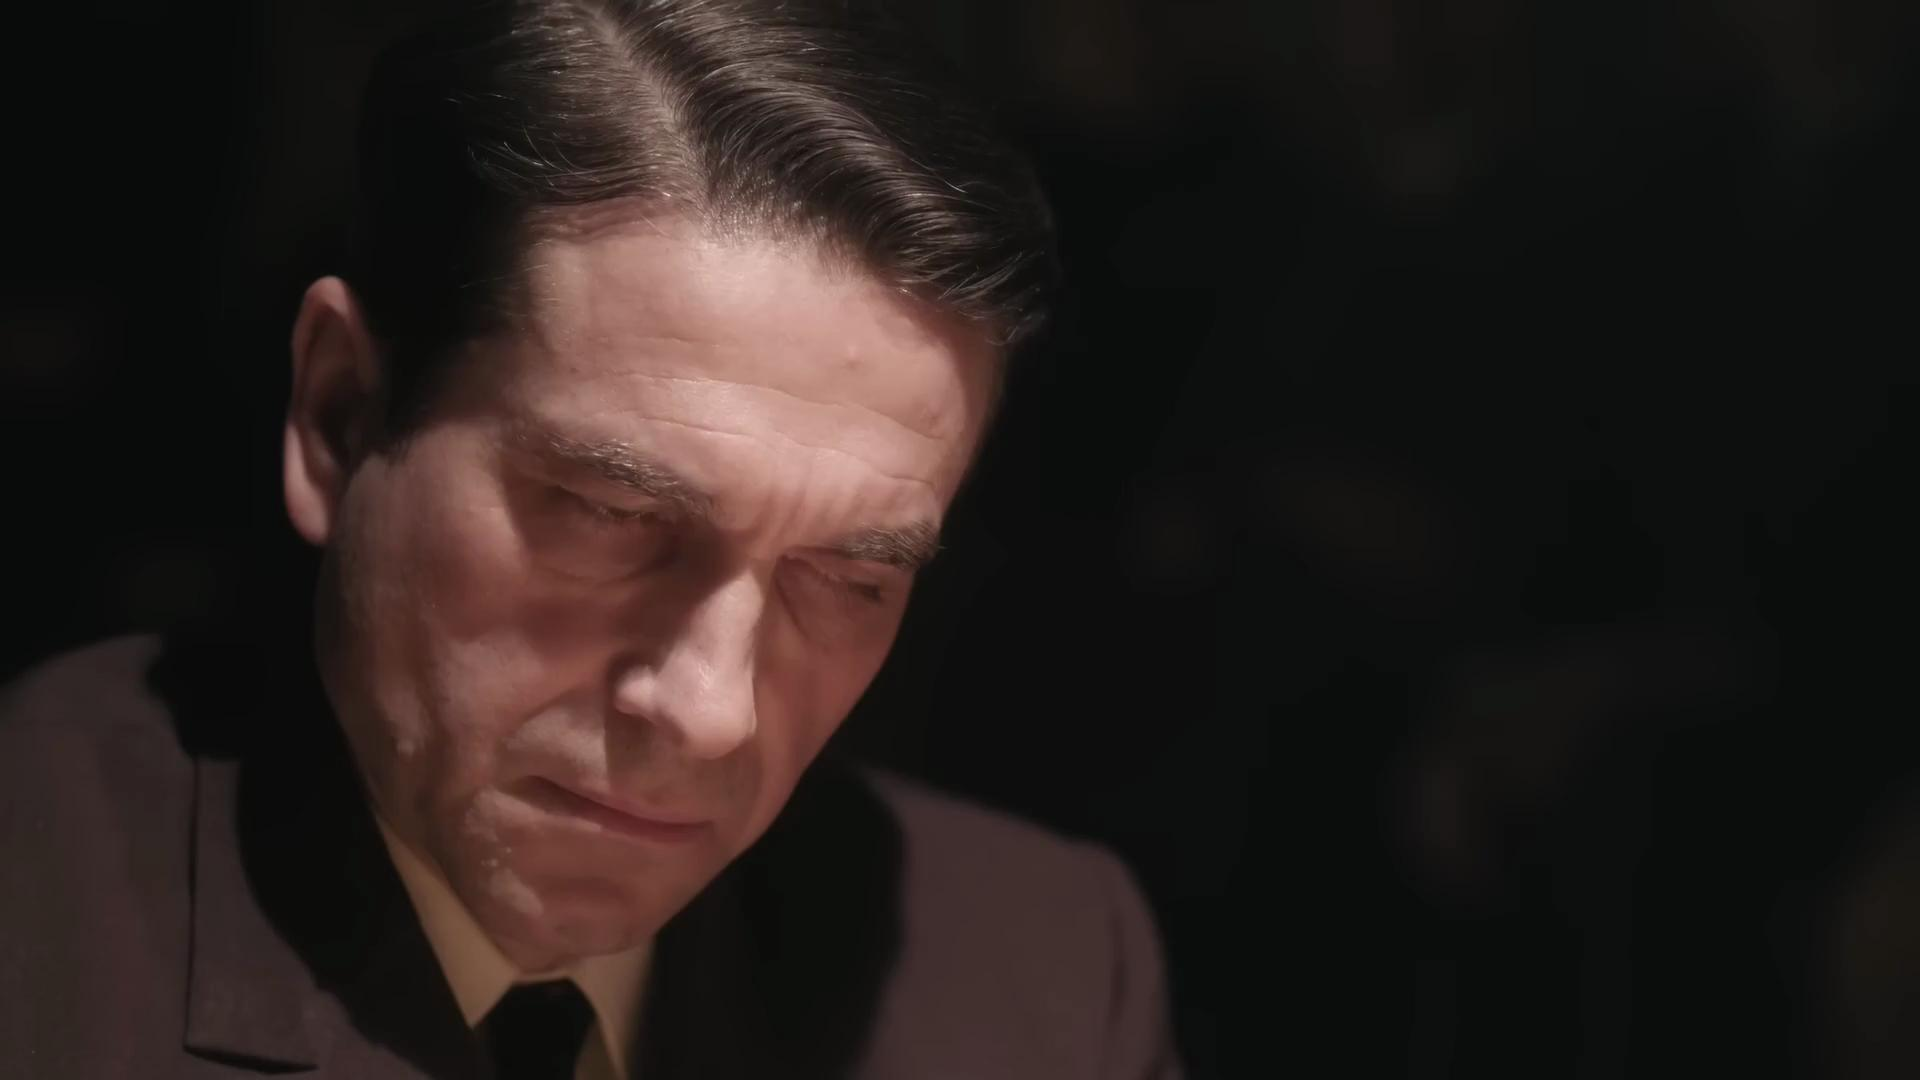
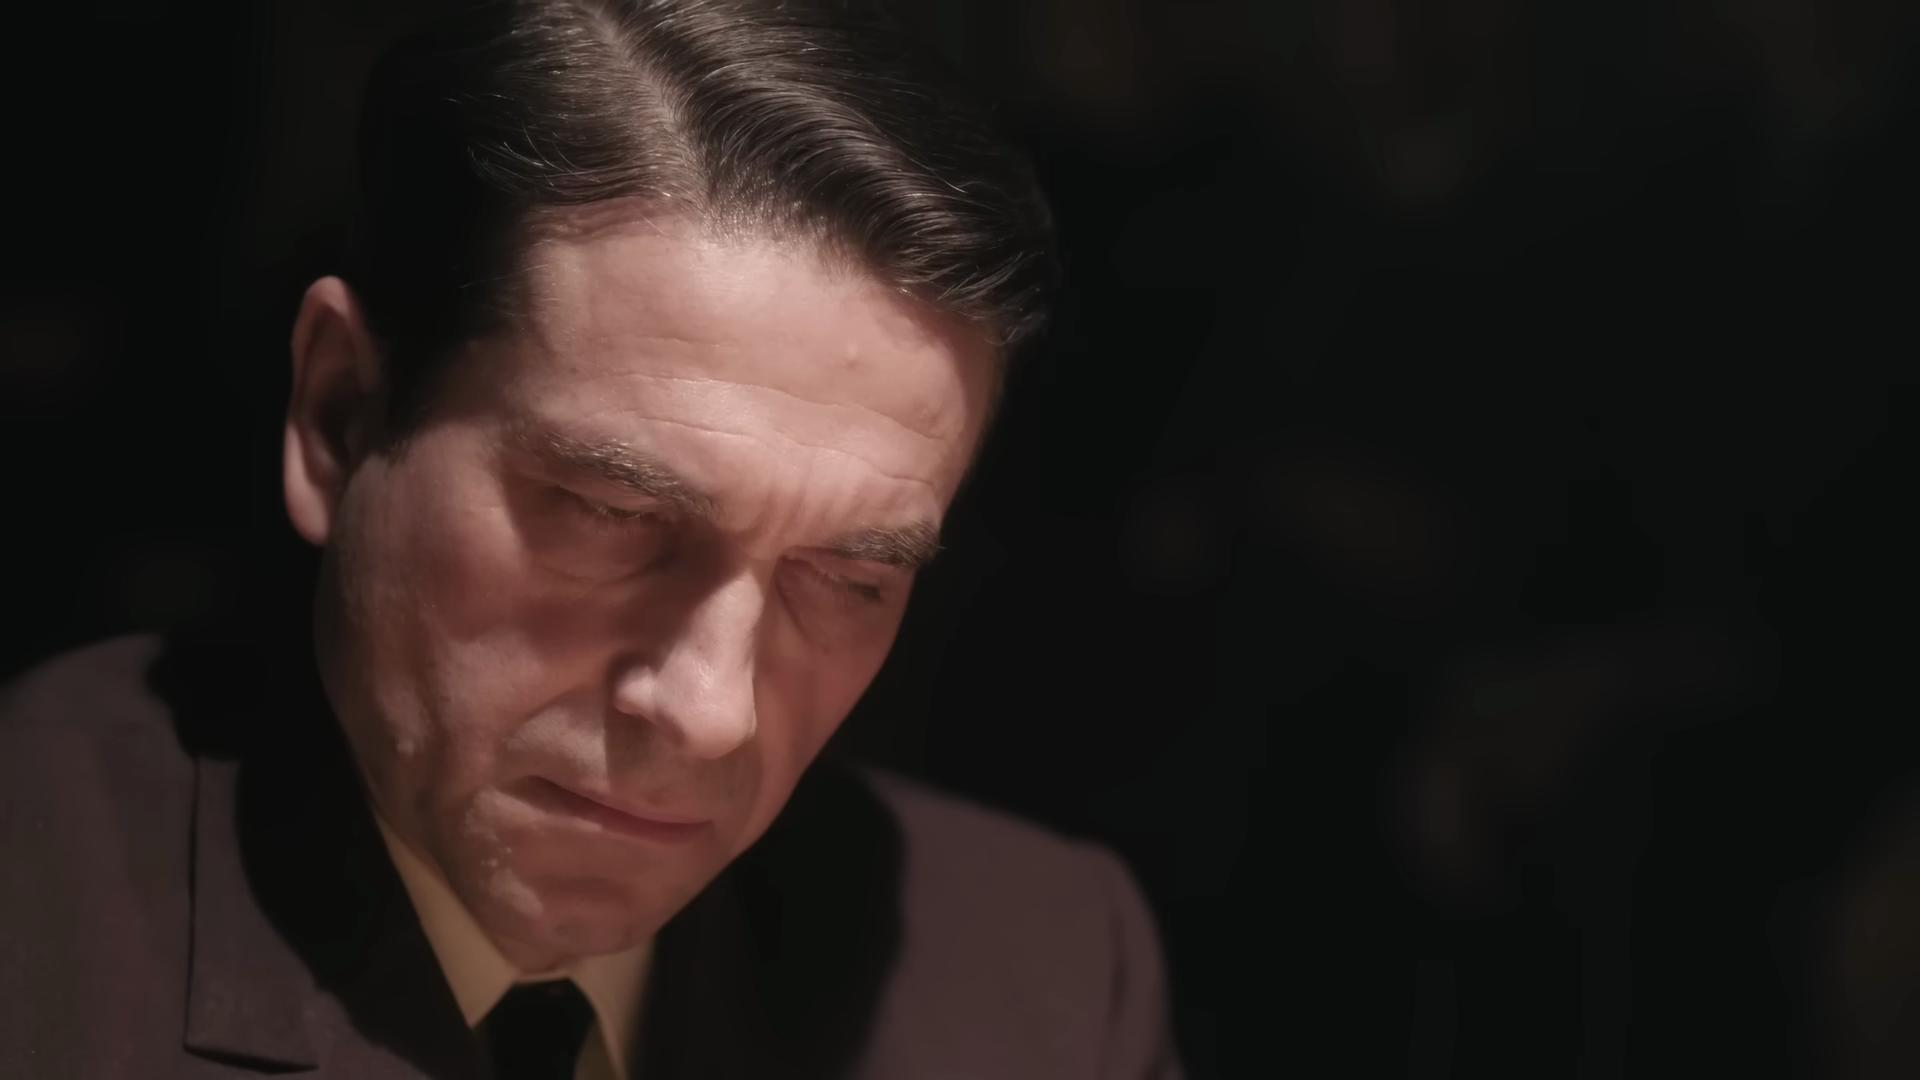
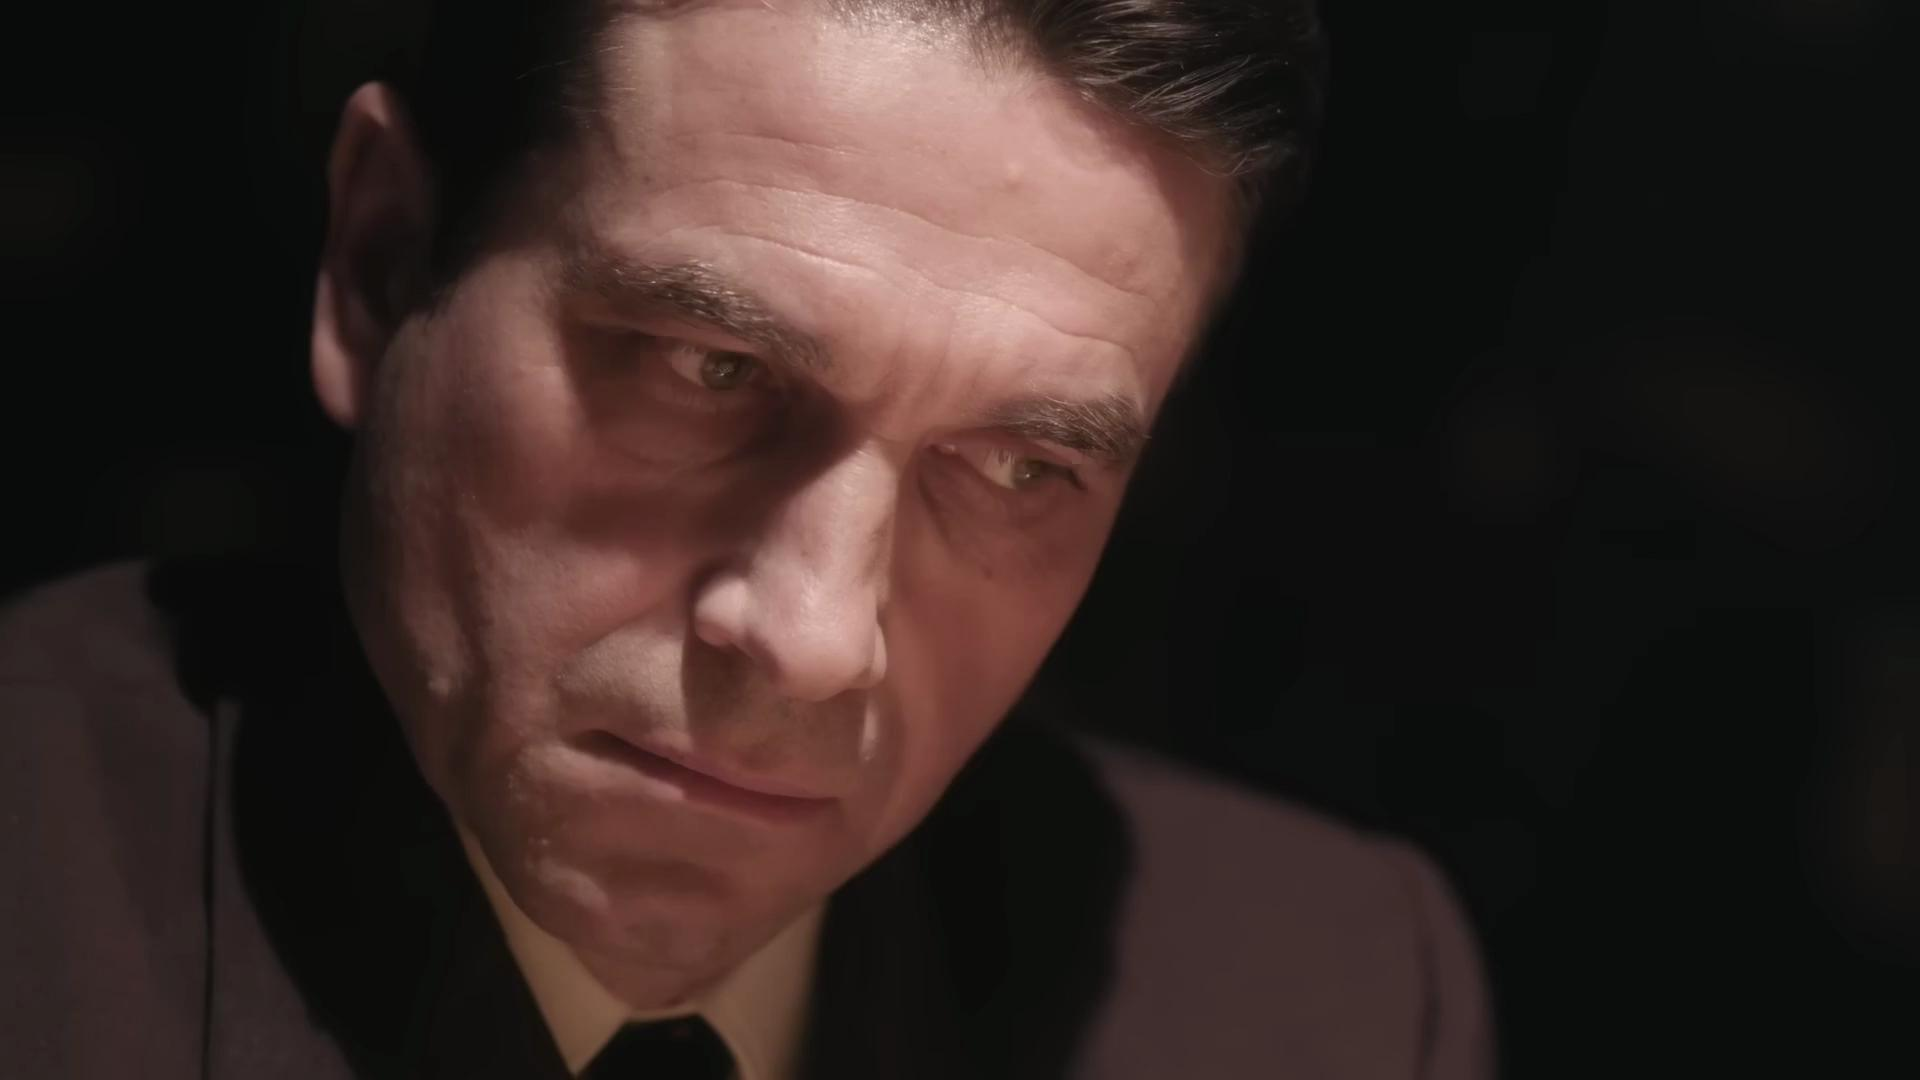
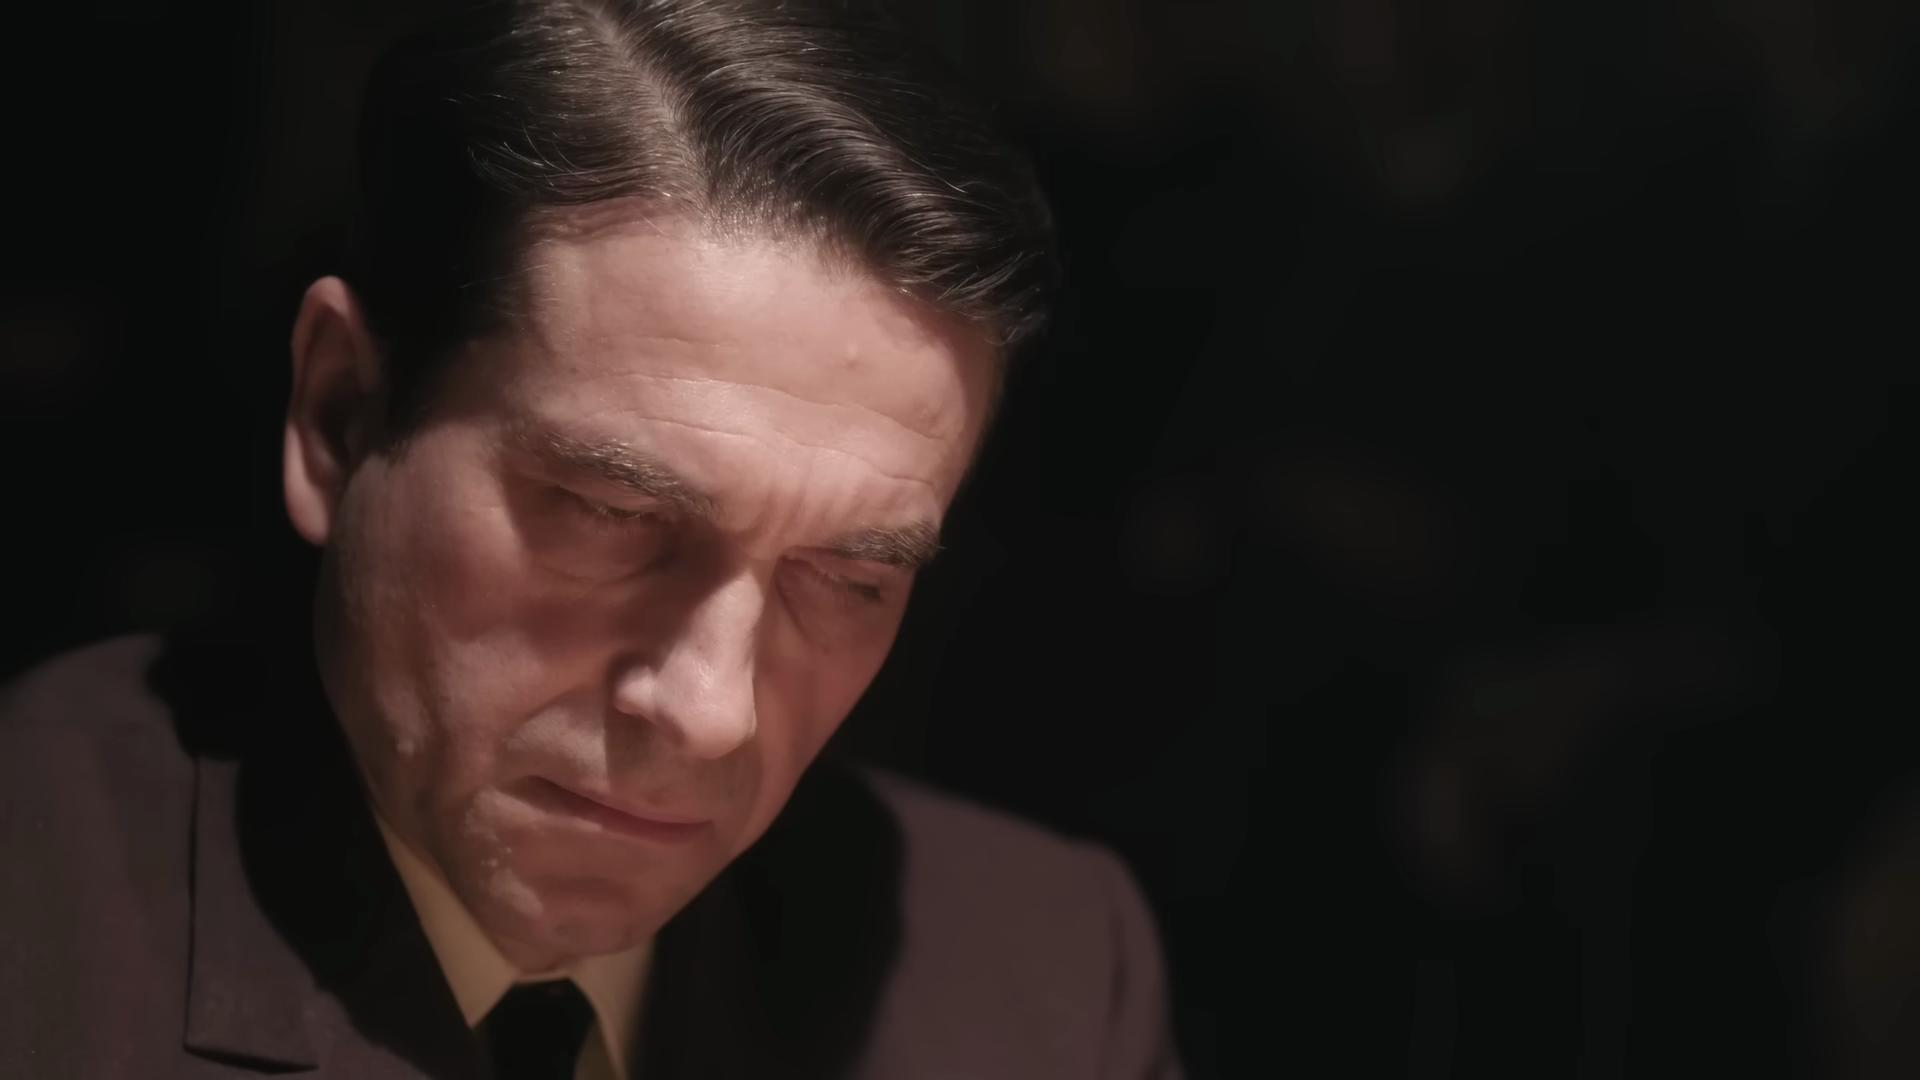
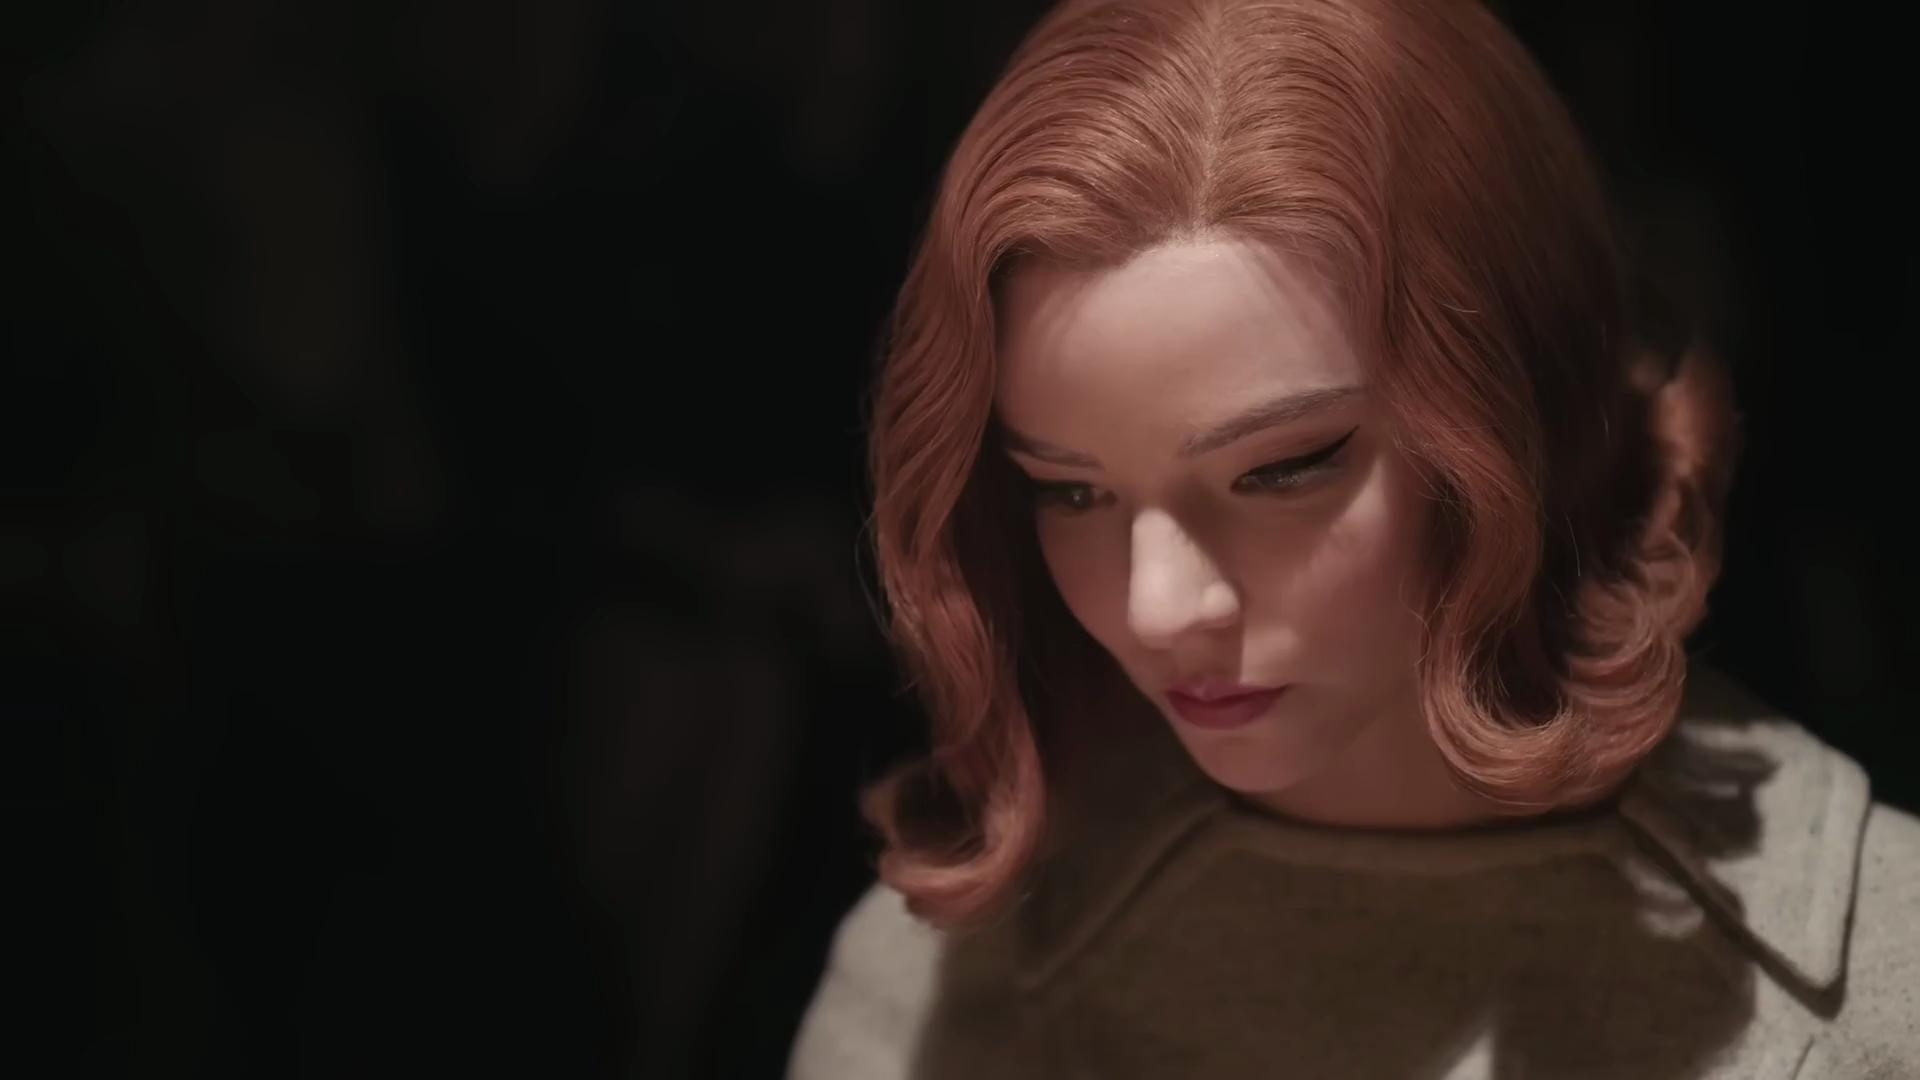
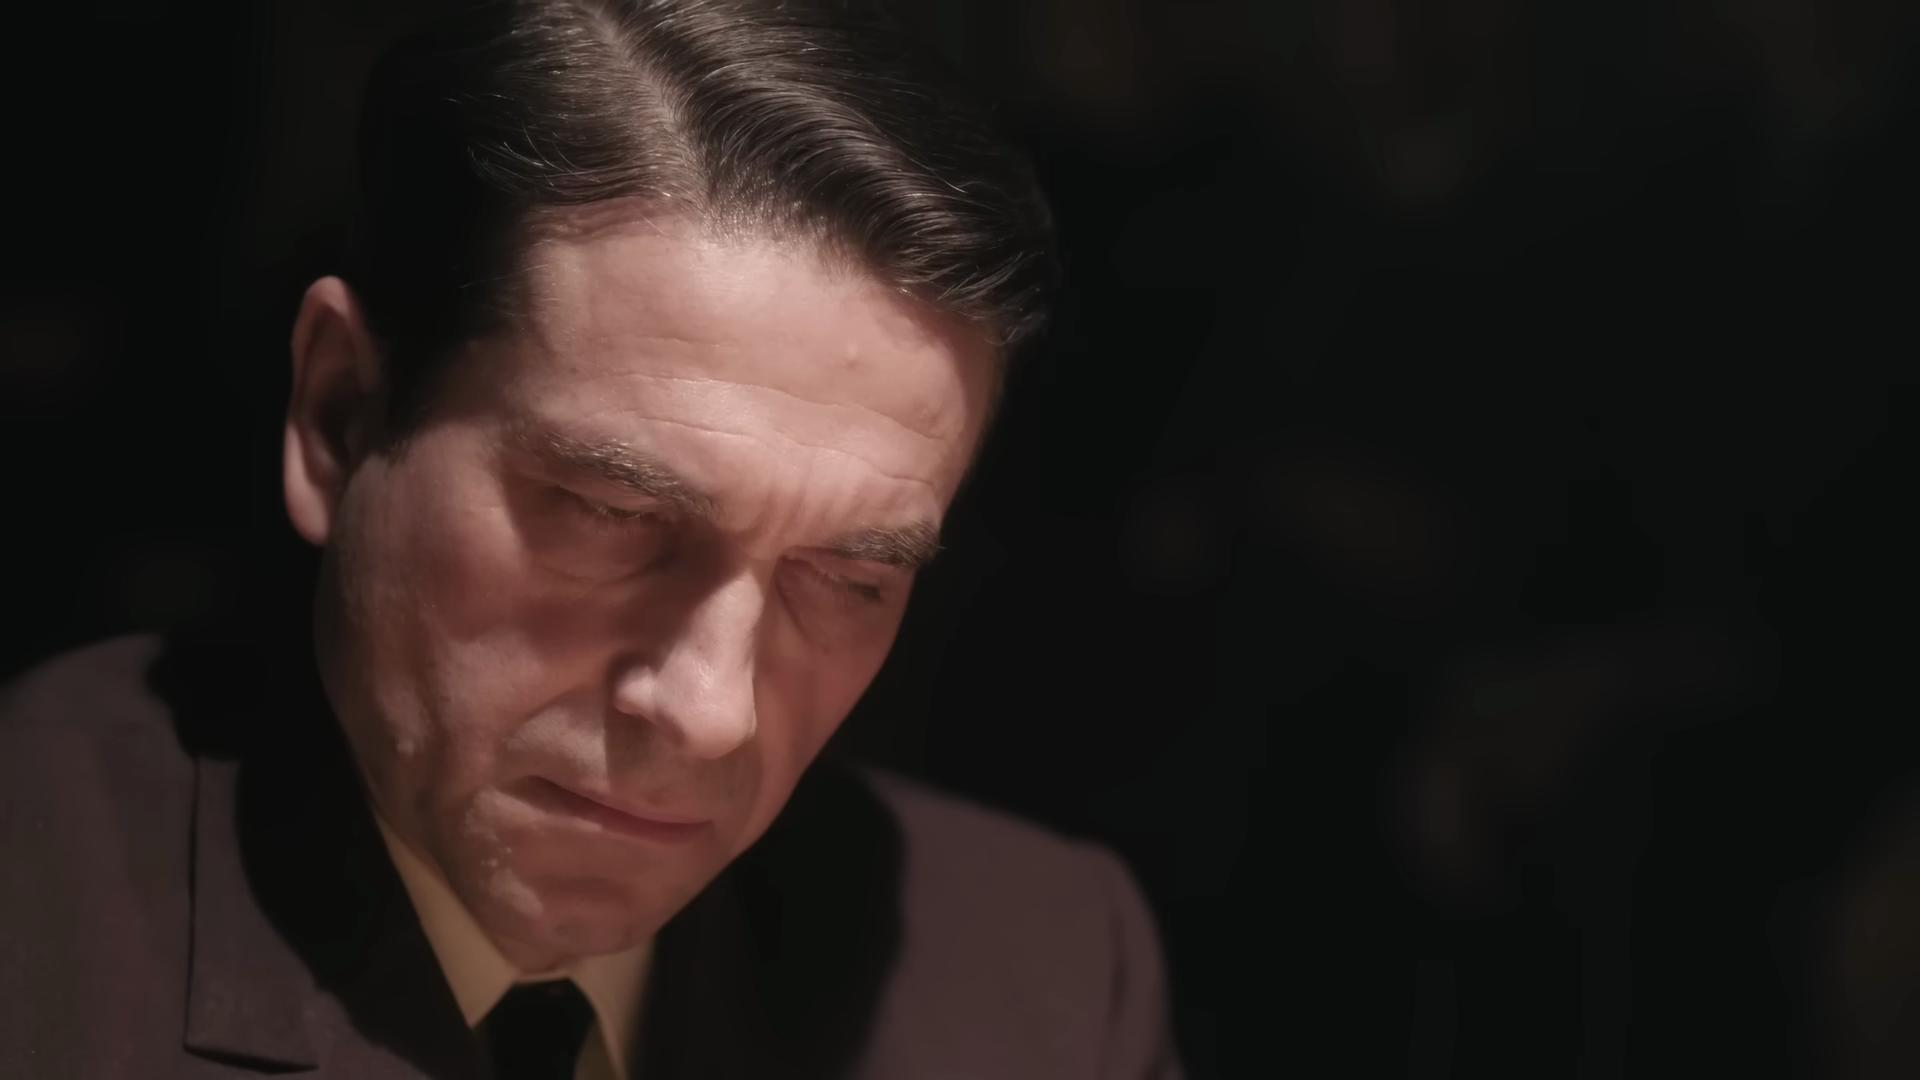
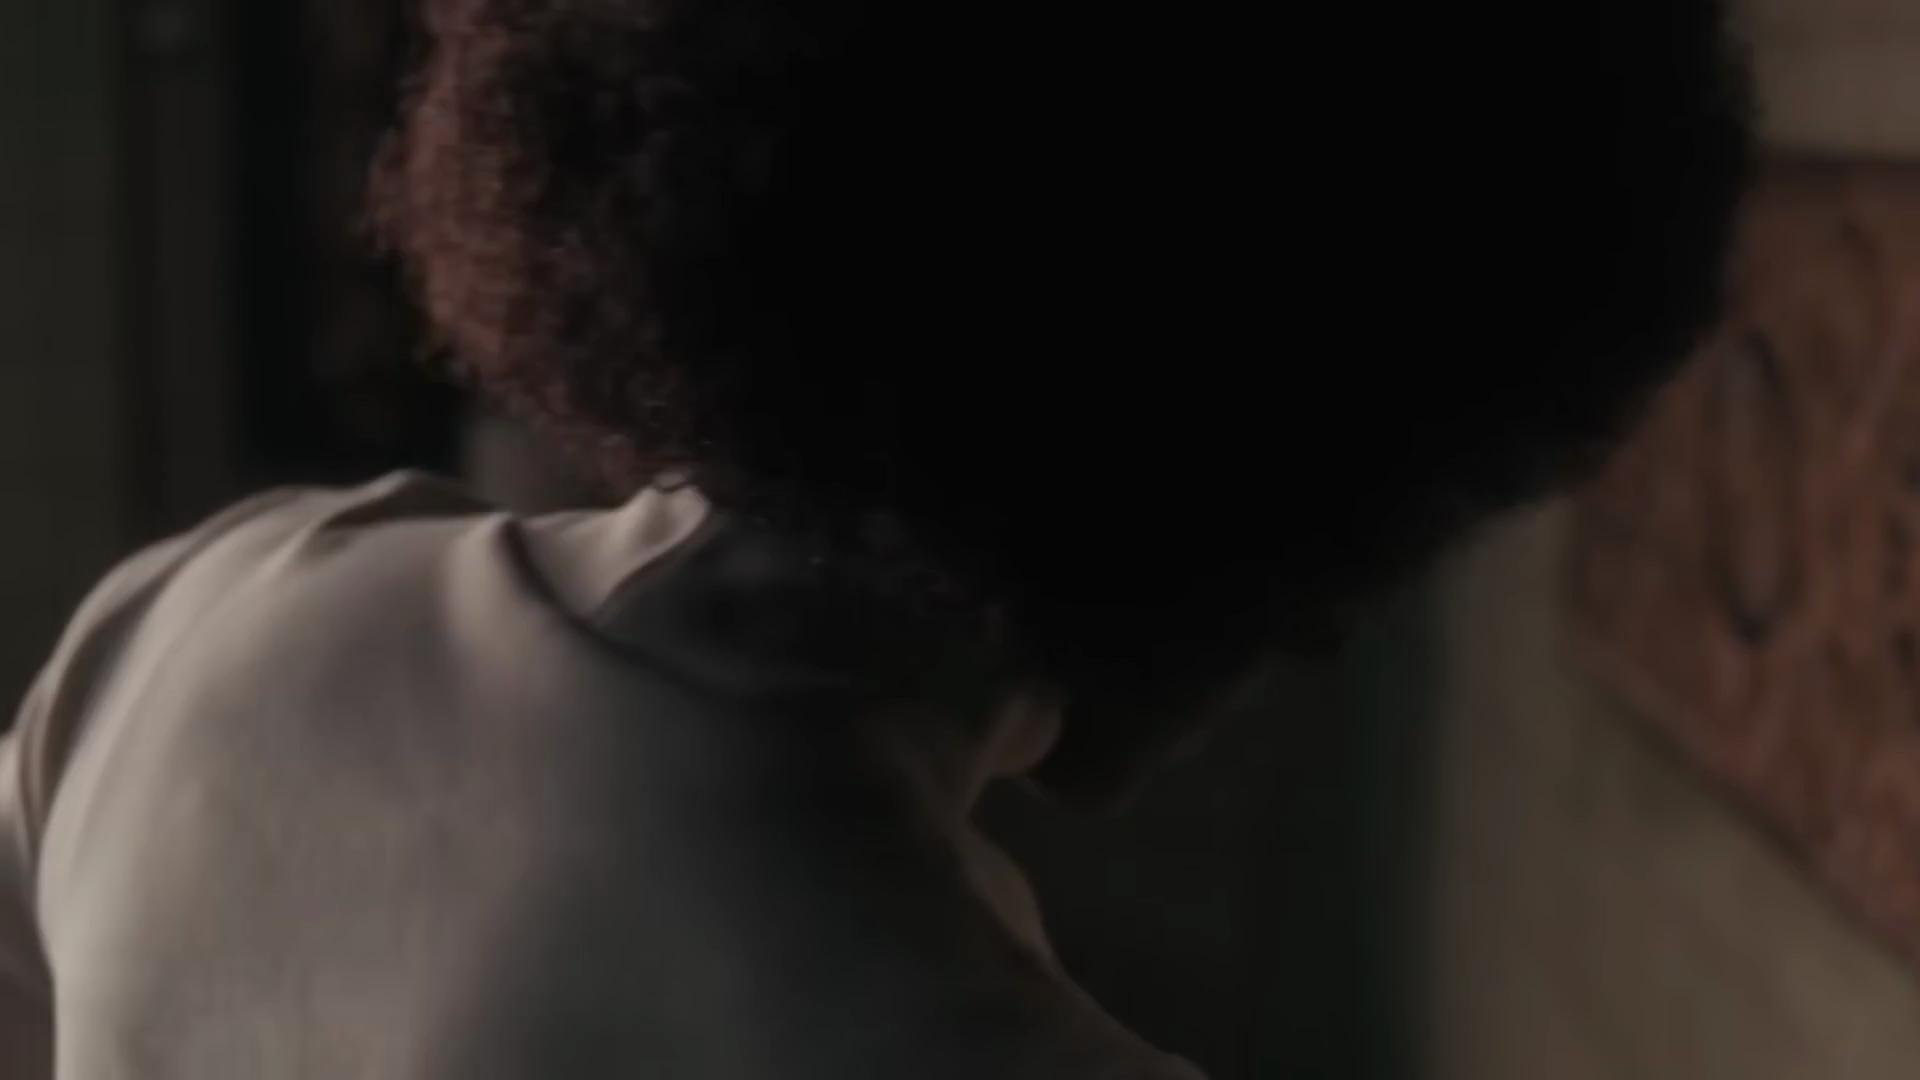
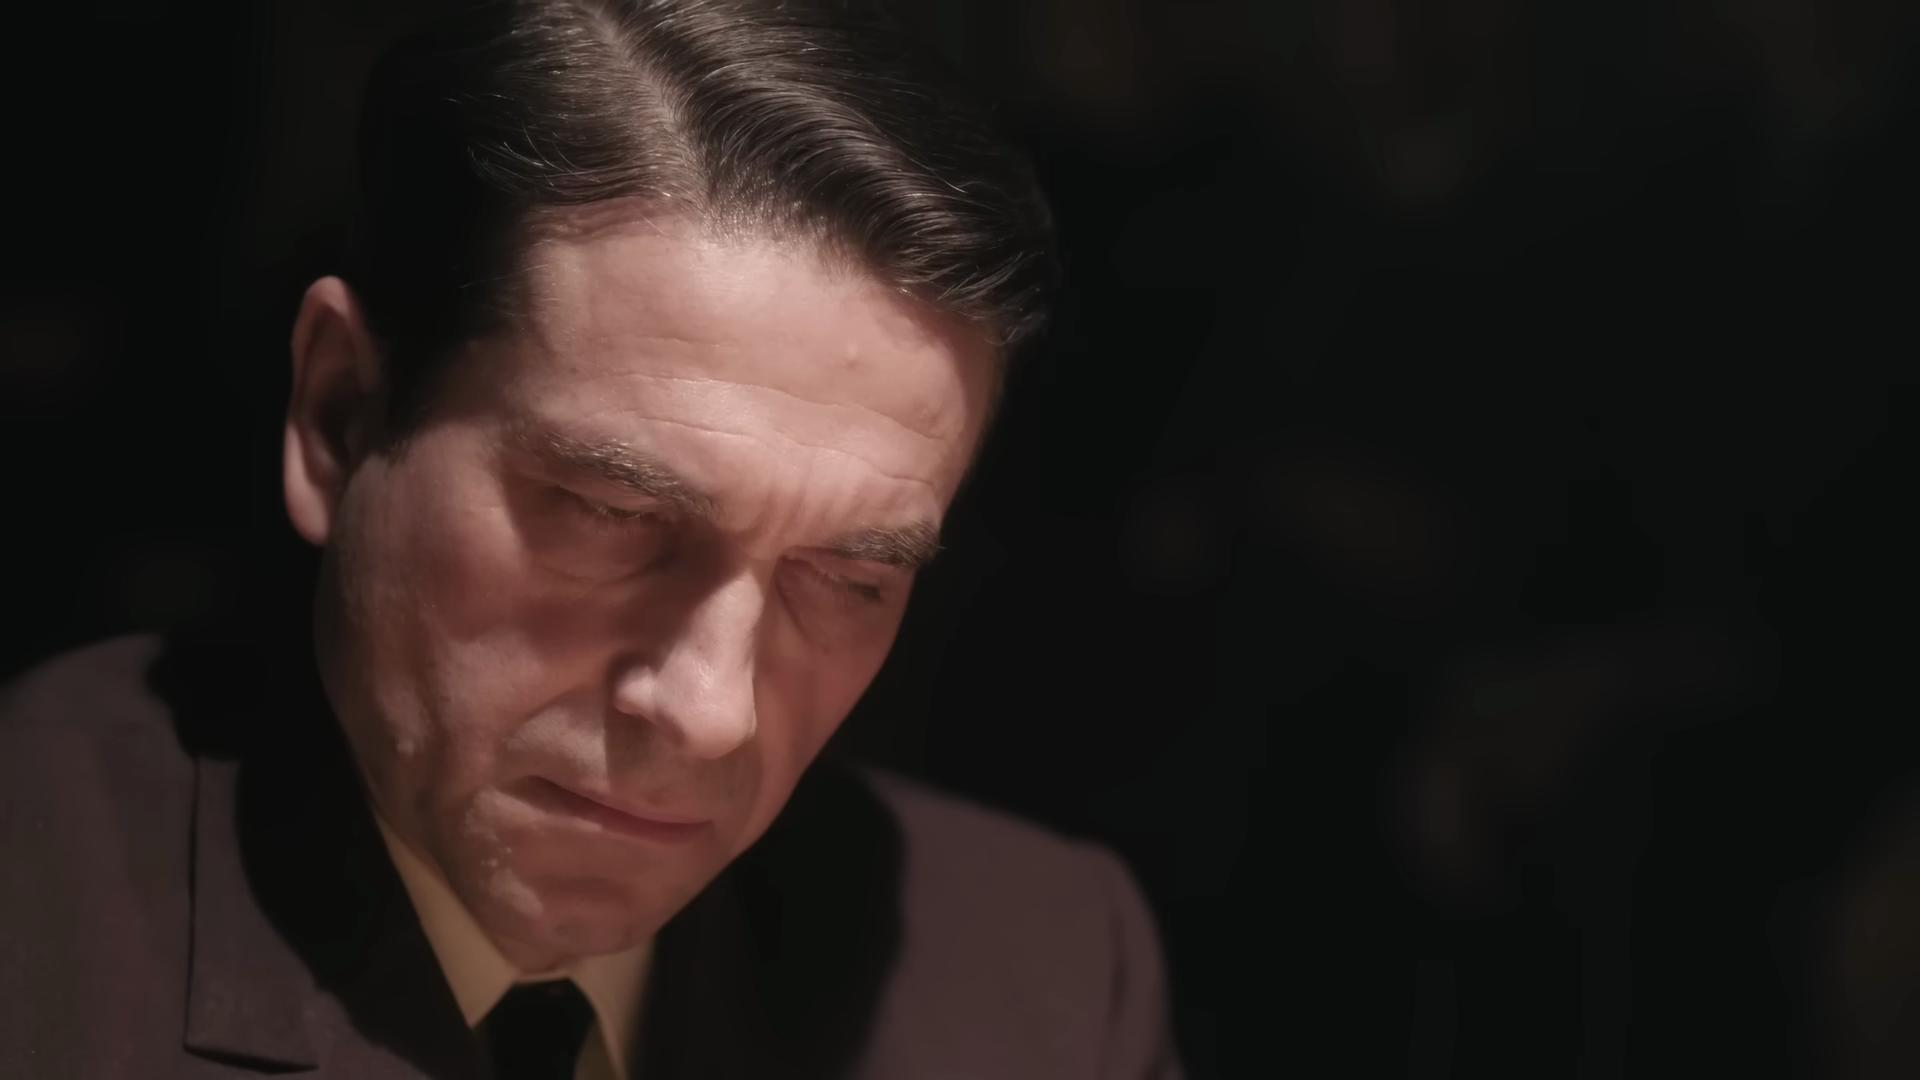
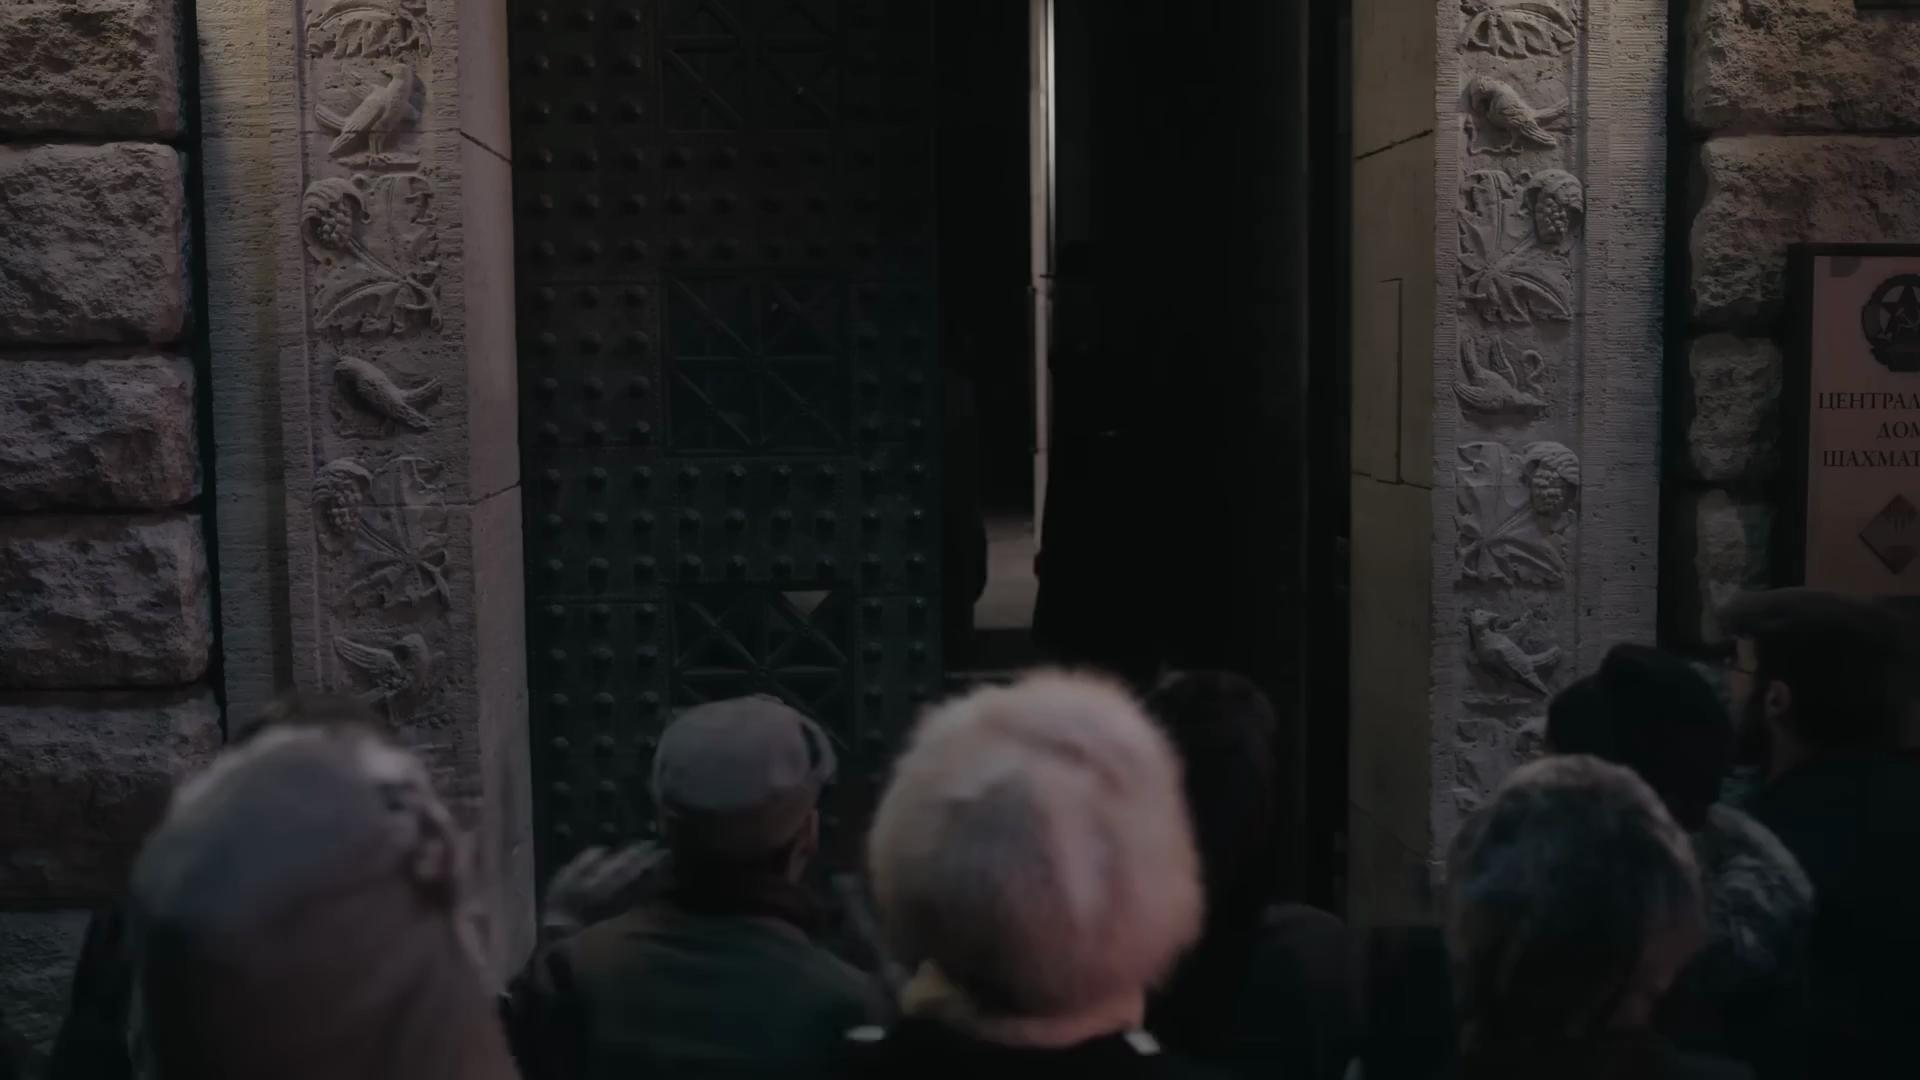
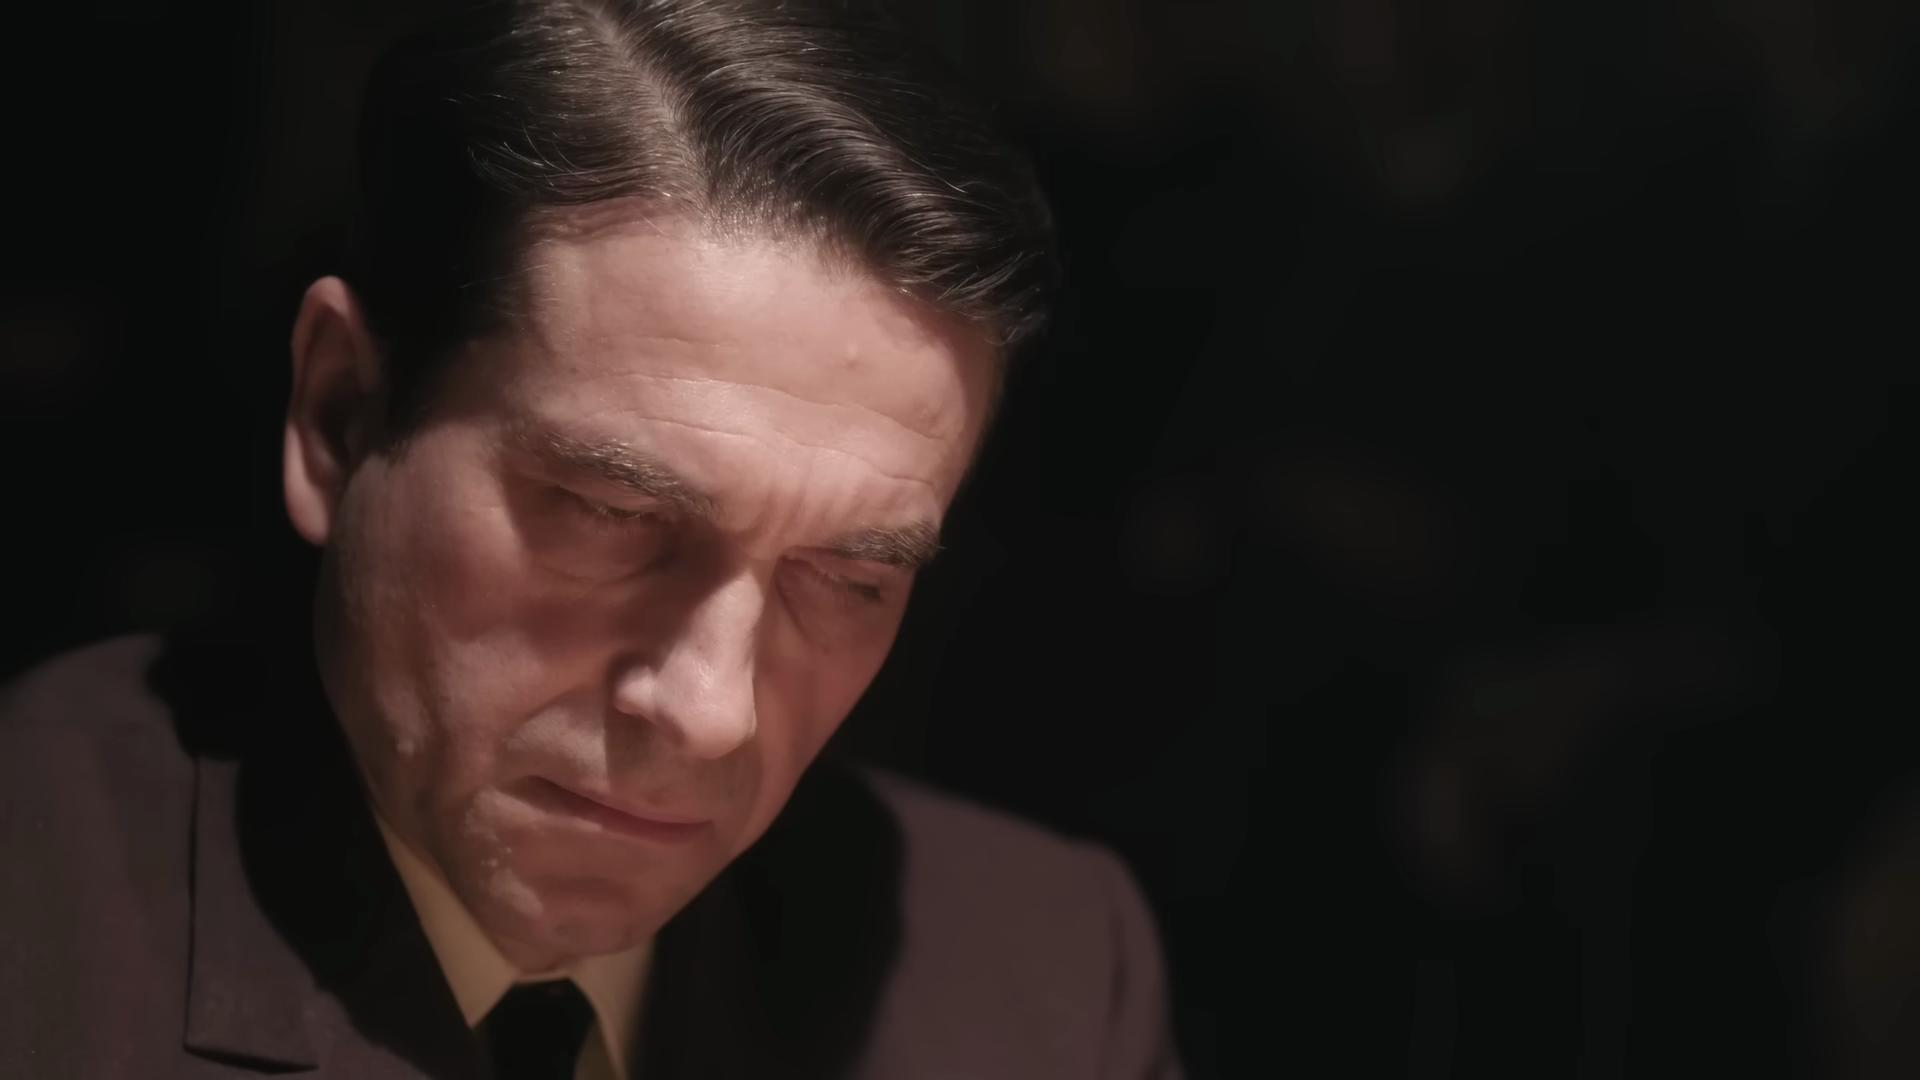
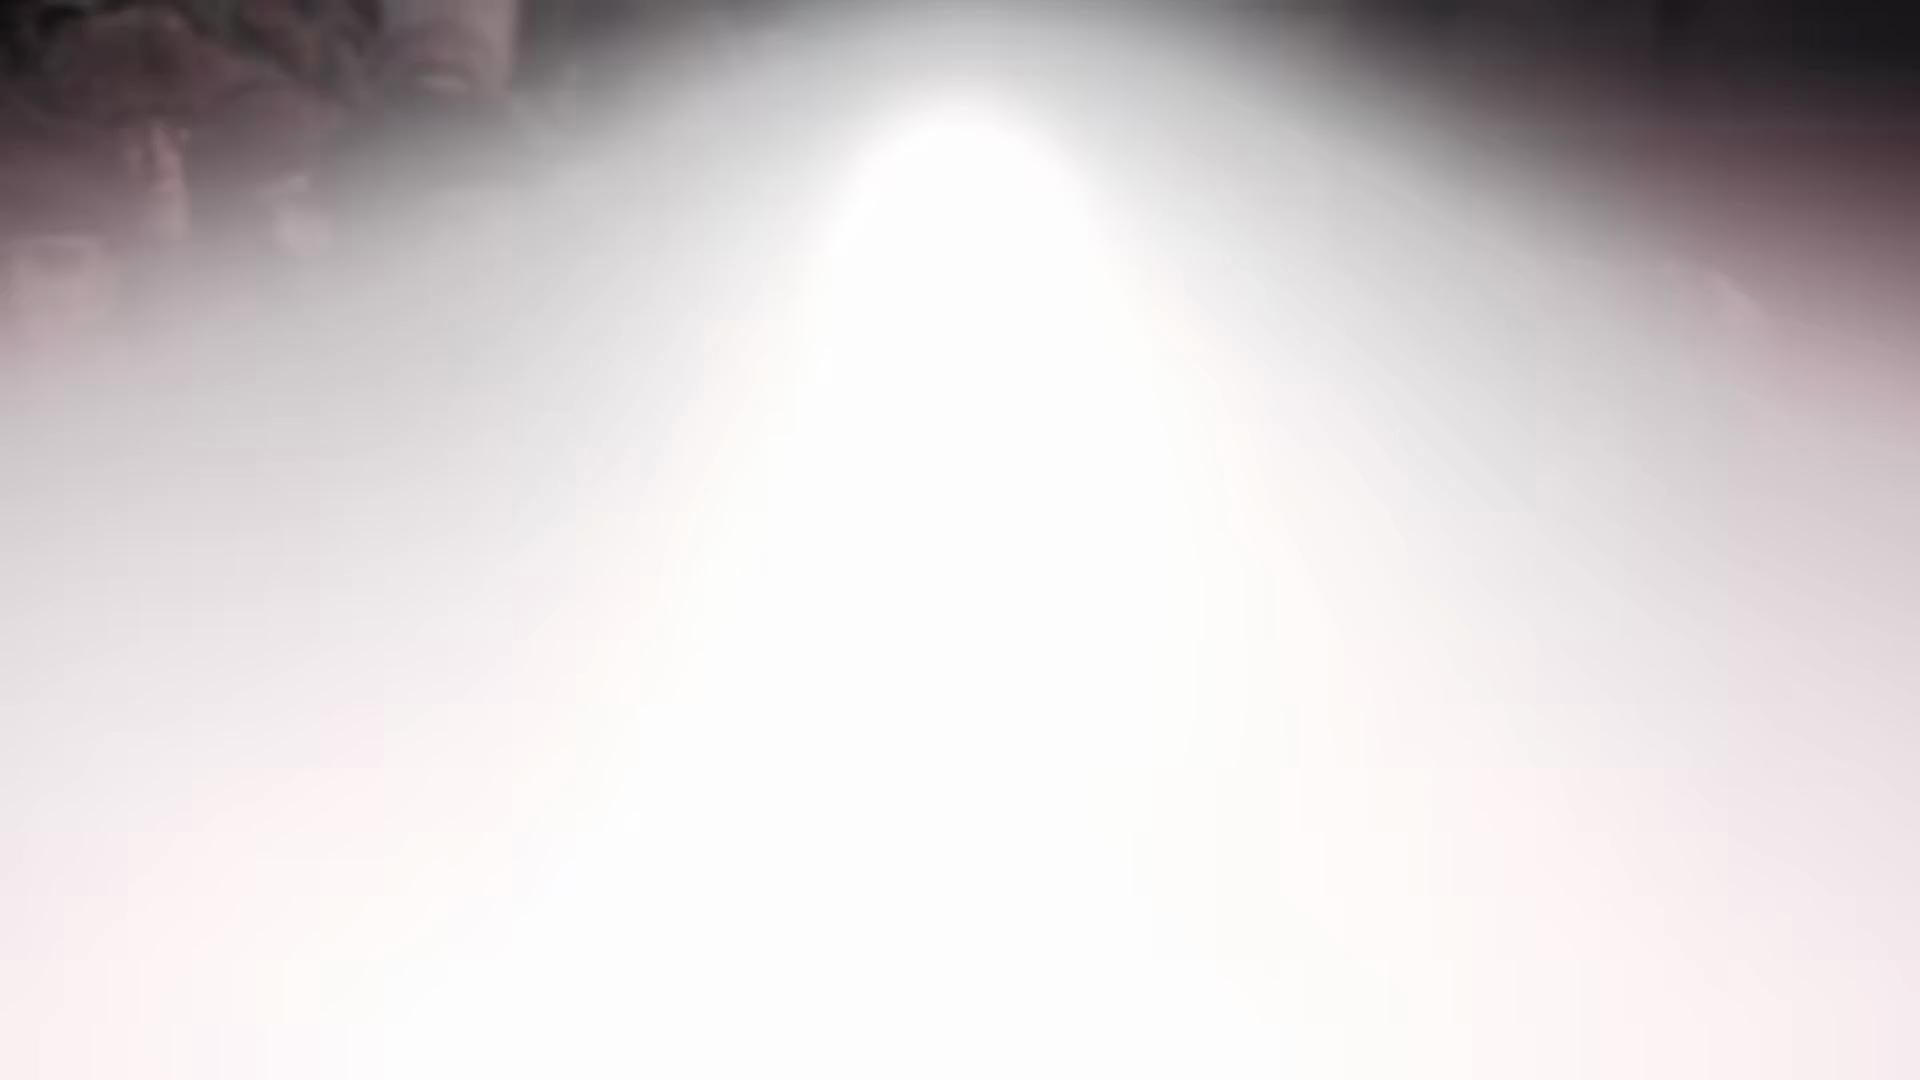
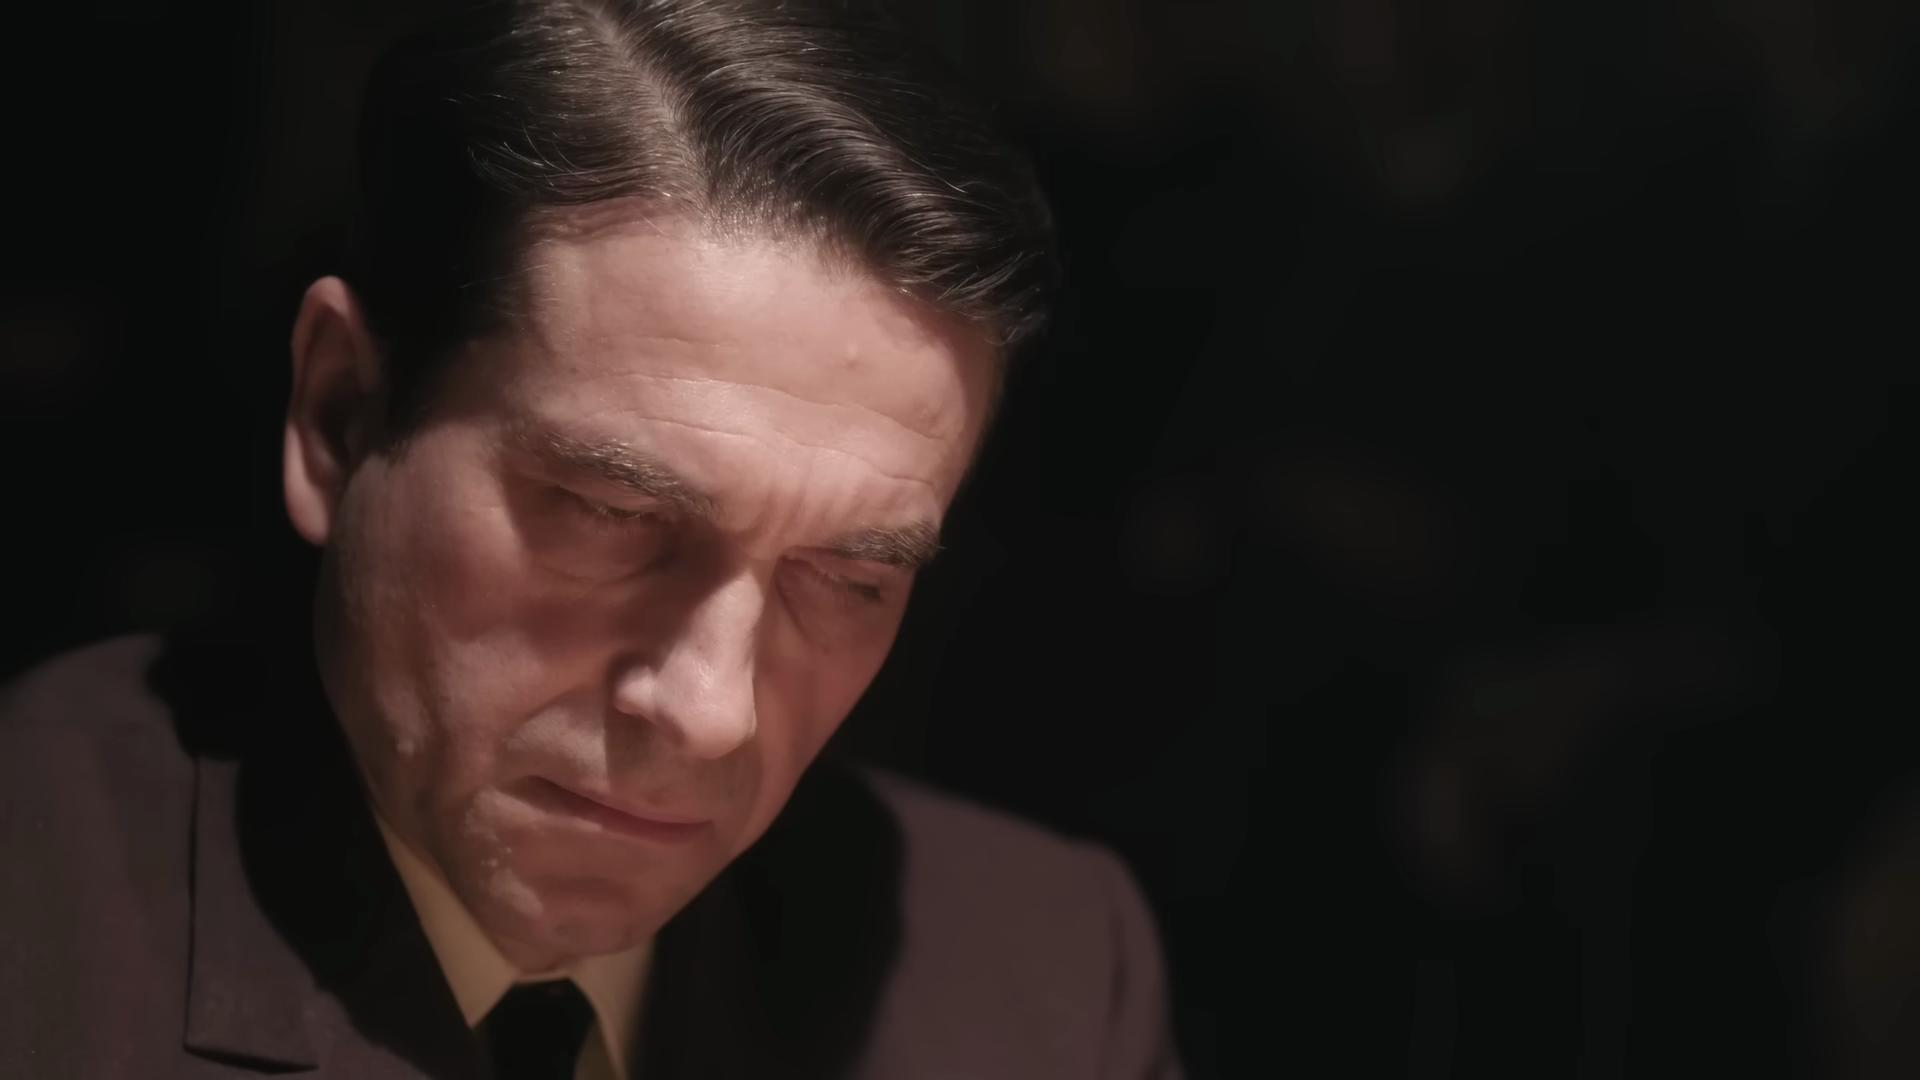
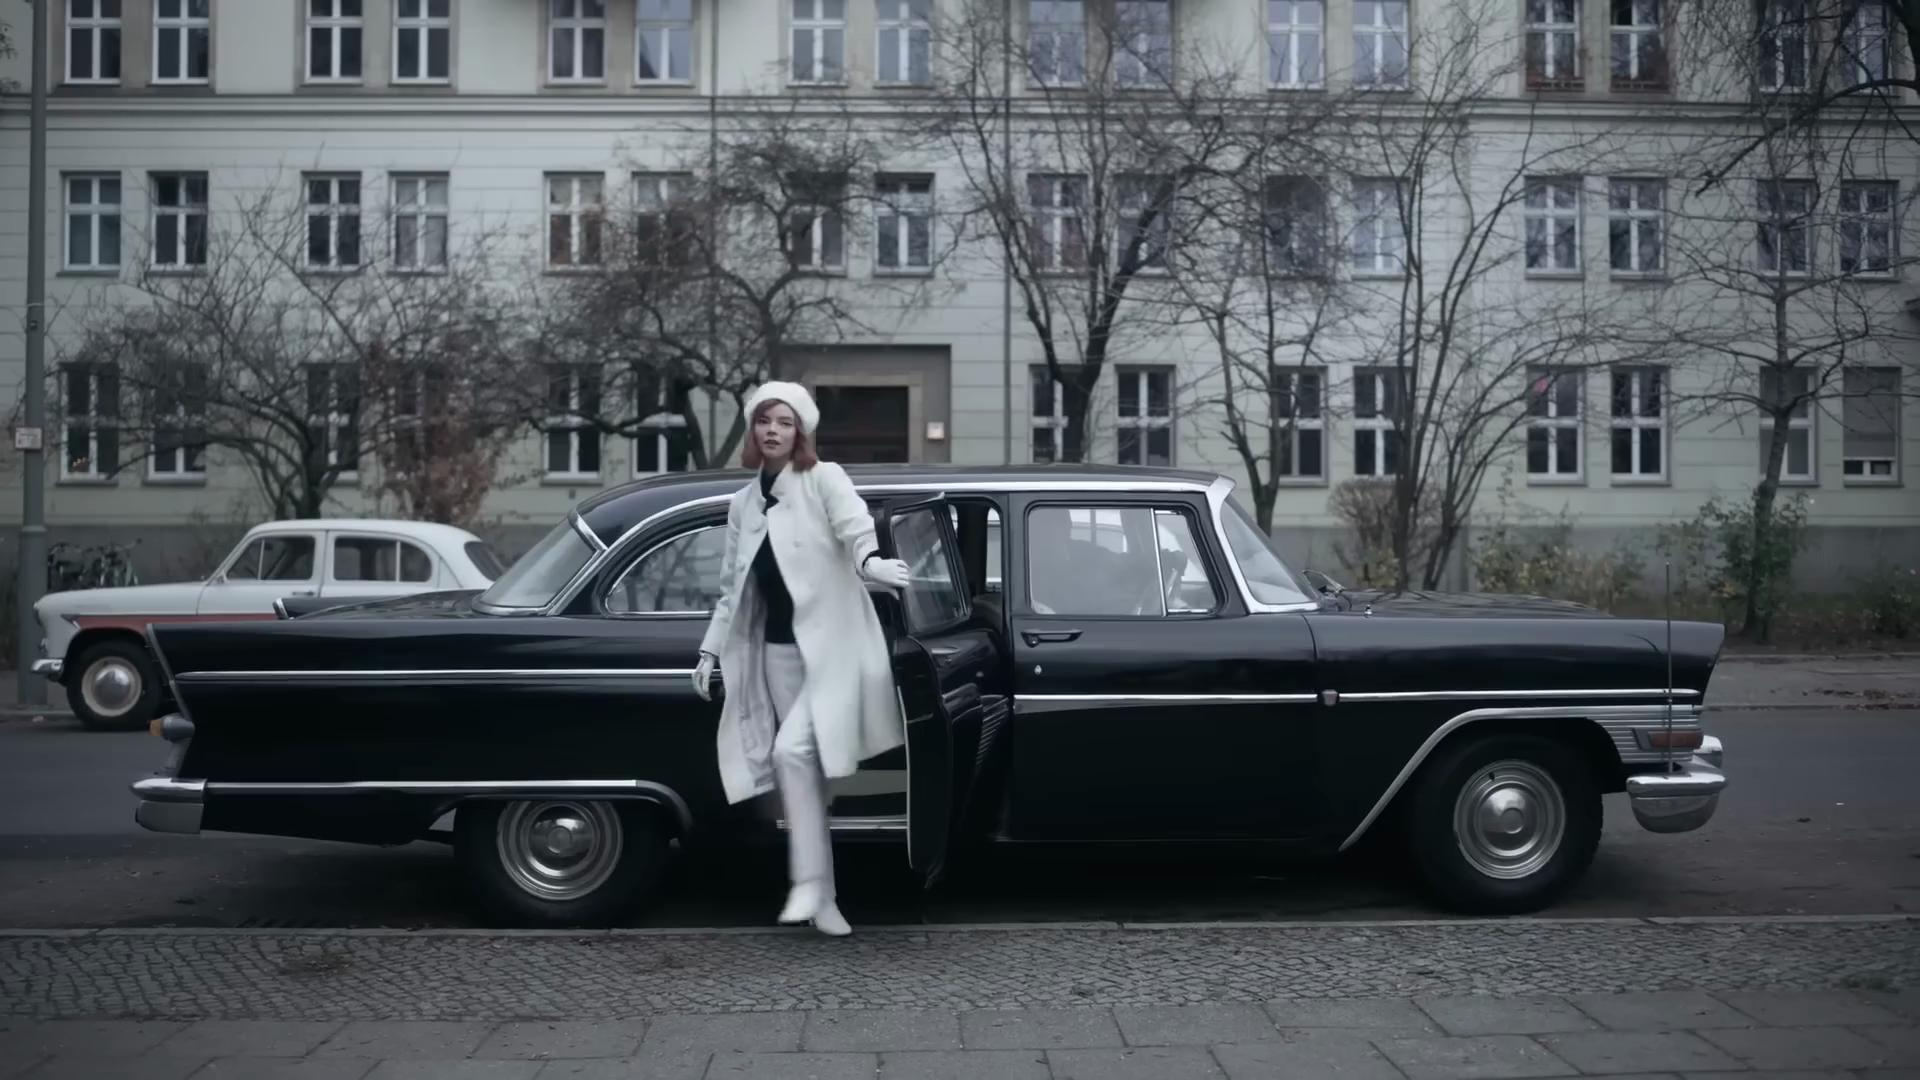
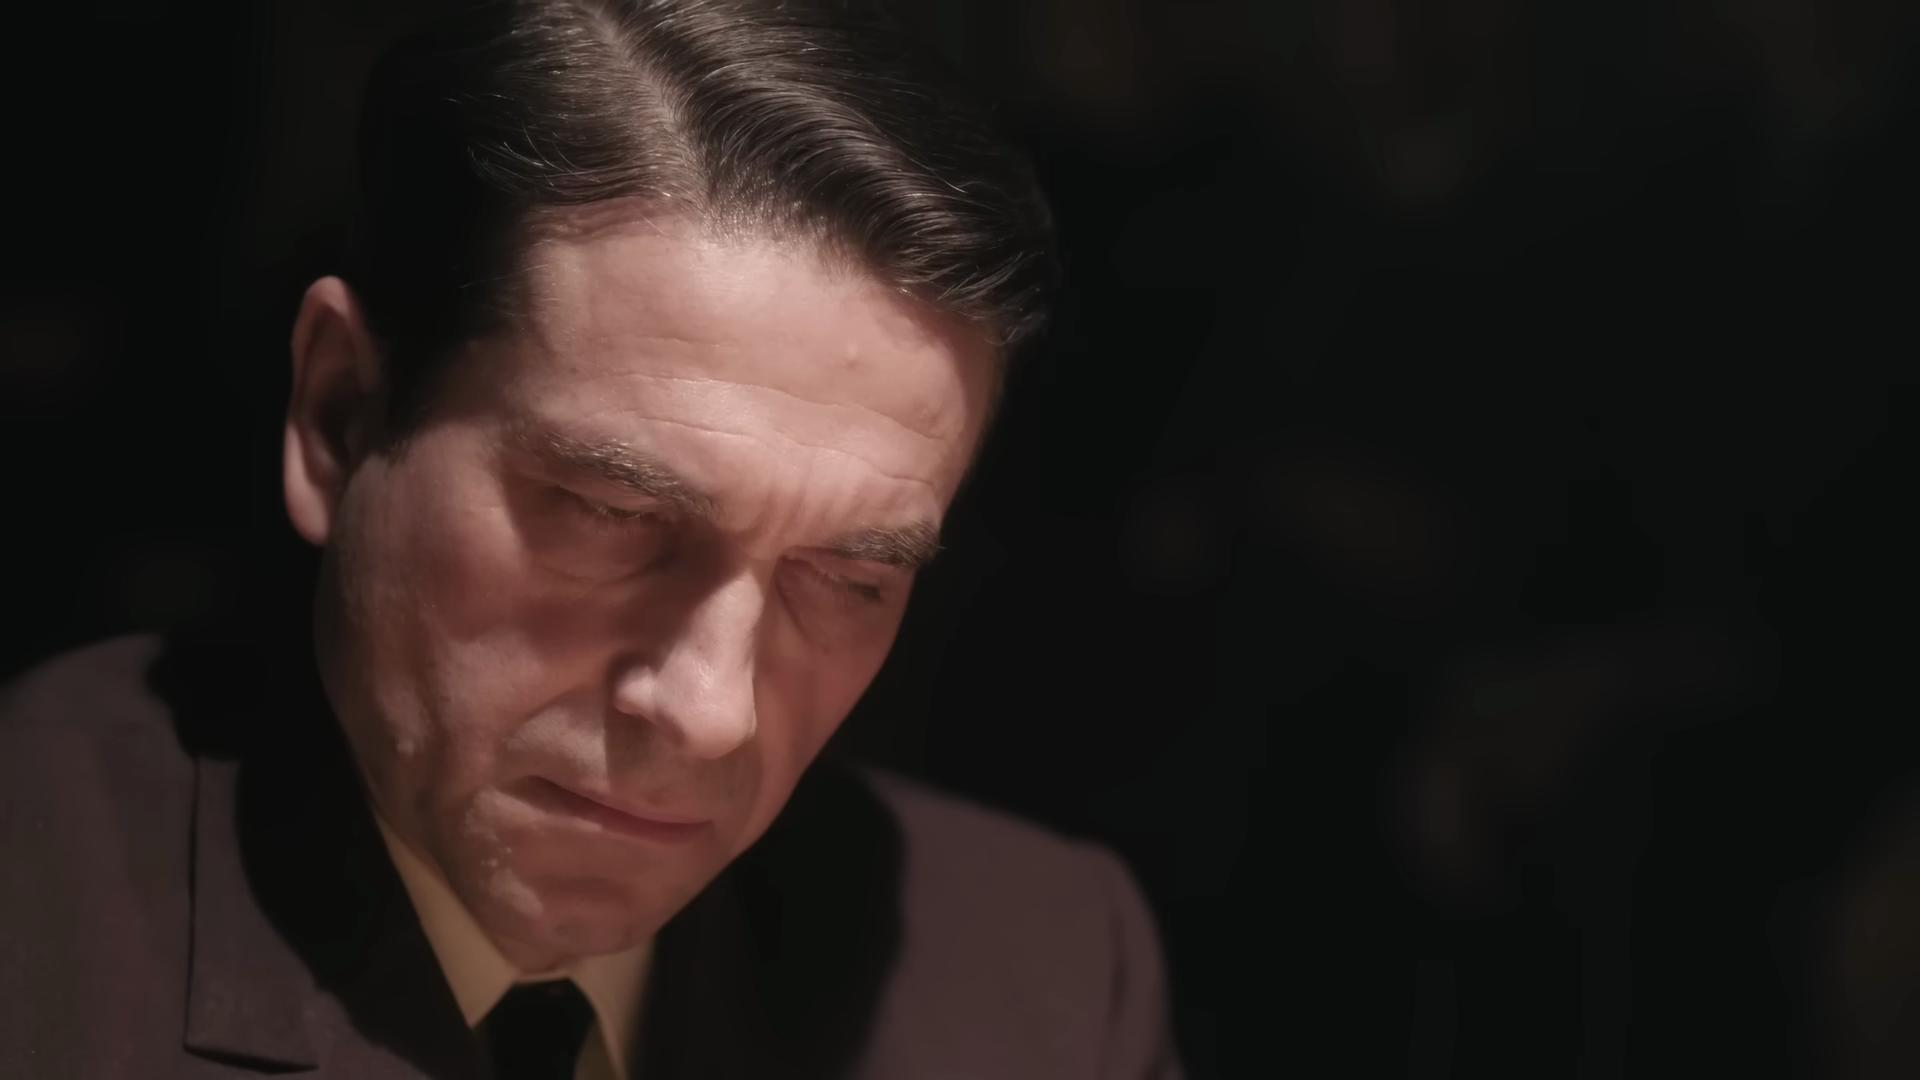
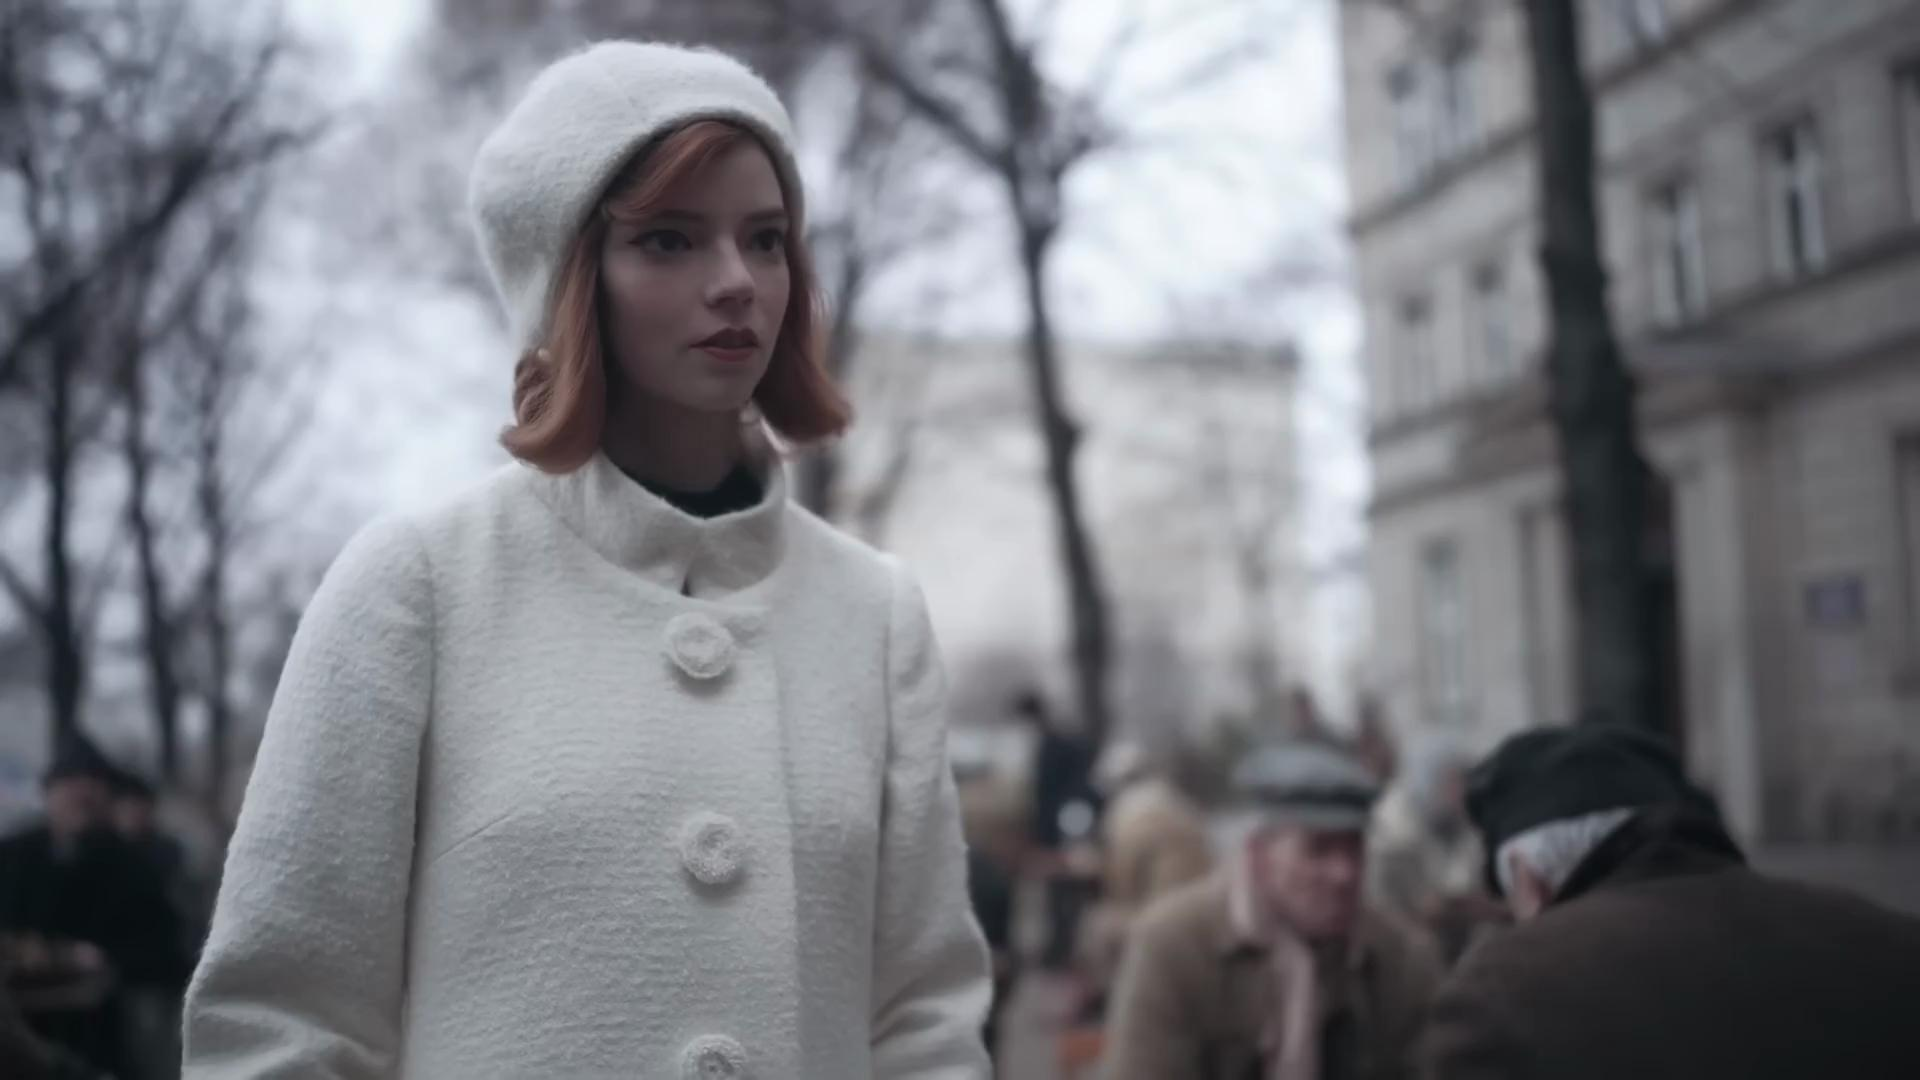
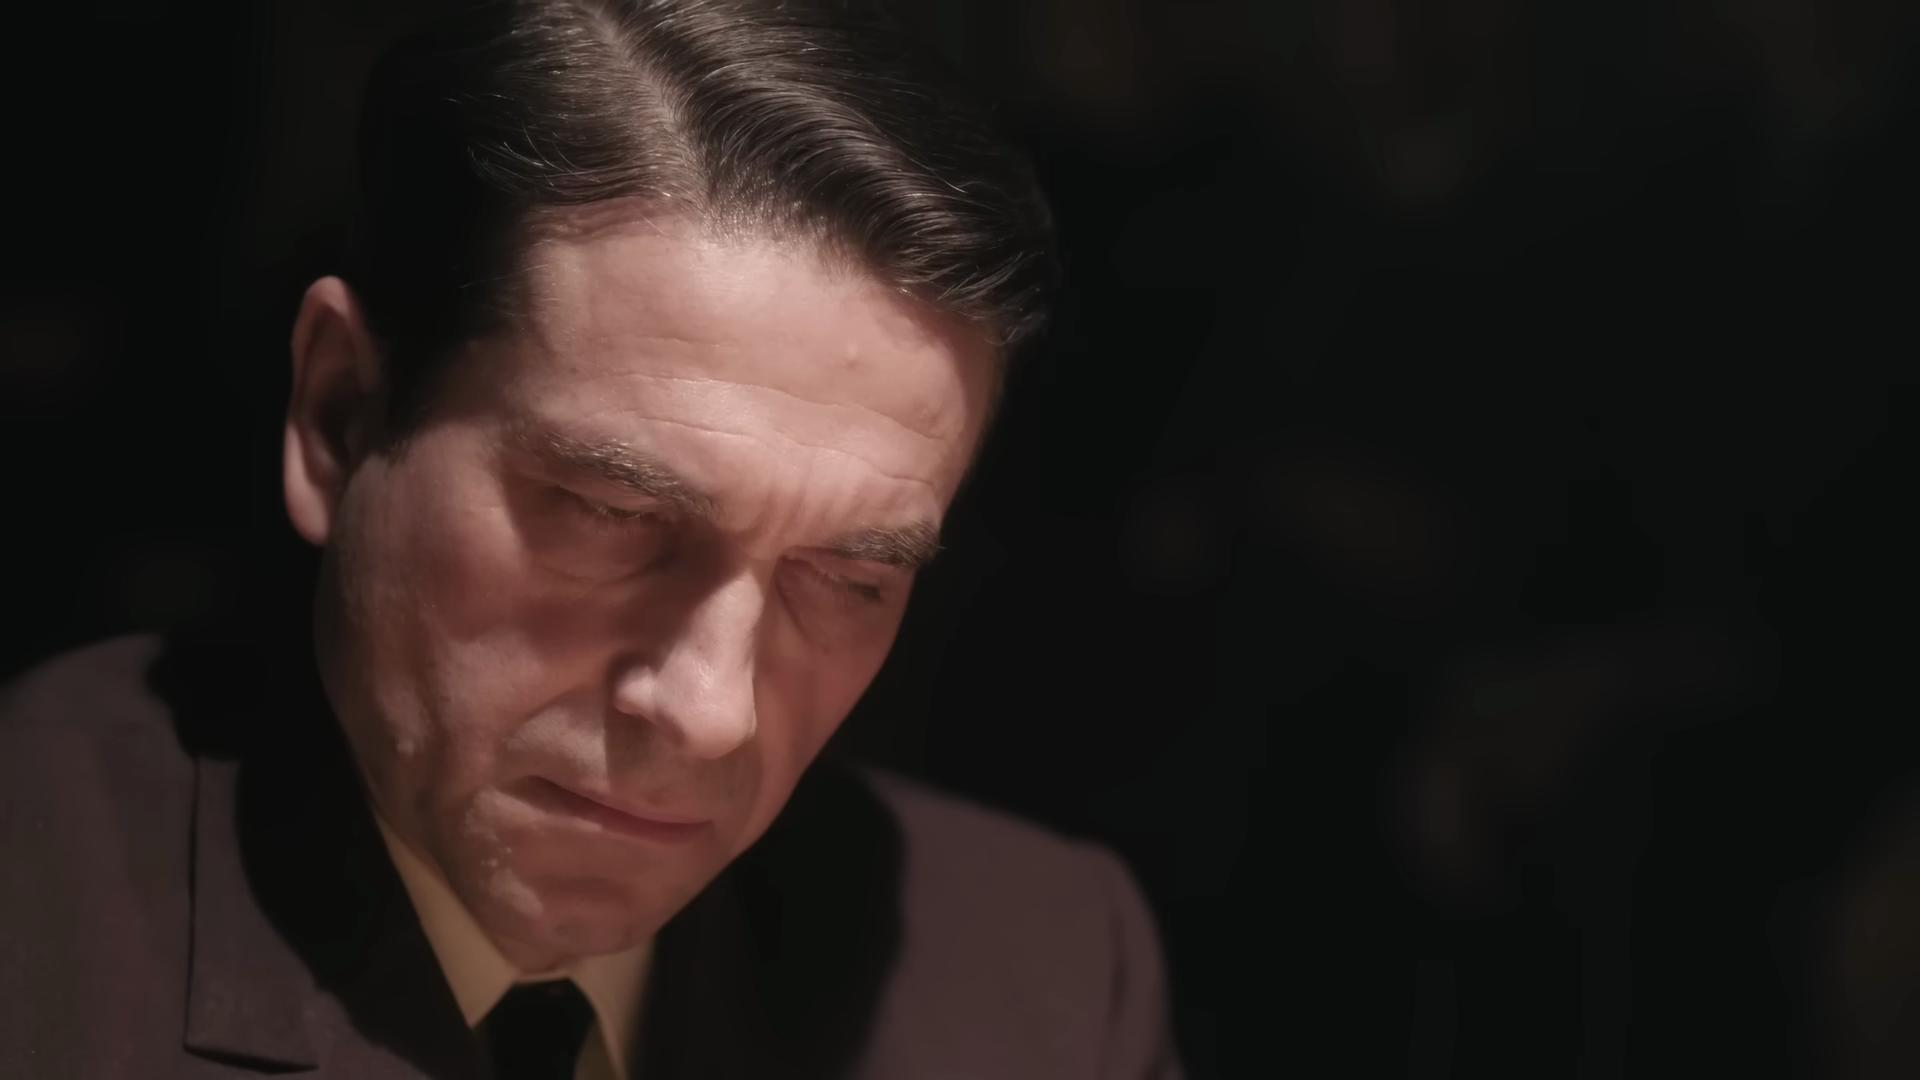
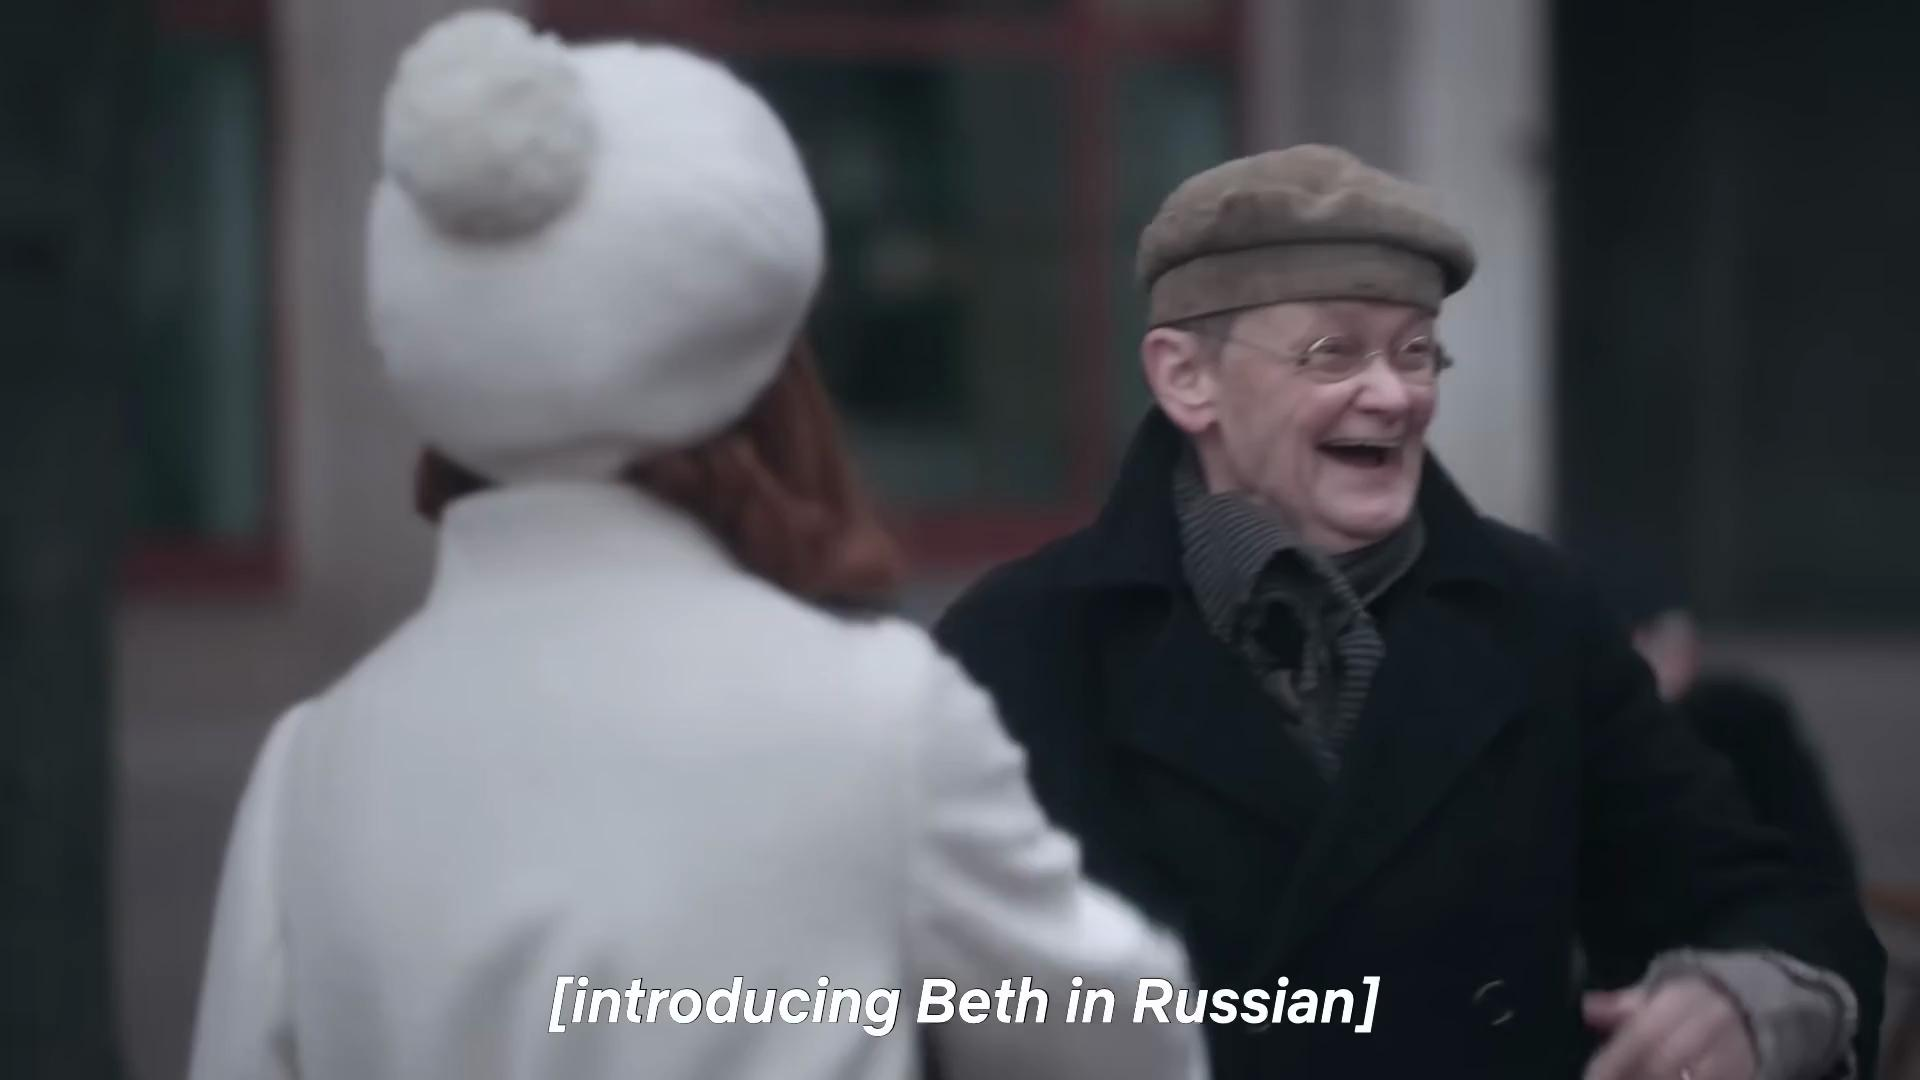
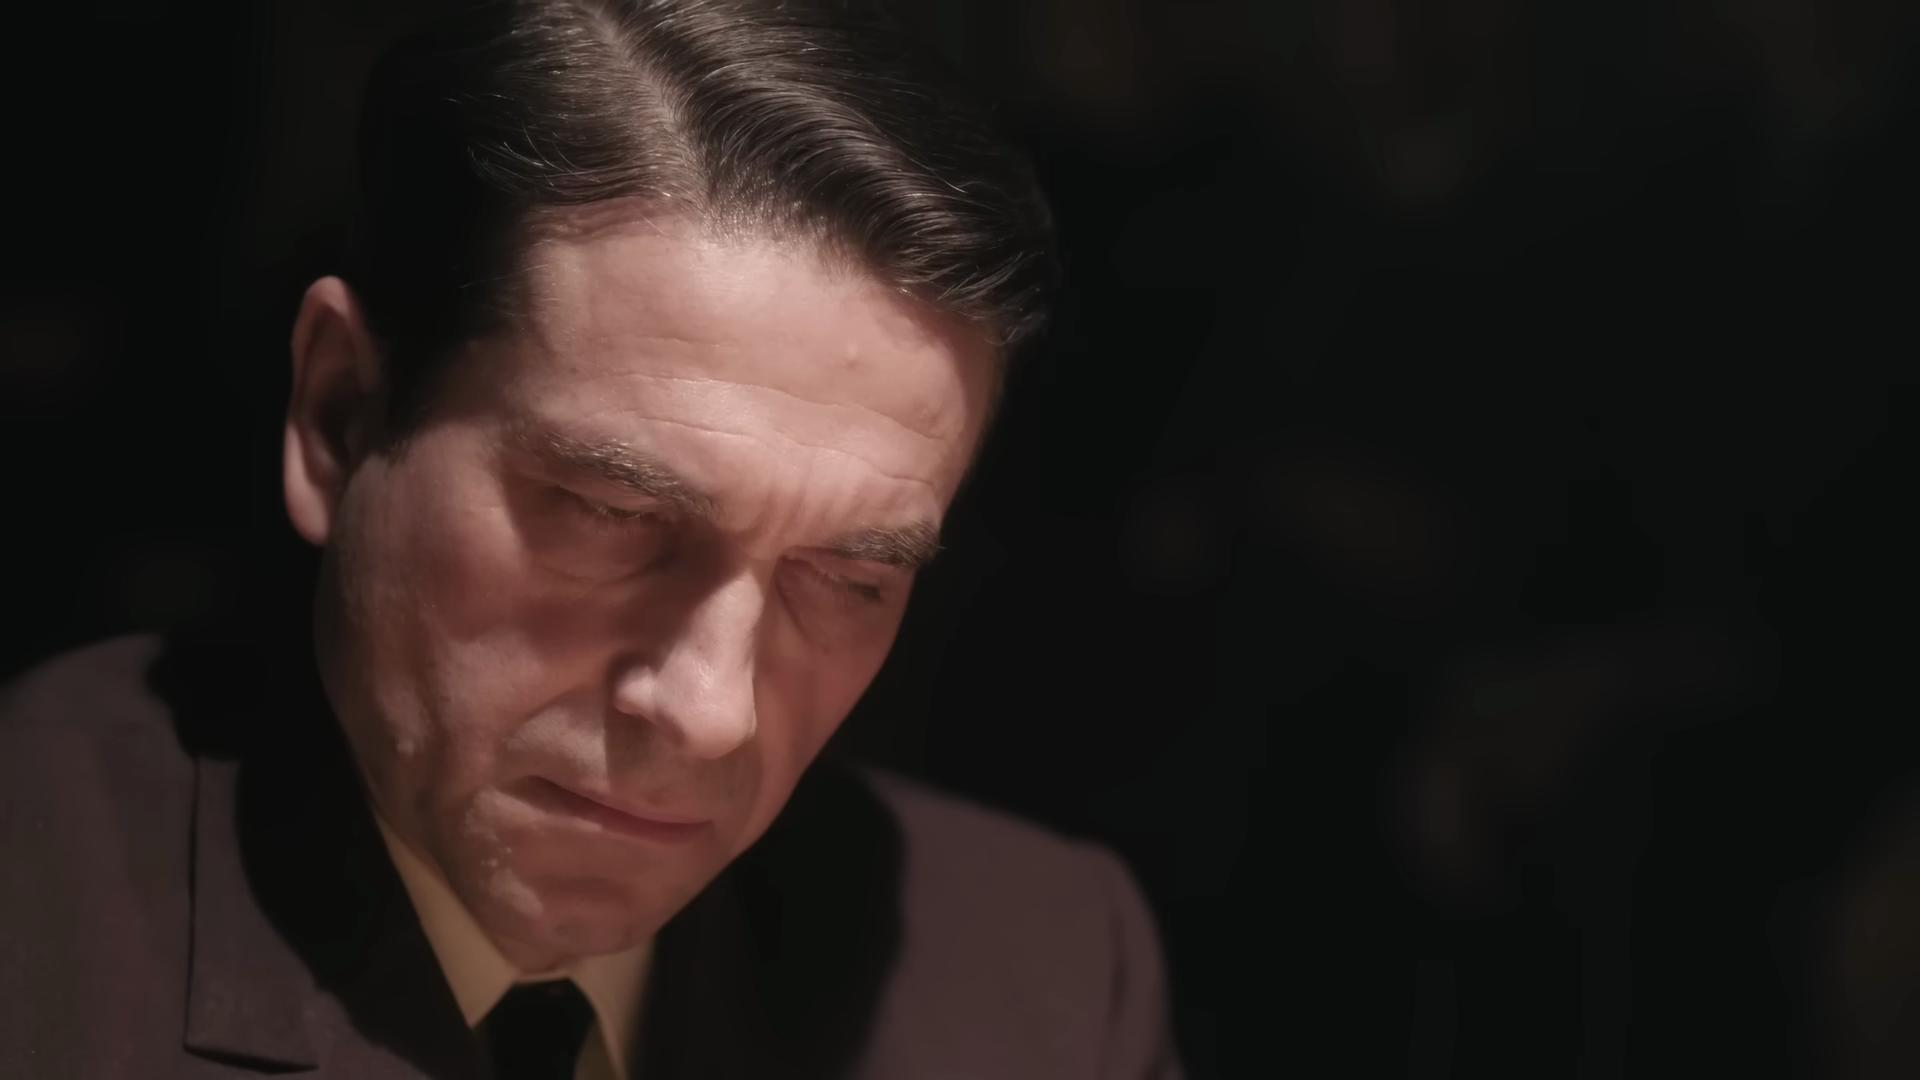
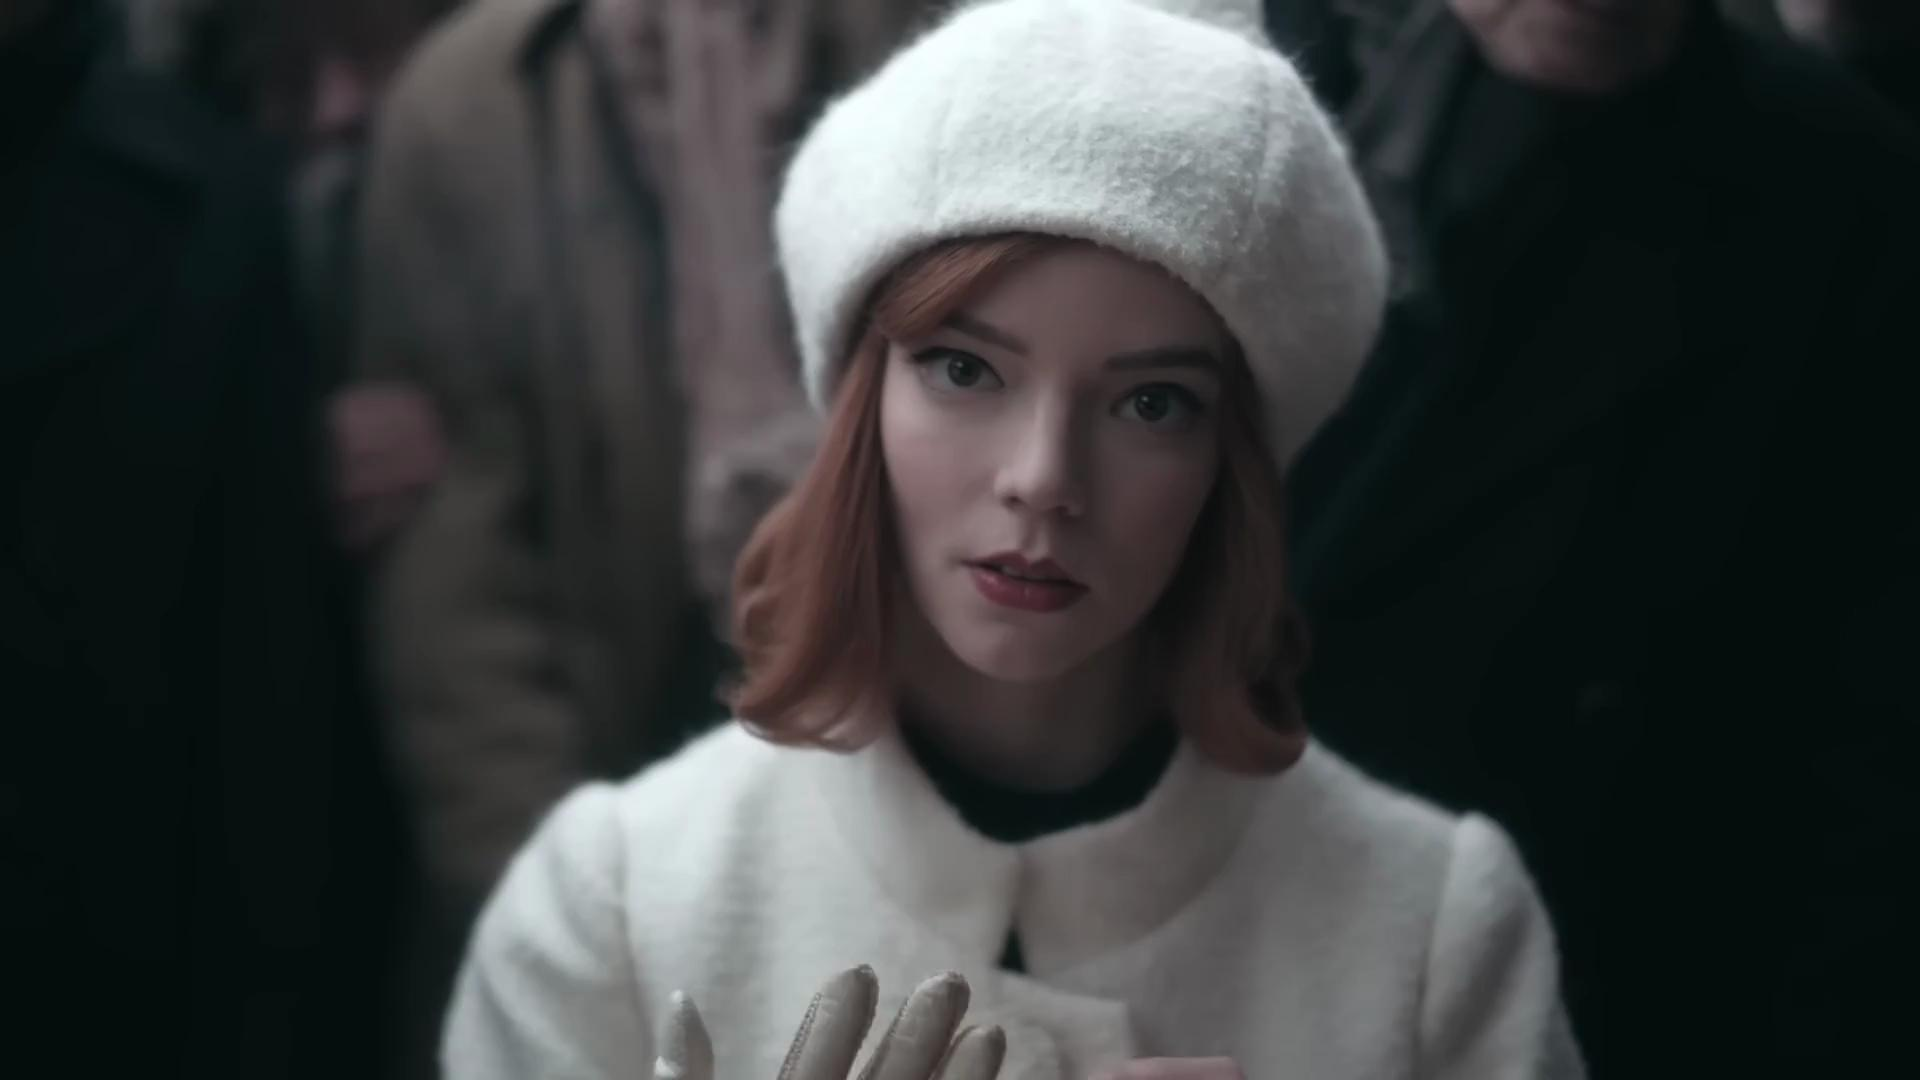
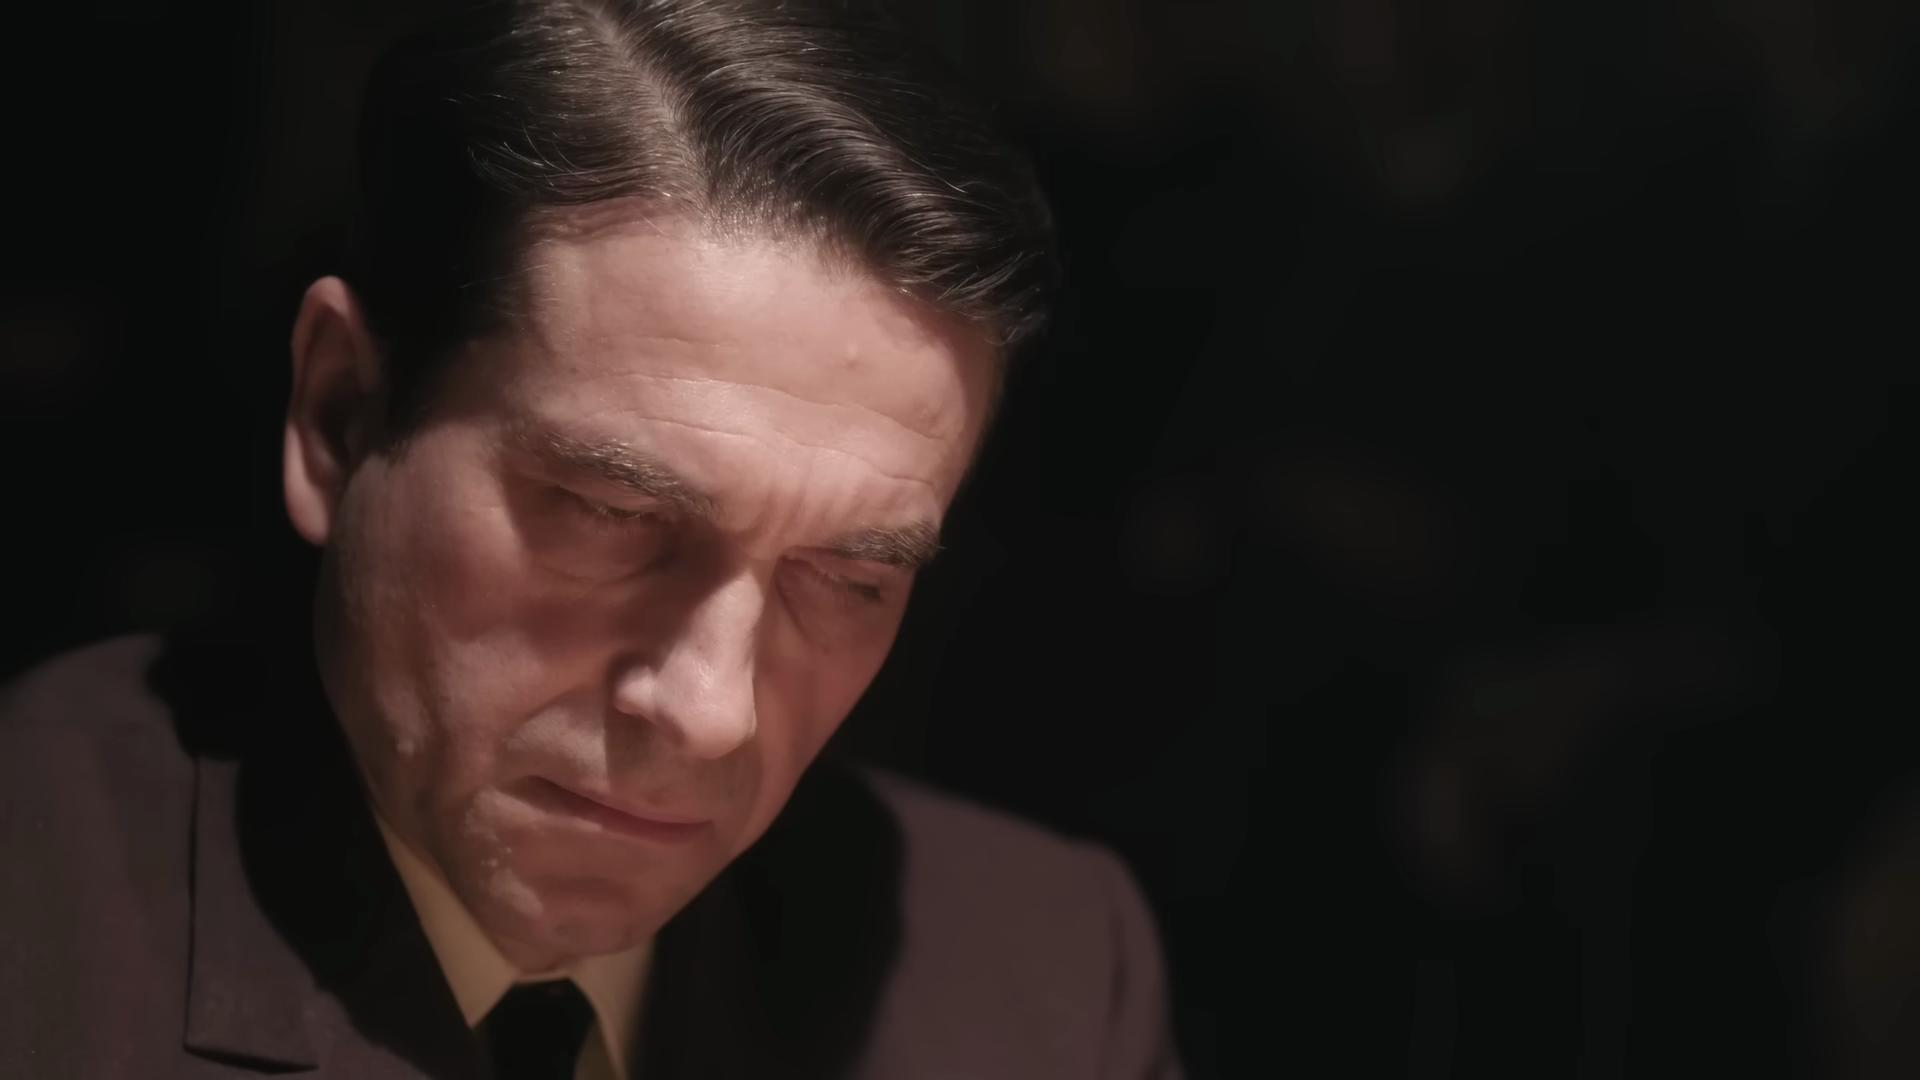

In [28]:
# tail() returns the last 5 rows, head() returns the first 5
hist.select(hist.pos, hist.segment_start, hist.segment_end, hist.video_segment, hist.video).tail()

From this point forward, let's decide to use our second scene detection model, the histogram, which gives us a more reasonable number of scenes. Let's restart our kernel again and get this table just to show again the persistence.

In [29]:
del hist # this just deletes the variable, not the database

In [30]:
import pixeltable as pxt
scenes = pxt.get_table('hist_scene_view')

In [31]:
scenes

view 'hist_scene_view' (of 'chess_vids')

        Column Name             Type                                      Computed With
                pos    Required[Int]                                                   
      segment_start            Float                                                   
  segment_start_pts              Int                                                   
        segment_end            Float                                                   
    segment_end_pts              Int                                                   
      video_segment  Required[Video]                                                   
              video            Video                                                   
           duration            Float                               video.get_duration()
             scenes             Json                 video.scene_detect_content(fps=10)
        scenes_hist             Json  video.scene_detect_histogram(fps=10,\n    thre...

In [32]:
scenes.history()

version                       created_at  user change_type  inserts  \
0        0 2025-12-11 03:56:08.655093+00:00  None      schema       10   

   updates  deletes  errors  computed    schema_change  
0        0        0       0         0  Initial Version

### 04 - Add scene audio

Next, we'd like to enrich our scene view, `scenes`, with the audio. Make sure you have the table named `hist_scenes_view` assigned to the variable `scenes` for this section.

#### Extract & transcribe audio

Extract audio from each scene's video segment using Pixeltable's built-in `extract_audio()` function.

In [33]:
scenes.add_computed_column(
    audio=scenes.video_segment.extract_audio(),
    if_exists='replace'
)

Added 10 column values with 0 errors.


10 rows updated, 10 values computed.

pos                                      video_segment  \
0    0  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
1    1  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
2    2  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
3    3  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
4    4  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
5    5  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
6    6  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
7    7  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
8    8  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
9    9  /Users/alison-pxt/.pixeltable/media/c4b809b944...   

                                               audio  
0  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
1  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
2  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
3  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
4  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
5  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
6  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
7  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
8  /Users/alison-pxt/.pixeltable/media/c4b809b944...  
9  /Users/alison-pxt/.pixeltable/media/c4b809b944...
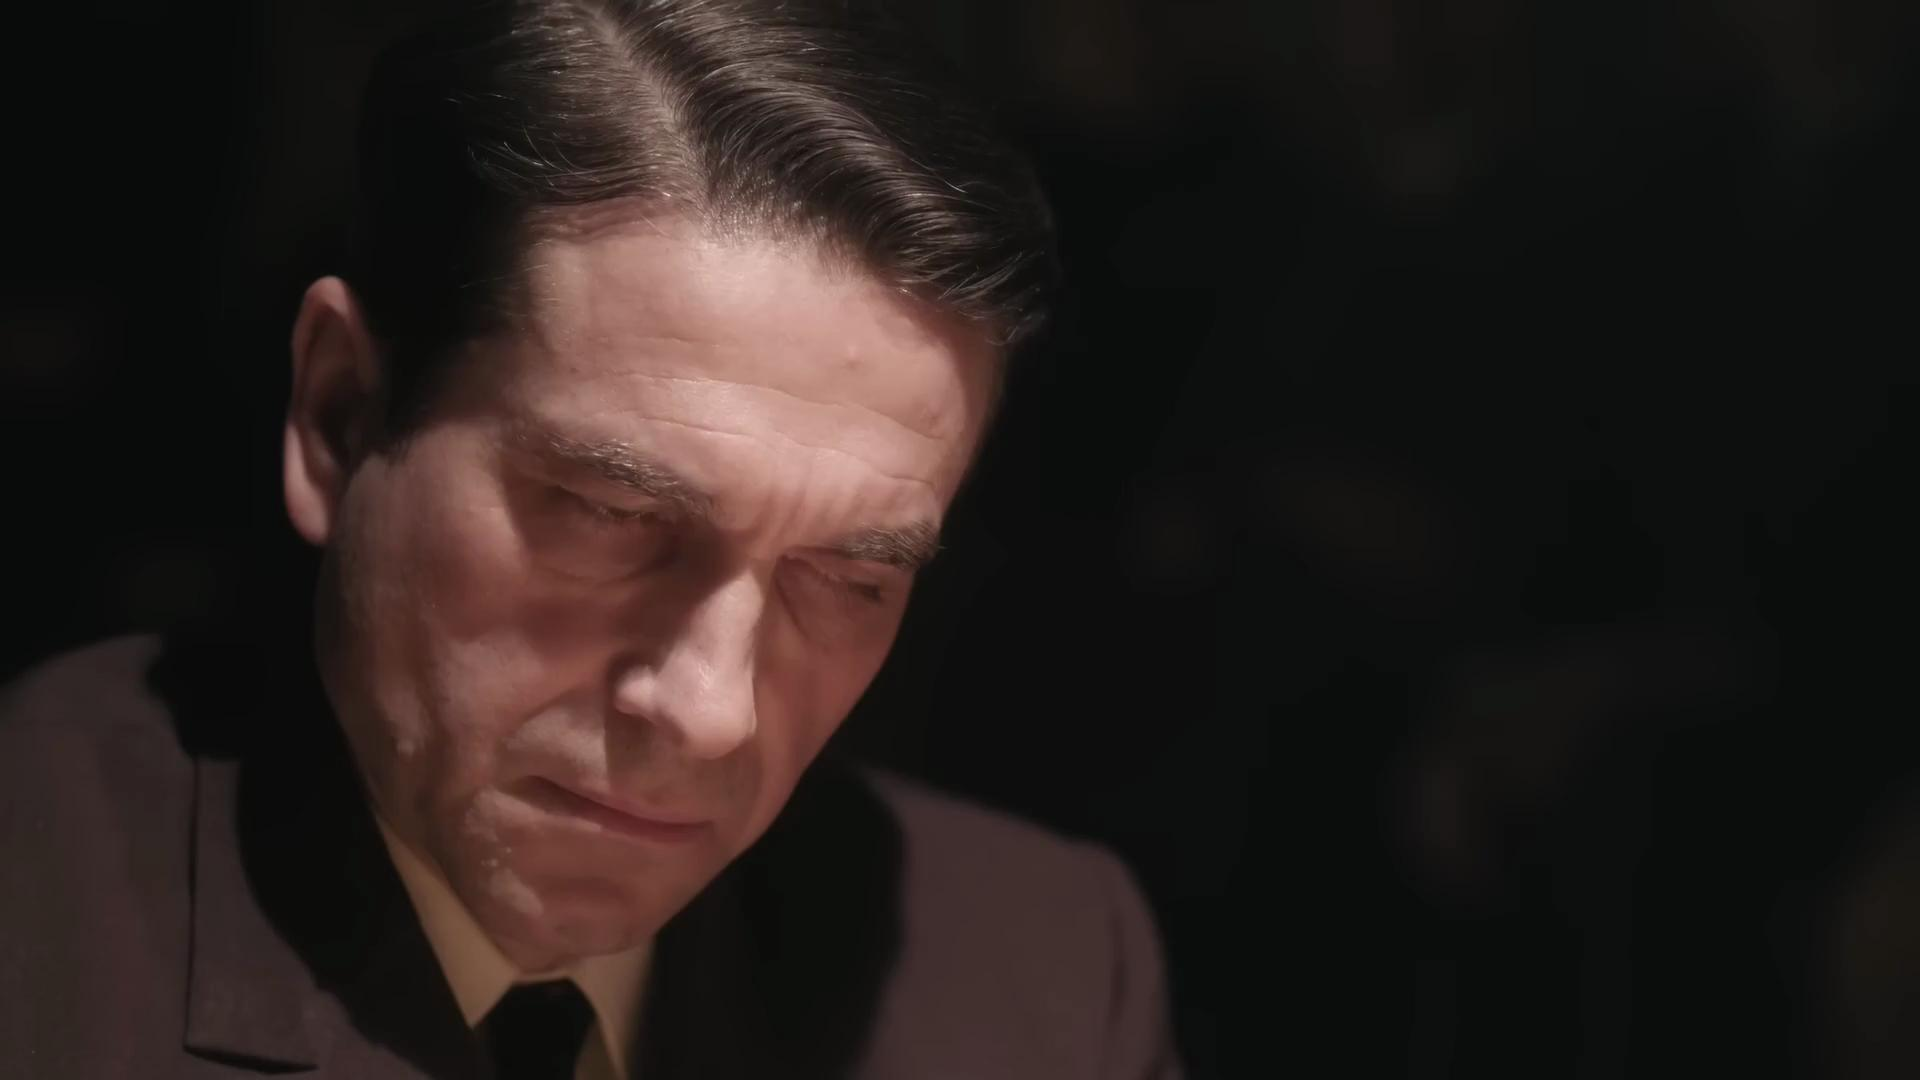
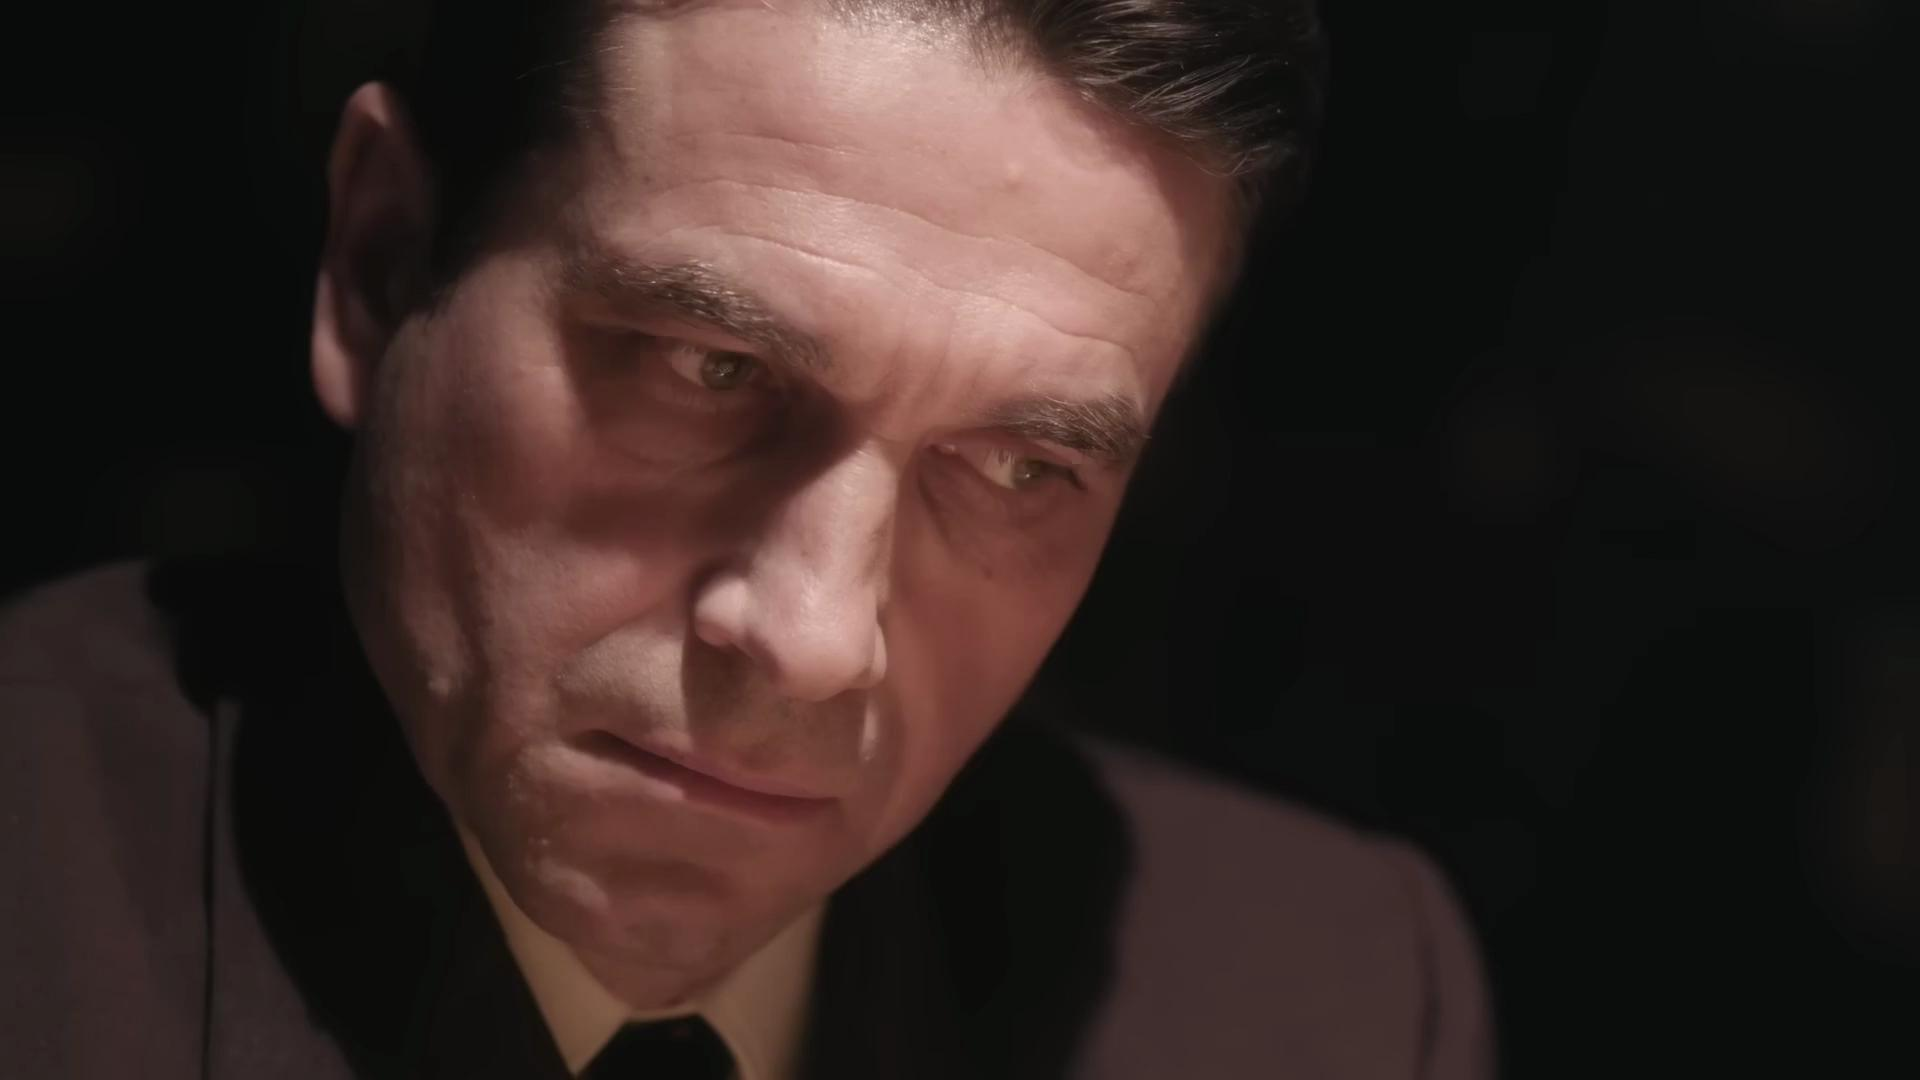
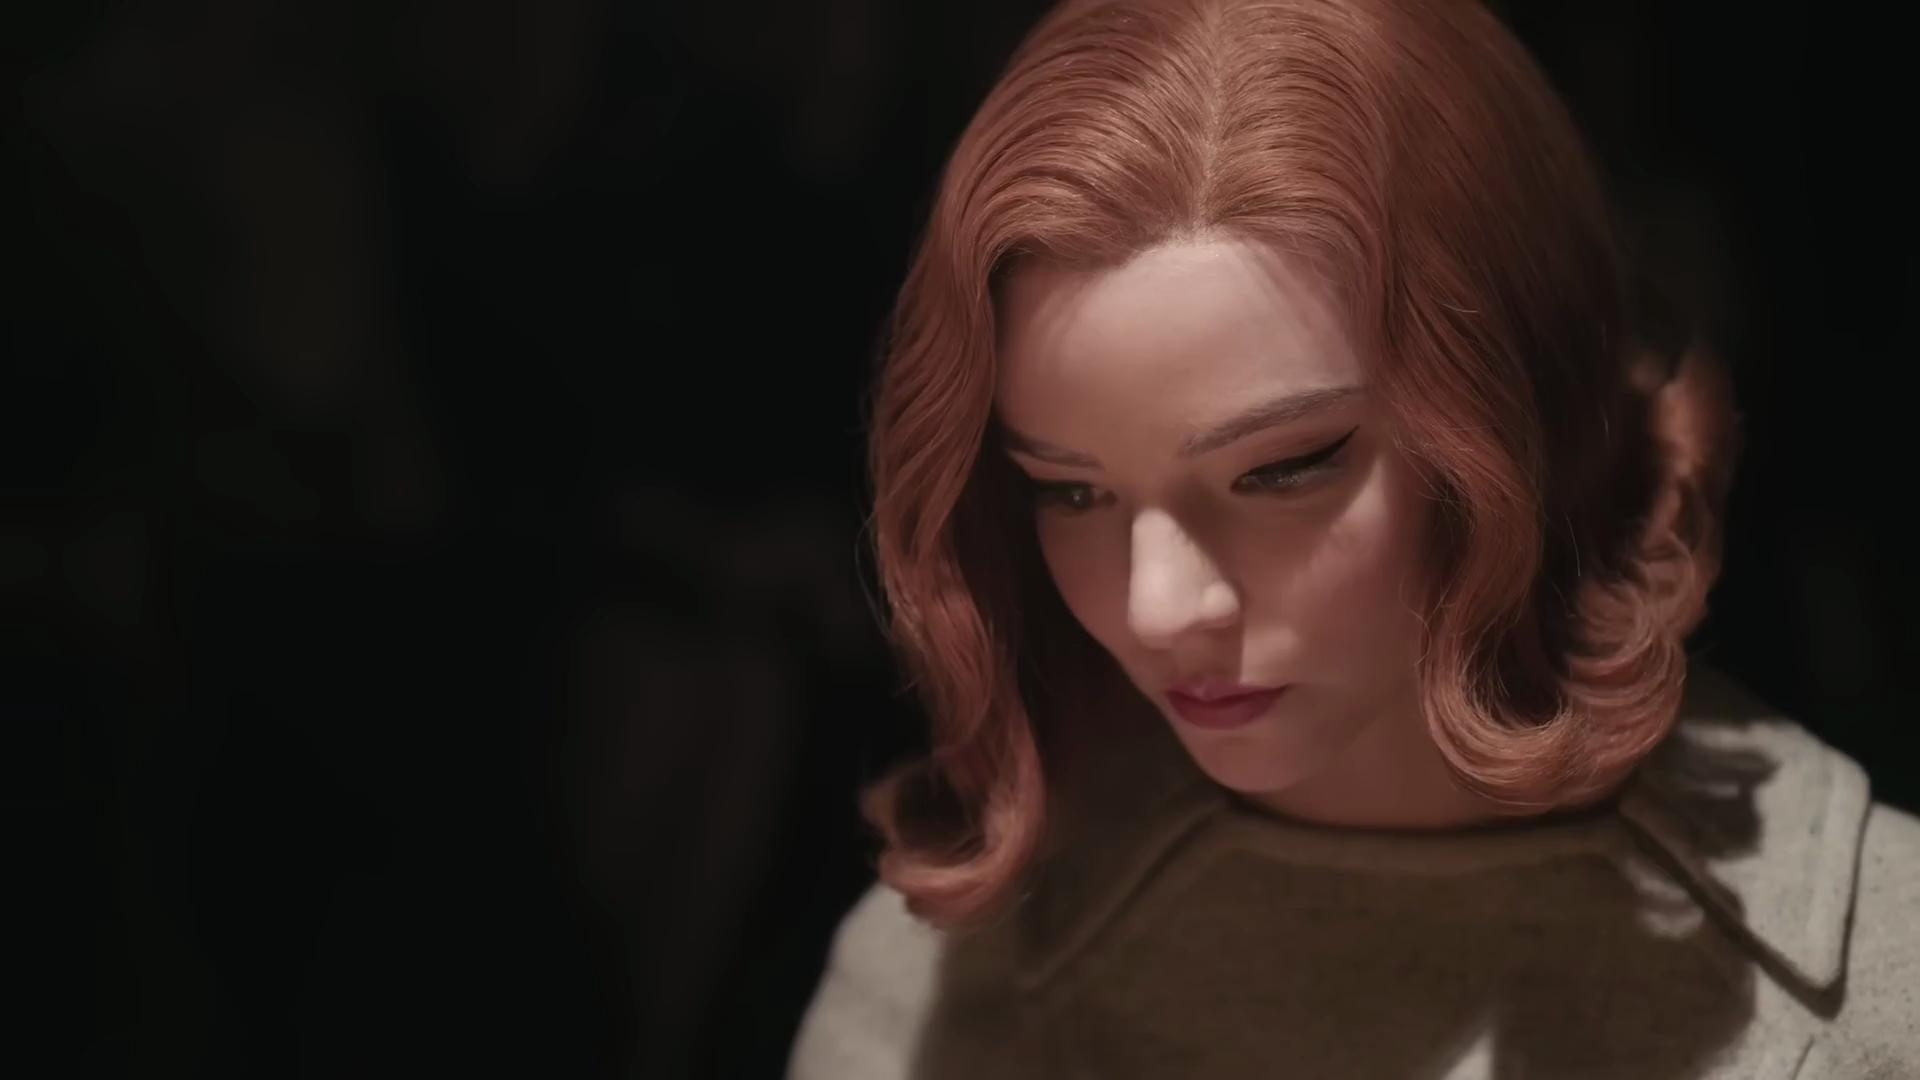
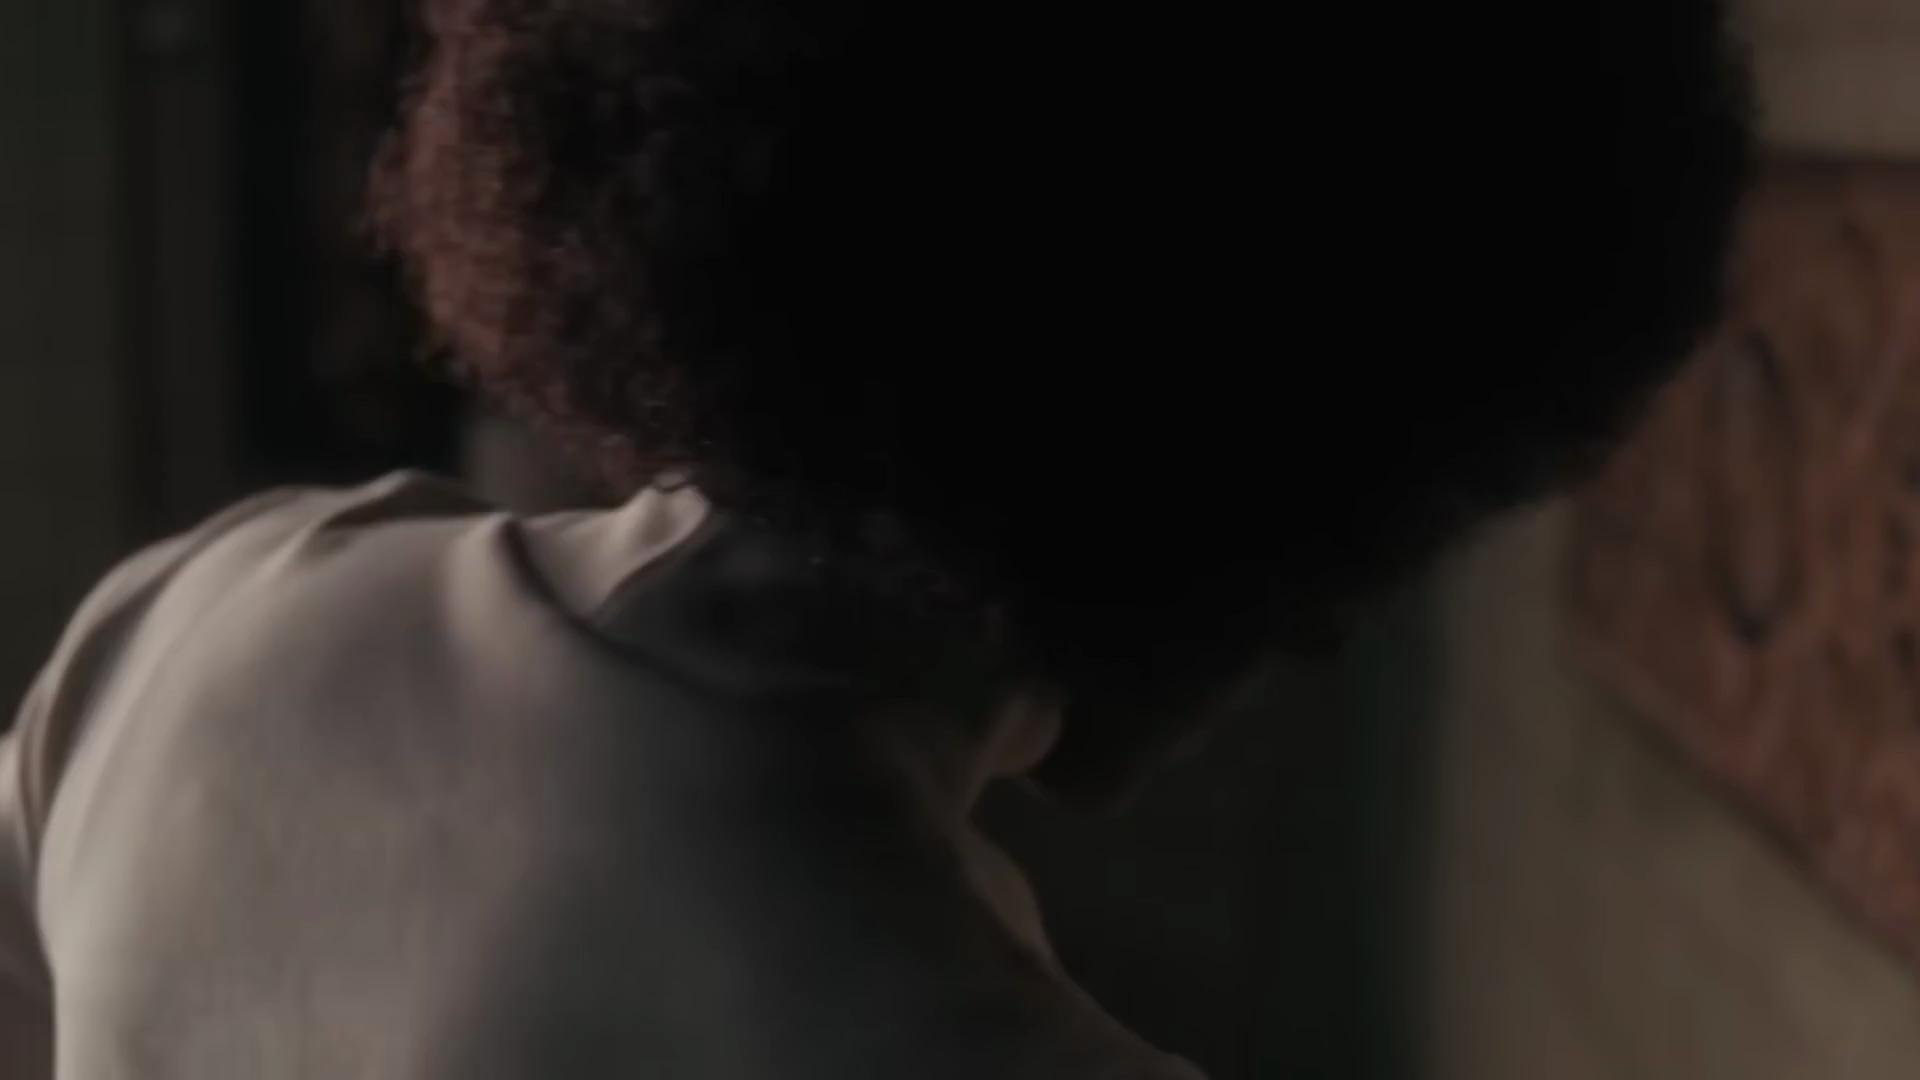
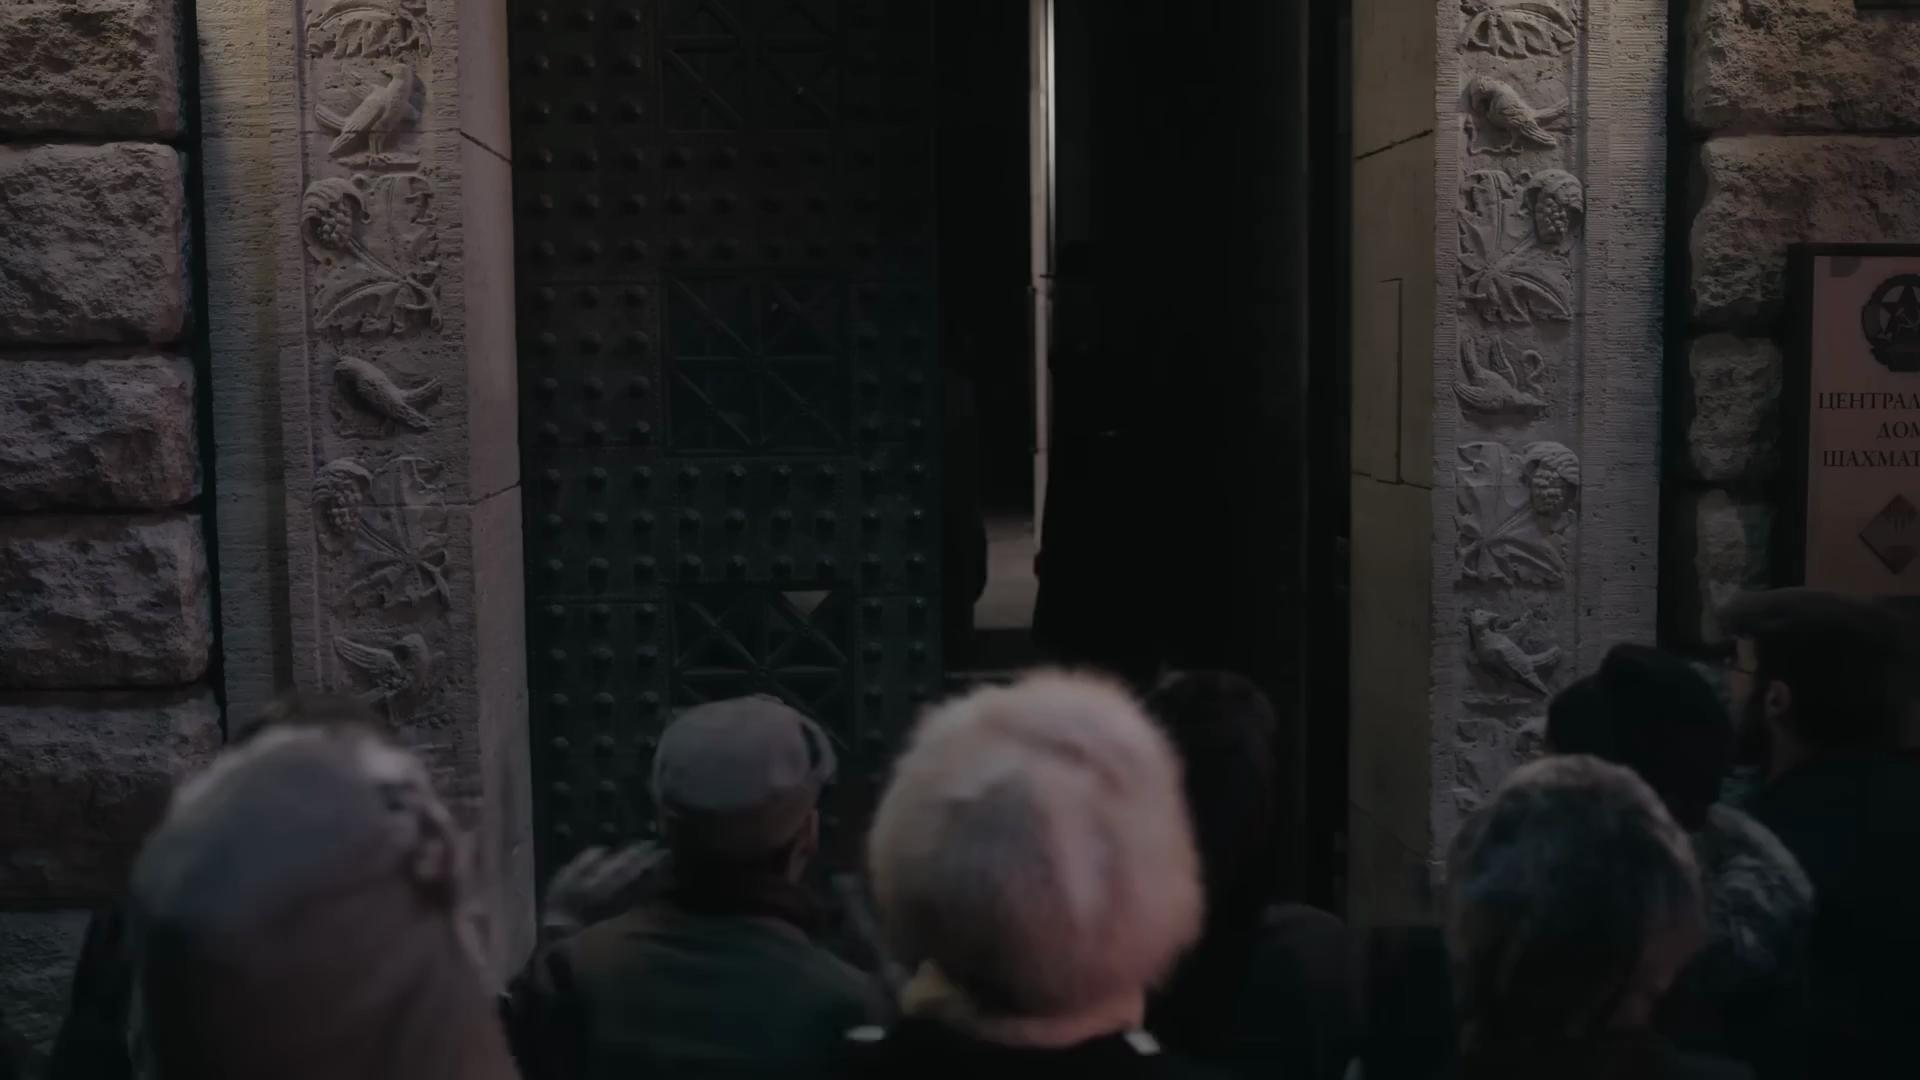
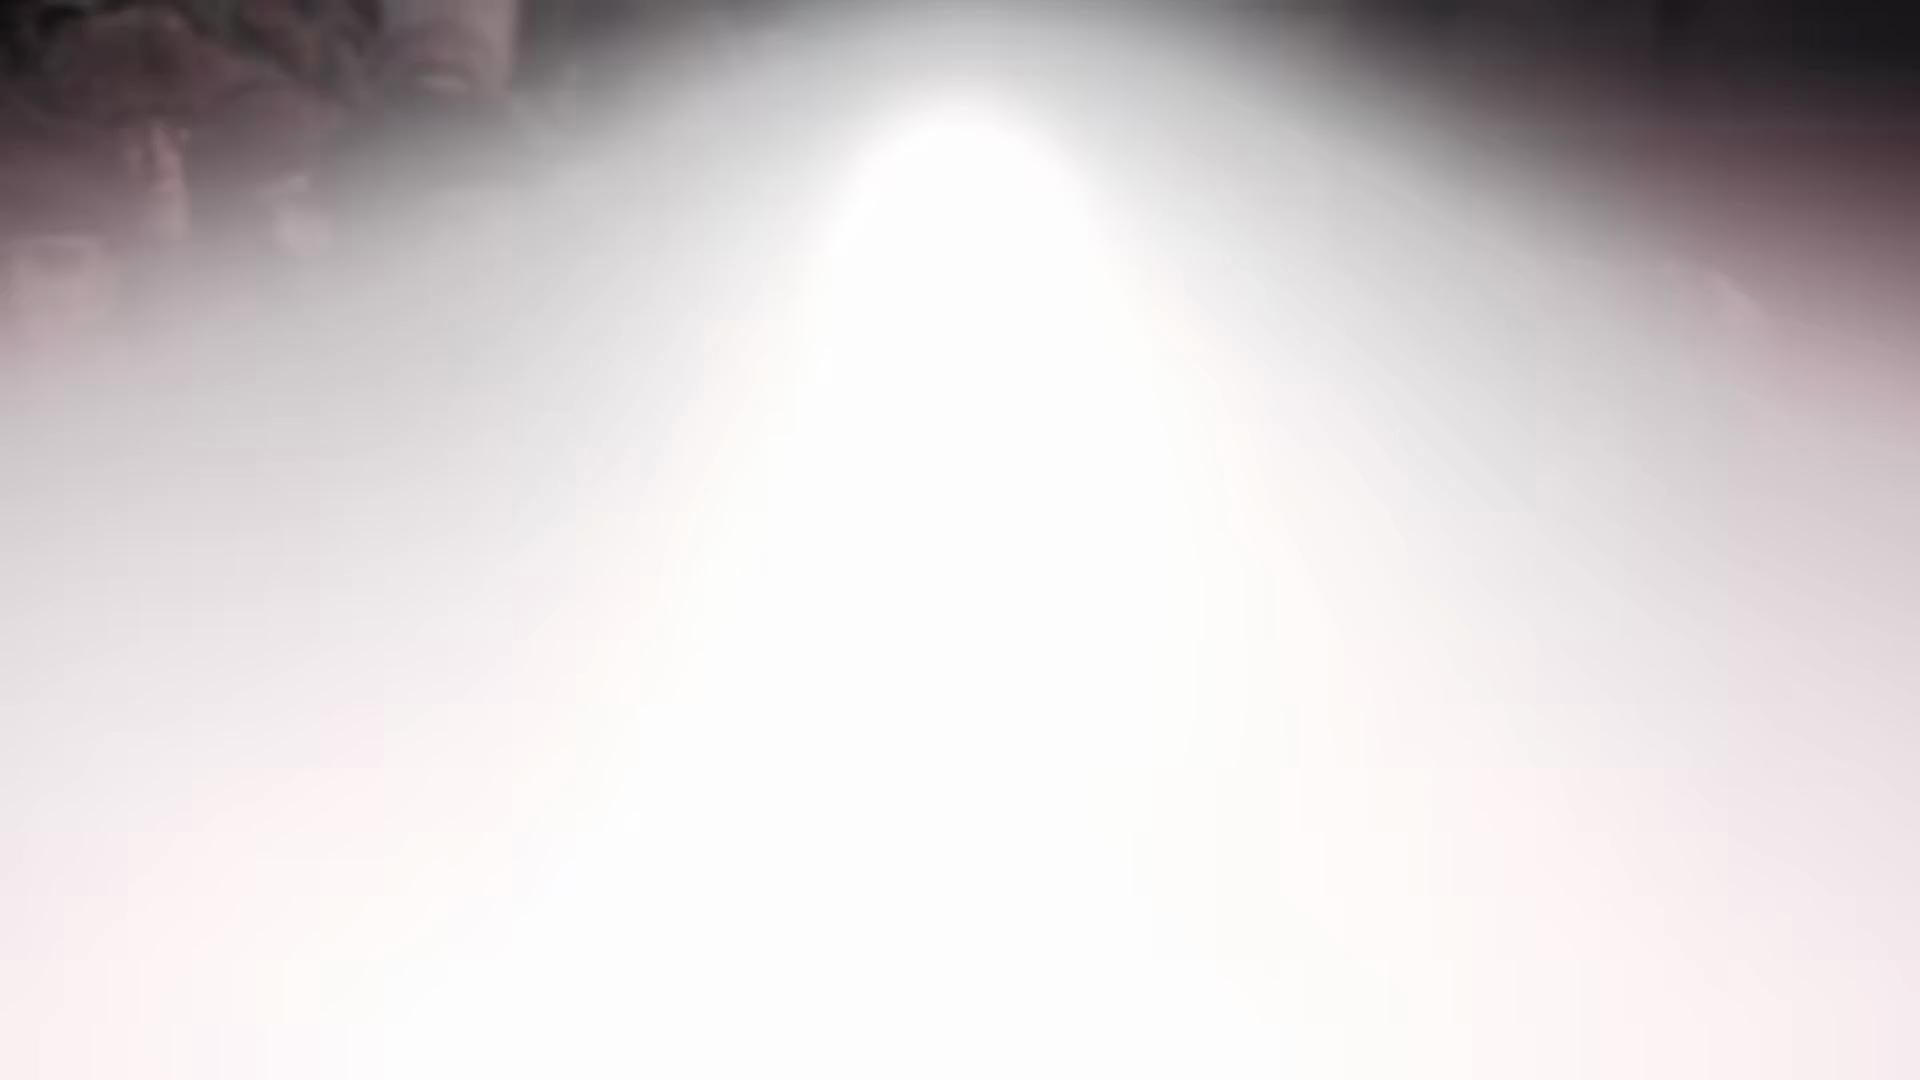
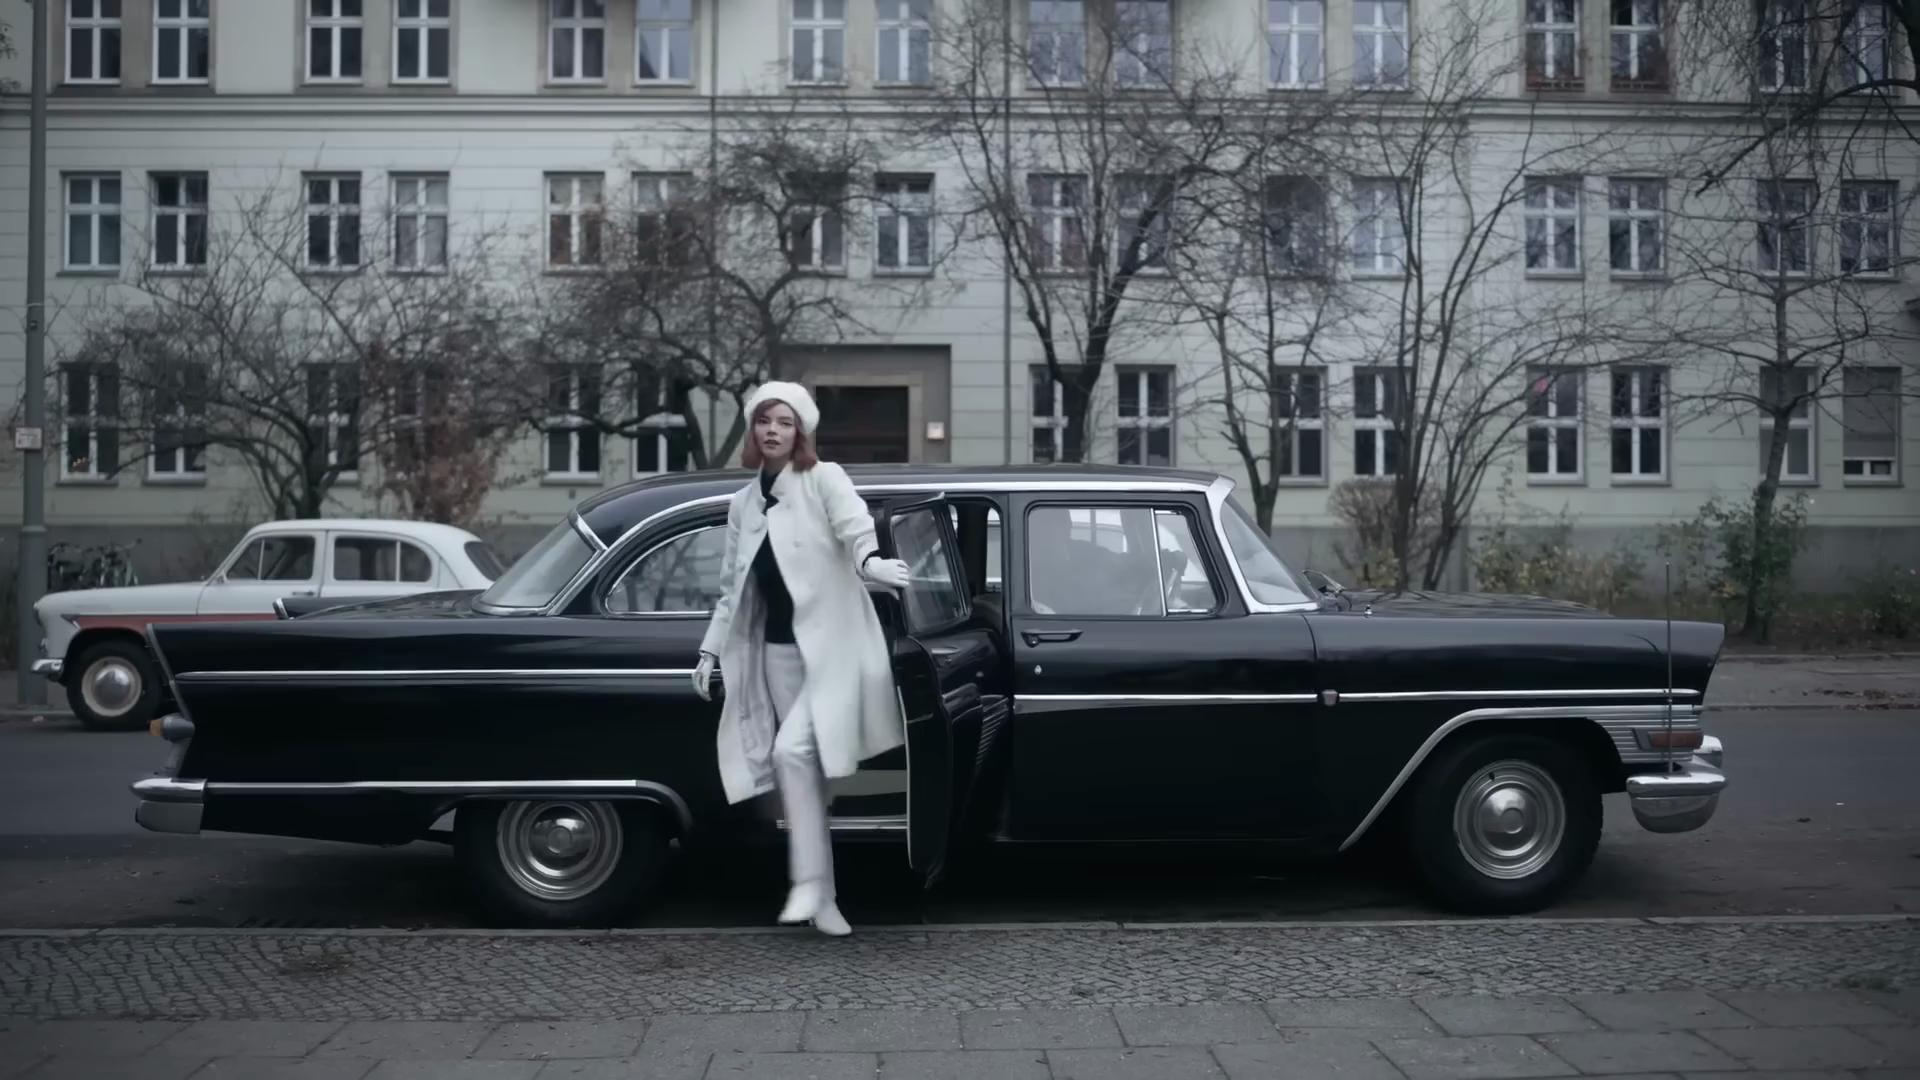
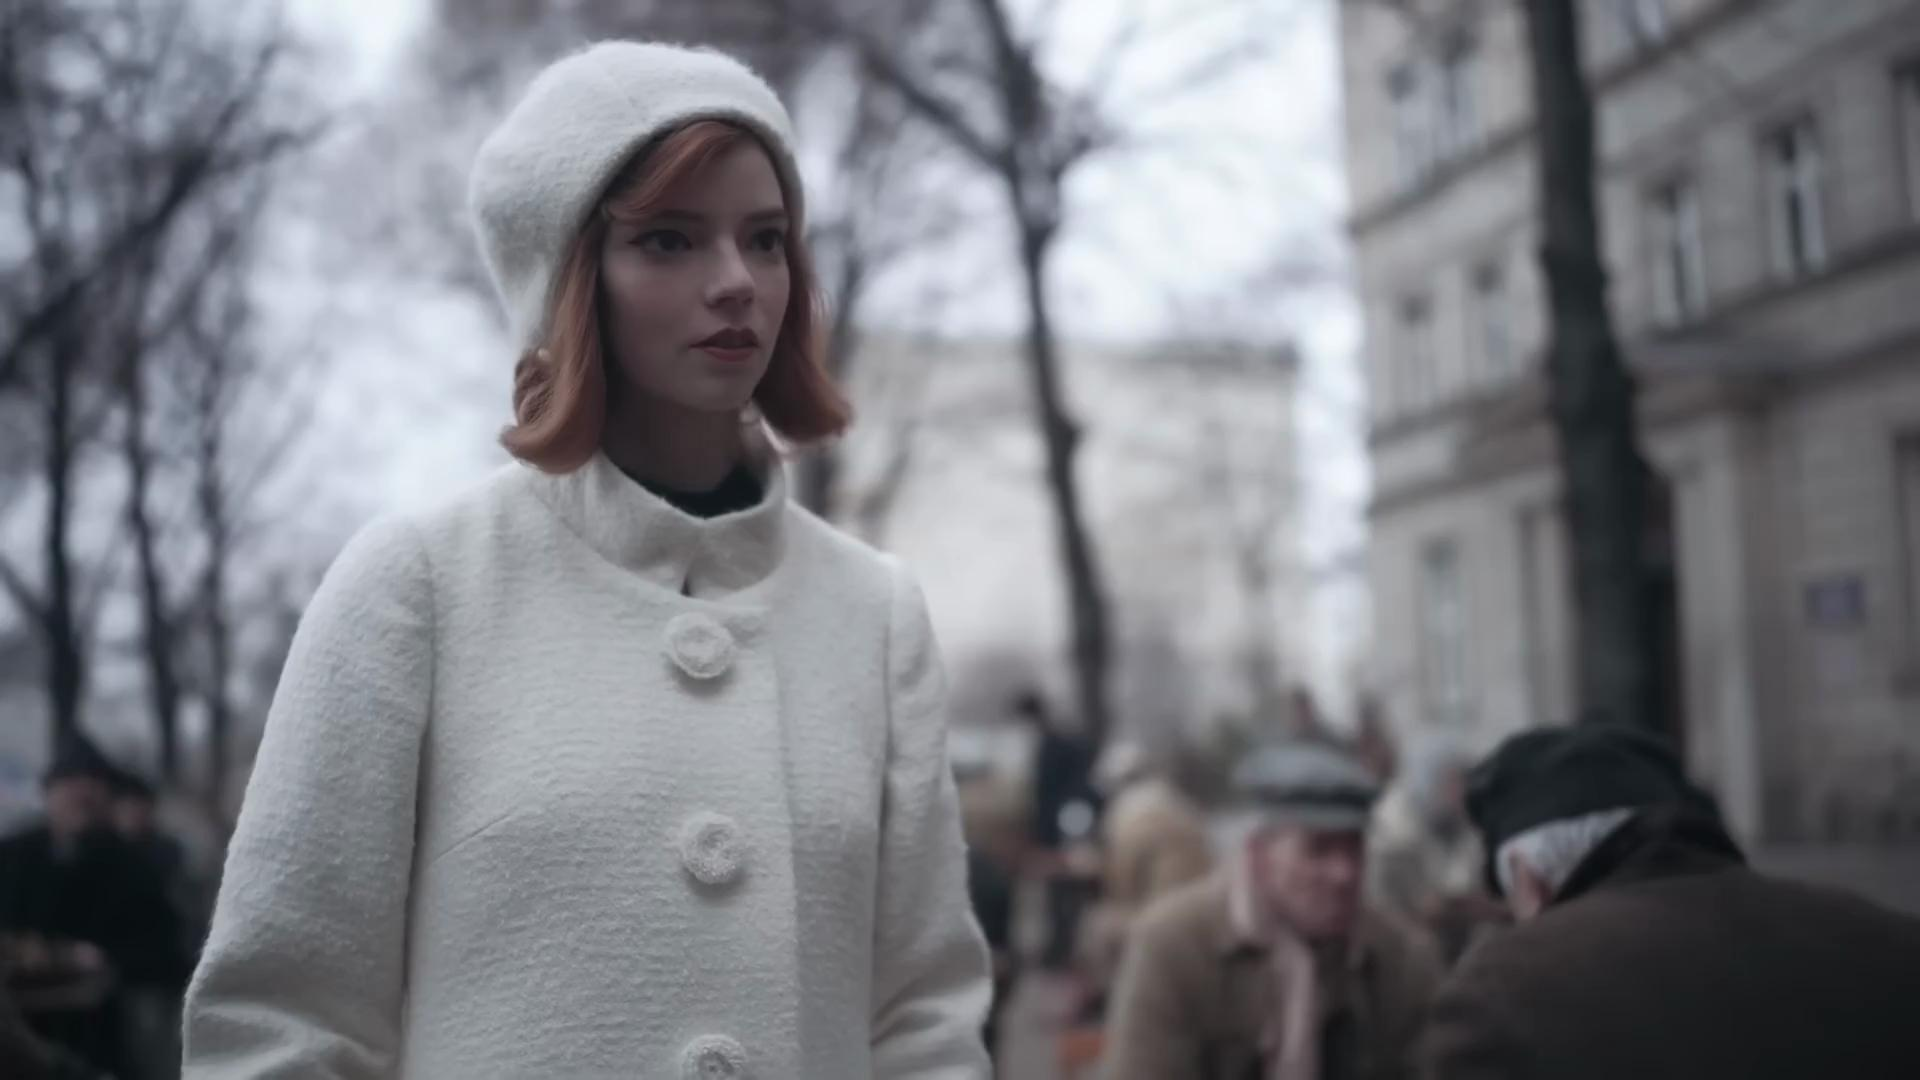
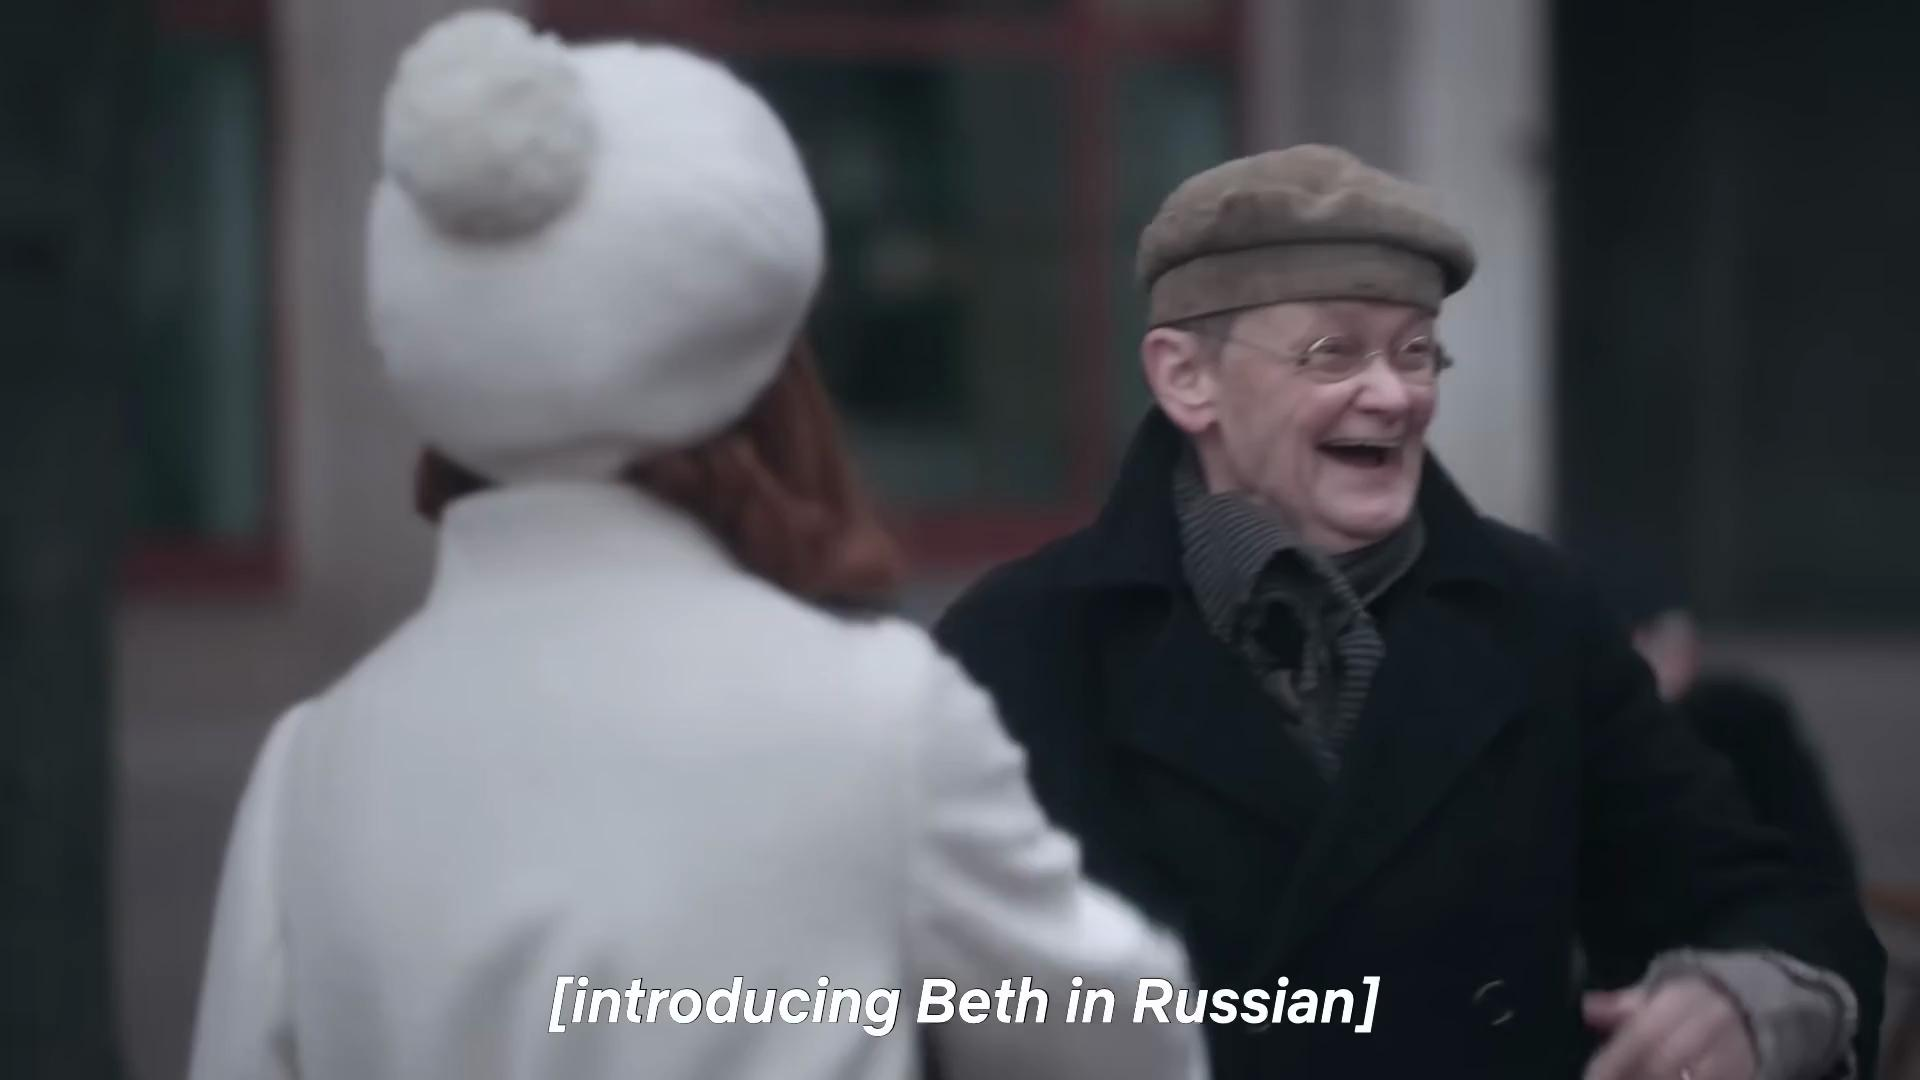
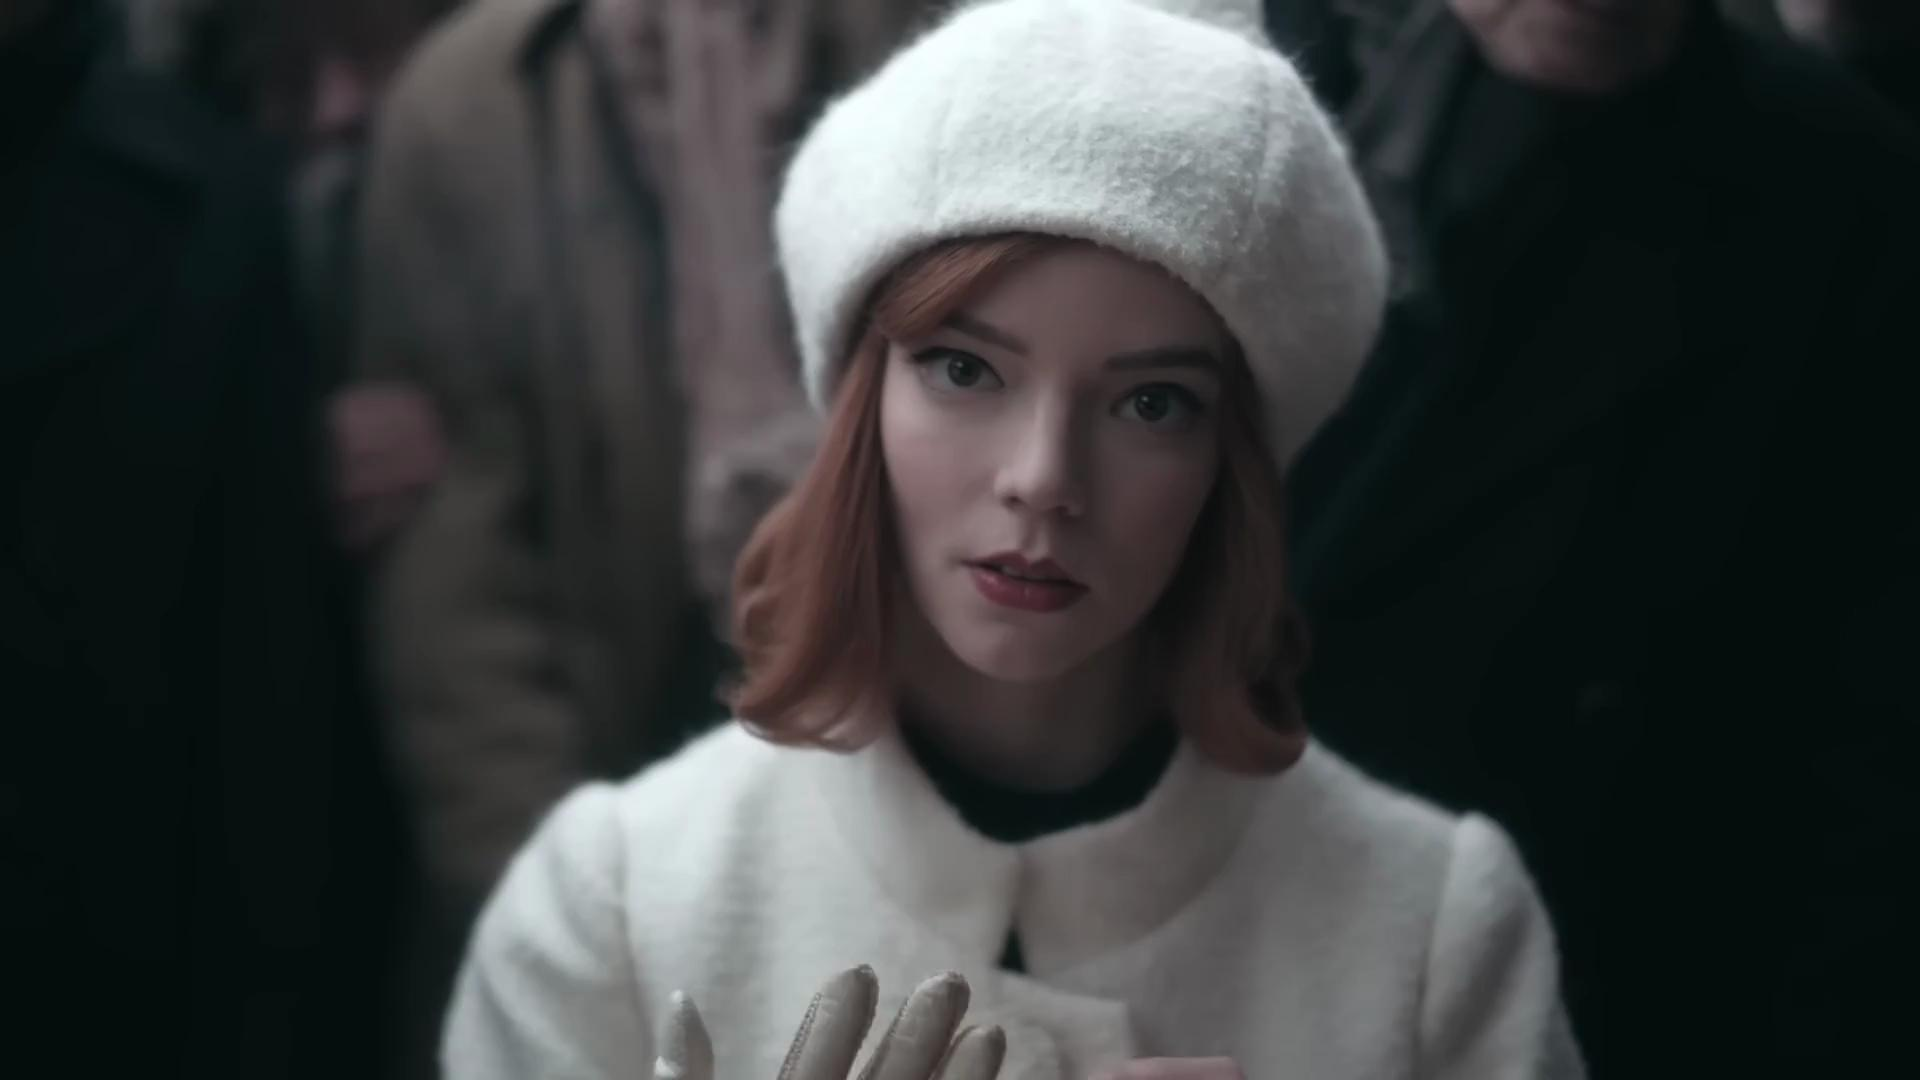

In [34]:
scenes.select(scenes.pos, scenes.video_segment, scenes.audio).tail()

Next, we'll transcribe audio from each scene using OpenAI's Whisper model:

In [35]:
# TODO: consider using the OpenAI API for this (pro - faster, con - requires API key)
from pixeltable.functions import whisper

scenes.add_computed_column(
    transcription=whisper.transcribe(scenes.audio, model='base'),
    if_exists='replace'
)

/Users/alison-pxt/Documents/Github/pxt-primetime/.venv/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/alison-pxt/Documents/Github/pxt-primetime/.venv/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/alison-pxt/Documents/Github/pxt-primetime/.venv/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/alison-pxt/Documents/Github/pxt-primetime/.venv/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/alison-pxt/Documents/Github/p

Added 10 column values with 0 errors.


10 rows updated, 10 values computed.

pos                                      video_segment  \
0    1  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
1    0  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
2    2  /Users/alison-pxt/.pixeltable/media/c4b809b944...   

                                       transcription  
0  {'text': ' Корректор Е.R.ceny', 'language': 'r...  
1  {'text': ' М besдевозны<|pl|> Бежка Сто Happy ...  
2  {'text': ' It's your game. Take it. Thank you....
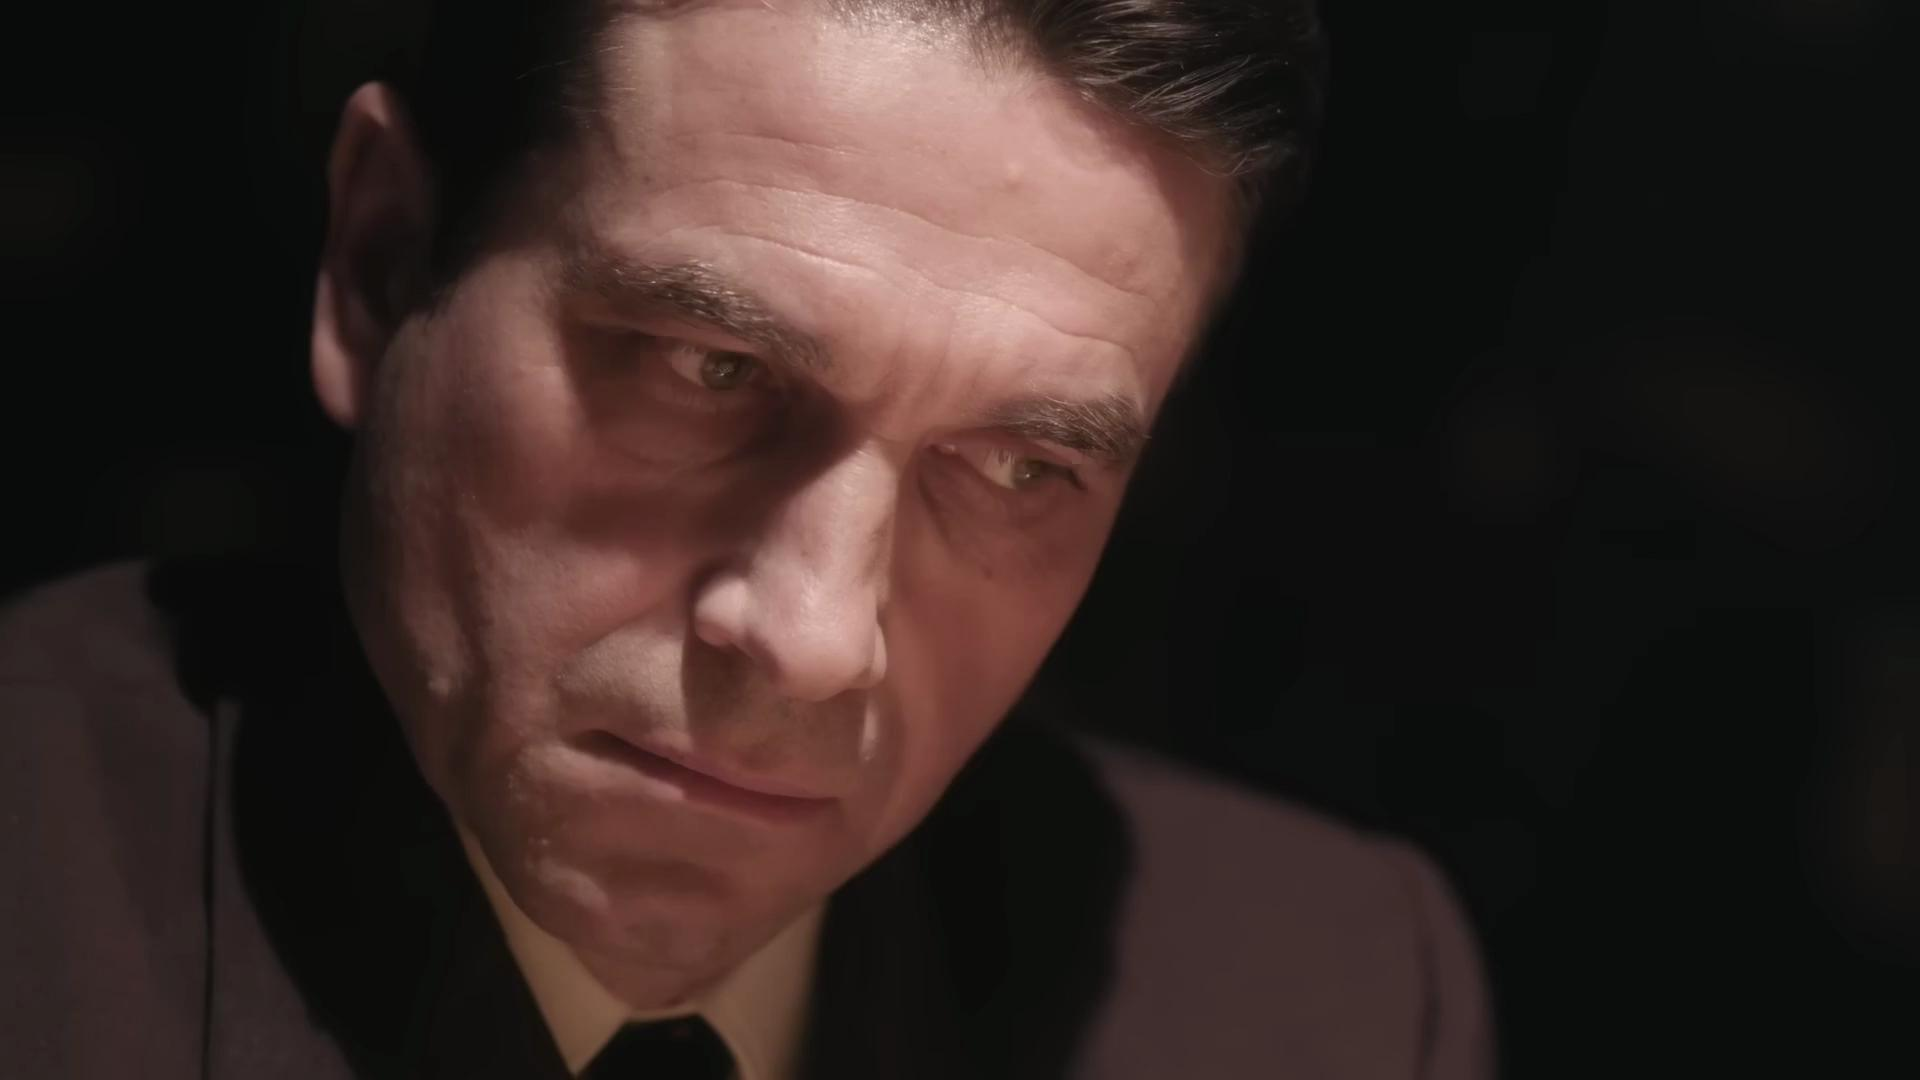
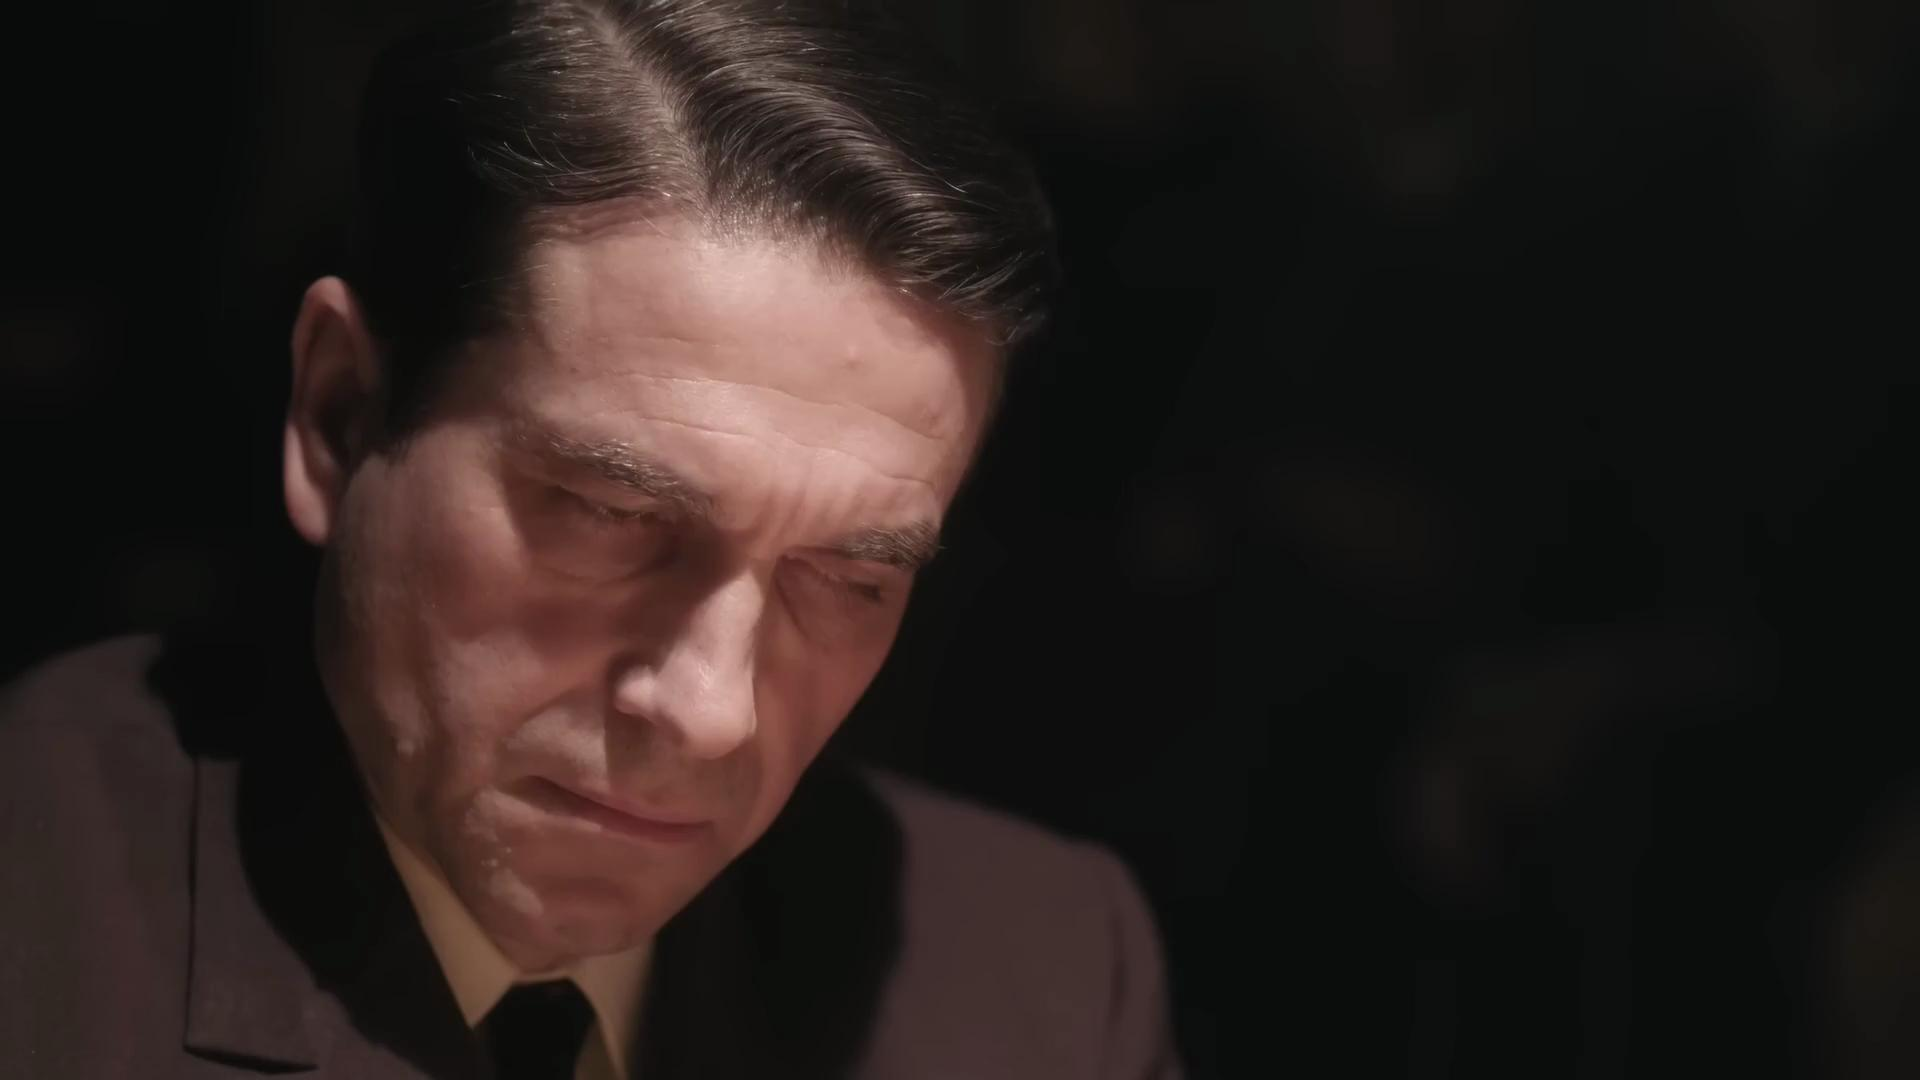
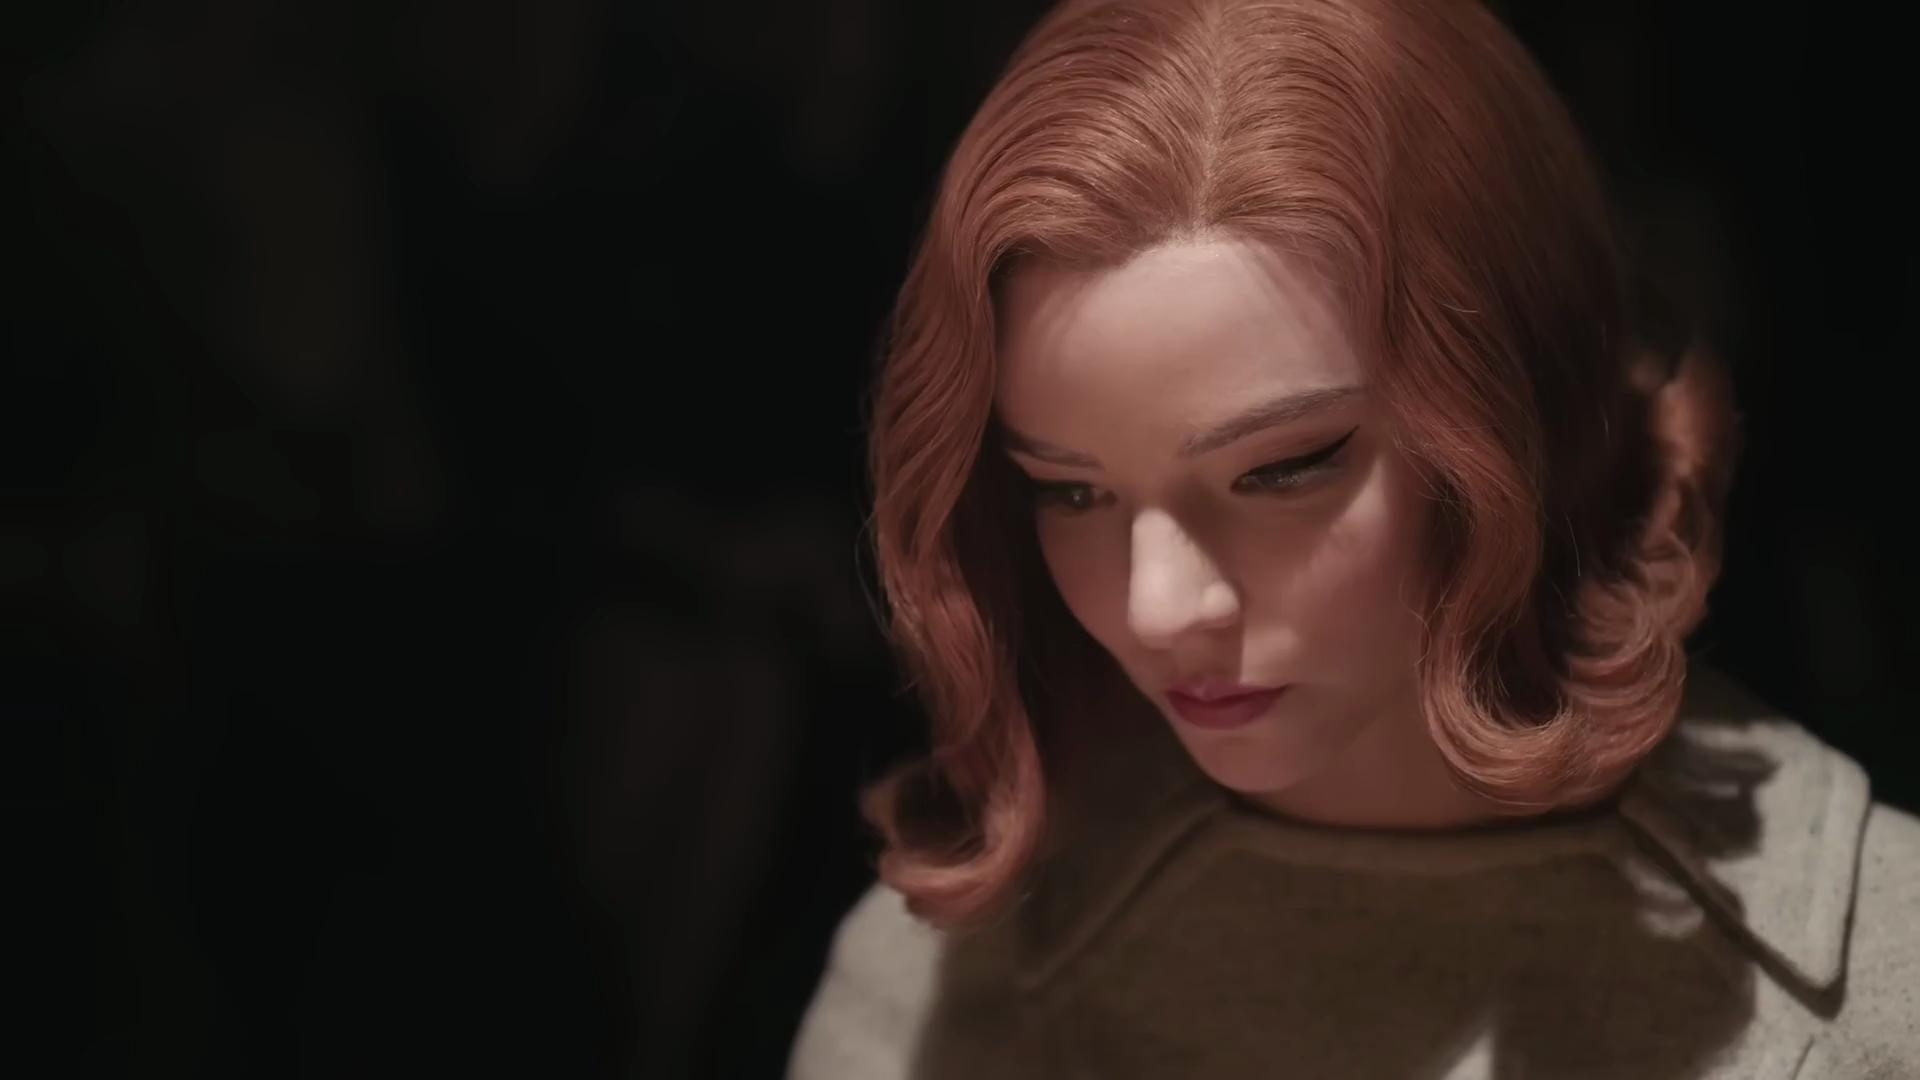

In [36]:
scenes.select(scenes.pos, scenes.video_segment, scenes.transcription).limit(3).collect()

We need to extract the text from the JSON output. We can do the same to save the language detected as well.

In [37]:
# Extract the text and language from the transcription JSON
scenes.add_computed_column(
    transcript_text=scenes.transcription.text,
    if_exists='replace'
)
scenes.add_computed_column(
    transcript_lang=scenes.transcription.language,
    if_exists='replace'
)

Added 10 column values with 0 errors.
Added 10 column values with 0 errors.


10 rows updated, 10 values computed.

View the extracted transcript text:

pos                                      video_segment  \
0    0  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
1    1  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
2    2  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
3    3  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
4    4  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
5    5  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
6    6  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
7    7  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
8    8  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
9    9  /Users/alison-pxt/.pixeltable/media/c4b809b944...   

                                     transcript_text transcript_lang  
0   М besдевозны<|pl|> Бежка Сто Happy Редактор с...              ru  
1                                 Корректор Е.R.ceny              ru  
2     It's your game. Take it. Thank you. Thank you.              en  
3   Good for you, Crackle. Good for you. Hmm. Goo...              en  
4                                                                 en  
5   The President has invited you to the White Ho...              en  
6   You're gonna miss the flood? Come on. Come on...              en  
7                           Da. Harebet transmission              tr  
8   J mini aussi, nous! Non, J mini ! Tiens, Tiel...              fr  
9      ПТОМАЛЬНАЯ МУЗЫКА Согр ions. ТРЕВОЖНАЯ МУЗЫКА              ru
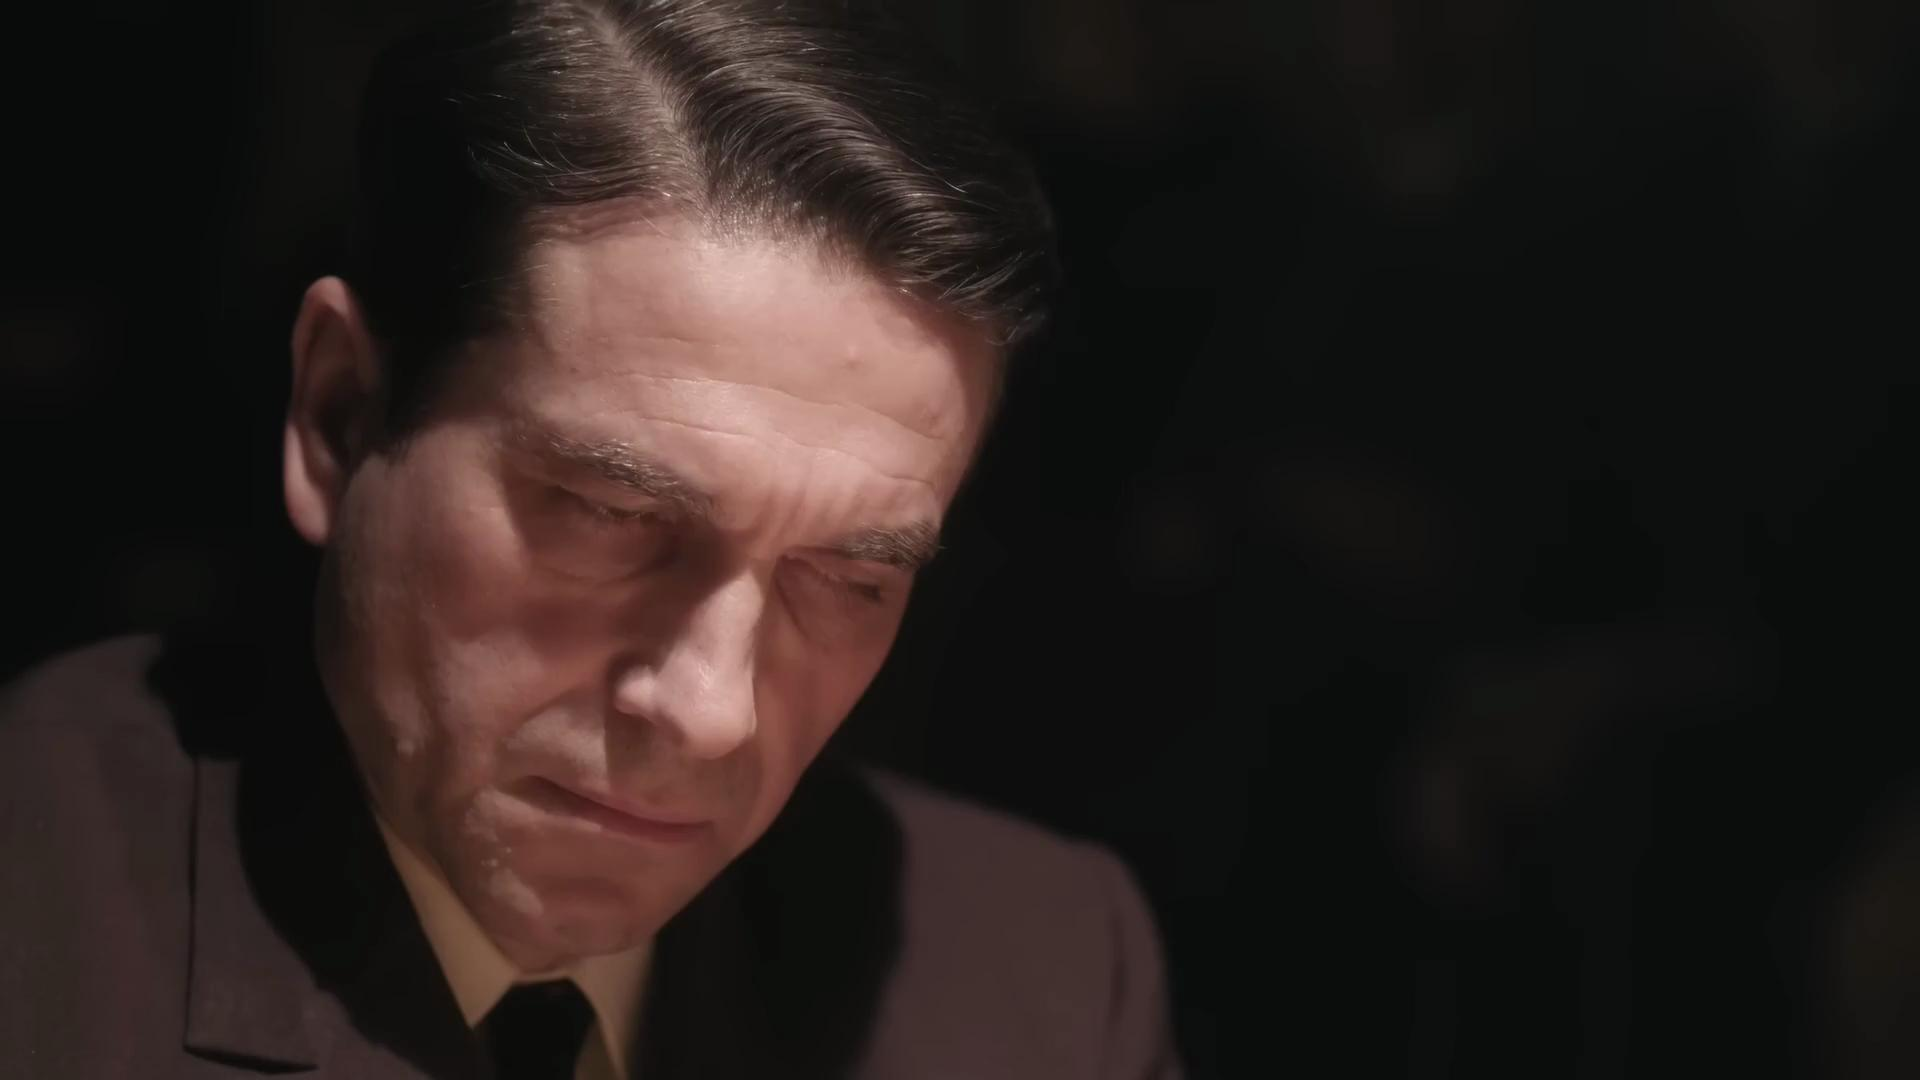
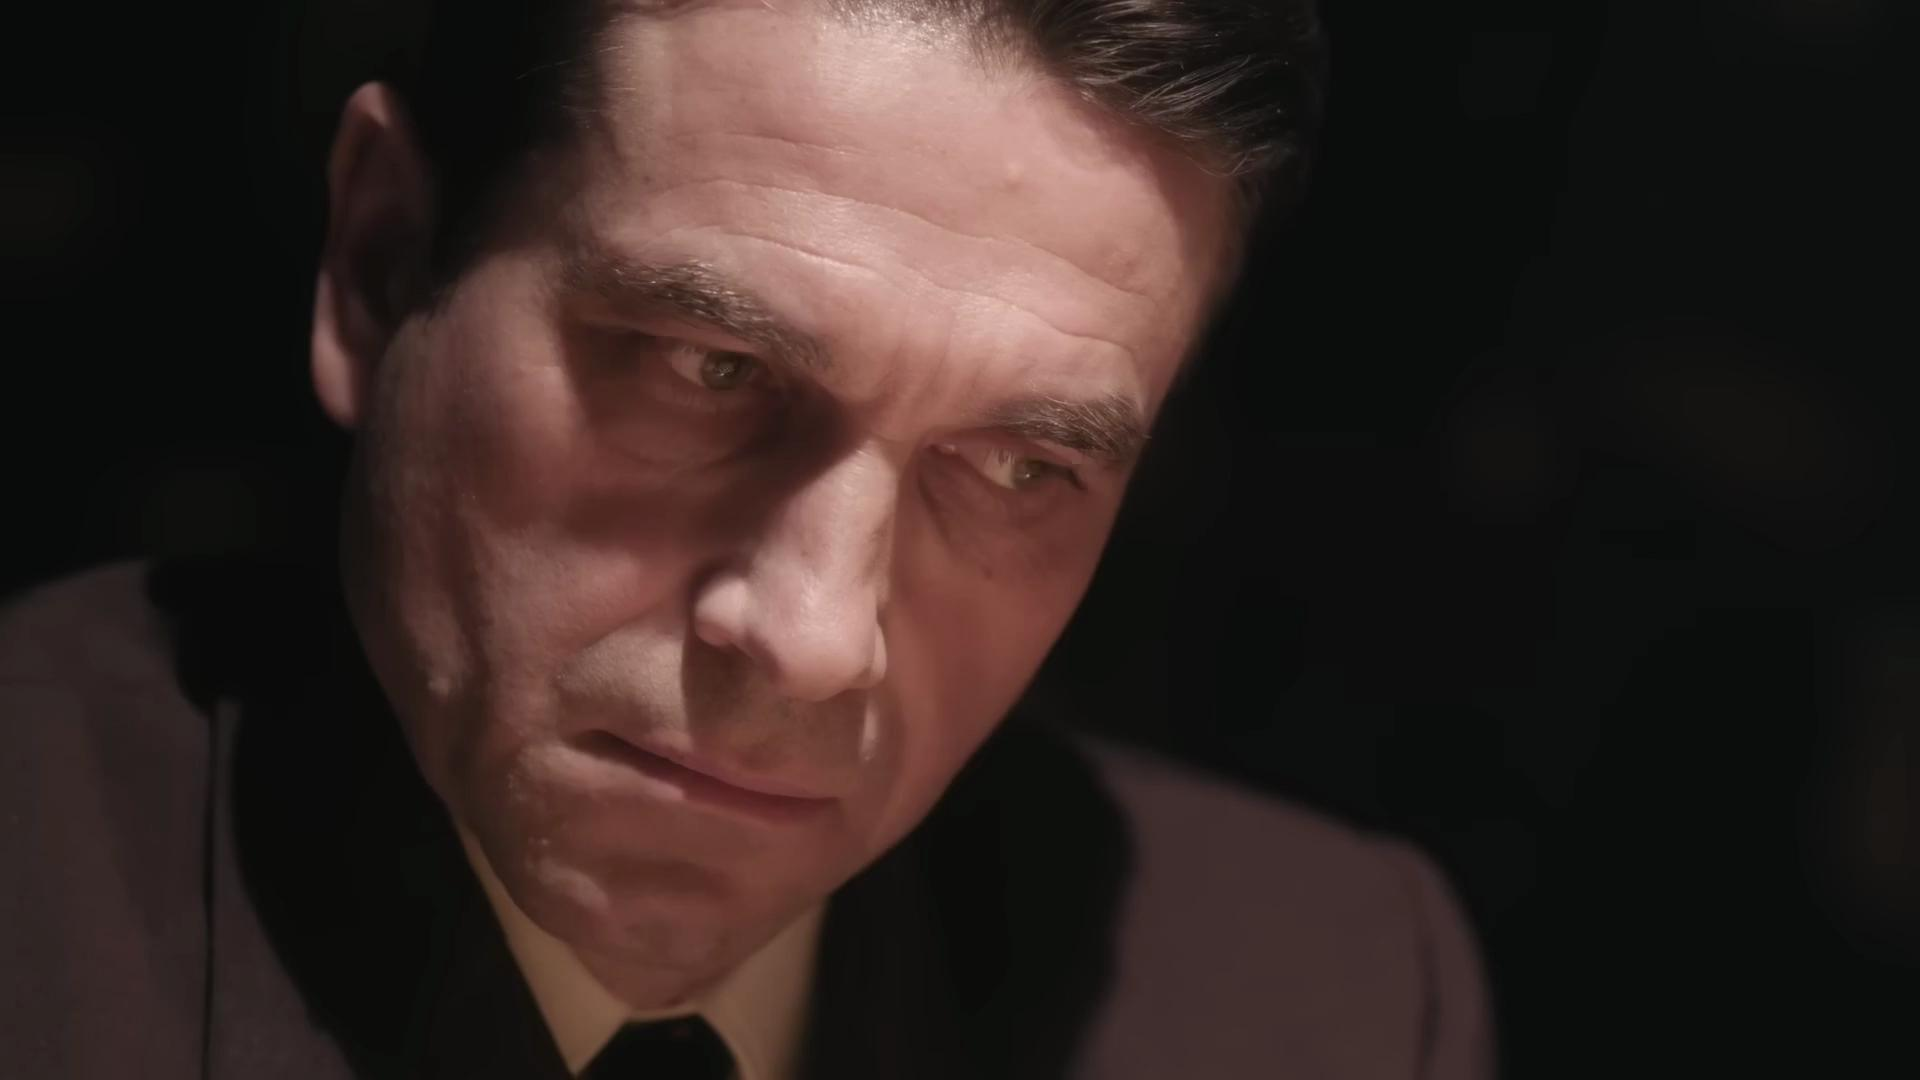
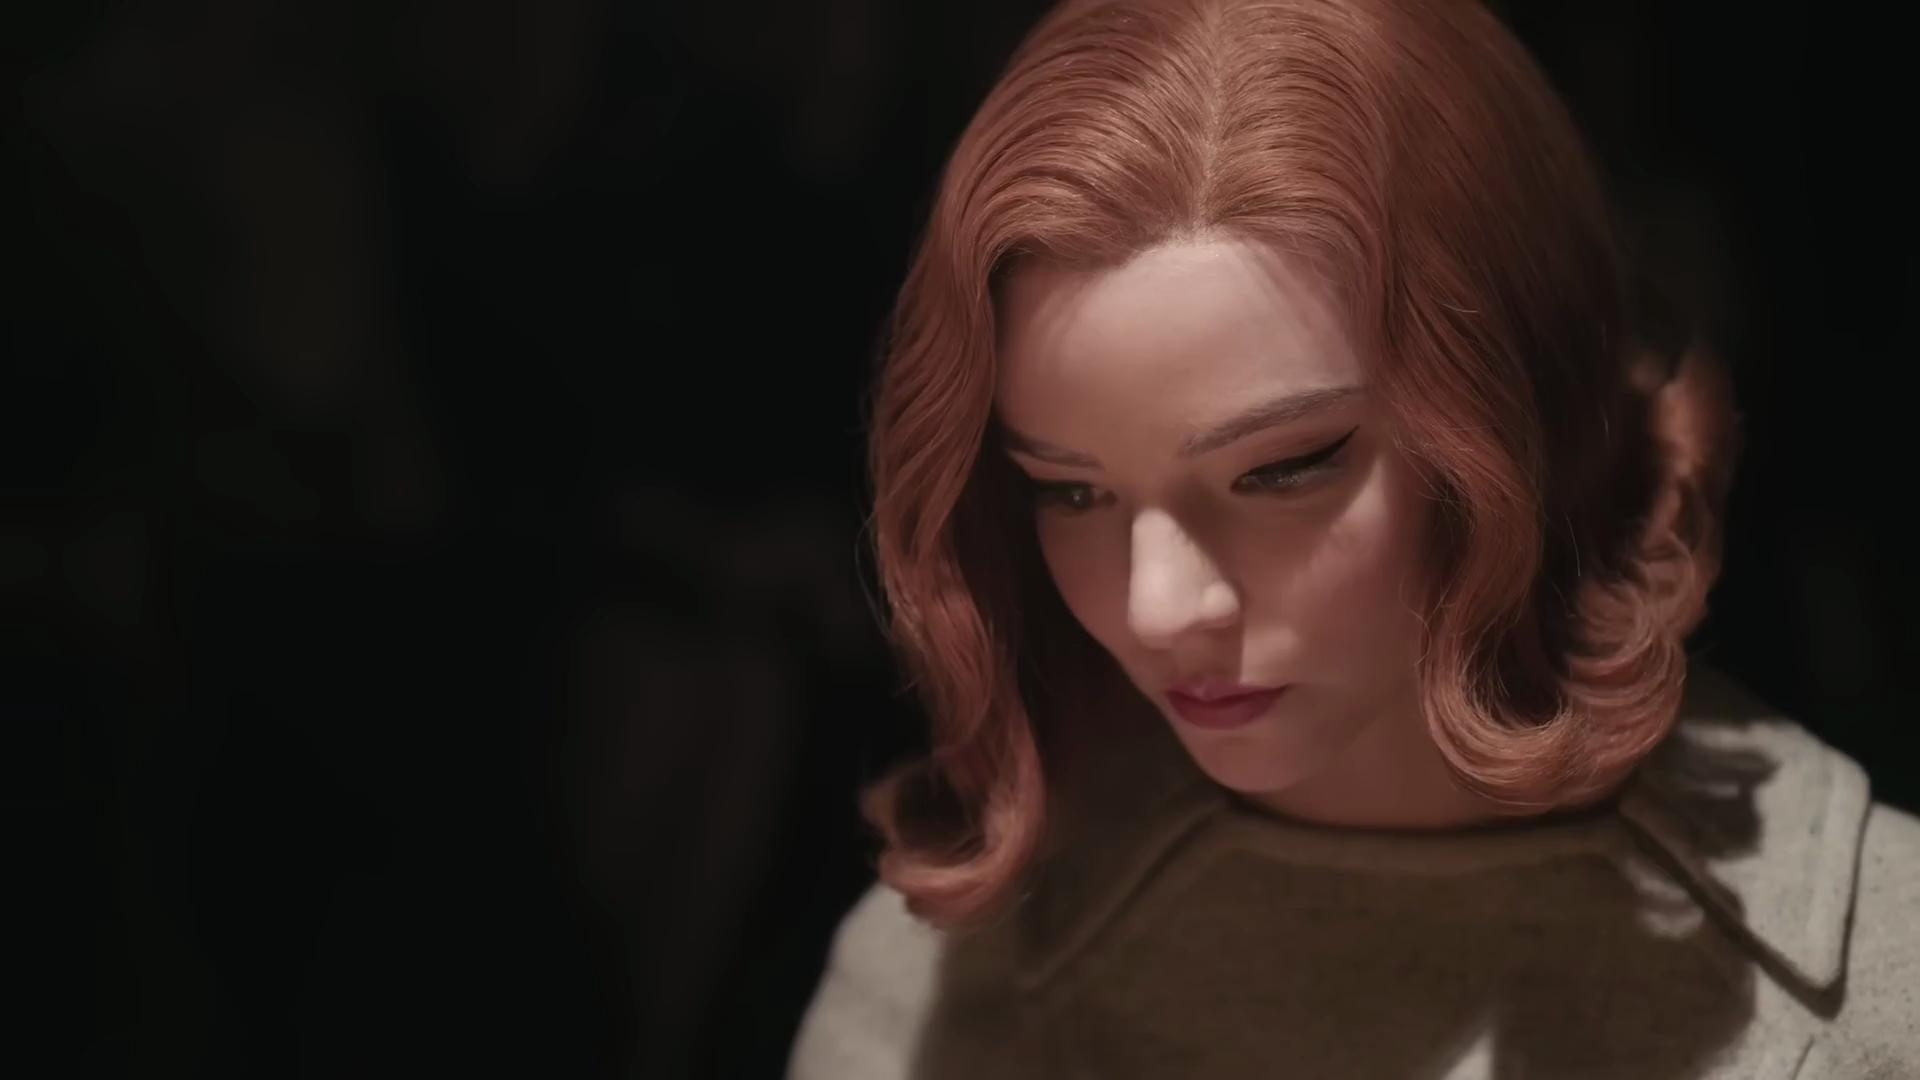
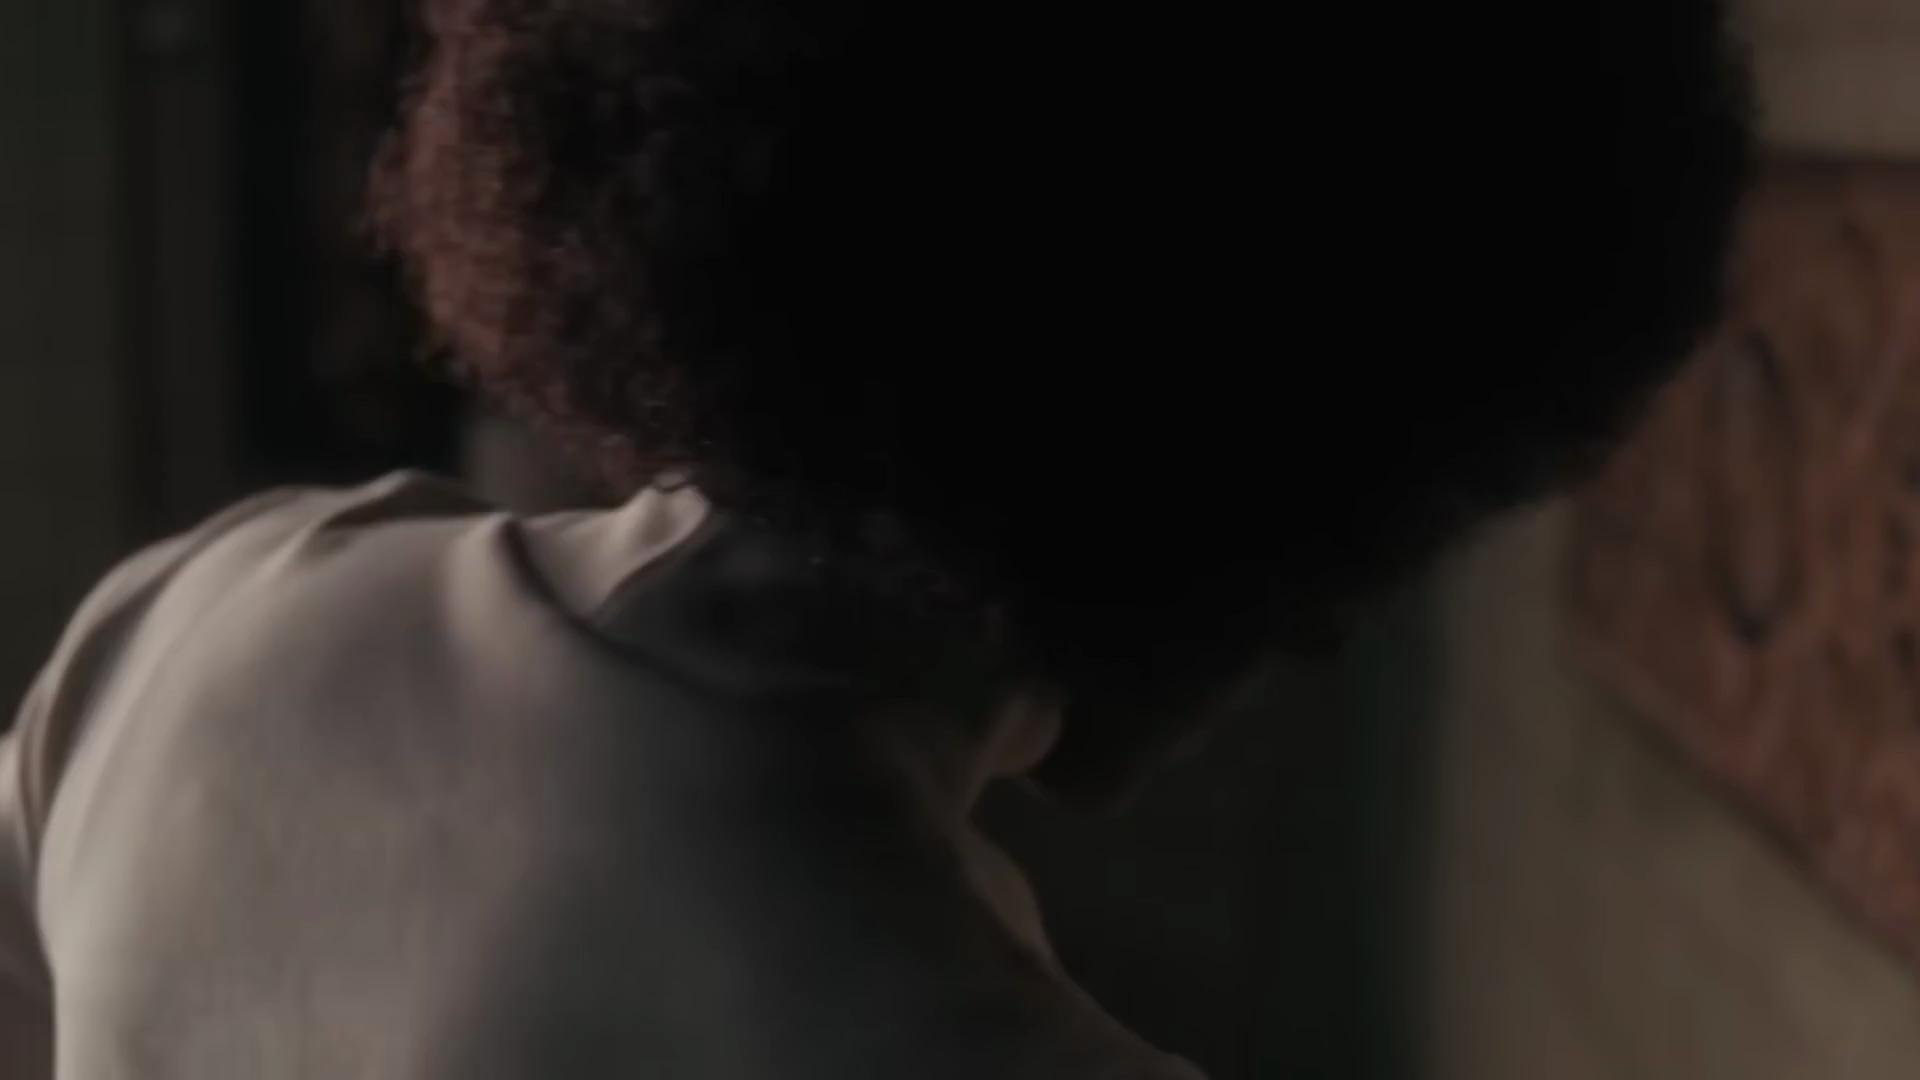
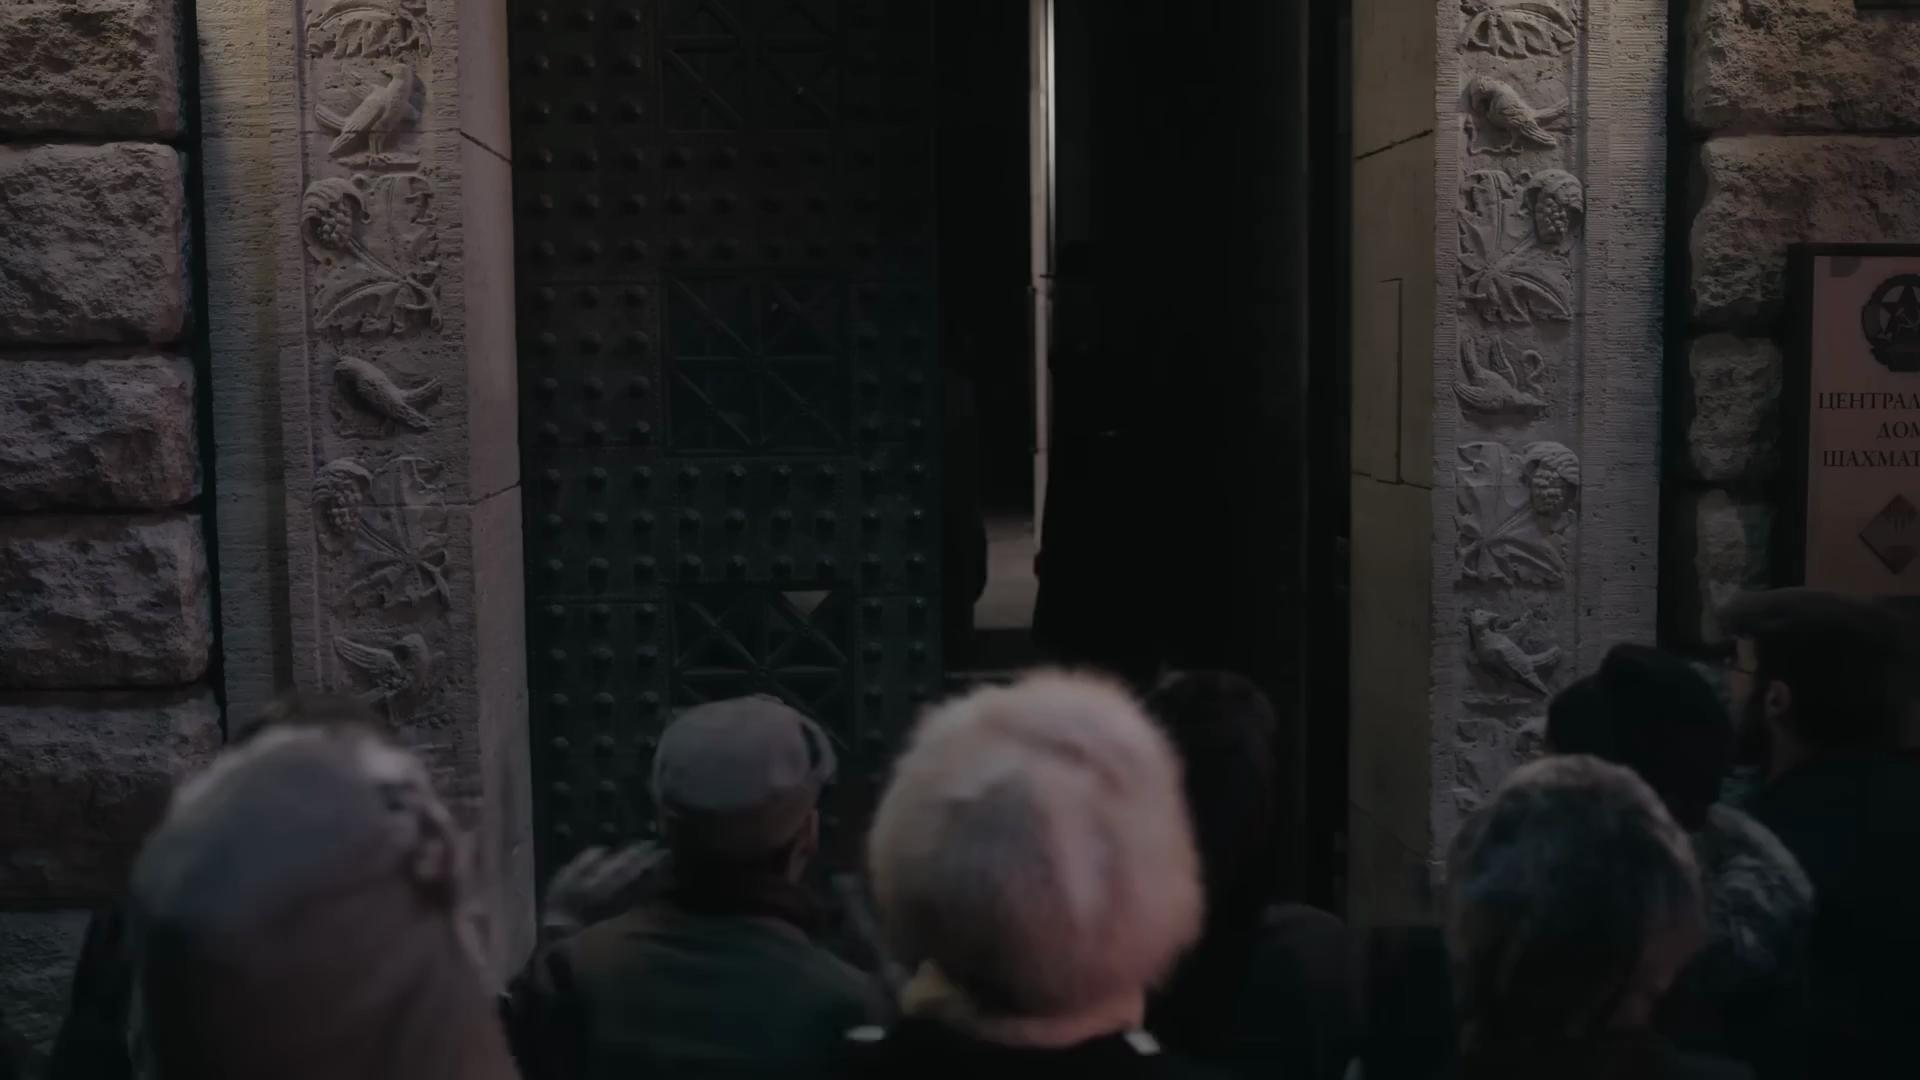
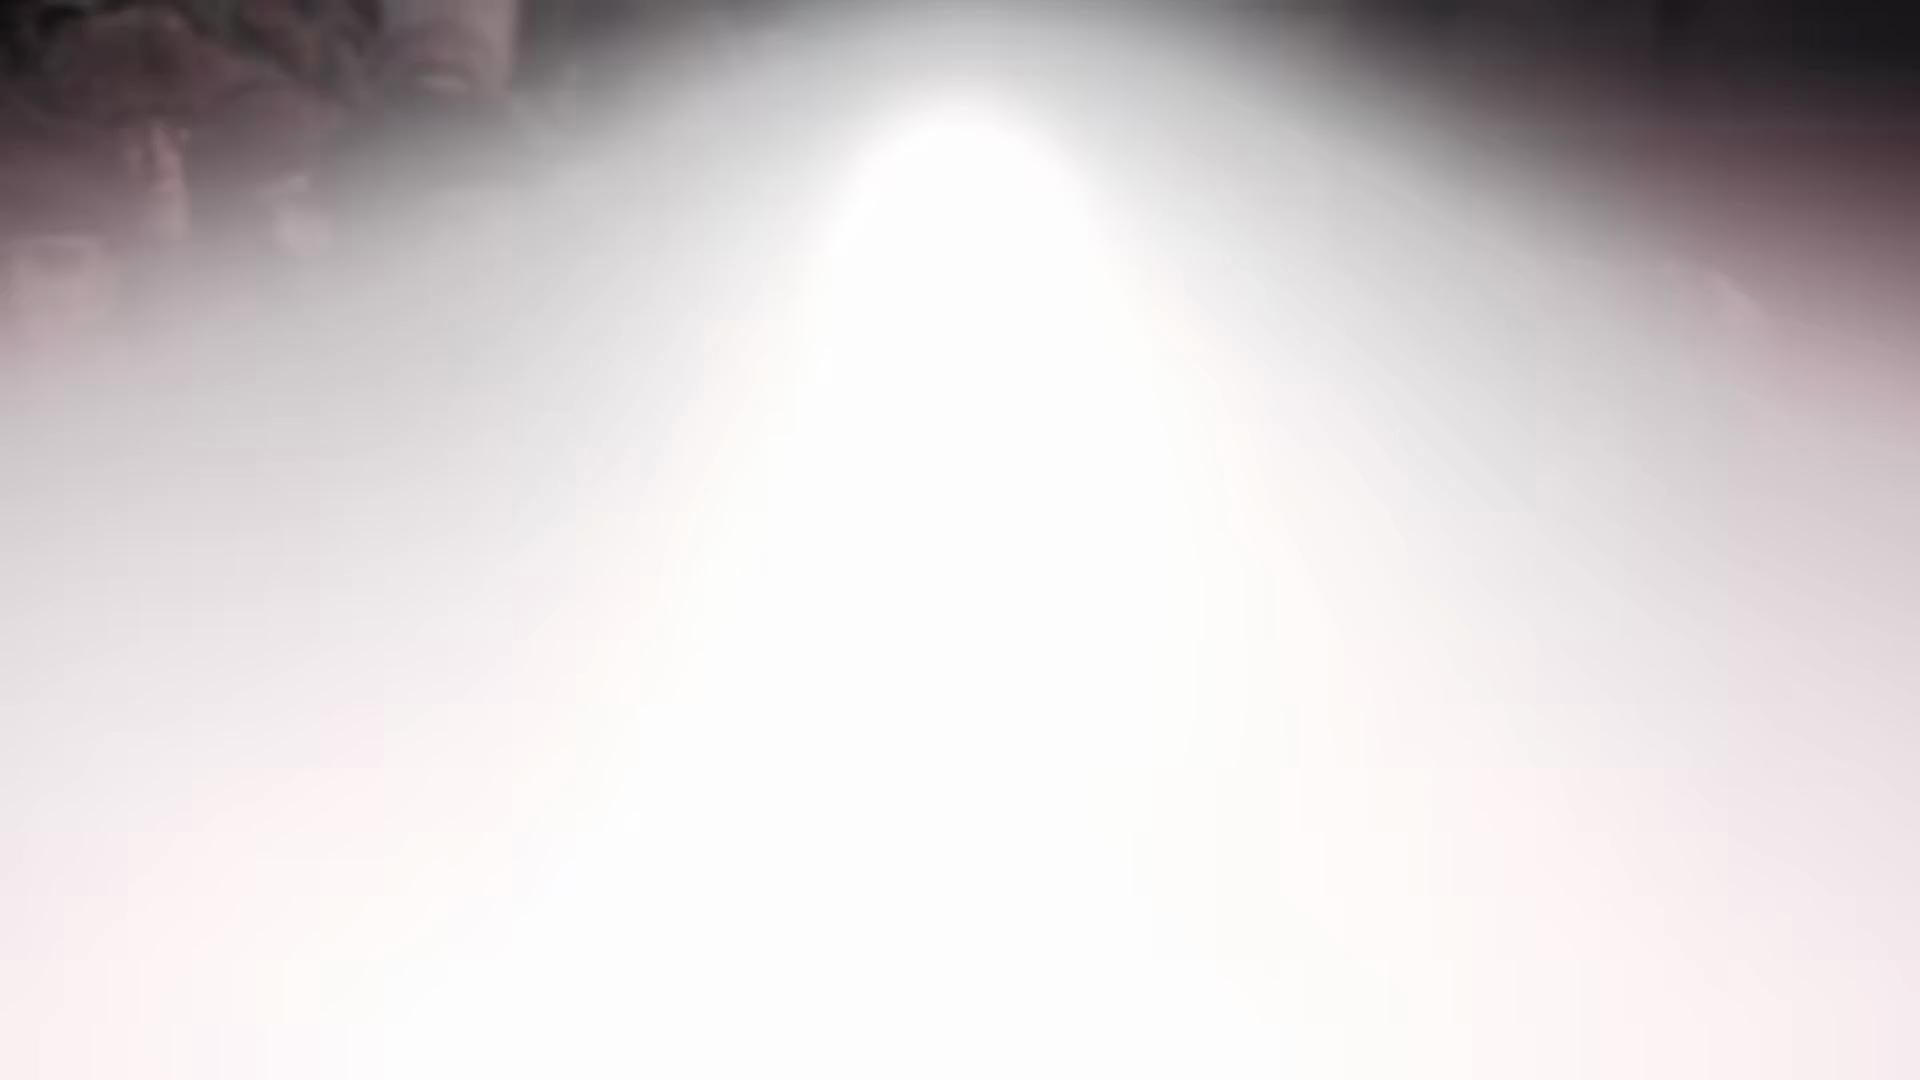
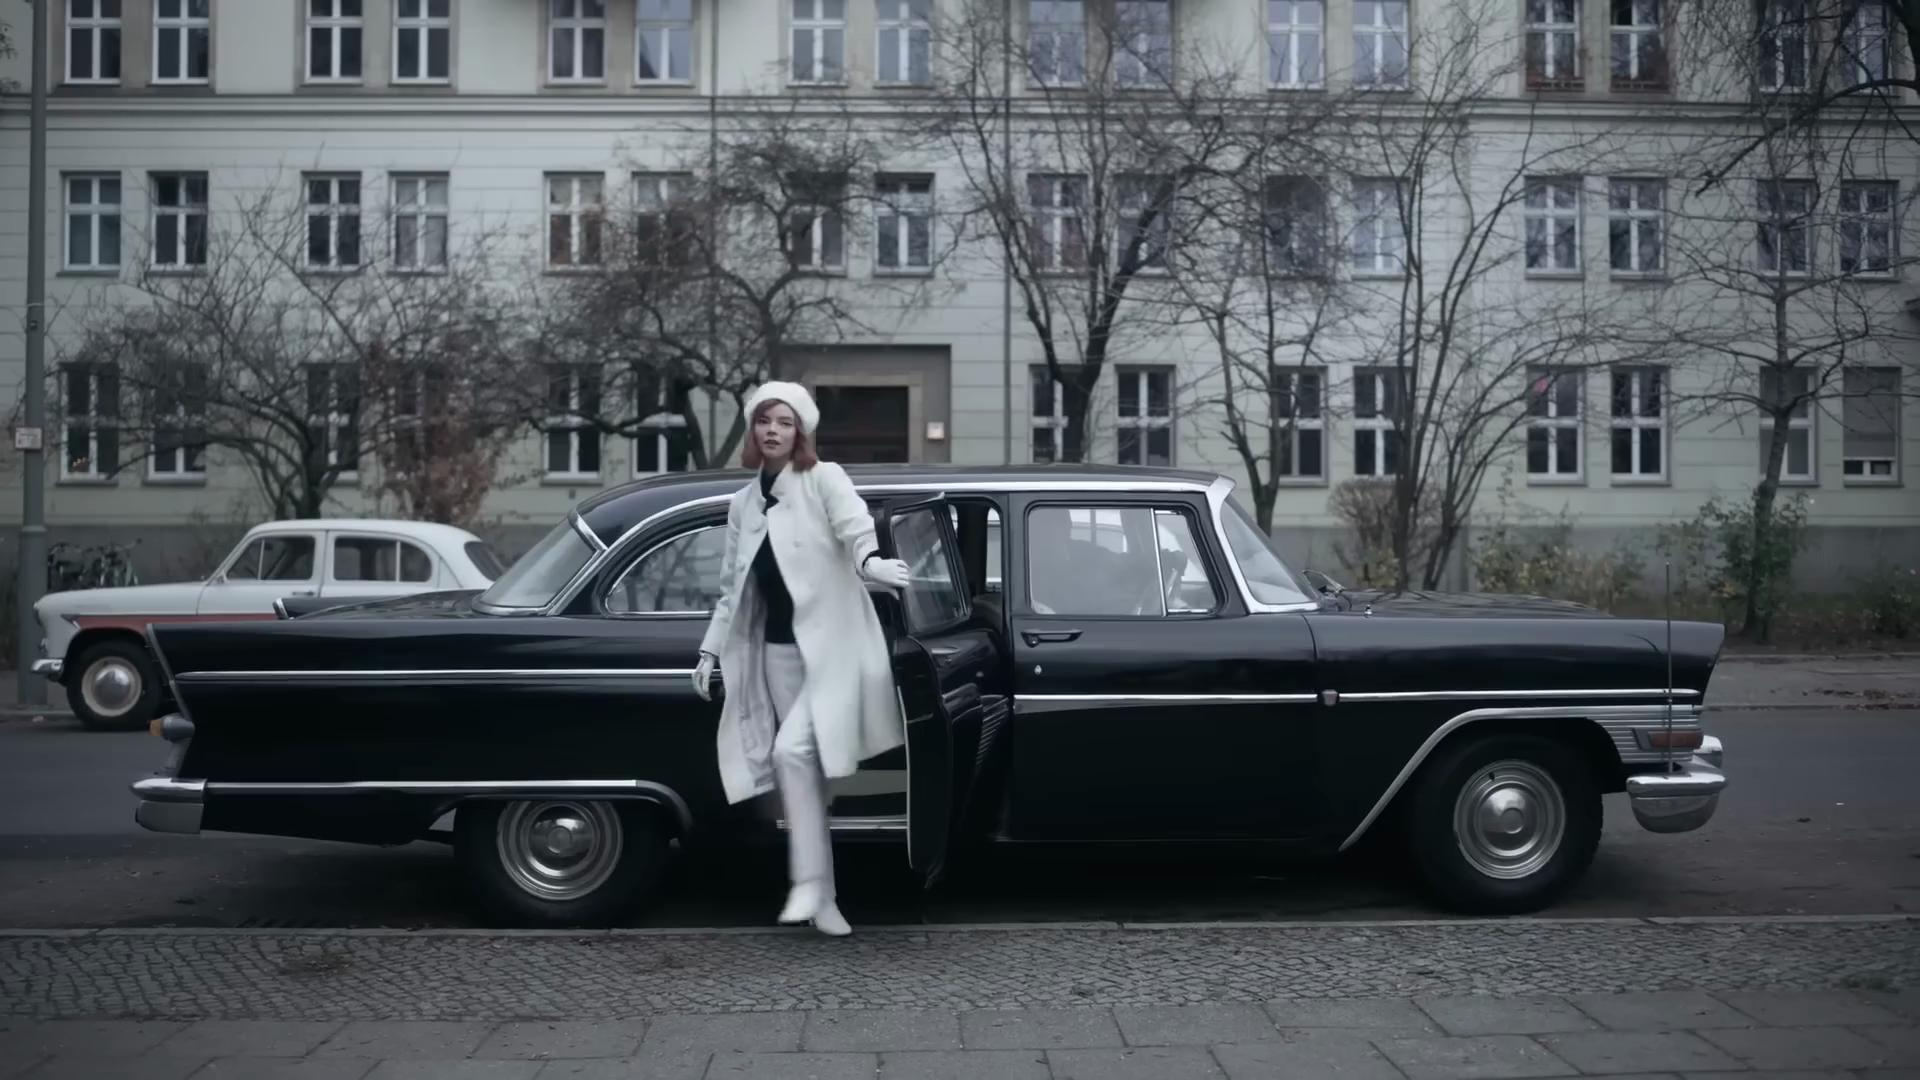
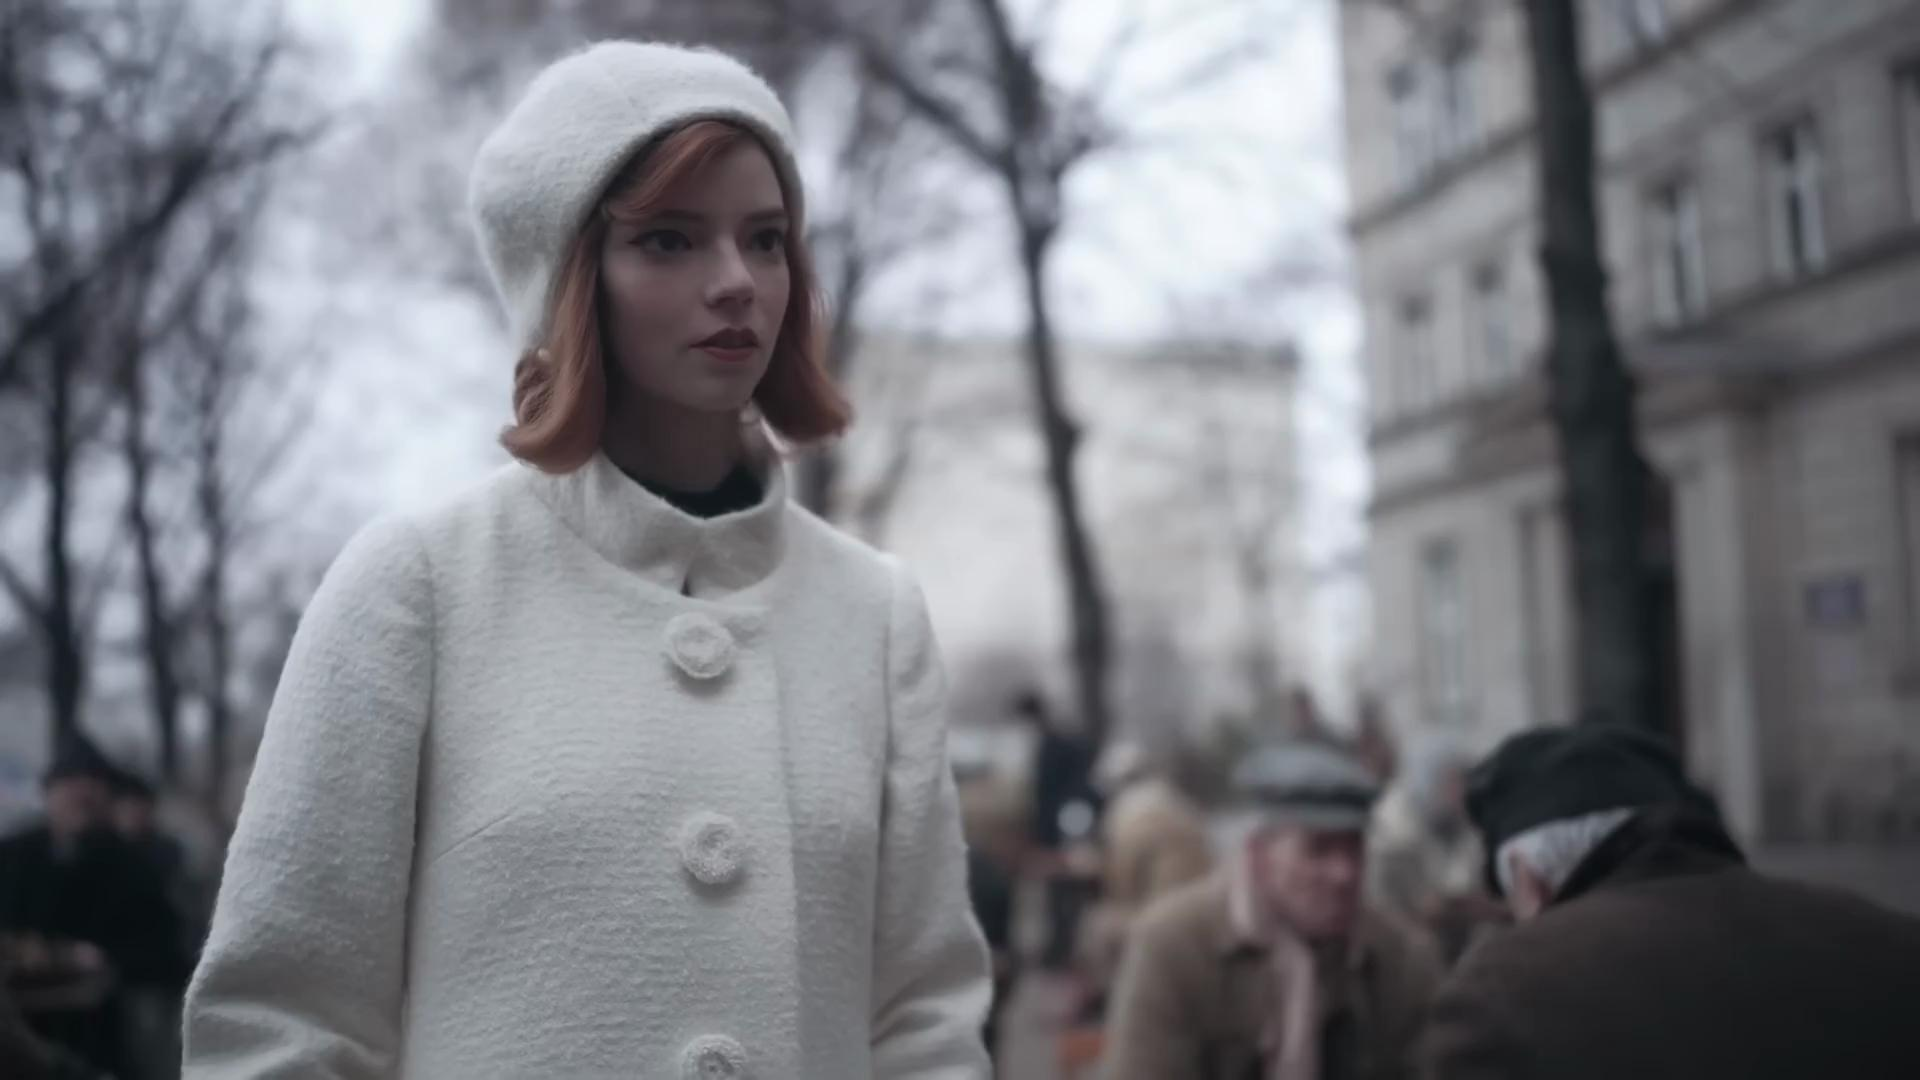
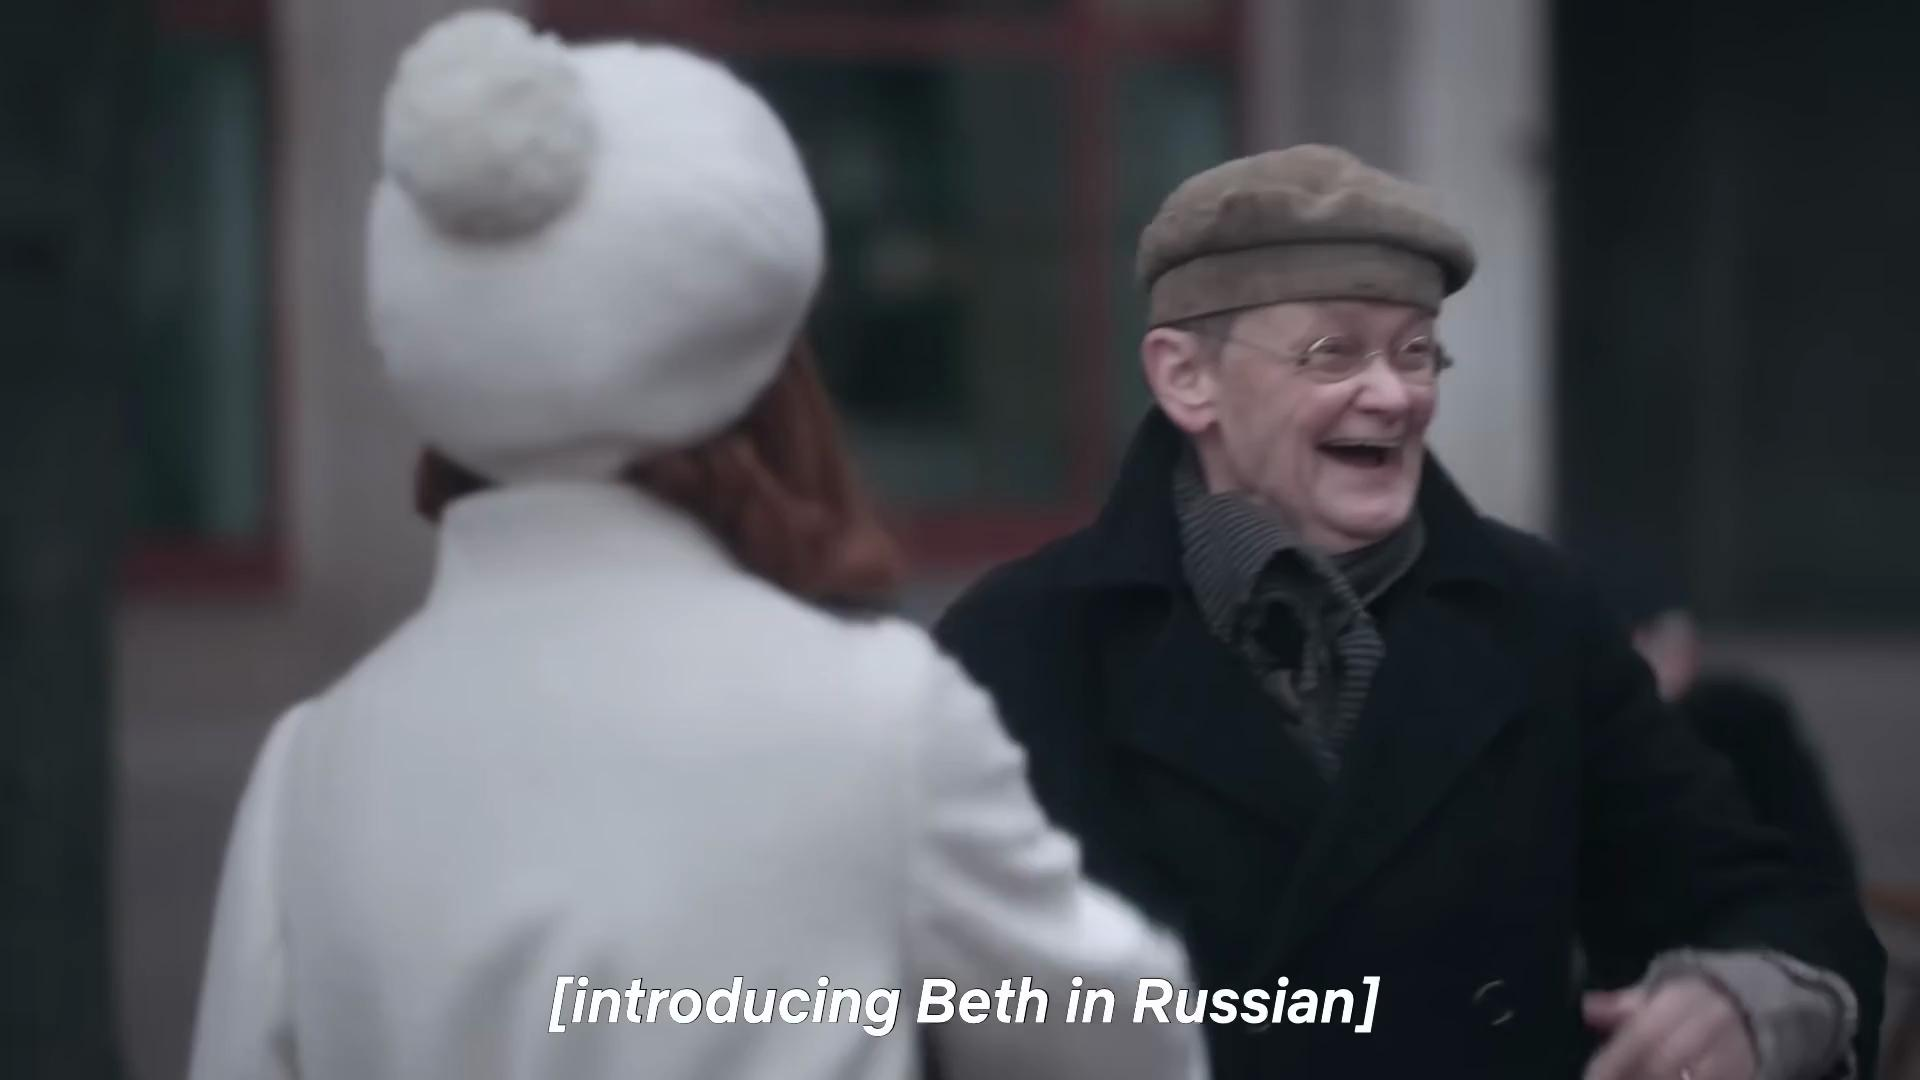
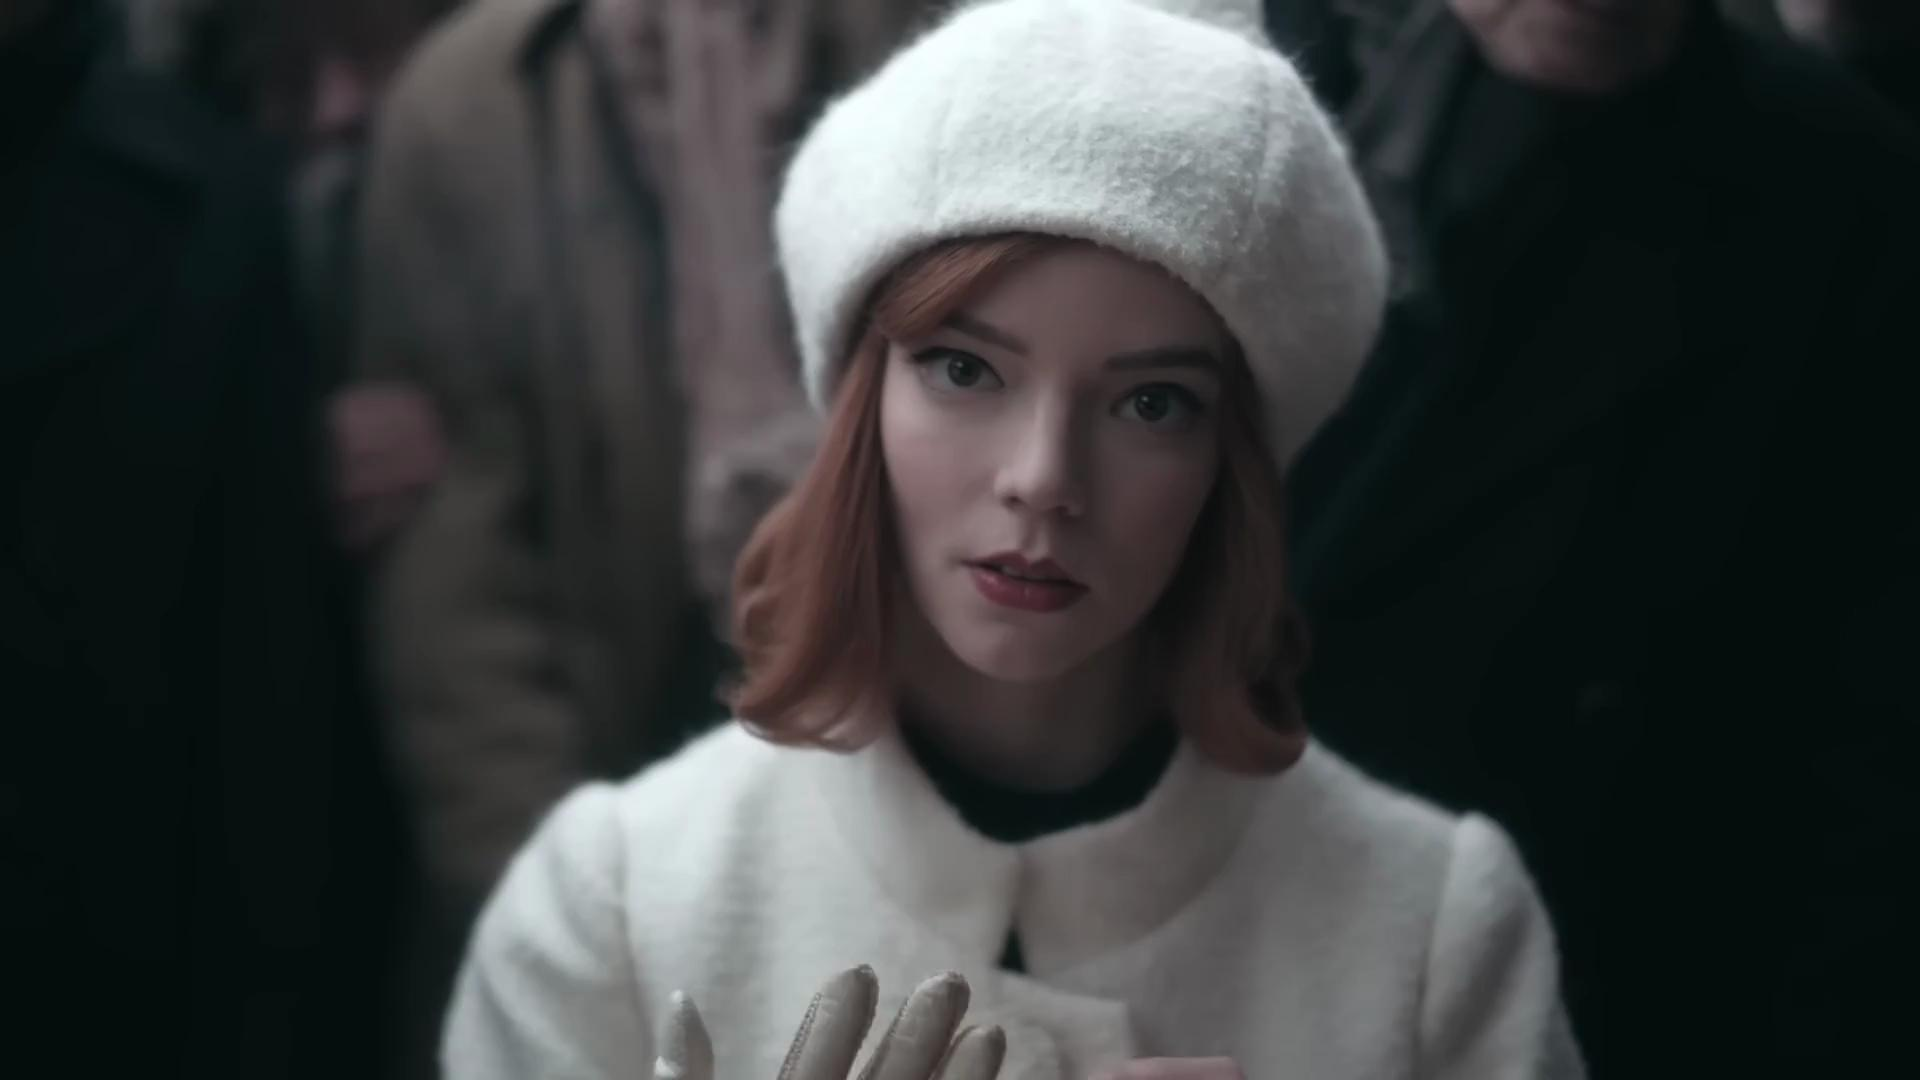

In [38]:
scenes.select(scenes.pos, scenes.video_segment, scenes.transcript_text, scenes.transcript_lang).tail()

#### Split transcripts by sentence

Before we can search for scenes, we need to split our transcripts into sentences and create embeddings for both the text and corresponding video frames. This enables multimodal semantic search.

In [39]:
# Create a view that splits transcripts into sentences using StringSplitter
scenes_sent = pxt.create_view(
    'scenes_by_sentence_view',
    scenes,
    iterator=pxt.iterators.string.StringSplitter.create(
        text=scenes.transcript_text,
        separators='sentence'
    ),
    if_exists='replace'
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.1 MB/s  0:00:00eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Inserting rows into `scenes_by_sentence_view`: 39 rows [00:00, 12633.45 rows/s]


The new column that stores each sentence is named `text`:

In [40]:
scenes_sent

view 'scenes_by_sentence_view' (of 'hist_scene_view', 'chess_vids')

        Column Name              Type                                      Computed With
                pos     Required[Int]                                                   
               text  Required[String]                                                   
      segment_start             Float                                                   
  segment_start_pts               Int                                                   
        segment_end             Float                                                   
    segment_end_pts               Int                                                   
      video_segment   Required[Video]                                                   
              audio   Required[Audio]                      video_segment.extract_audio()
      transcription    Required[Json]                    transcribe(audio, model='base')
    transcript_text              Json                                 transcription.text
    transcript_lang              Json                             transcription.language
              video             Video                                                   
           duration             Float                               video.get_duration()
             scenes              Json                 video.scene_detect_content(fps=10)
        scenes_hist              Json  video.scene_detect_histogram(fps=10,\n    thre...

In [41]:
scenes_sent.count()

39

In [42]:
scenes_sent.select(scenes_sent.transcript_text, scenes_sent.text).tail()

transcript_text  \
0                           Da. Harebet transmission   
1   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
2   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
3   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
4   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
5   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
6   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
7   J mini aussi, nous! Non, J mini ! Tiens, Tiel...   
8      ПТОМАЛЬНАЯ МУЗЫКА Согр ions. ТРЕВОЖНАЯ МУЗЫКА   
9      ПТОМАЛЬНАЯ МУЗЫКА Согр ions. ТРЕВОЖНАЯ МУЗЫКА   

                            text  
0           Harebet transmission  
1                                 
2            J mini aussi, nous!  
3                  Non, J mini !  
4    Tiens, Tiel, Tiens, Tiens !  
5                           Ah !  
6              Mais Ram, eaten !  
7  Hé, Me Musik... Enfaouh ! ...  
8   ПТОМАЛЬНАЯ МУЗЫКА Согр ions.  
9               ТРЕВОЖНАЯ МУЗЫКА

In [43]:
from pixeltable.functions.huggingface import sentence_transformer

scenes_sent.add_embedding_index(
    scenes_sent.text,
    embedding=sentence_transformer.using(model_id='sentence-transformers/all-mpnet-base-v2')
)

We now have an index attached to our table, which is represented in our Pixeltable schema.

In [44]:
scenes_sent

view 'scenes_by_sentence_view' (of 'hist_scene_view', 'chess_vids')

        Column Name              Type                                      Computed With
                pos     Required[Int]                                                   
               text  Required[String]                                                   
      segment_start             Float                                                   
  segment_start_pts               Int                                                   
        segment_end             Float                                                   
    segment_end_pts               Int                                                   
      video_segment   Required[Video]                                                   
              audio   Required[Audio]                      video_segment.extract_audio()
      transcription    Required[Json]                    transcribe(audio, model='base')
    transcript_text              Json                                 transcription.text
    transcript_lang              Json                             transcription.language
              video             Video                                                   
           duration             Float                               video.get_duration()
             scenes              Json                 video.scene_detect_content(fps=10)
        scenes_hist              Json  video.scene_detect_histogram(fps=10,\n    thre...

 Index Name Column  Metric                                          Embedding
       idx0   text  cosine  sentence_transformer(text, model_id='sentence-...

text  pos  \
0   The President has invited you to the White Ho...    0   
1   I'm going to have to go back to the White House.    5   
2   I'm going to have to go back to the White House.    6   
3   I'm going to have to go back to the White House.    7   
4  A lot of prominent visitors belong, so I'm goi...    4   

                                       video_segment  similarity  
0  /Users/alison-pxt/.pixeltable/media/c4b809b944...    0.564761  
1  /Users/alison-pxt/.pixeltable/media/c4b809b944...    0.539370  
2  /Users/alison-pxt/.pixeltable/media/c4b809b944...    0.539370  
3  /Users/alison-pxt/.pixeltable/media/c4b809b944...    0.539370  
4  /Users/alison-pxt/.pixeltable/media/c4b809b944...    0.522479
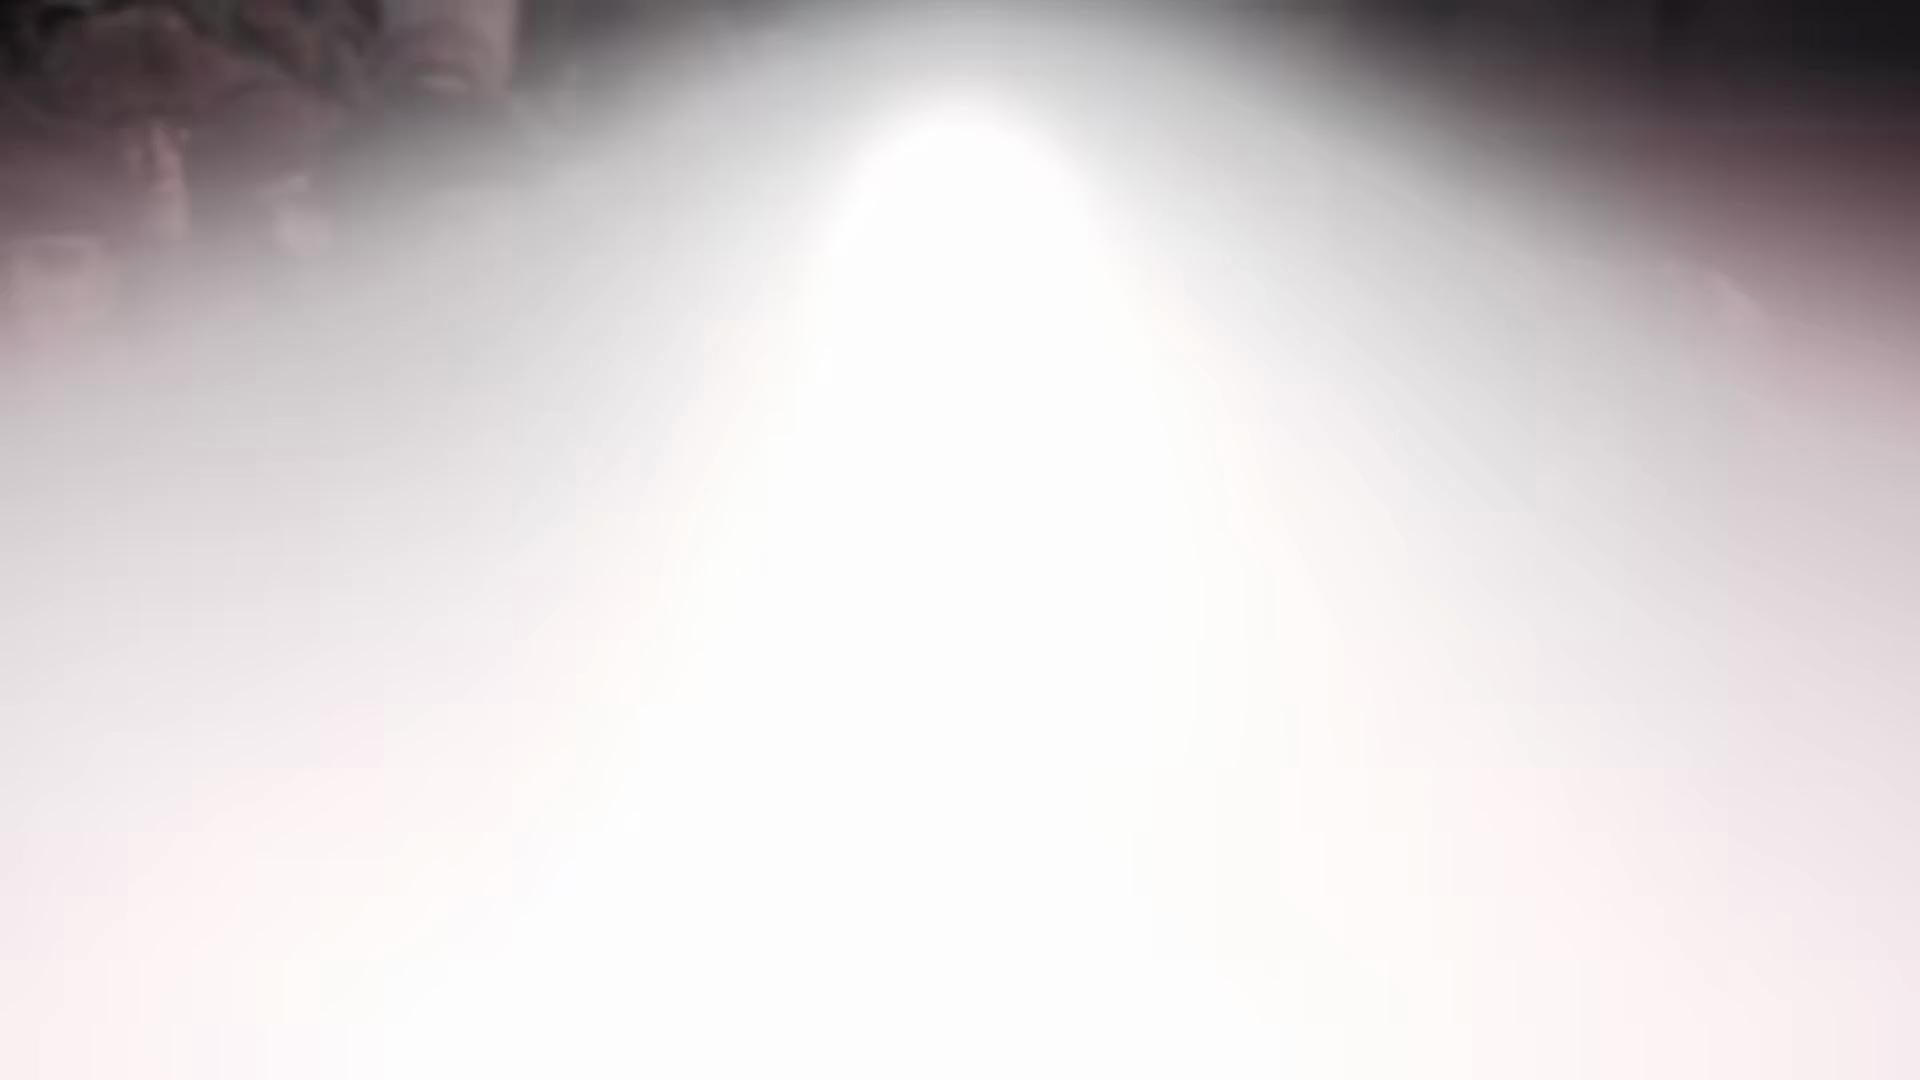
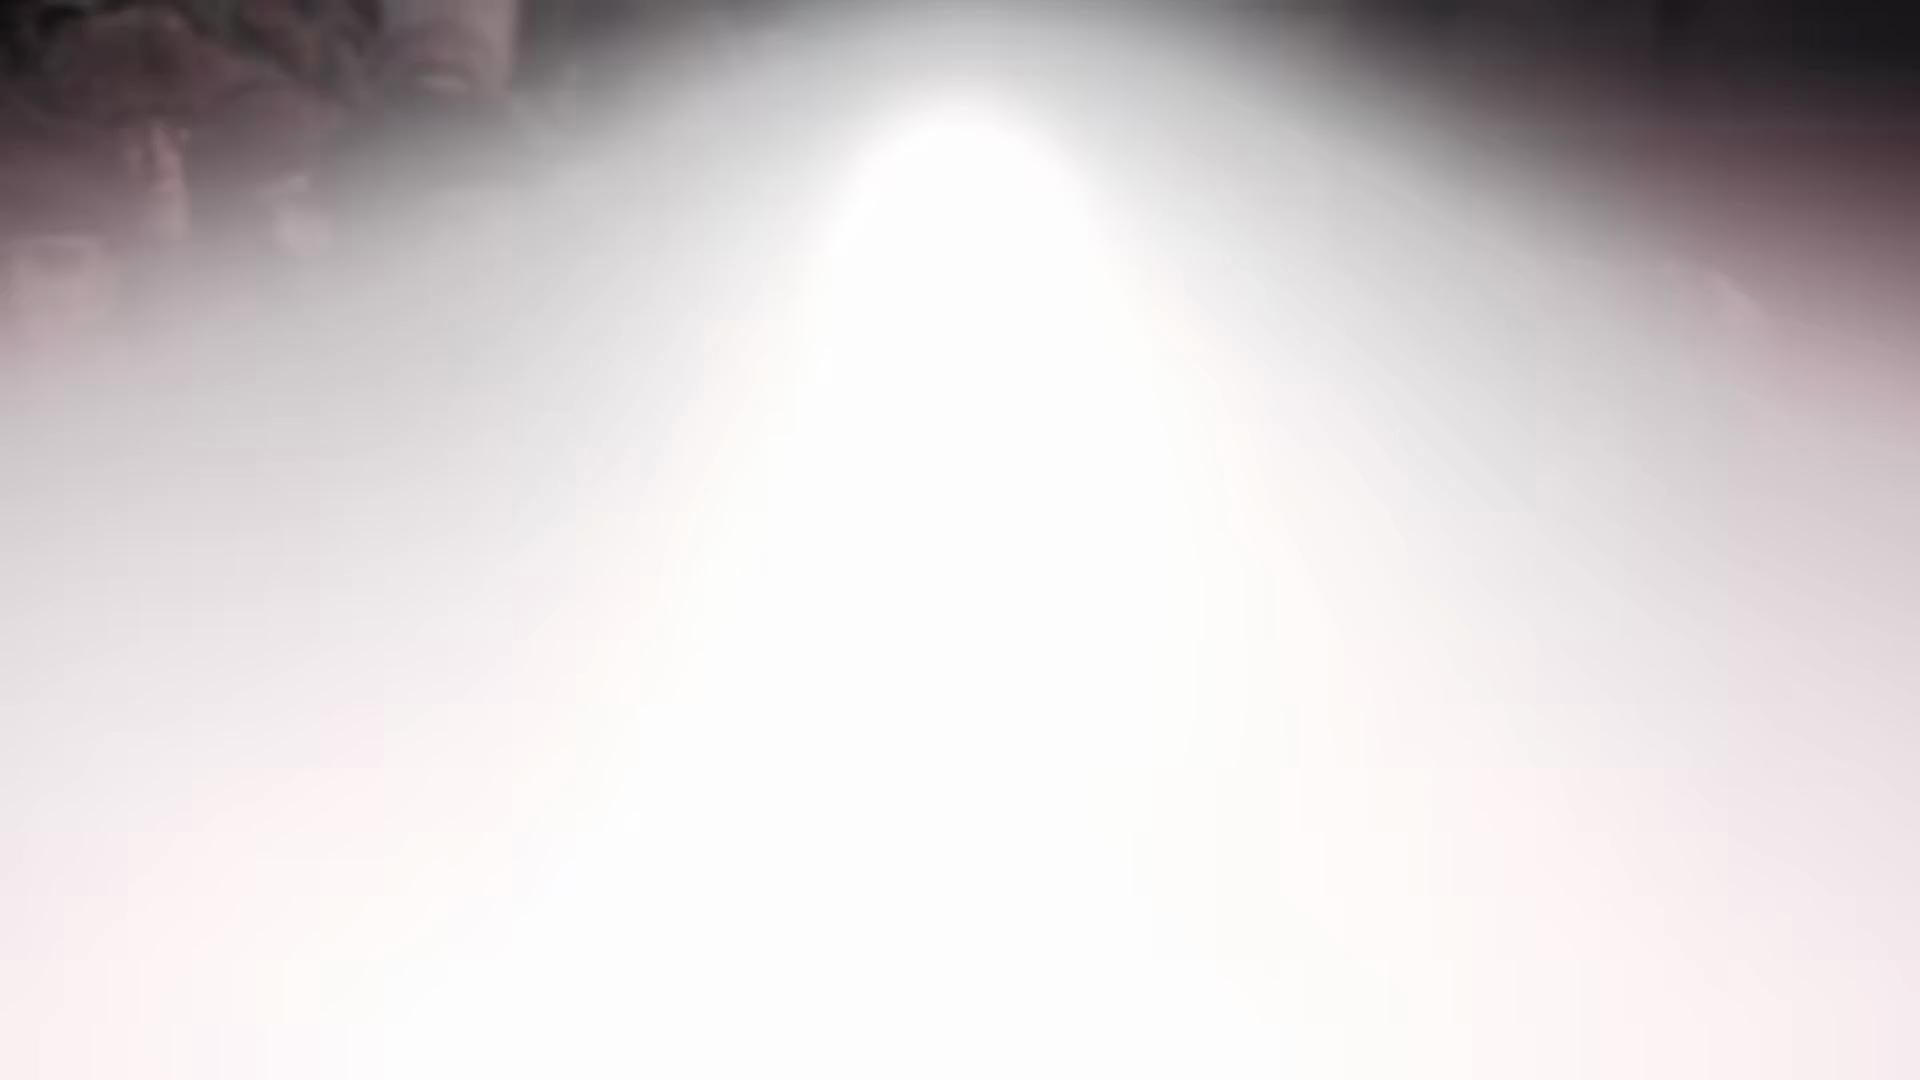
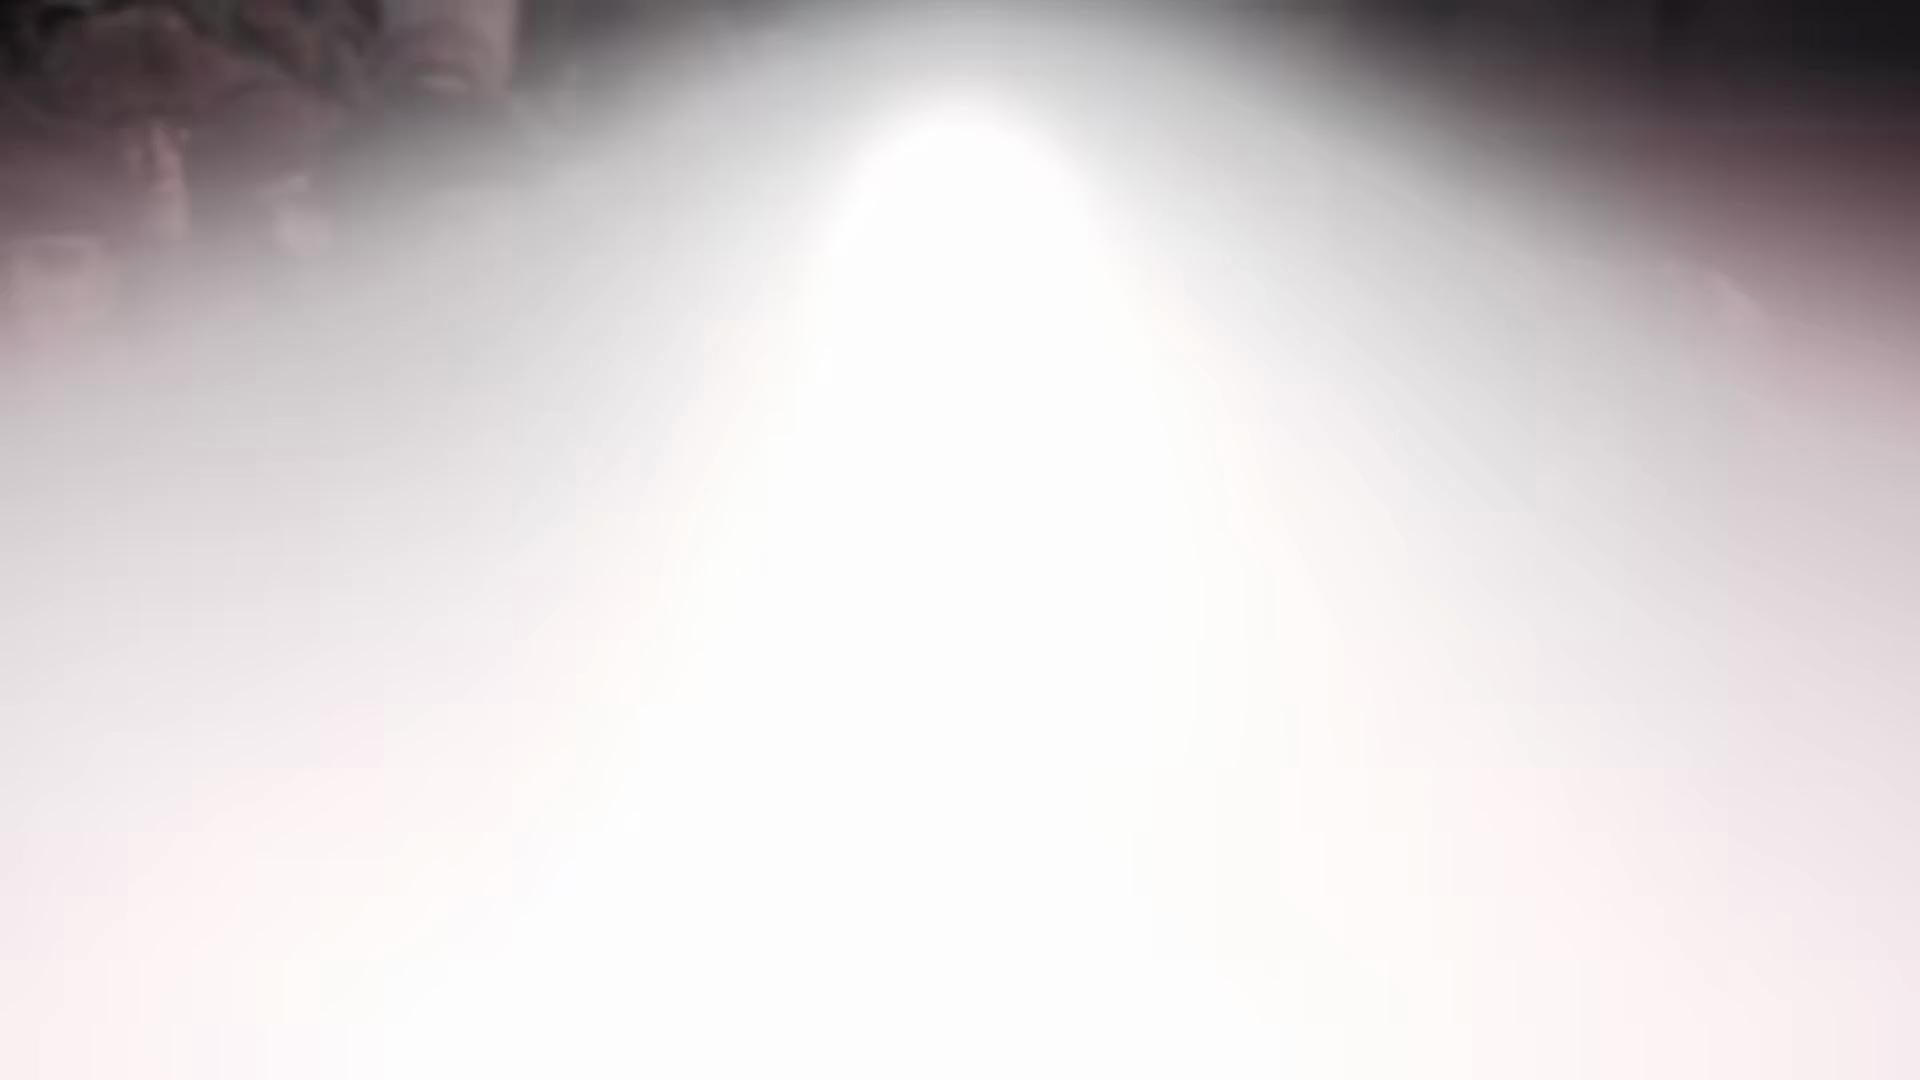
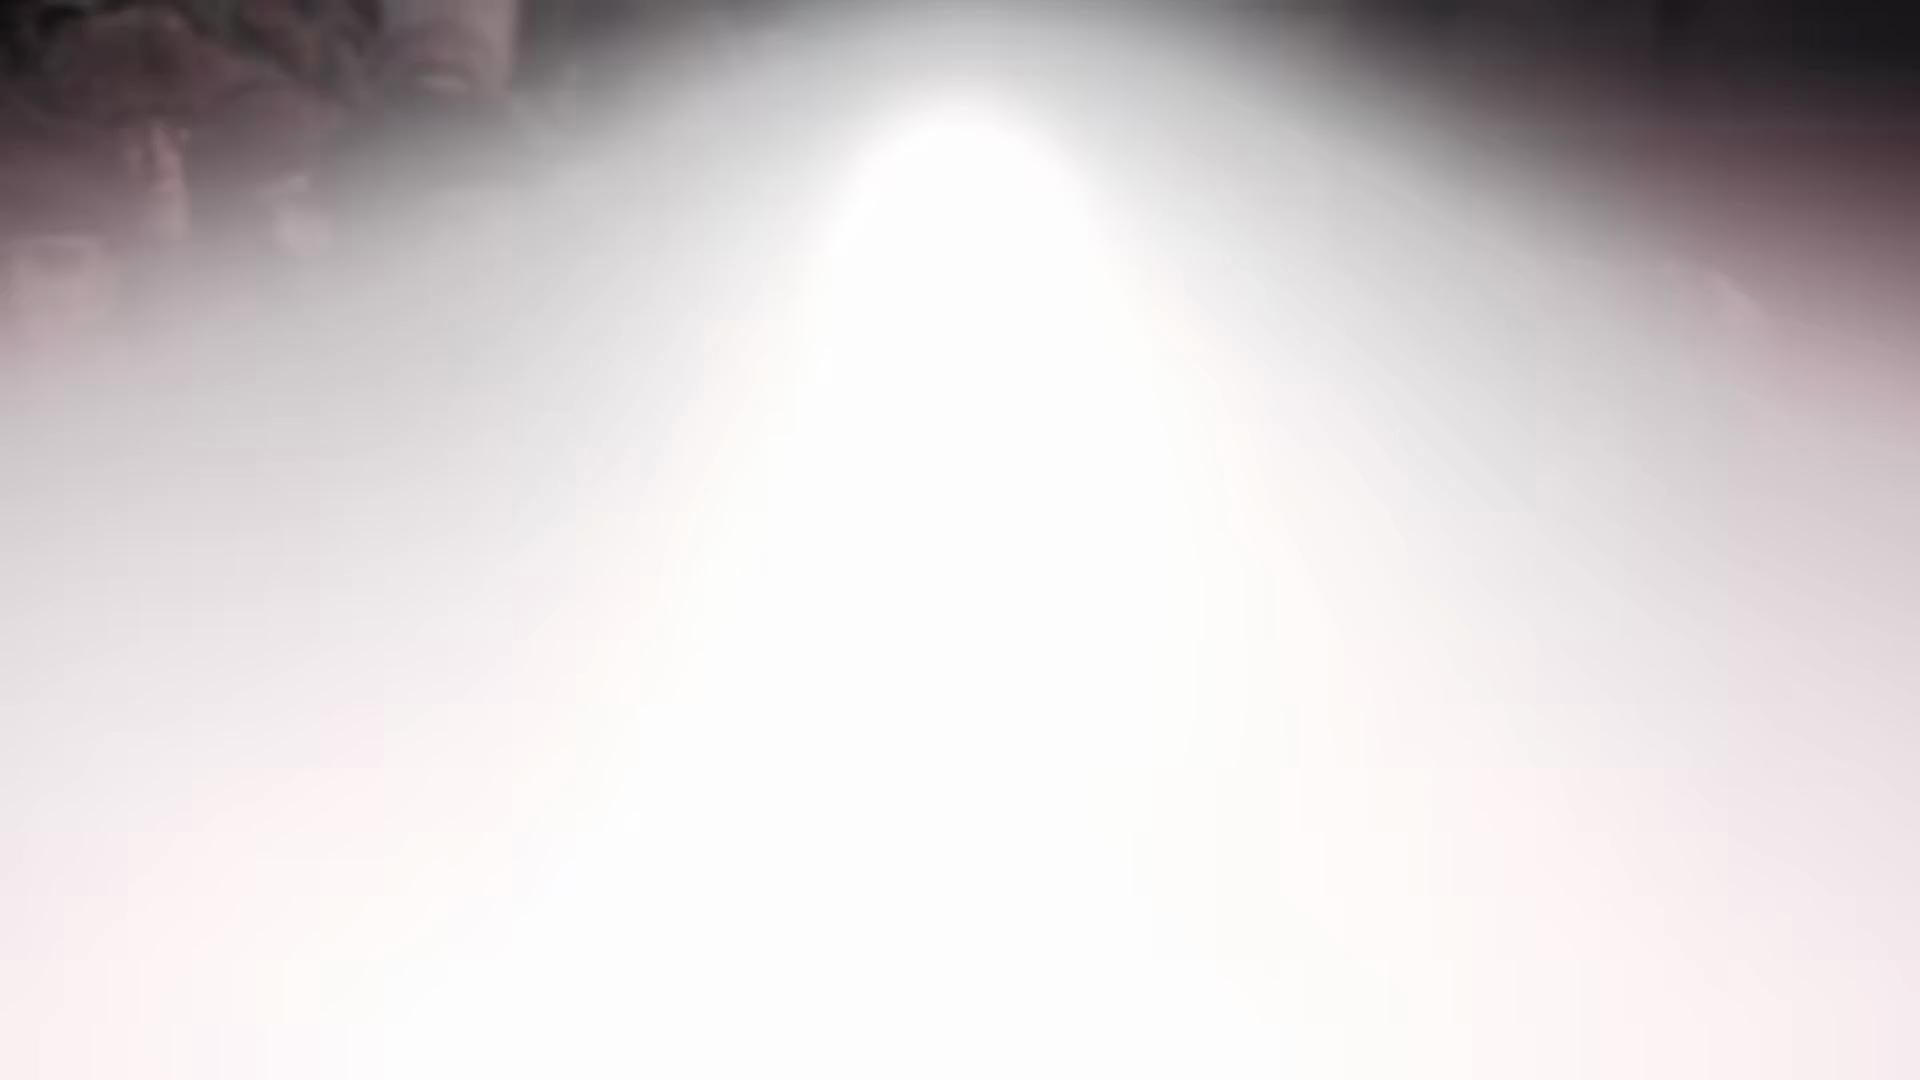
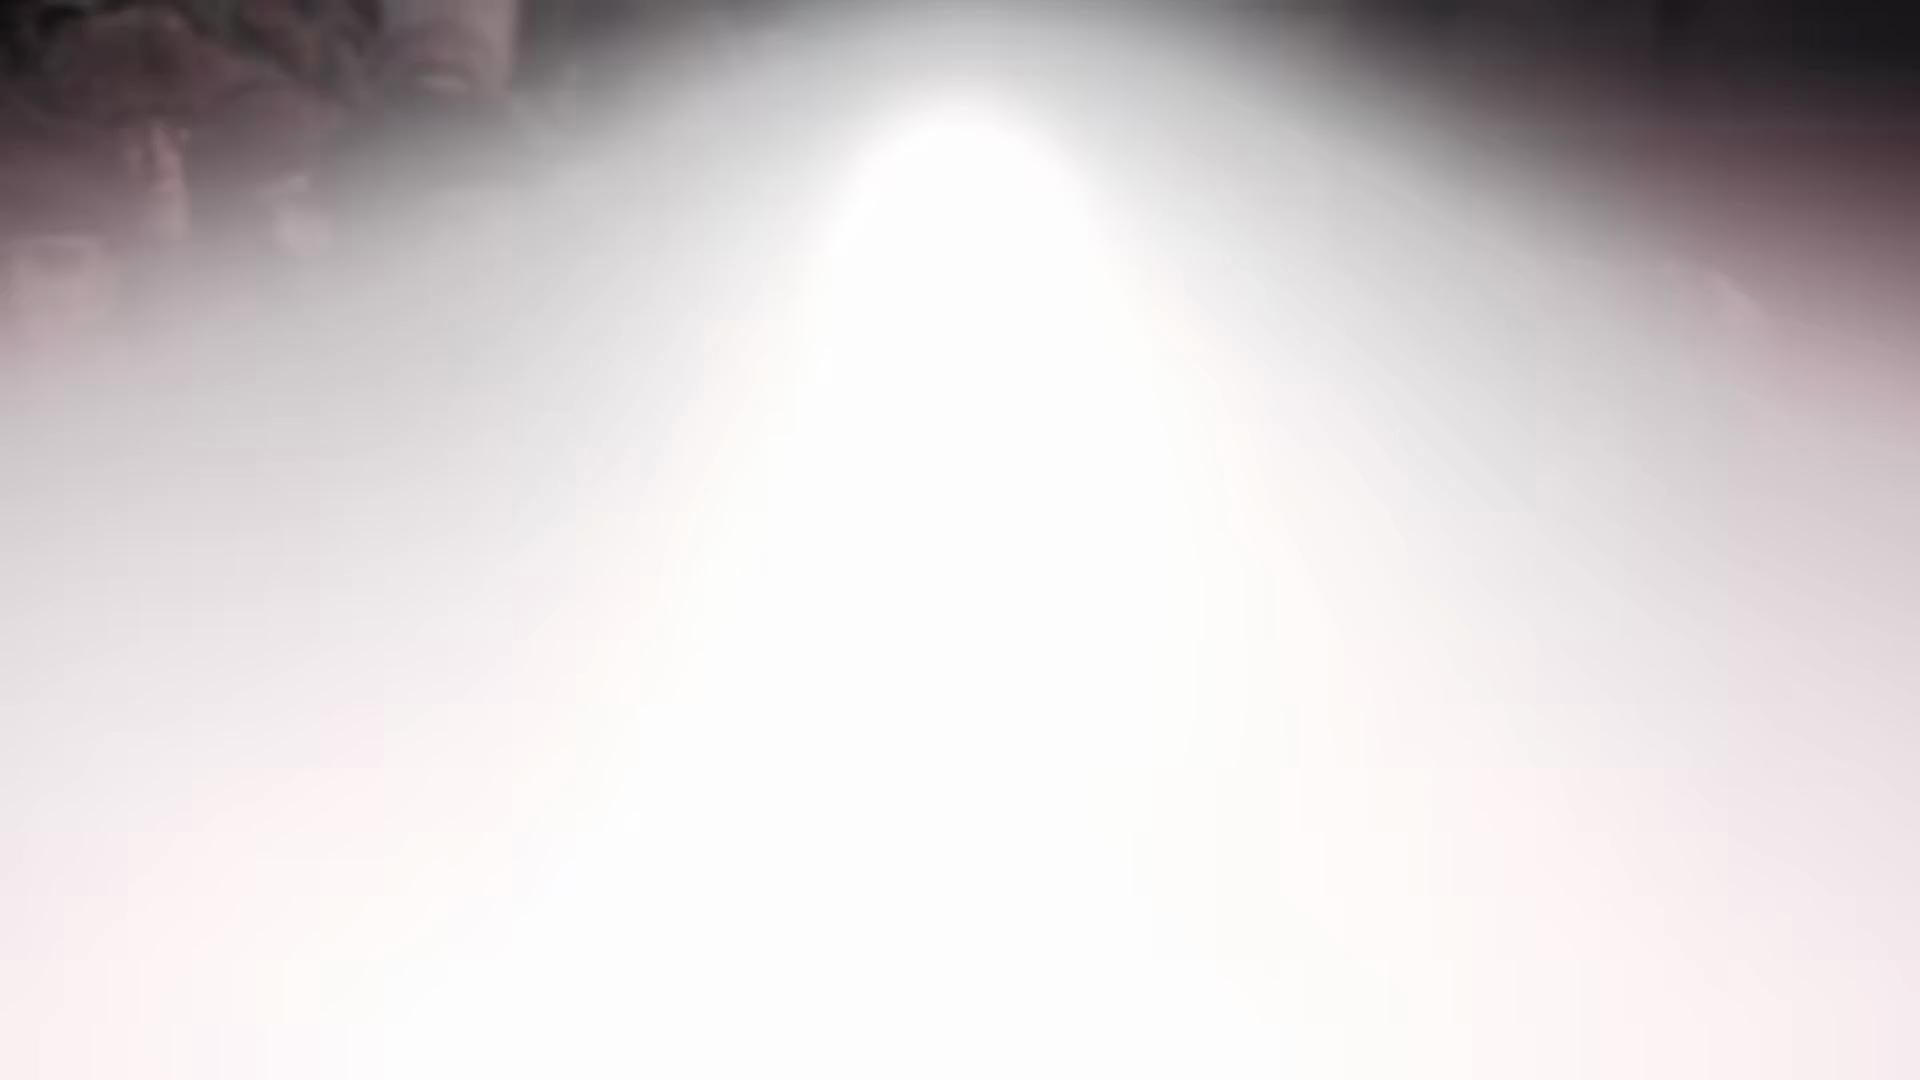

In [45]:
# Basic similarity search
# Search for sentences similar to a query string
query_text = "white house"
sim = scenes_sent.text.similarity(query_text)

results = (
    scenes_sent.where(sim >= 0.3)  # Minimum similarity threshold
    .order_by(sim, asc=False)  # Order by similarity (highest first)
    .select(scenes_sent.text, scenes_sent.pos, scenes_sent.video_segment, similarity=sim)
    .limit(5)
    .collect()
)
results

### 05 - Embeddings & retrieval

🖇️ Links to docs:

- Embeddings and indices
- Parameterized queries
- Similarity search

In this section, we'll:
1. Create embeddings for our scene frames to enable semantic search
2. Add an embedding index for efficient similarity search
3. Create a reels table to generate intro/outro videos for specific scenes
4. Use a parameterized query to identify scenes by keyword search

In [46]:
# our starting schema
scenes

view 'hist_scene_view' (of 'chess_vids')

        Column Name             Type                                      Computed With
                pos    Required[Int]                                                   
      segment_start            Float                                                   
  segment_start_pts              Int                                                   
        segment_end            Float                                                   
    segment_end_pts              Int                                                   
      video_segment  Required[Video]                                                   
              audio  Required[Audio]                      video_segment.extract_audio()
      transcription   Required[Json]                    transcribe(audio, model='base')
    transcript_text             Json                                 transcription.text
    transcript_lang             Json                             transcription.language
              video            Video                                                   
           duration            Float                               video.get_duration()
             scenes             Json                 video.scene_detect_content(fps=10)
        scenes_hist             Json  video.scene_detect_histogram(fps=10,\n    thre...

#### Extract frames per scene

Let's extract the middle frame from each scene as a computed column.

In [47]:
# take the middle frame of each scene
scenes.add_computed_column(
    middle_frame=scenes.video_segment.extract_frame(timestamp=scenes.video_segment.get_duration() / 2.0),
    if_exists='replace'
)

Added 10 column values with 0 errors.


10 rows updated, 10 values computed.

In [49]:
scenes

view 'hist_scene_view' (of 'chess_vids')

        Column Name             Type                                      Computed With
                pos    Required[Int]                                                   
      segment_start            Float                                                   
  segment_start_pts              Int                                                   
        segment_end            Float                                                   
    segment_end_pts              Int                                                   
      video_segment  Required[Video]                                                   
              audio  Required[Audio]                      video_segment.extract_audio()
      transcription   Required[Json]                    transcribe(audio, model='base')
    transcript_text             Json                                 transcription.text
    transcript_lang             Json                             transcription.language
       middle_frame            Image  video_segment.extract_frame(timestamp=video_se...
   middle_timestamp            Float                 video_segment.get_duration() / 2.0
              video            Video                                                   
           duration            Float                               video.get_duration()
             scenes             Json                 video.scene_detect_content(fps=10)
        scenes_hist             Json  video.scene_detect_histogram(fps=10,\n    thre...

pos                                      video_segment  \
0    0  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
1    1  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
2    2  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
3    3  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
4    4  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
5    5  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
6    6  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
7    7  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
8    8  /Users/alison-pxt/.pixeltable/media/c4b809b944...   
9    9  /Users/alison-pxt/.pixeltable/media/c4b809b944...   

                                        middle_frame  
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
5  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
6  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
7  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
8  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
9  <PIL.JpegImagePlugin.JpegImageFile image mode=...
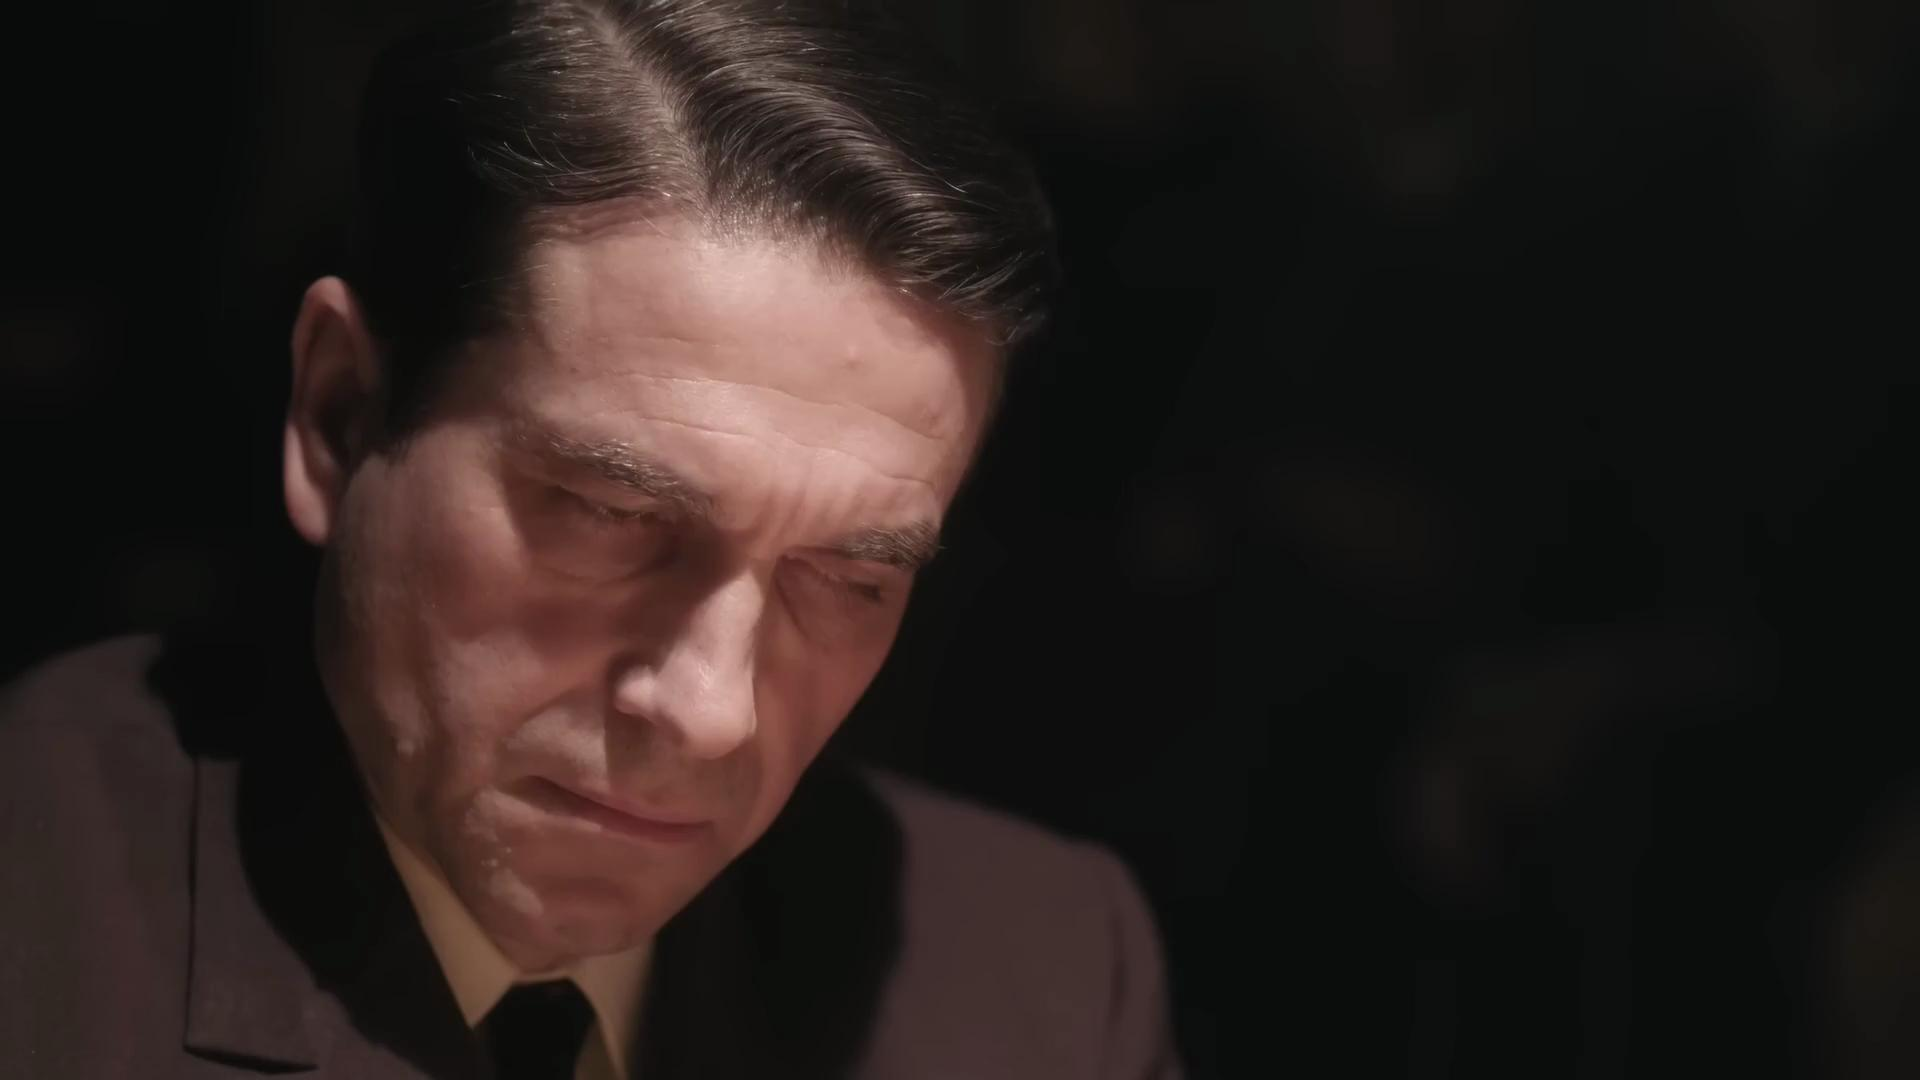
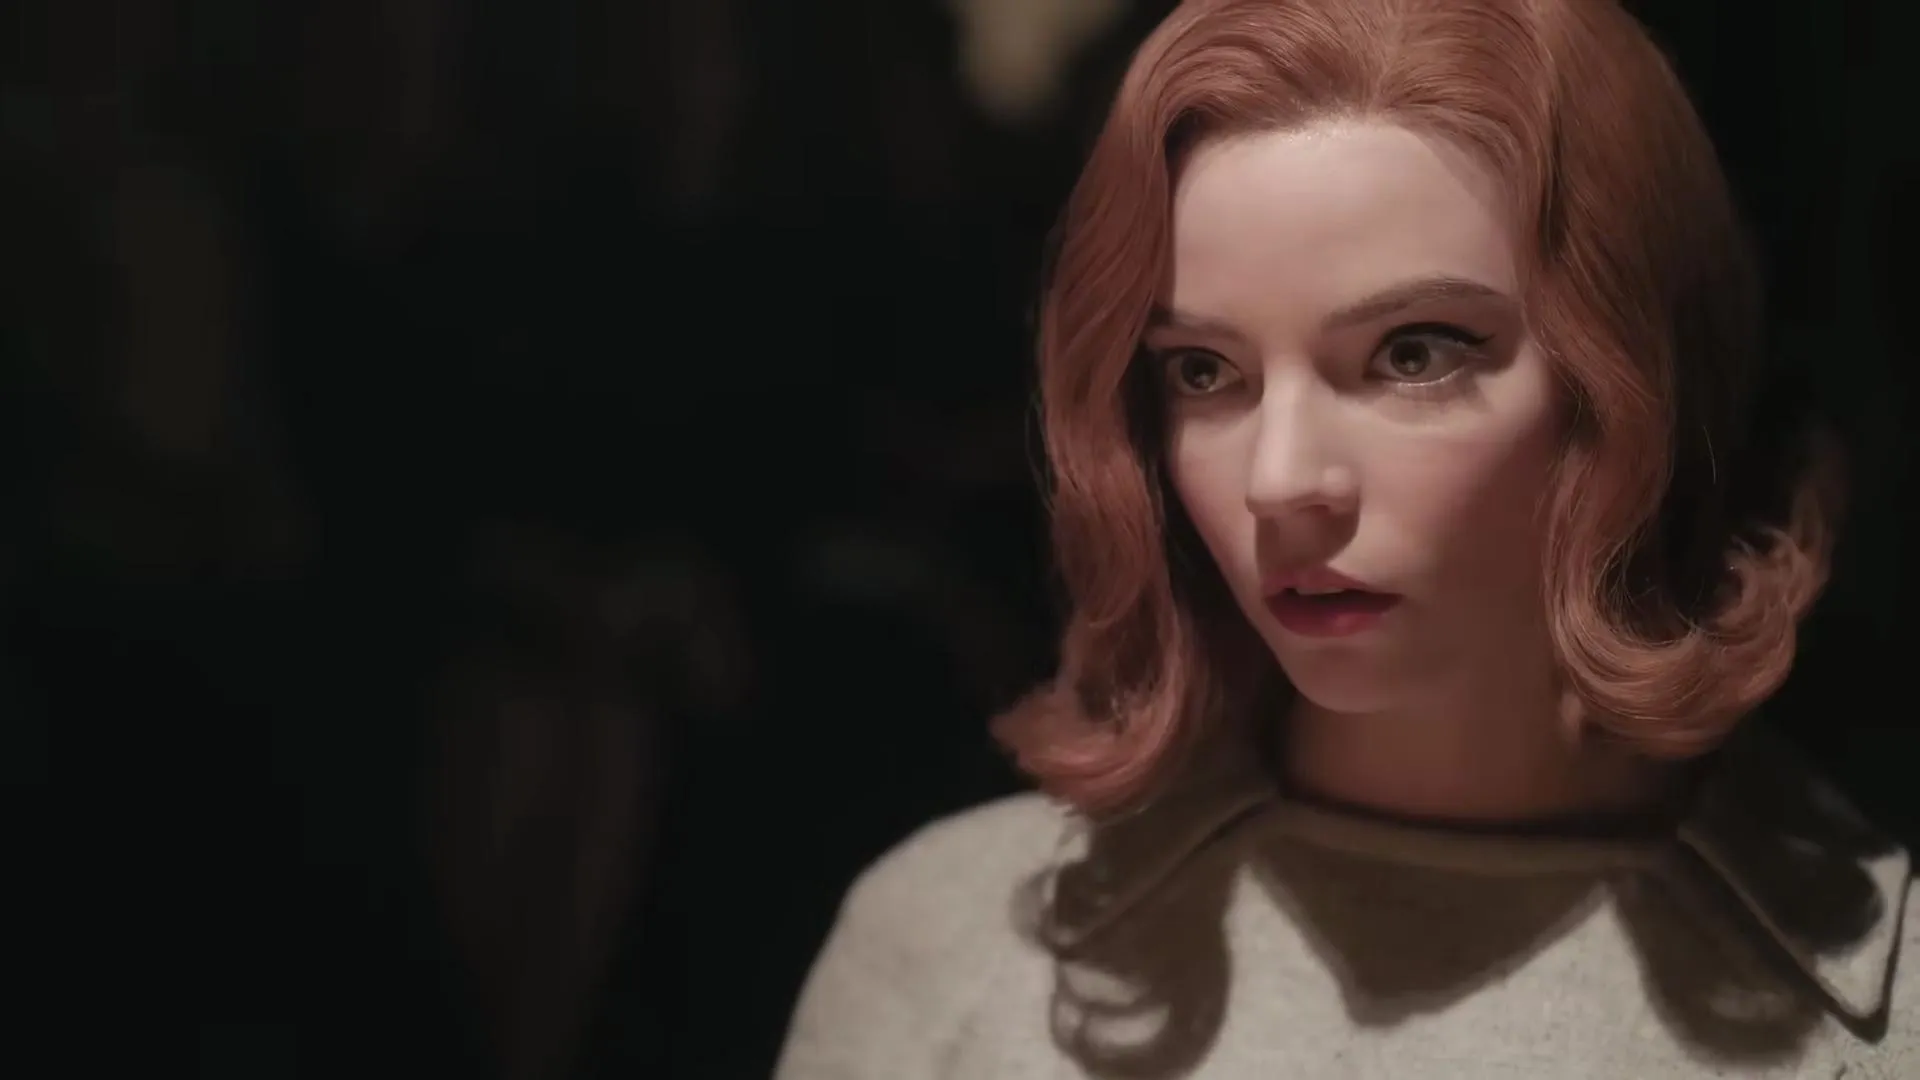
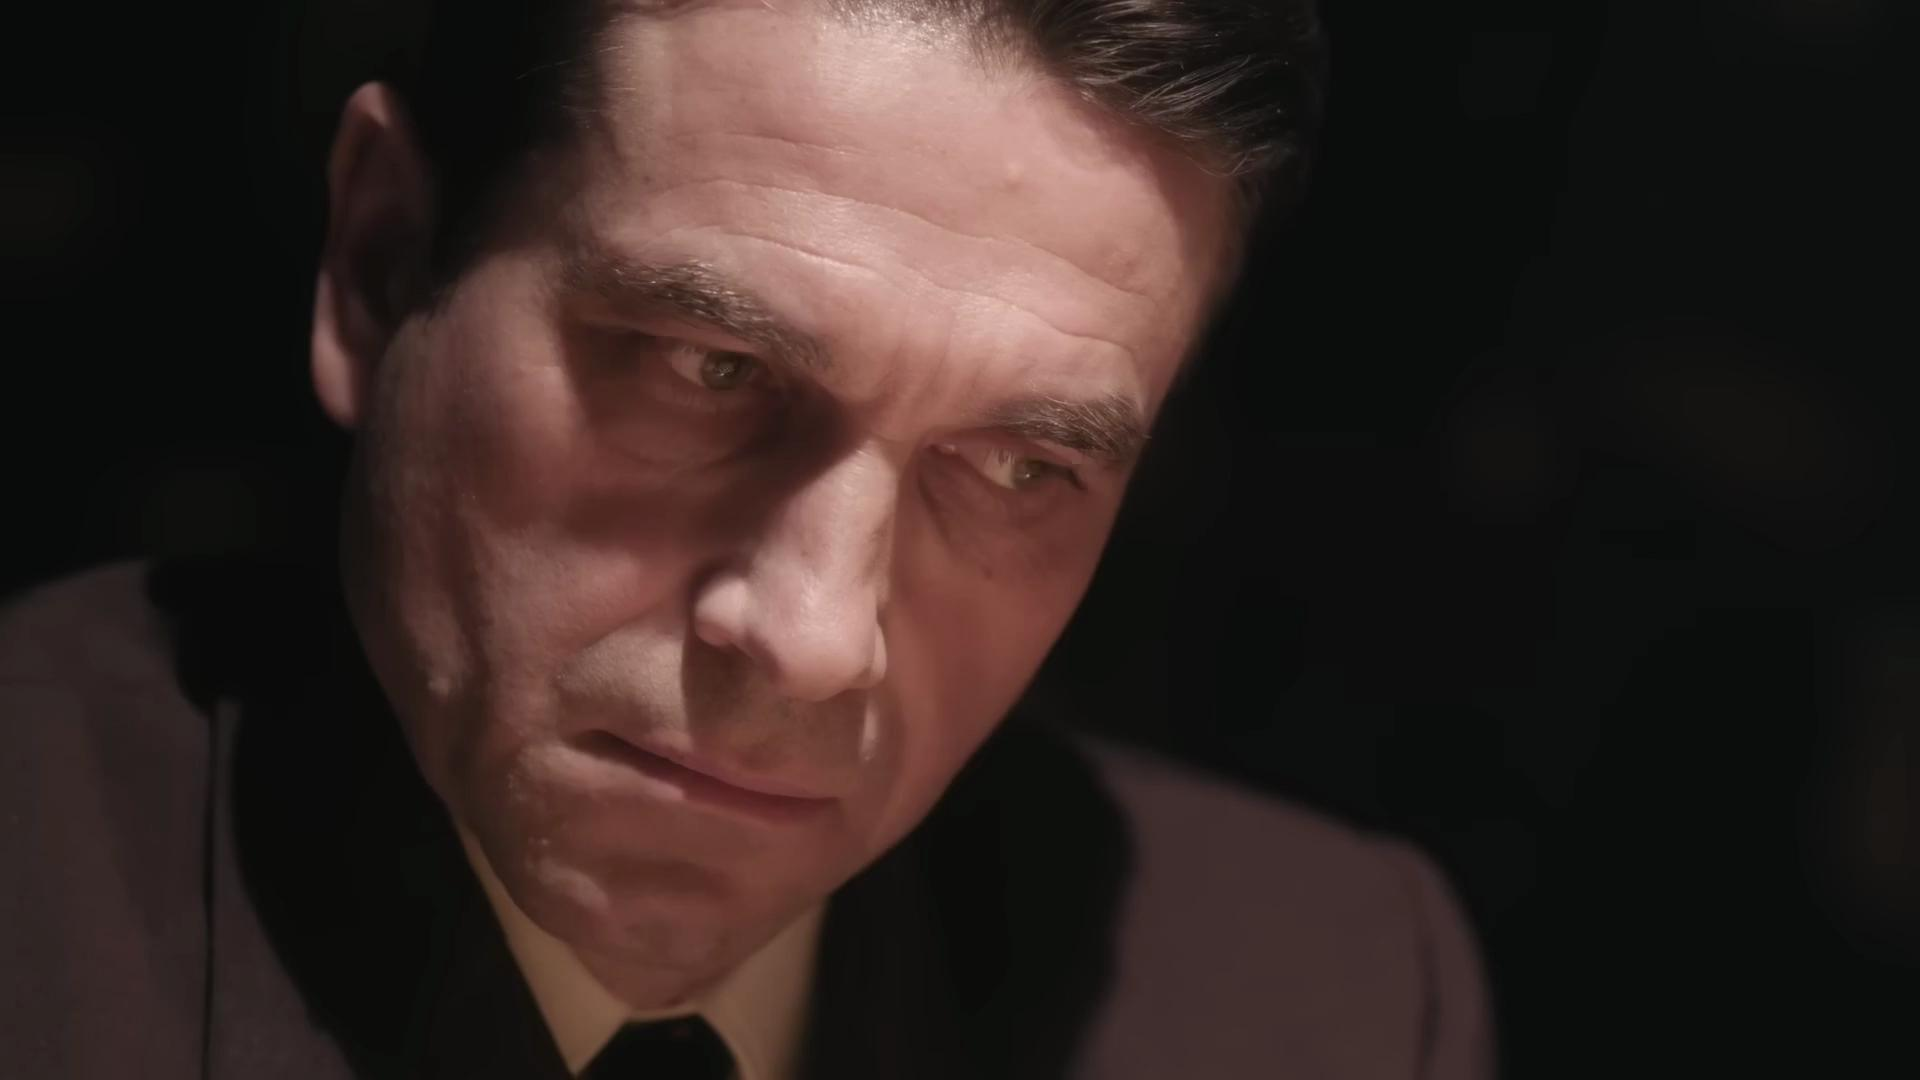
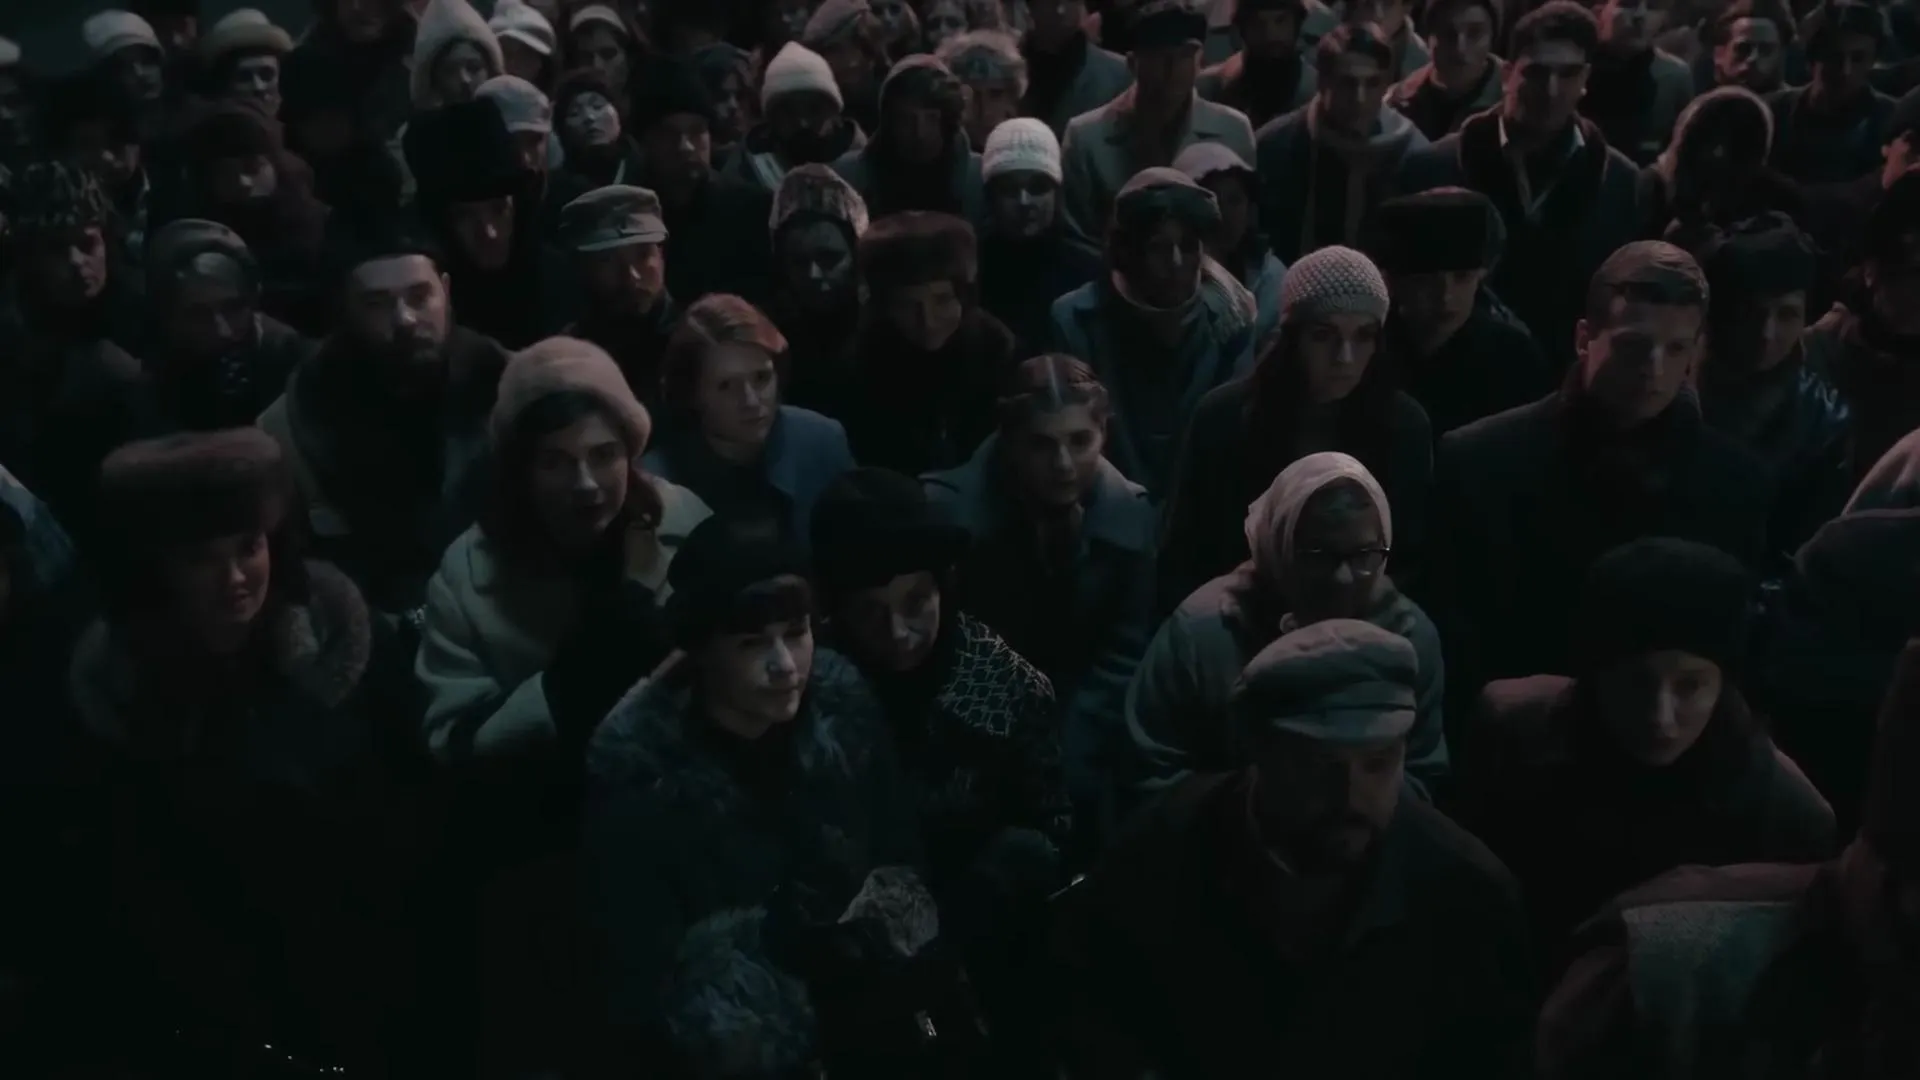
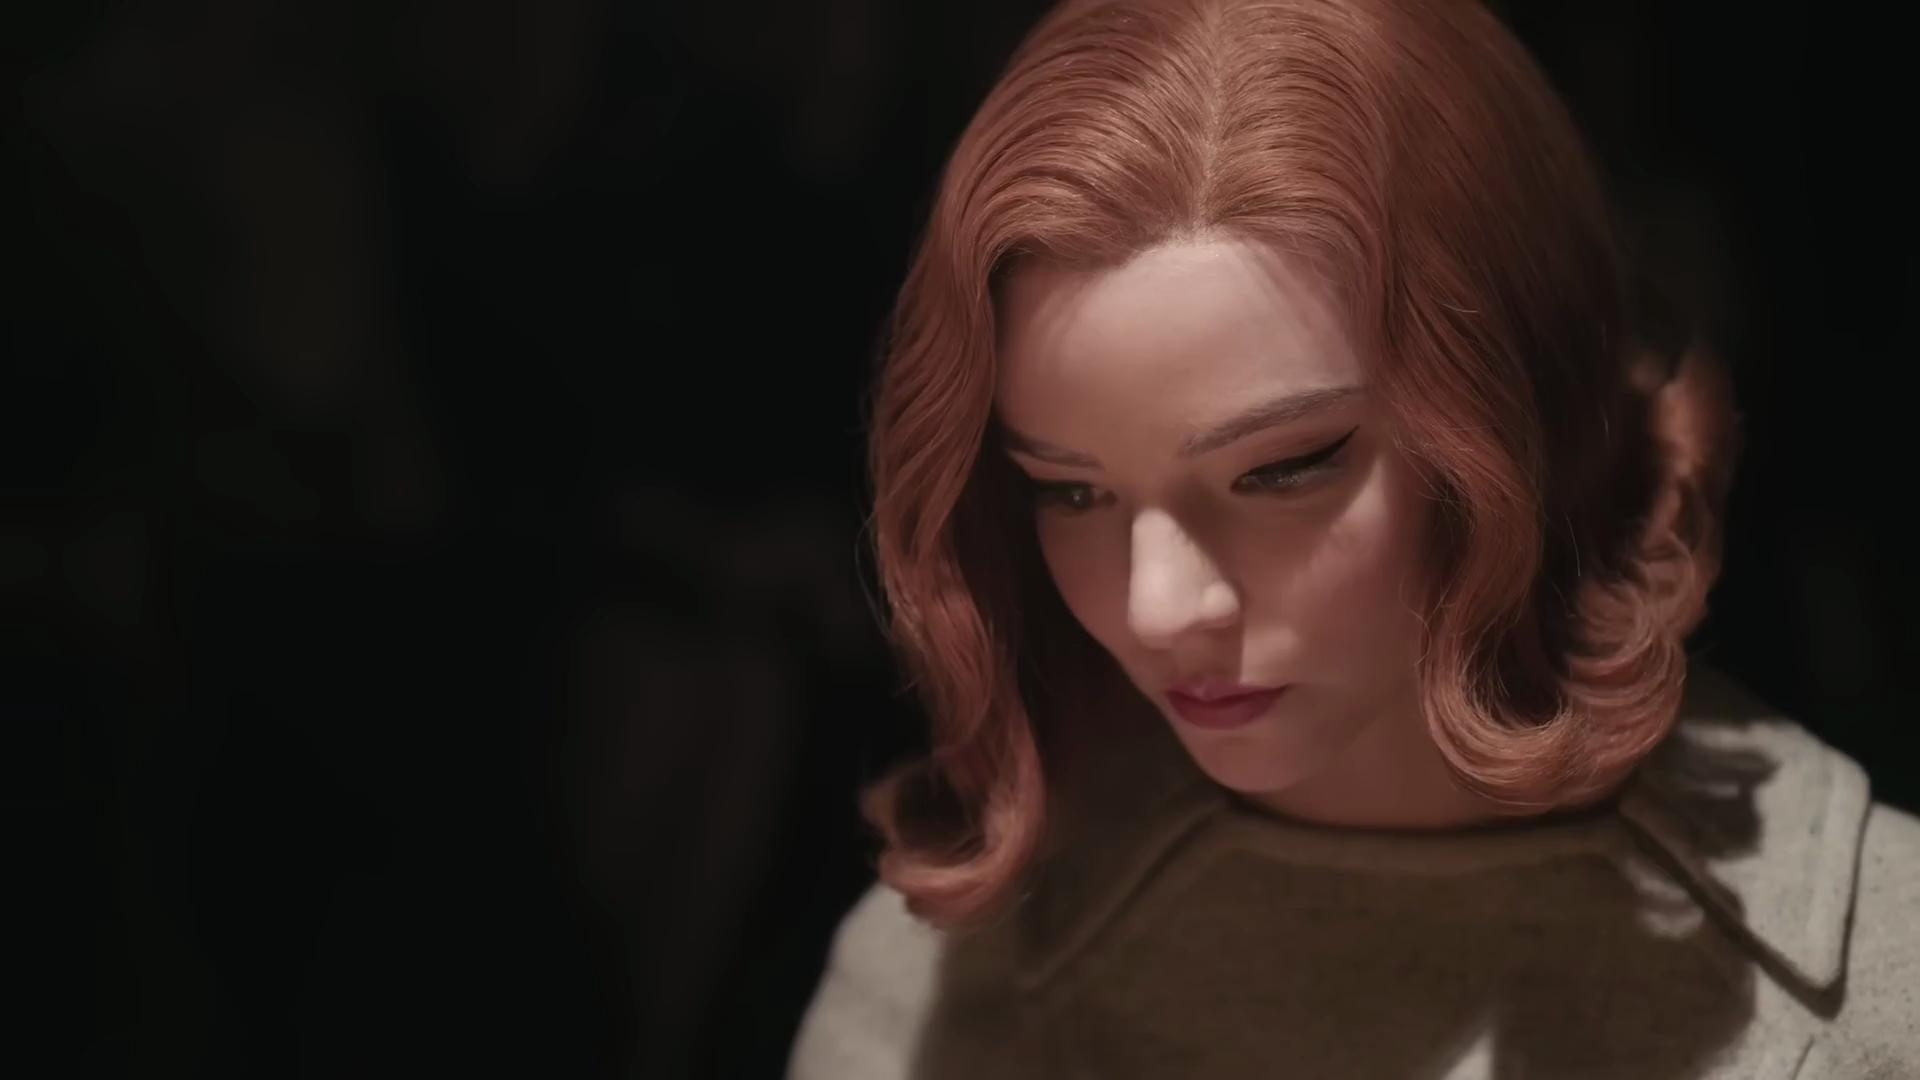
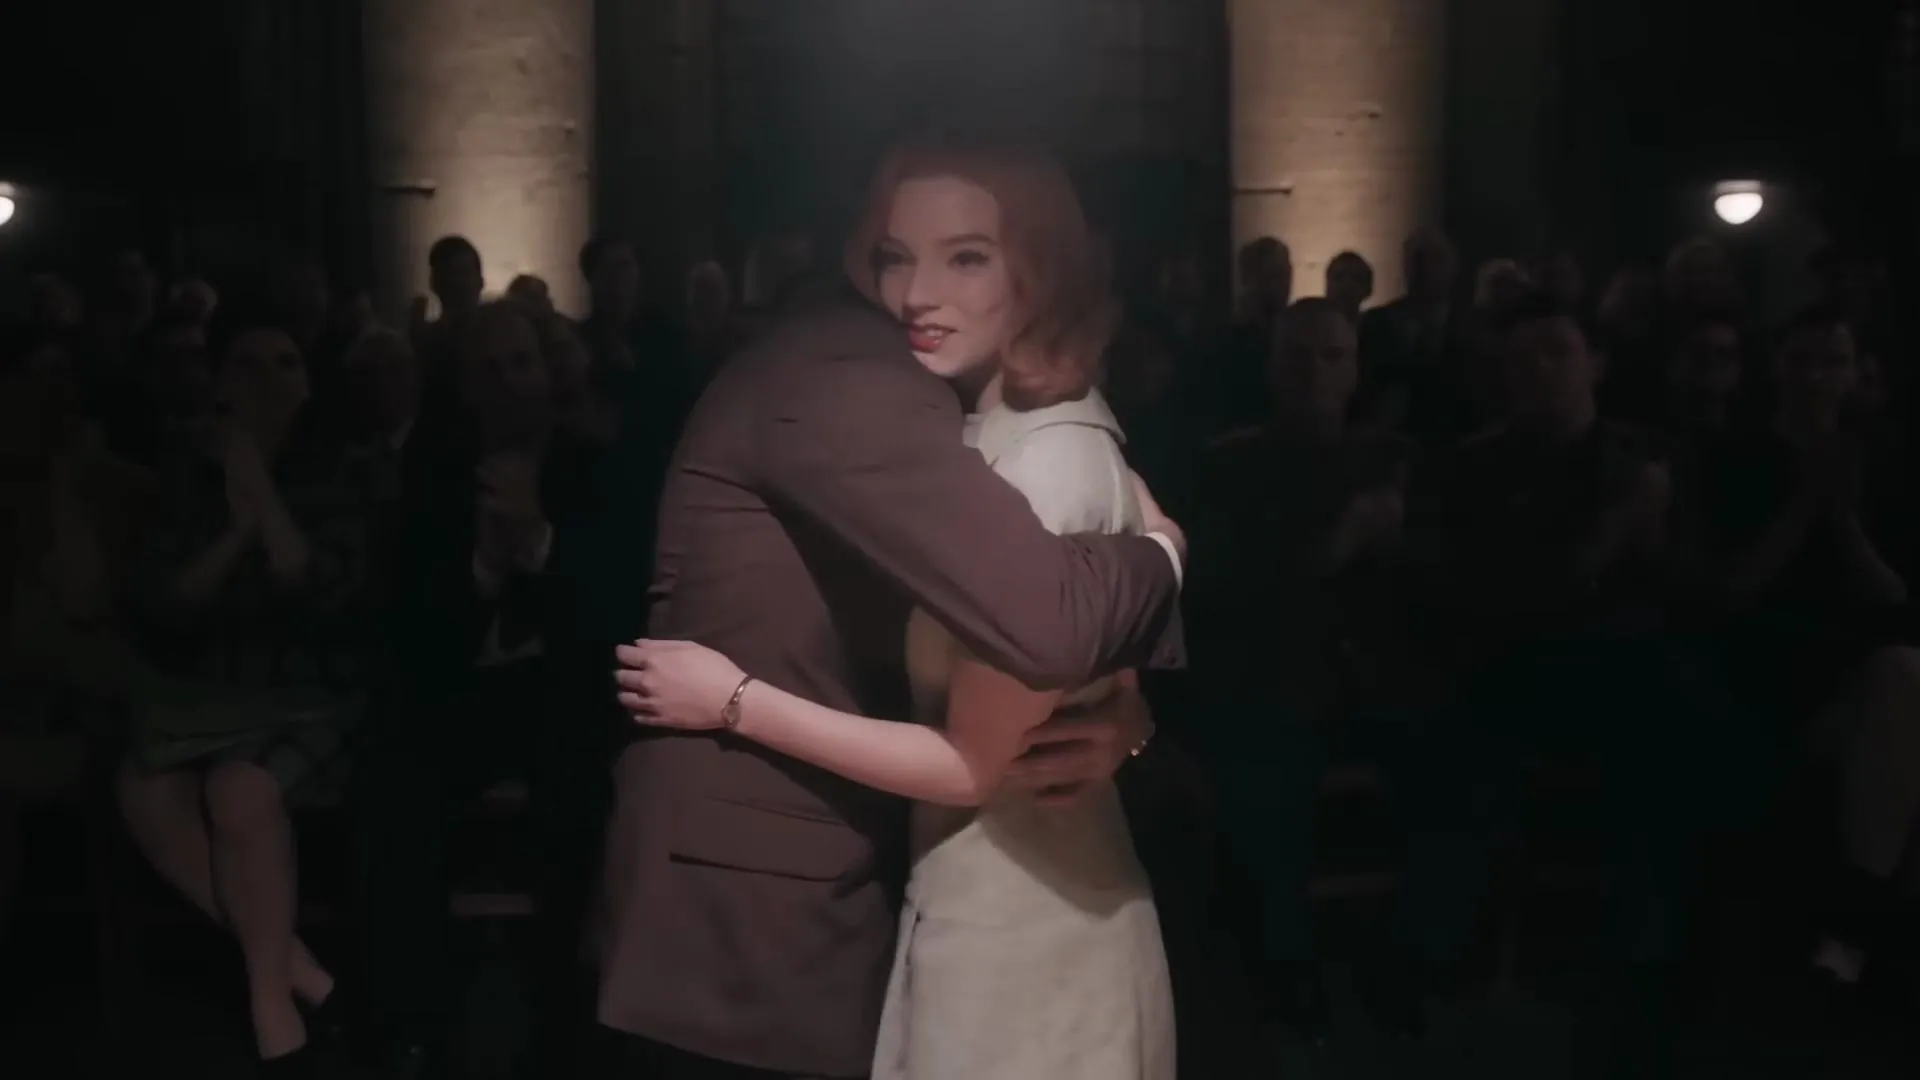
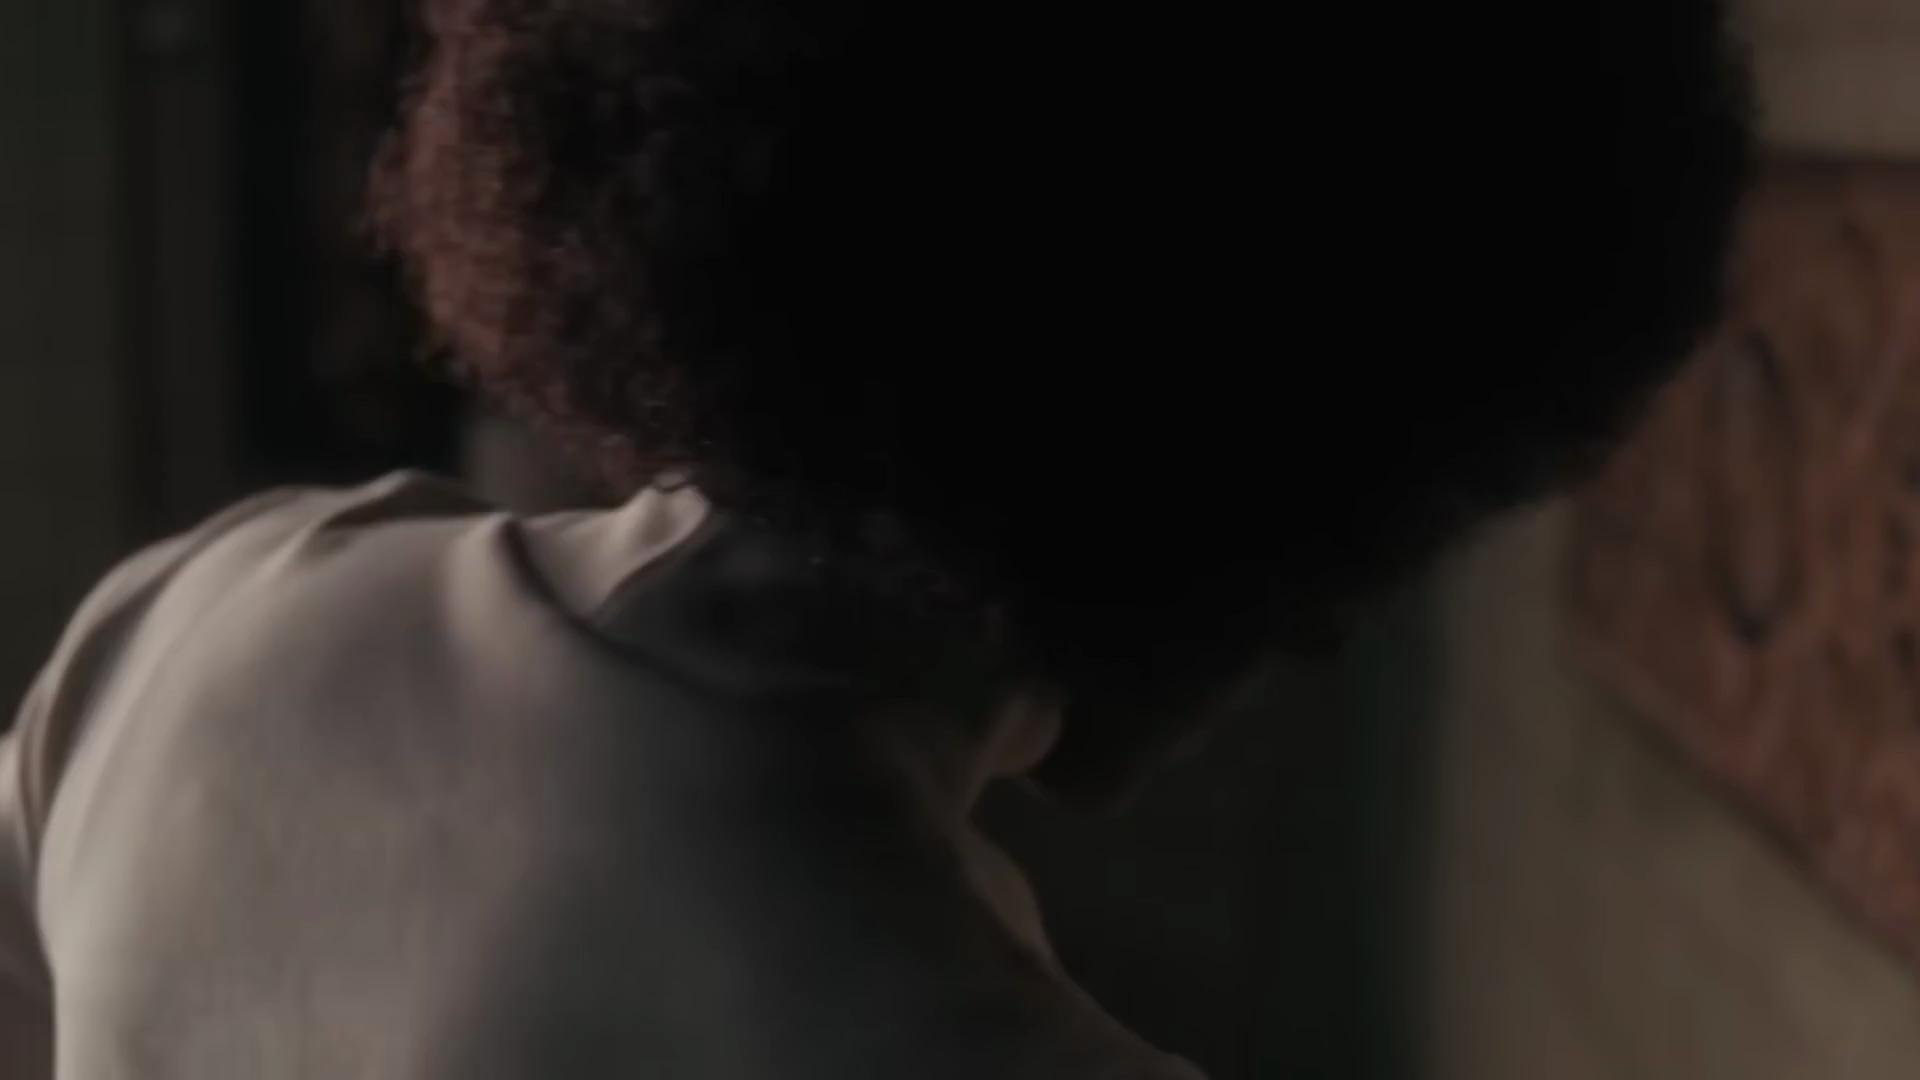
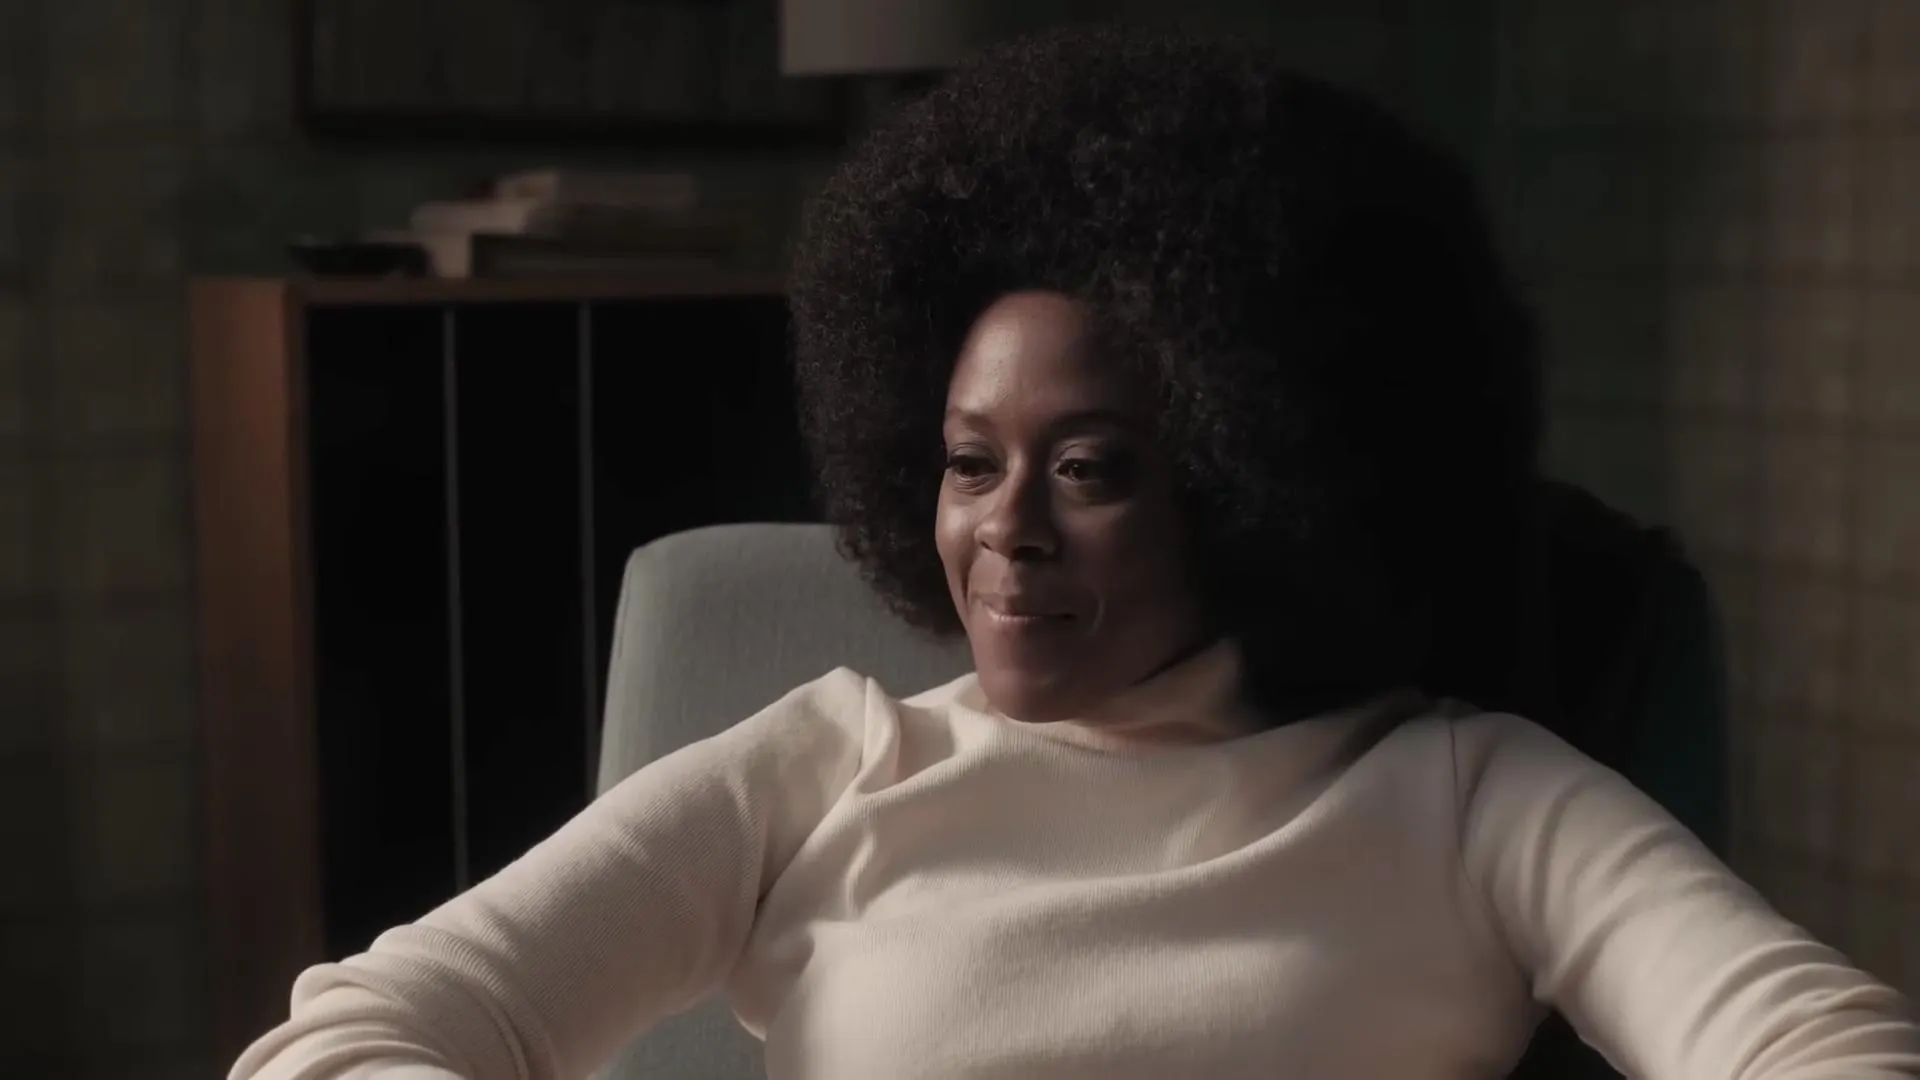
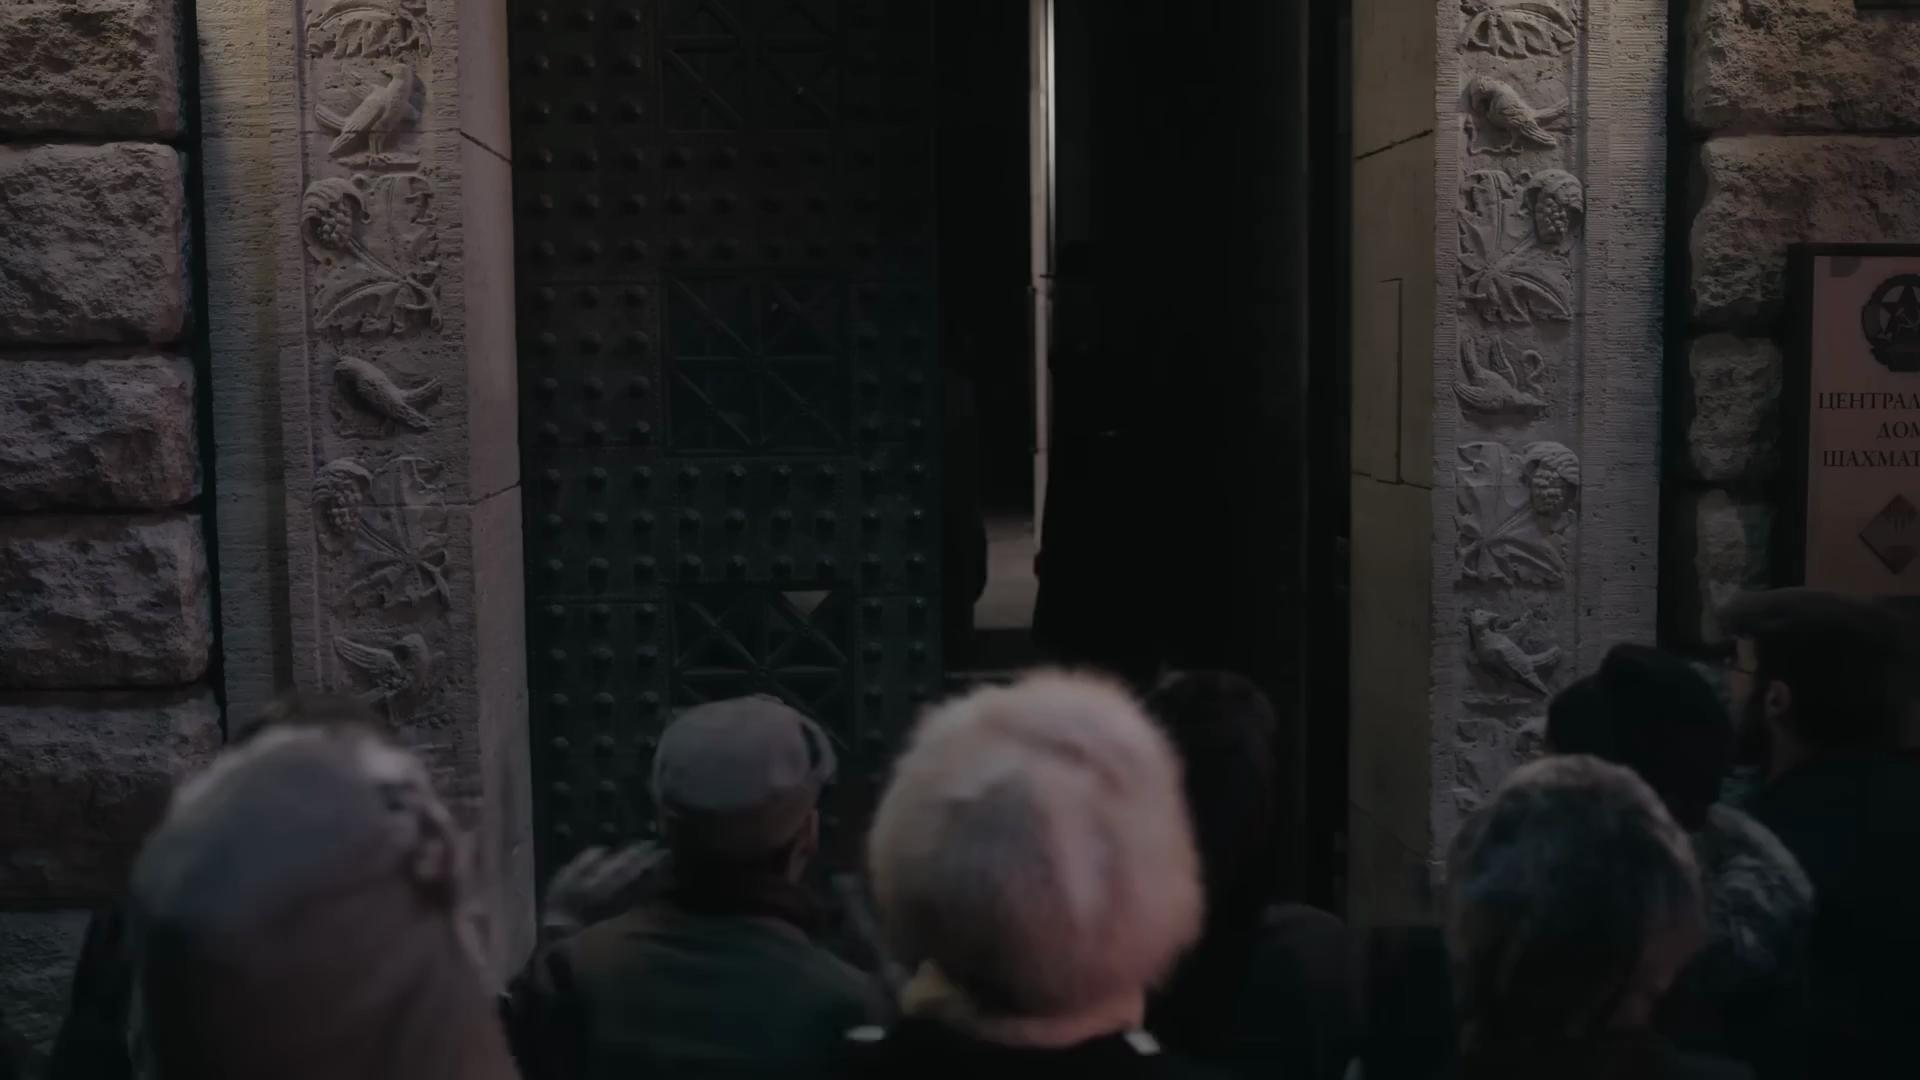
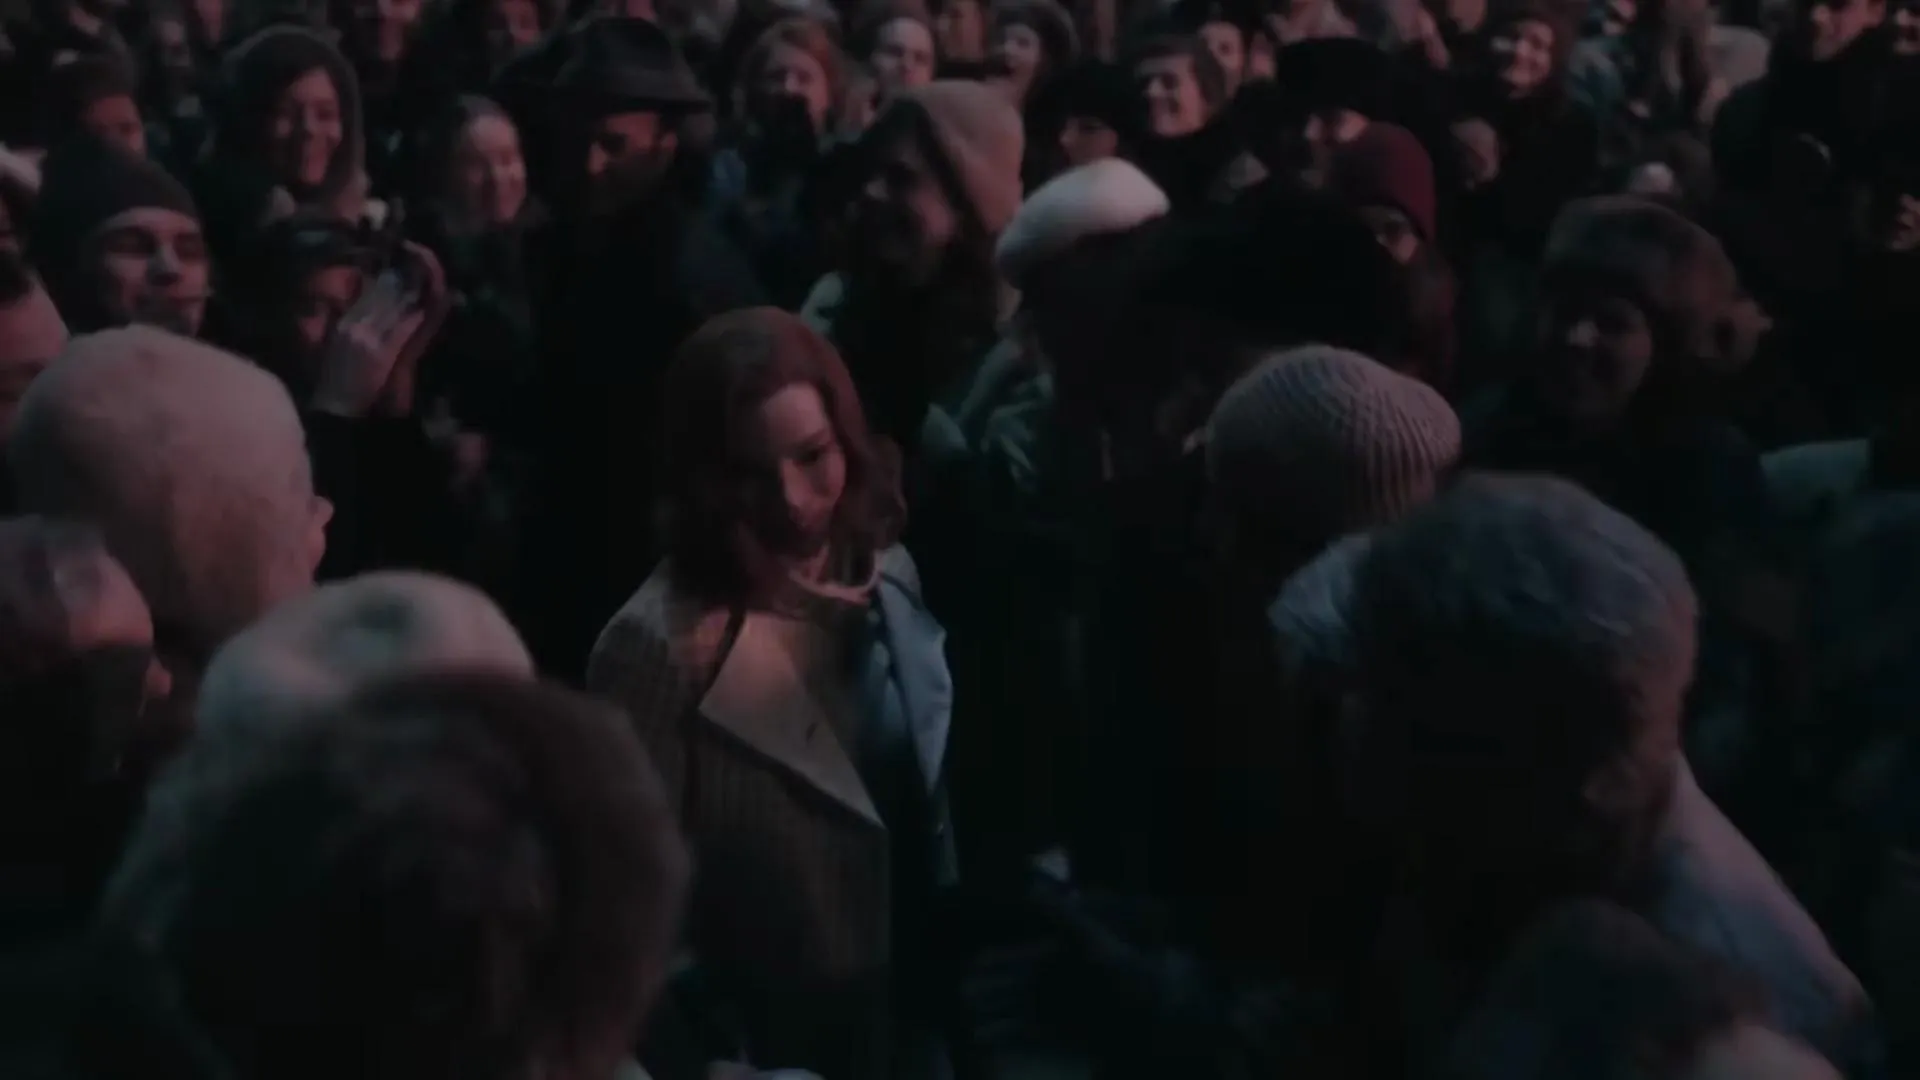
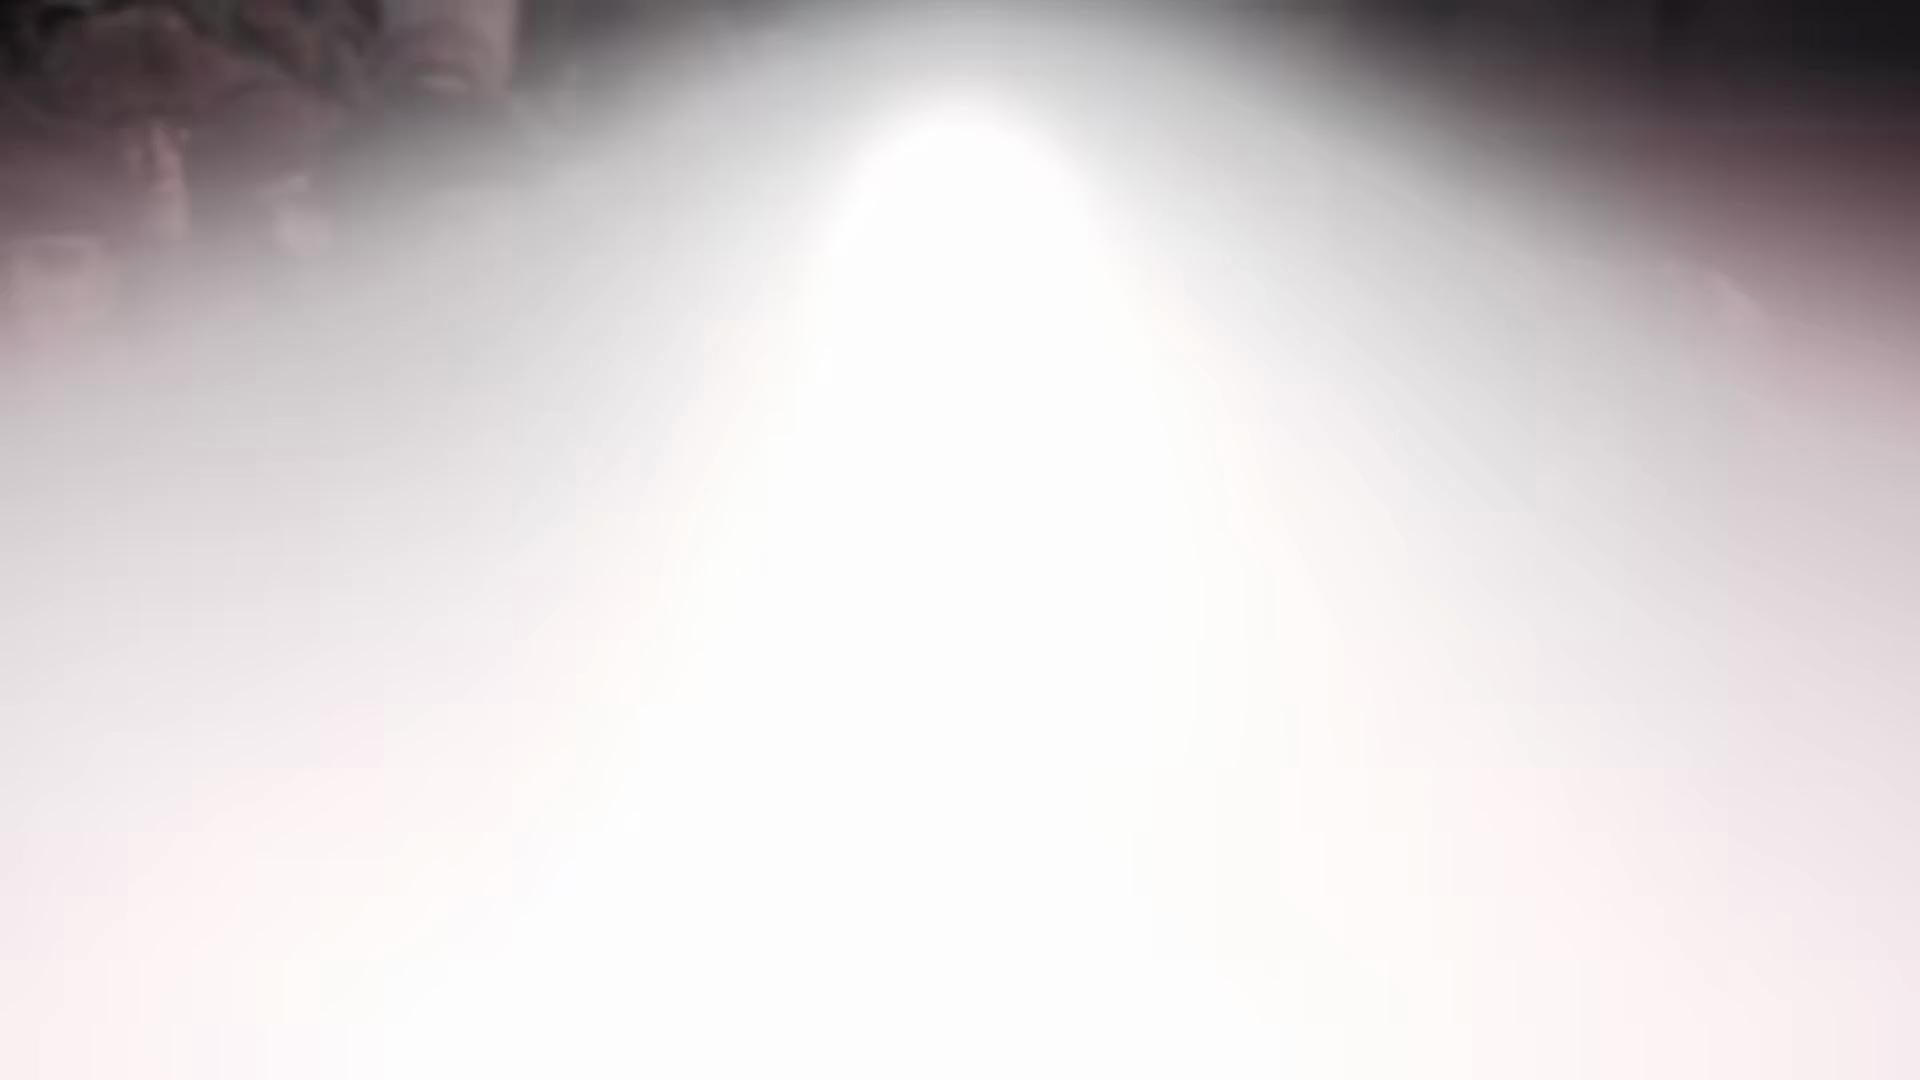
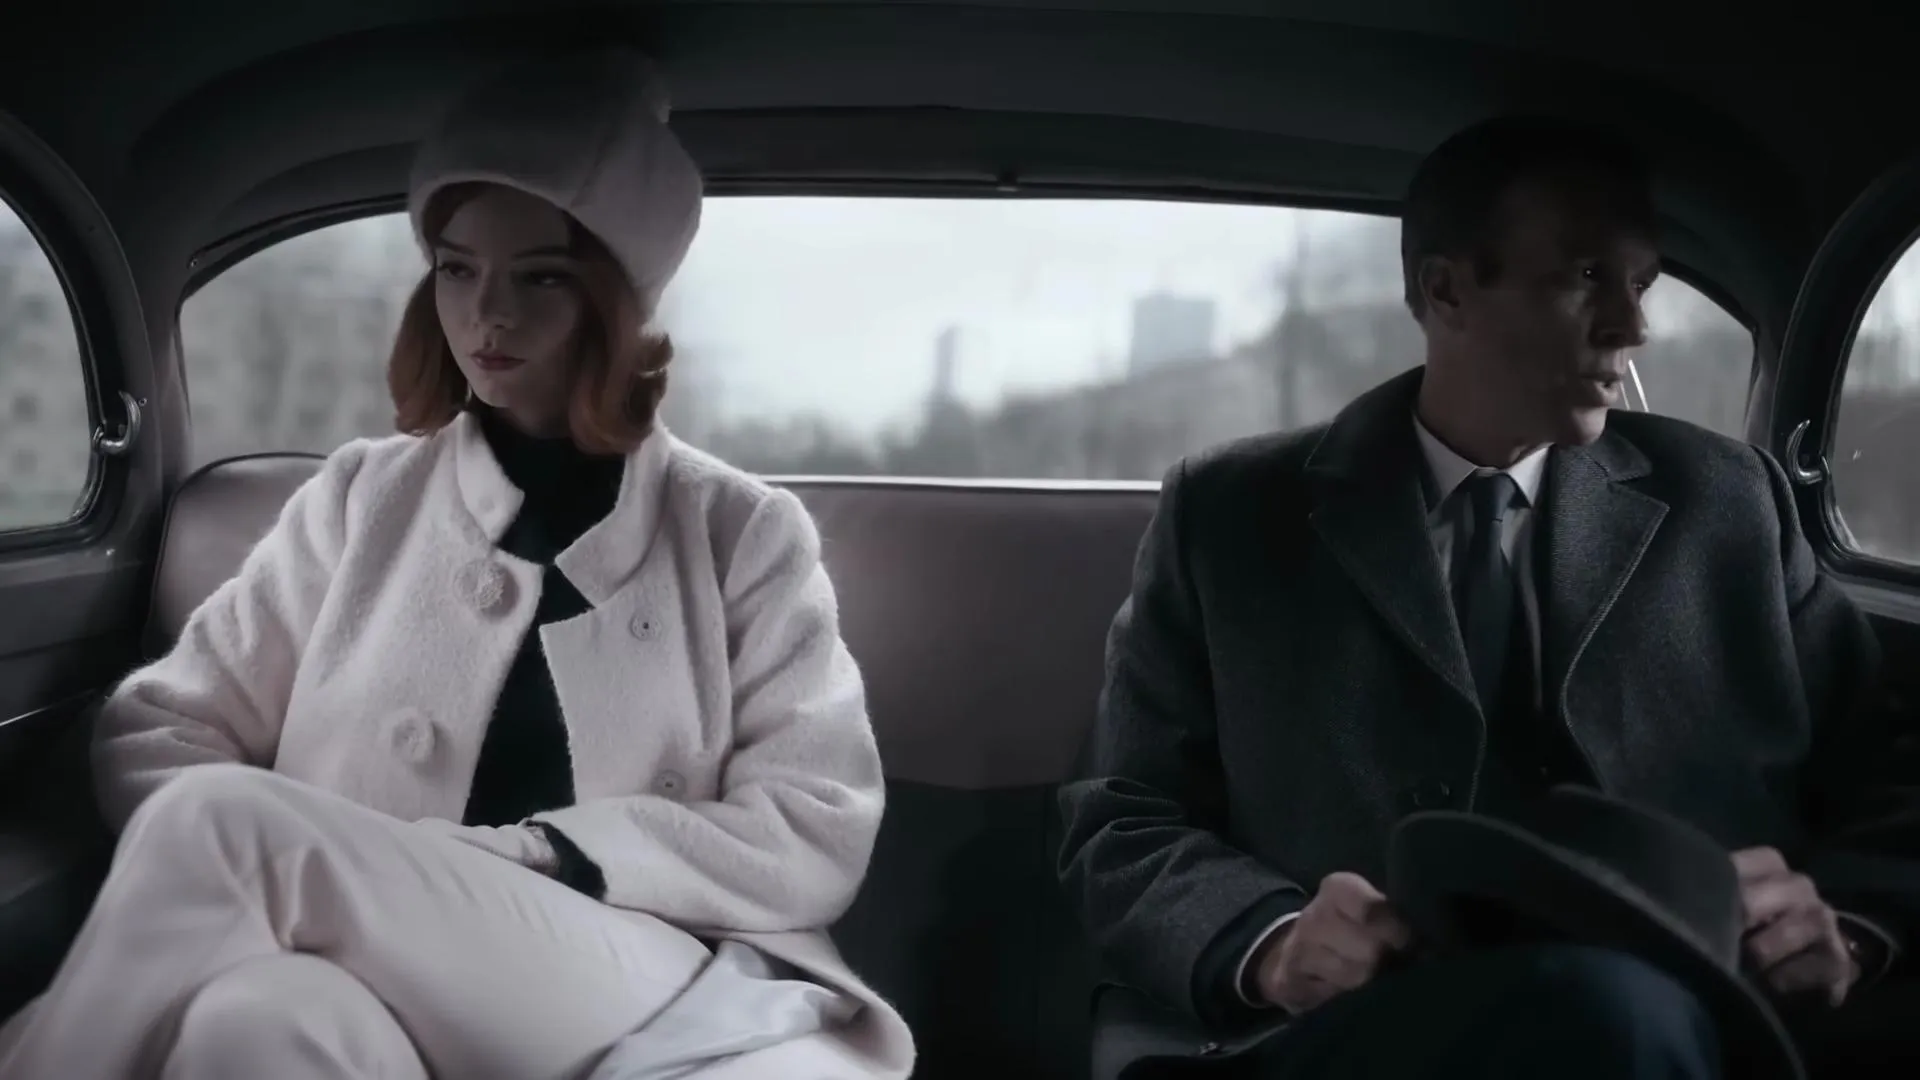
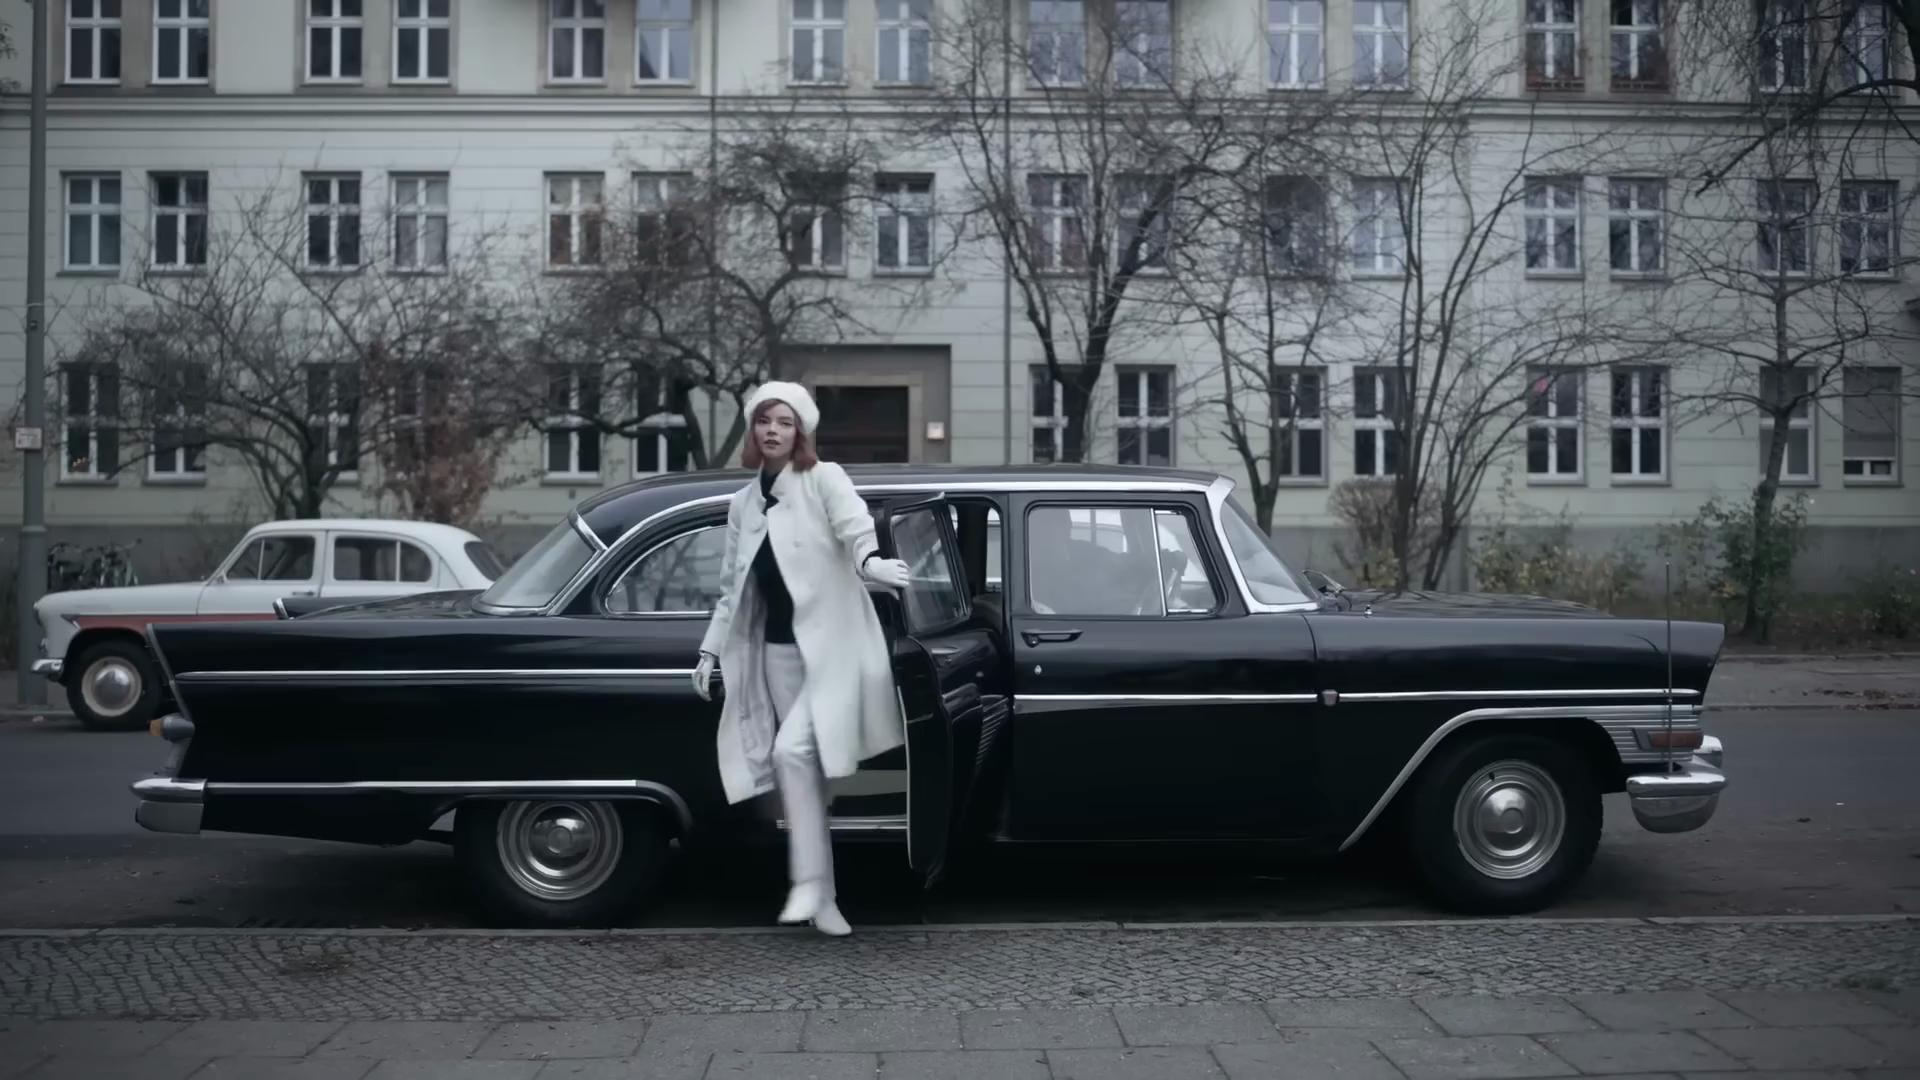
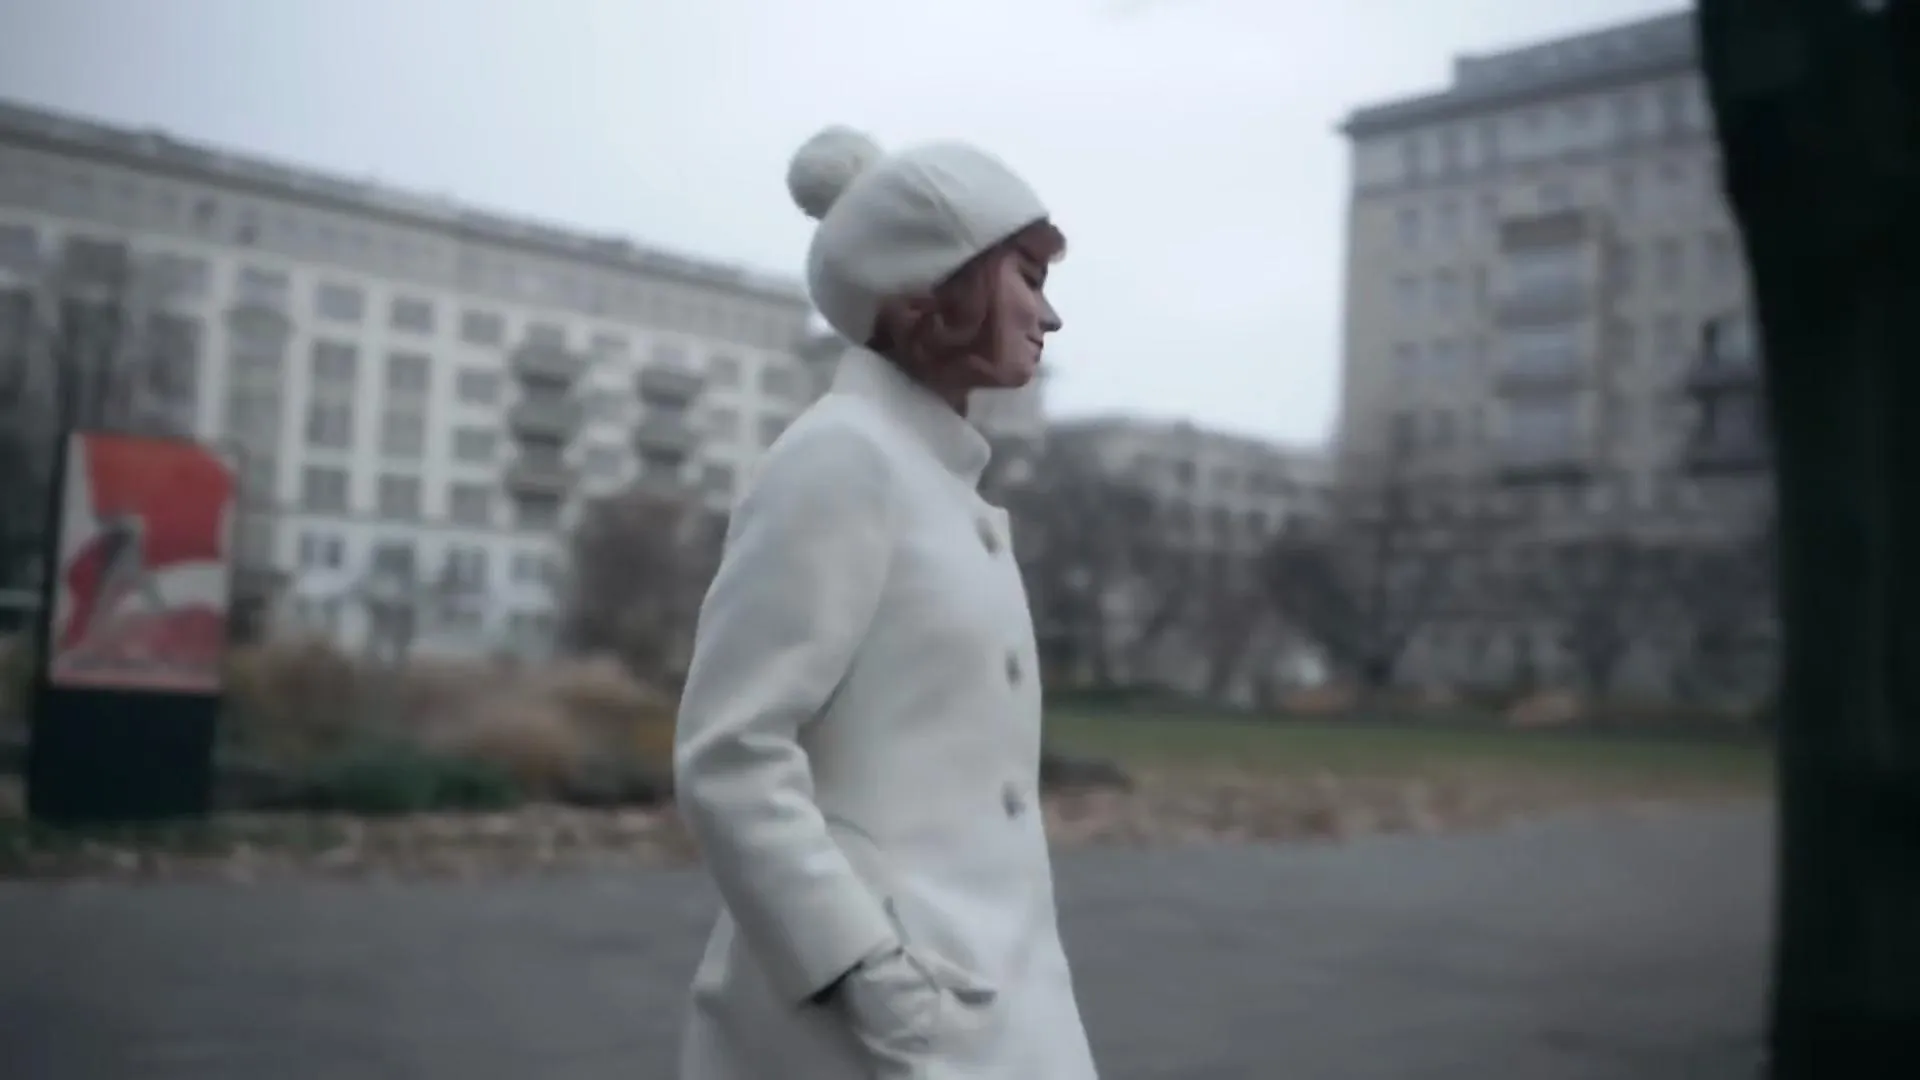
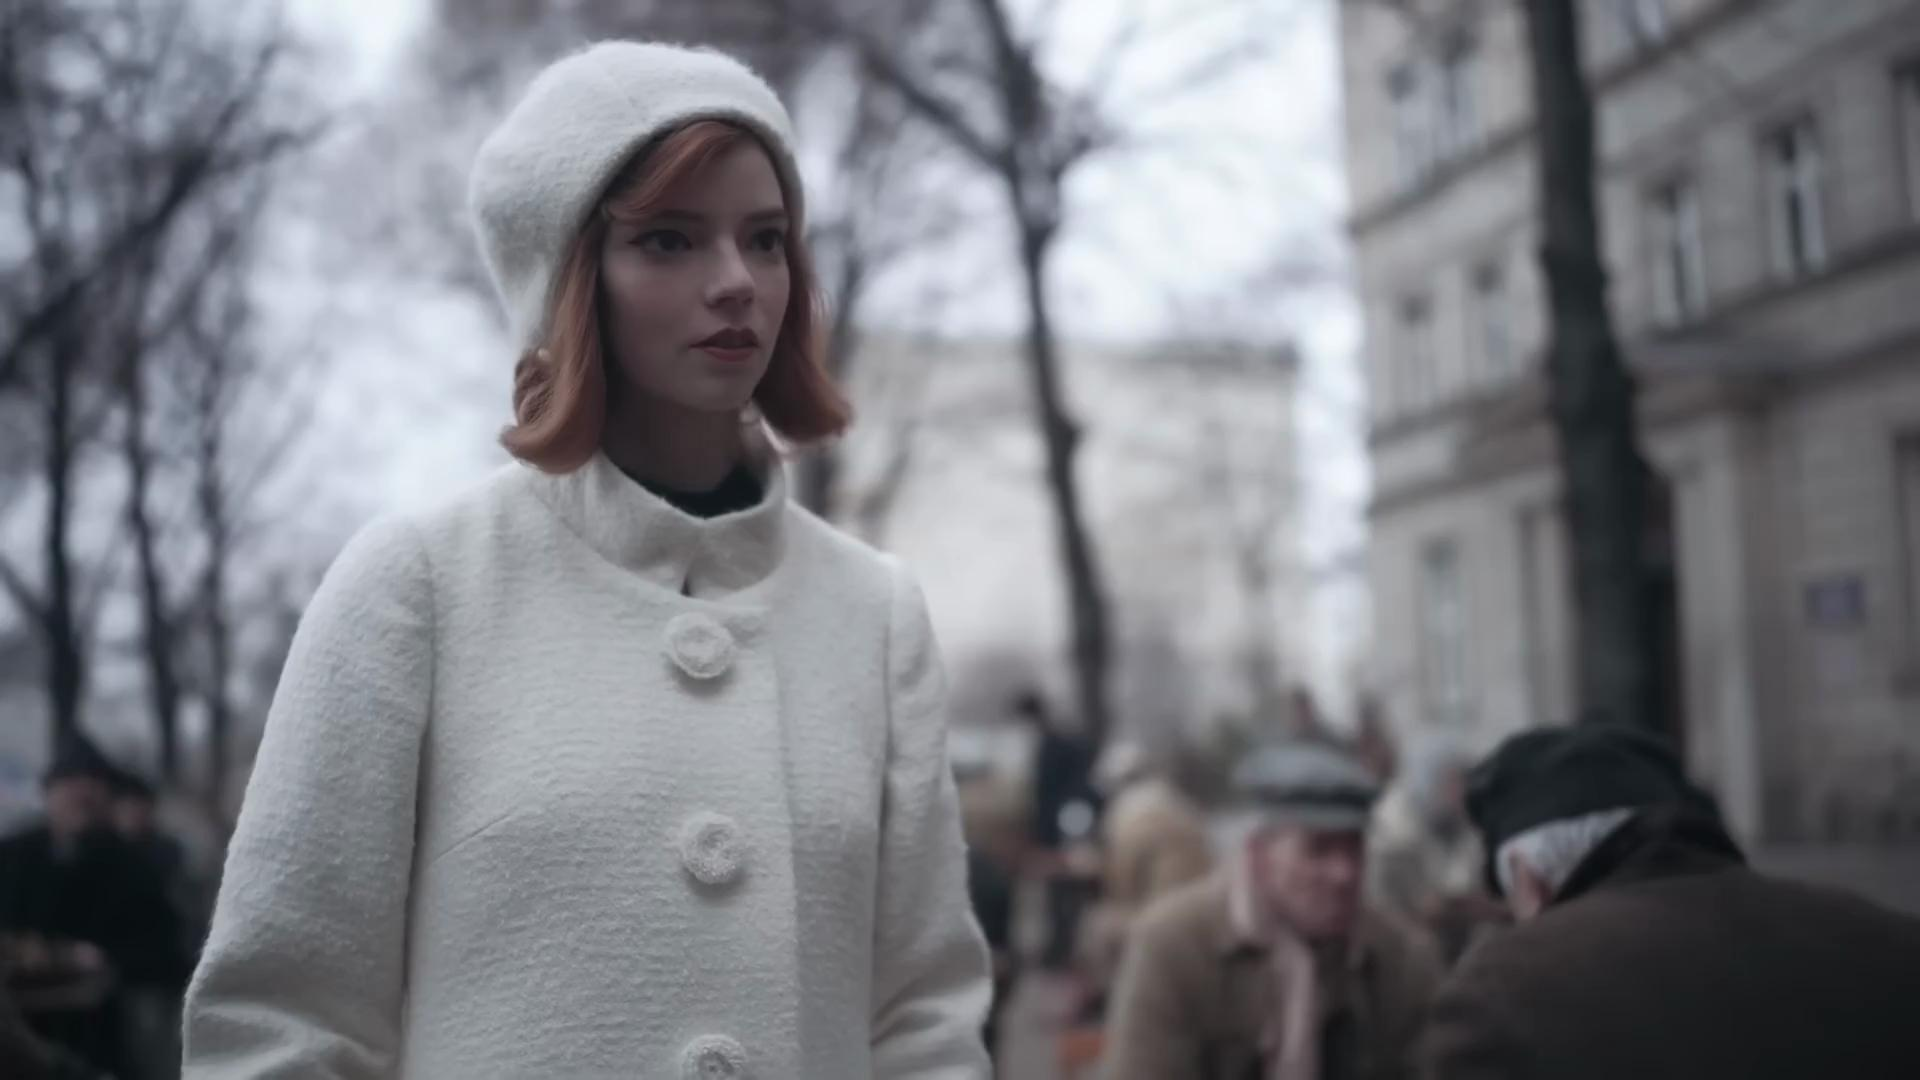
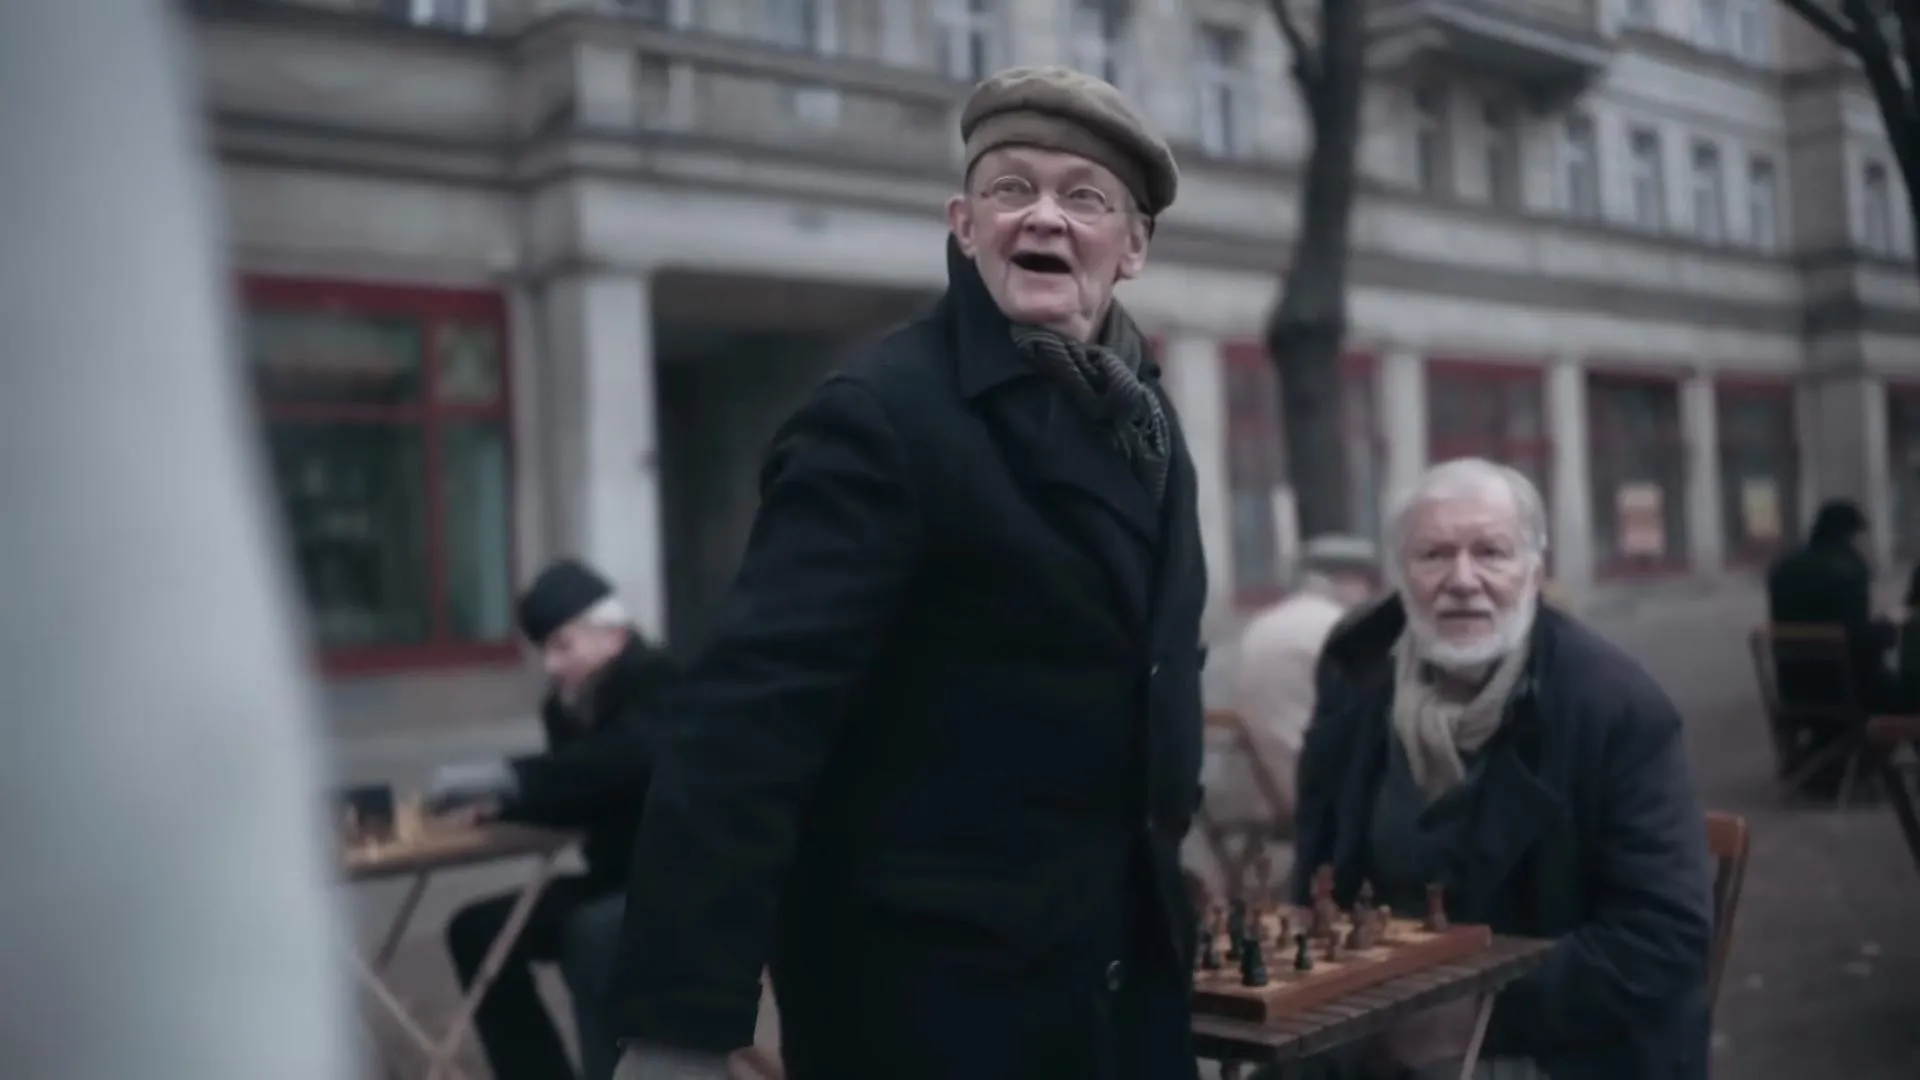
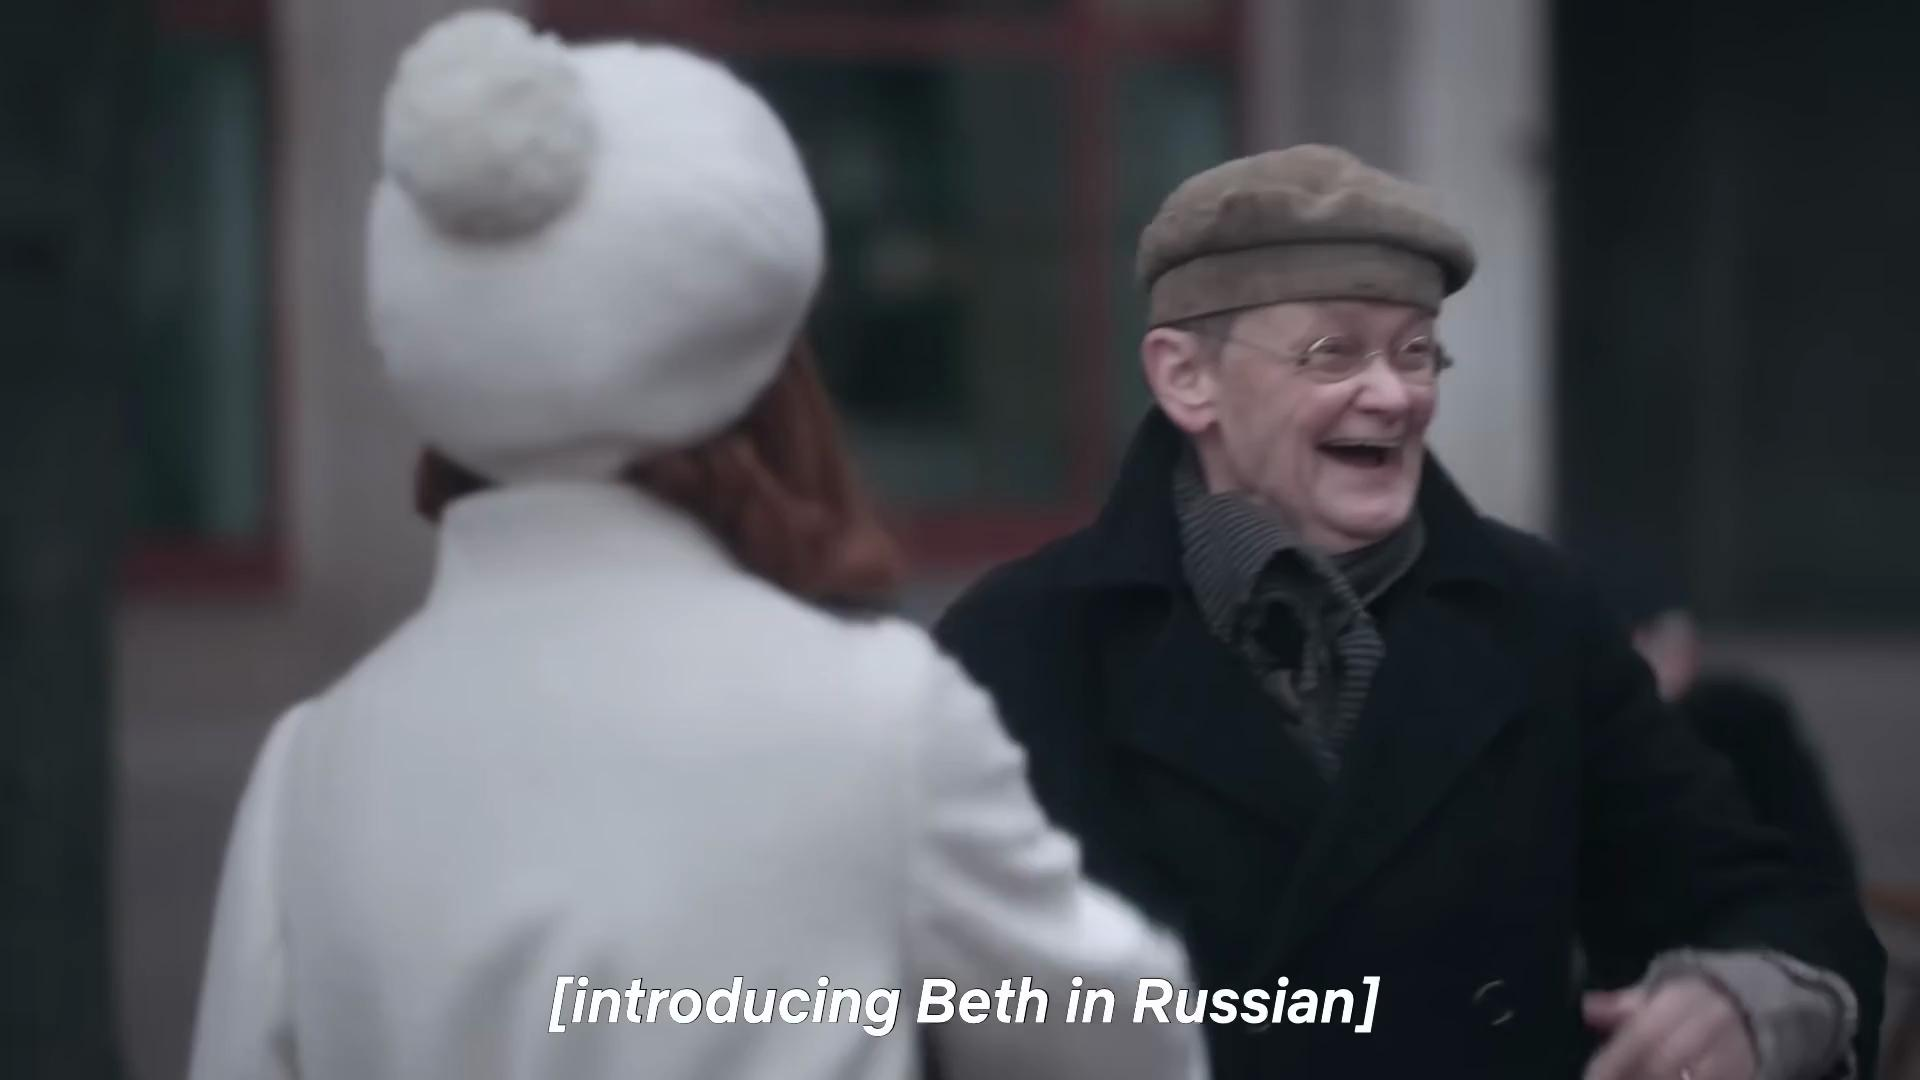
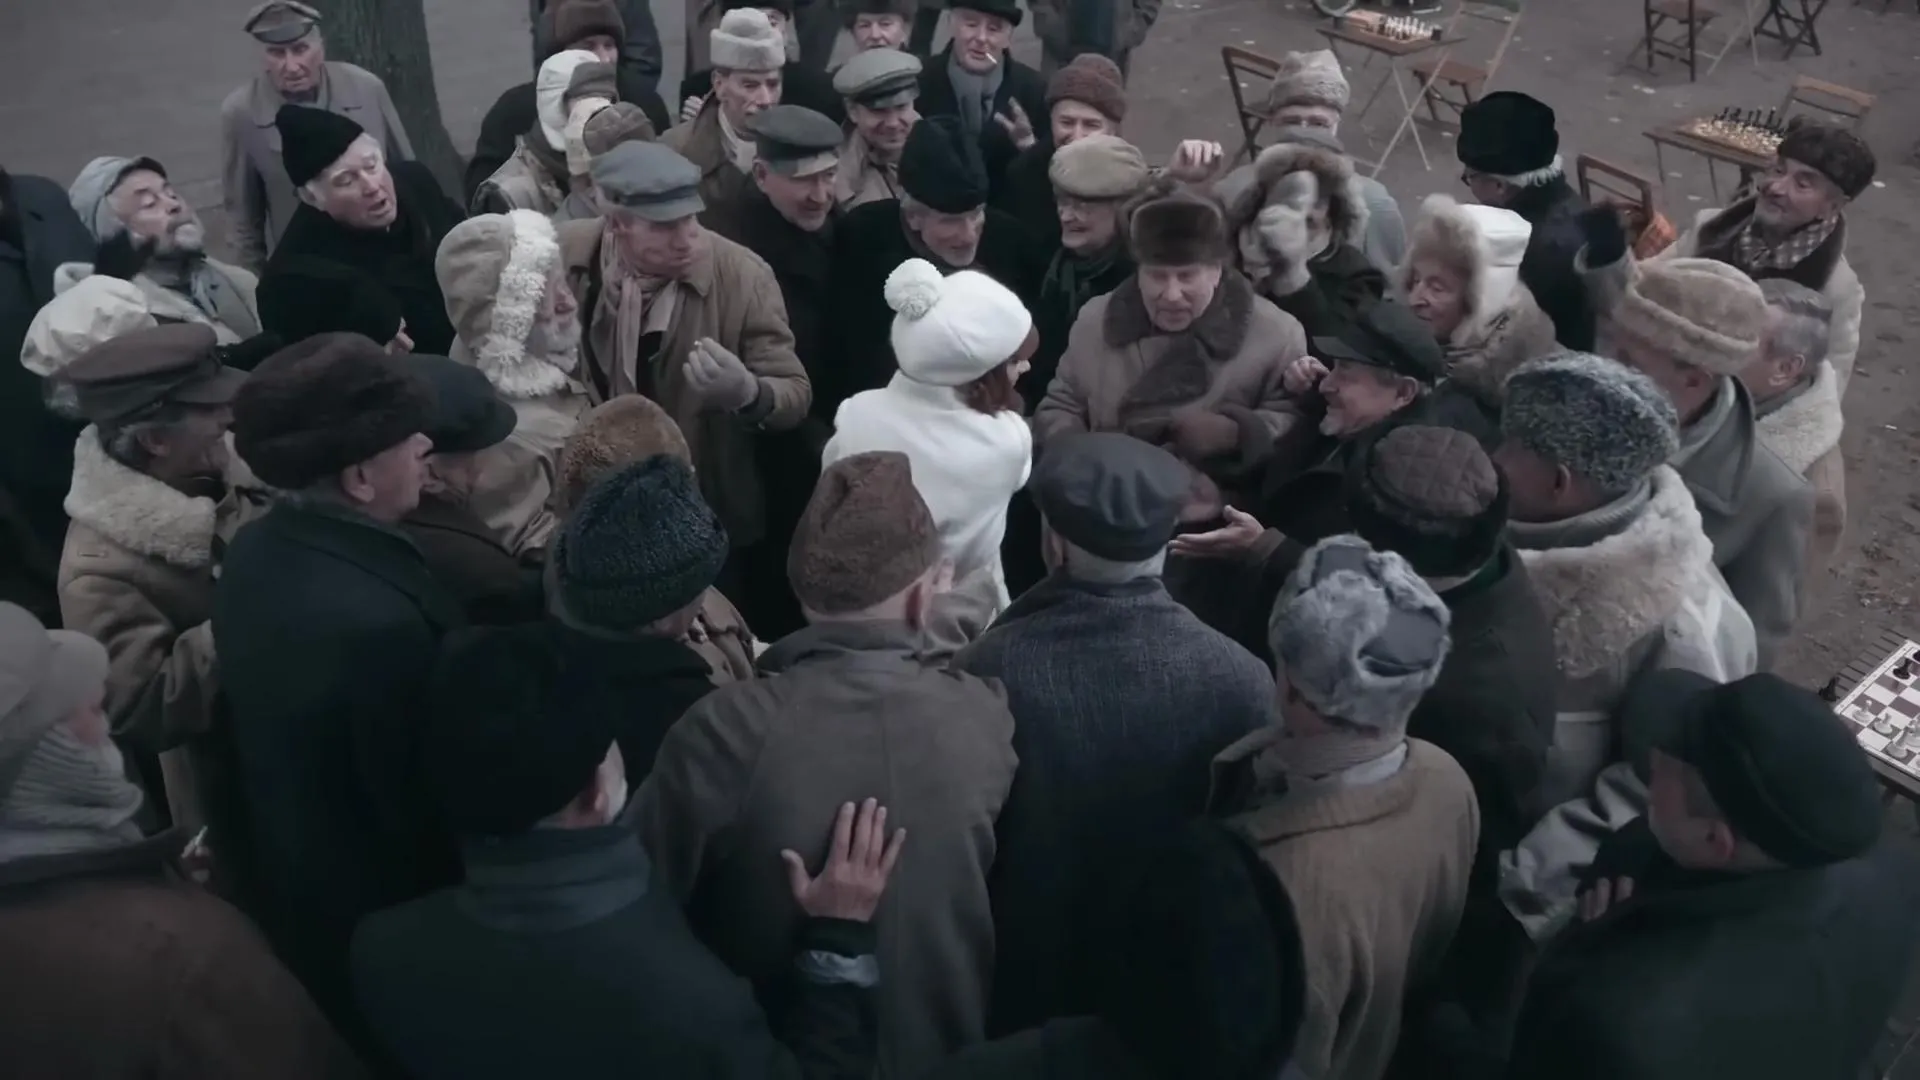
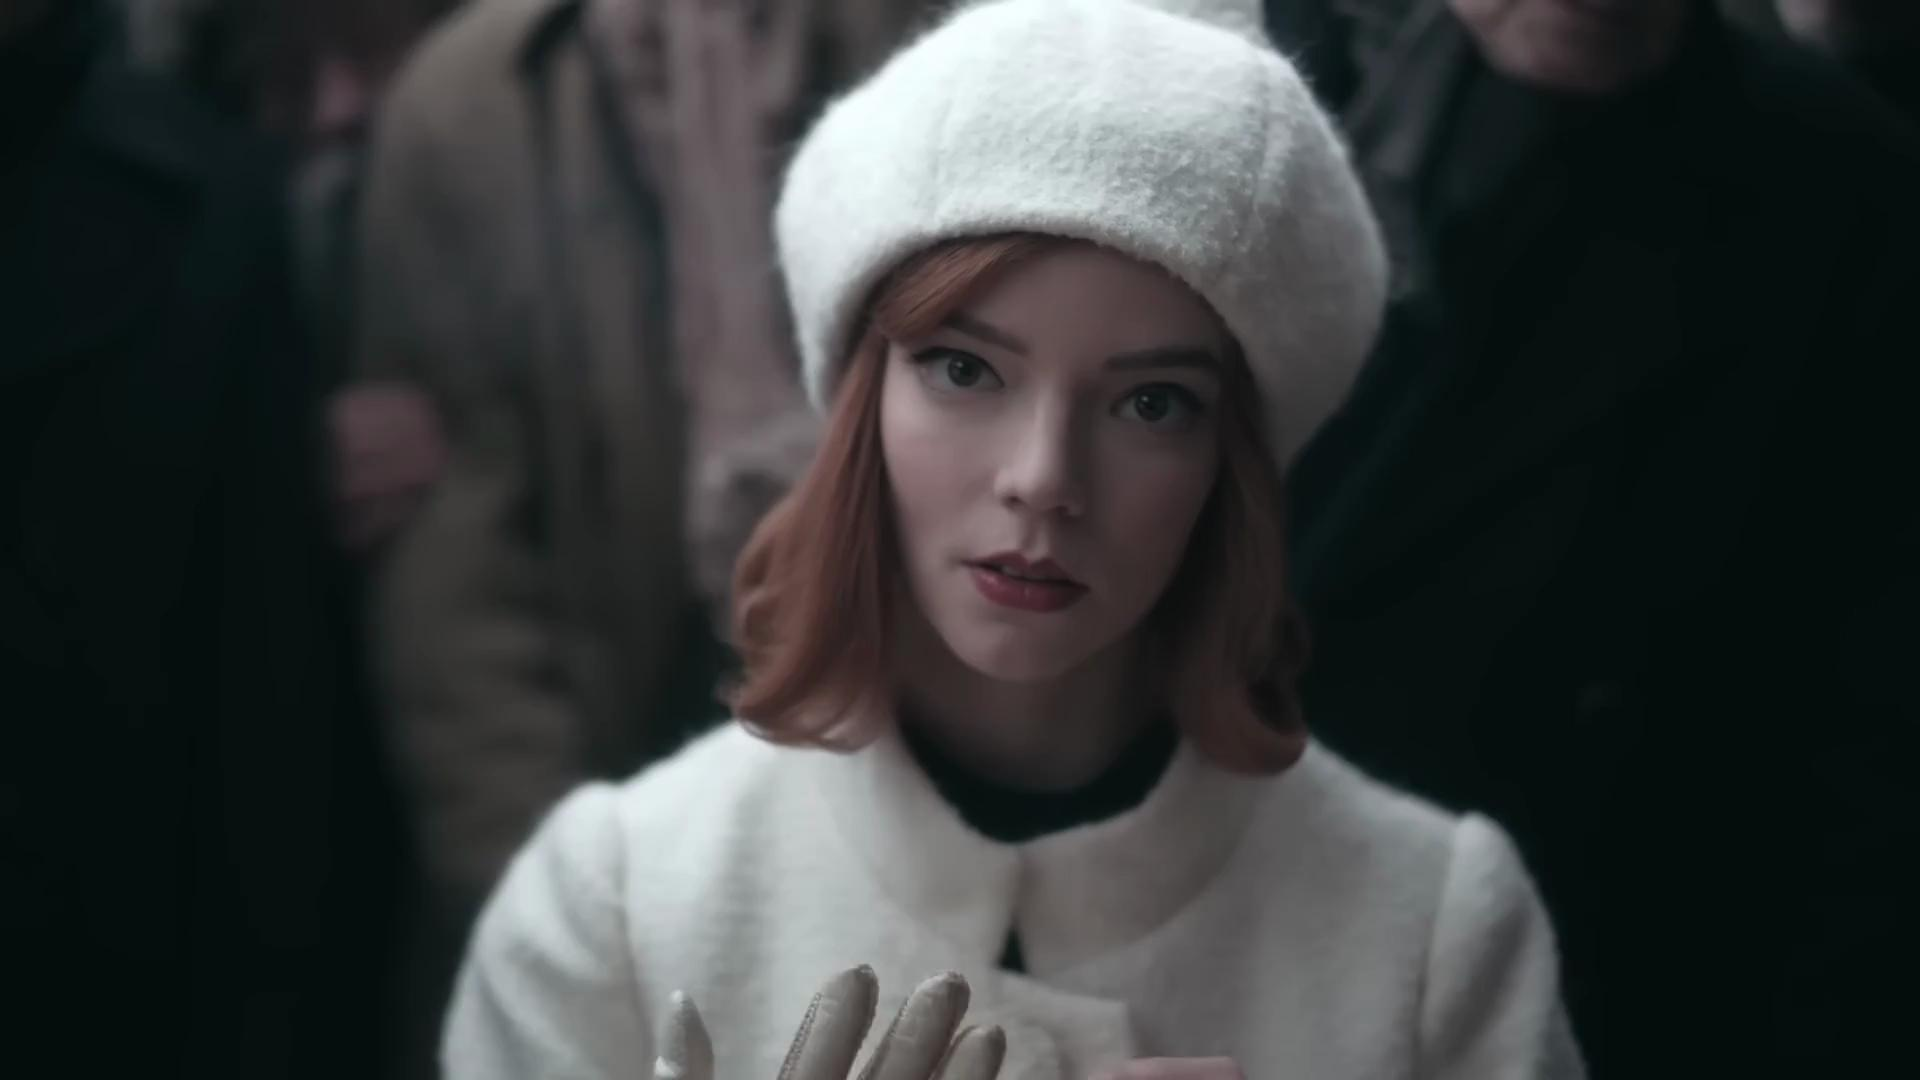
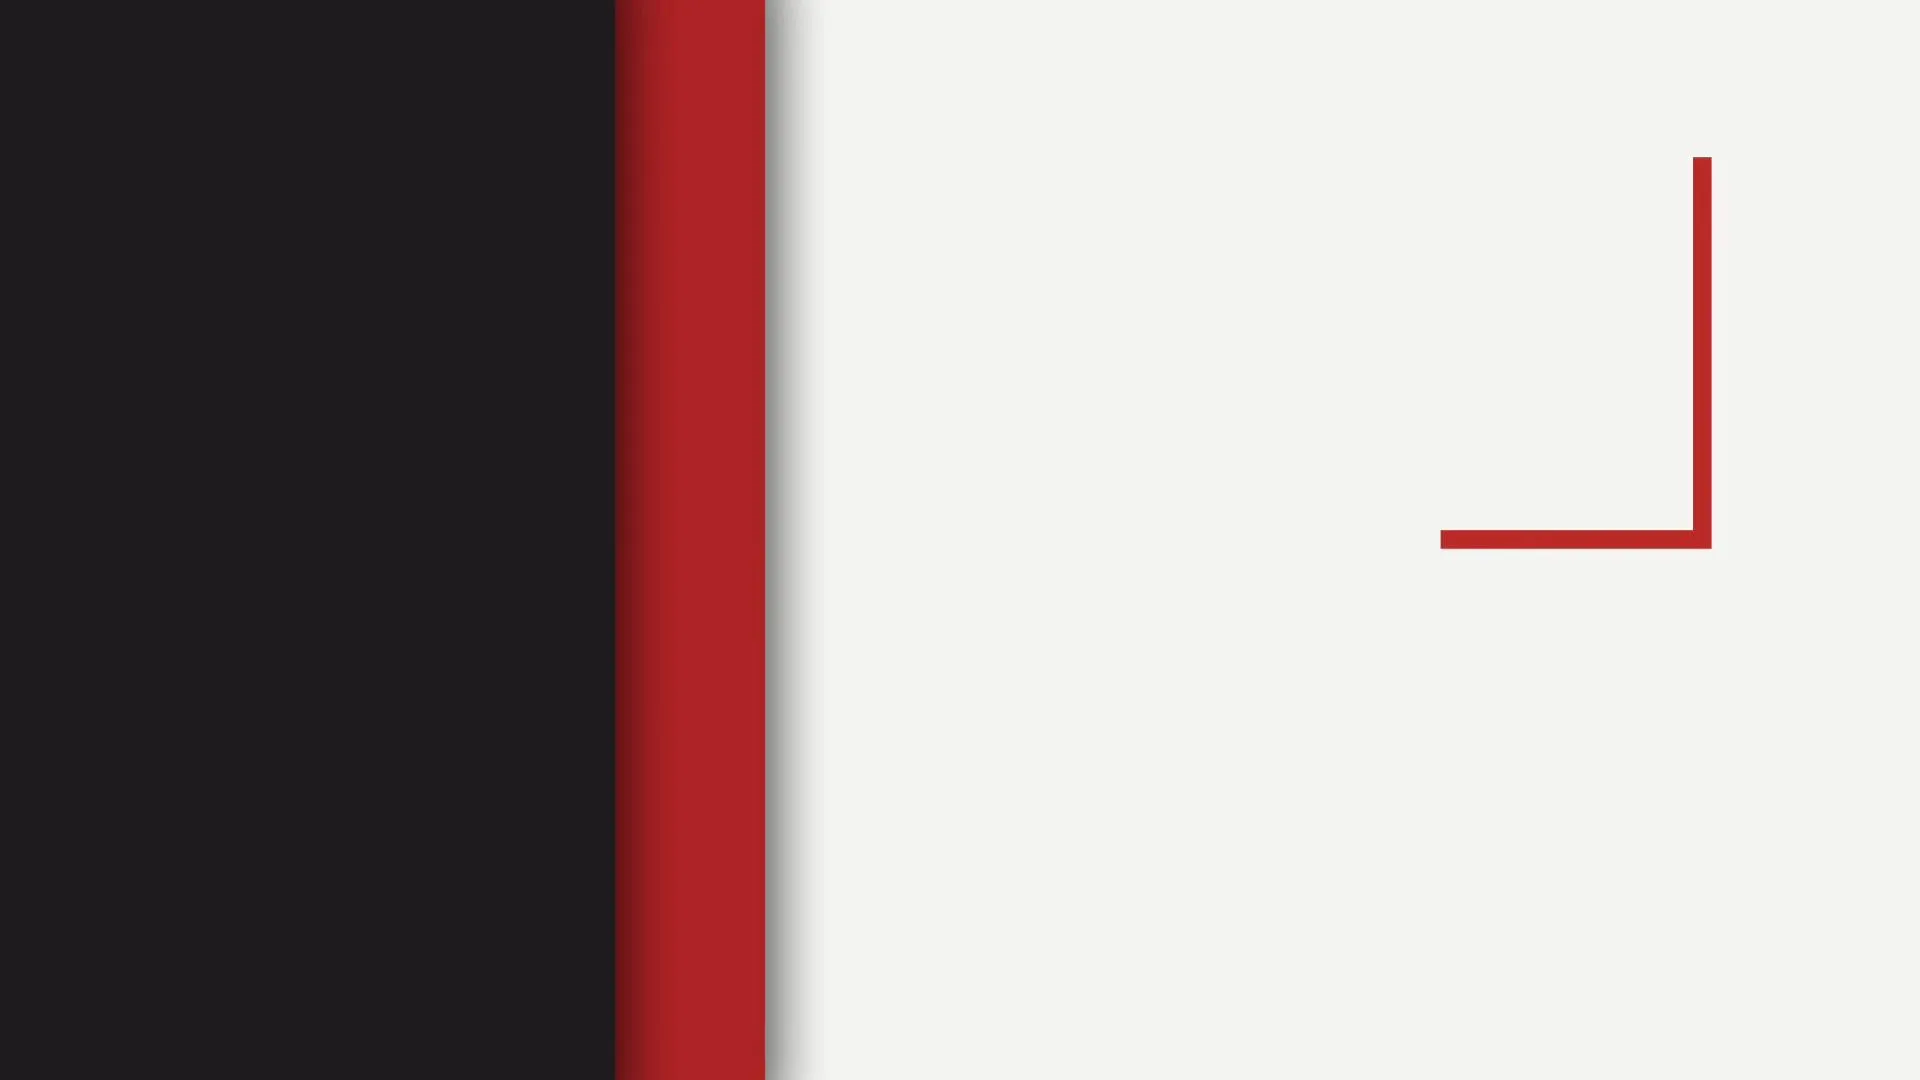

In [51]:
scenes.select(scenes.pos, scenes.video_segment, scenes.middle_frame).head()

#### Add embedding index on middle frames

We'll use CLIP from Hugging Face to create an embedding index on the `middle_frame` column. This enables efficient similarity search on images.


In [52]:
# Add CLIP embedding index on middle frames for image similarity search
from pixeltable.functions.huggingface import clip

scenes.add_embedding_index(
    scenes.middle_frame,
    embedding=clip.using(model_id='openai/clip-vit-base-patch32')
)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


#### Find similar frames

In [ ]:
# Extract frame at a specific timestamp (in seconds) in a specific scene
# Here, I'm choosing the 11th second of the 9th scene
timestamp = 11.0  # Change this to your desired timestamp

query_frame = scenes.select(
    query_frame=scenes.video_segment.extract_frame(timestamp=timestamp)
).head()[9, 'query_frame'] # change the integer here to index a different scene

query_frame

#### Find similar frames

In this section, we'll search for similar frames (e.g., frames with the main actress)


In [ ]:
# Find top 3 similar frames using the embedding index
# The similarity() function will automatically use the index we created
# It expects the image directly, not the embedding
similar_frames = scenes.select(
    scenes.pos,
    scenes.middle_frame,
    similarity=scenes.middle_frame.similarity(query_frame)
).order_by(
    scenes.middle_frame.similarity(query_frame), 
    asc=False
).limit(4).collect()

similar_frames

<aside>

### 🤿 **Technical Deep Dive** (5 min)

Embeddings

- Embeddings vs indexes
- Vector store functionality
- Integration with Pixeltable catalog (persistent metadata) and orchestration system (keeping in sync)
- *Links to: [](), [Map function docs](https://pixeltable.com/docs/map-function)*
</aside>
